<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_12_principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal component analysis / Метод головних компонент

We begin unsupervised estimators.

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful for


*   visualization
*   noise filtering
*   feature extraction and engineering



#Motivation

High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set. Richard Bellman described this phenomenon in 1961 as the *Curse of Dimensionality* where

$$
\def\q{\unicode{x201C}}
\def\Q{\unicode{x201D}}
\q Many \,\,  algorithms \,\, that \,\, work \,\,  fine \,\, in \,\, low \,\, dimensions \,\, become \,\, intractable \,\, when \,\, the \,\, input \,\, is \,\, high-dimensional.\Q
$$

The ability to generalize correctly becomes exponentially harder as the dimensionality of the training dataset grows, as the training set covers a dwindling fraction of the input space. Models also become more efficient as the reduced feature set boosts learning rates and diminishes computation costs by removing redundant features.

What do we want to do about multidimensionality problem?
* eliminate noise features;
* choose uncorrelated features (so that each or them carries maximum independent information). In other words we want diagonal correlation matrix;
* eliminate features that carry little information (little variation).




In [ ]:
#@title ## Noise elimination
%%html
<svg width="210mm" height="85mm" version="1.1" viewBox="0 0 323.08 109.57" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".37198" fill-rule="evenodd" stroke="#000" stroke-opacity=".37198" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".37198" fill-rule="evenodd" stroke="#000" stroke-opacity=".37198" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".37198" fill-rule="evenodd" stroke="#000" stroke-opacity=".37198" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".37198" fill-rule="evenodd" stroke="#000" stroke-opacity=".37198" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".52174" fill-rule="evenodd" stroke="#f00" stroke-opacity=".52174" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(14.934 -2.9095)">
  <g fill="#0c0000" fill-opacity=".34783" stroke-linecap="square" stroke-linejoin="bevel" stroke-opacity=".29952" stroke-width=".5">
   <circle transform="rotate(-29.293)" cx="5.3351" cy="71.287" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.816" cy="78.985" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="29.124" cy="77.095" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.163" cy="71.048" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-.16925" cy="78.796" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.792" cy="81.631" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-8.4847" cy="82.387" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-3.382" cy="72.182" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.636" cy="72.371" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="9.0912" cy="76.15" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="8.7132" cy="79.93" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="42.731" cy="76.717" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-25.116" cy="74.071" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-17.556" cy="75.394" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-11.887" cy="64.055" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.727" cy="91.477" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.966" cy="82.576" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.825" cy="68.024" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="6.0674" cy="62.543" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.793" cy="66.323" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.456" cy="67.079" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="58.606" cy="75.205" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-32.864" cy="73.127" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="19.486" cy="79.174" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.7288" cy="75.394" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.415" cy="80.497" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="40.085" cy="82.954" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.6894" cy="75.961" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-11.509" cy="75.016" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="36.872" cy="73.316" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.005" cy="63.677" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.338" cy="56.952" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-3.9664" cy="79.392" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="50.102" cy="74.071" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-16.989" cy="71.615" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-17.556" cy="80.875" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.942" cy="74.26" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-12.831" cy="86.828" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.604" cy="72.749" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="39.518" cy="72.938" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="11.359" cy="73.505" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-8.2364" cy="72.172" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.588" cy="68.213" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.541" cy="63.299" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.5949" cy="83.757" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="16.273" cy="73.693" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.225" cy="67.457" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.086" cy="74.628" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-14.042" cy="72.89" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.282" cy="74.36" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="3.197" cy="74.895" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="1.0588" cy="69.416" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.9502" cy="79.305" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.416" cy="76.528" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.03" cy="85.853" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-1.4922" cy="65.189" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="35.361" cy="66.323" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.825" cy="86.167" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.378" cy="87.991" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.118" cy="63.001" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.385" cy="72.089" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="26.85" cy="76.766" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="31.26" cy="70.218" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.532" cy="68.969" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-29.944" cy="77.968" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="53.31" cy="69.416" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.697" cy="80.775" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="41.149" cy="84.383" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="17.548" cy="87.348" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="12.284" cy="69.95" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-16.046" cy="69.55" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-10.835" cy="70.485" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.6274" cy="75.964" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.371" cy="73.024" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx=".019747" cy="82.765" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.0591" cy="83.521" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="4.7444" cy="80.781" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="22.604" cy="83.048" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.416" cy="74.733" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.1224" cy="73.882" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="41.016" cy="69.683" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-21.659" cy="82.512" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-10.835" cy="80.374" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.2152" cy="88.125" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="36.472" cy="60.329" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-6.5584" cy="67.278" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.6274" cy="72.489" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-.5448" cy="75.697" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-15.855" cy="79.458" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.151" cy="82.632" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="17.879" cy="75.3" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="38.744" cy="75.697" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="44.156" cy="73.625" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.652" cy="73.826" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.645" cy="74.761" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="31.06" cy="74.427" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.839" cy="77.968" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.898" cy="71.287" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.868" cy="82.044" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="37.207" cy="78.77" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="28.258" cy="81.126" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="19.1" cy="68.547" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="15.558" cy="67.946" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.623" cy="81.443" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="15.759" cy="78.971" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-19.257" cy="78.04" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="42.353" cy="75.111" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="12.017" cy="77.434" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-26.336" cy="82.512" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="43.109" cy="68.591" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-37.022" cy="78.418" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="55.204" cy="68.969" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="61.996" cy="67.946" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="67.3" cy="75.961" r="1.7373"/>
  </g>
  <g fill="none">
   <path d="m143.14 54.431c12.595-4.9428 20.828-2.1101 29.466 0" marker-end="url(#Arrow1Mend)" stroke="#f00" stroke-opacity=".52174" stroke-width=".865"/>
   <path d="m-6.1108 111.36v-107.86" marker-end="url(#b)" stroke="#000" stroke-opacity=".37198" stroke-width=".81411"/>
   <path d="m-10.363 103.12h119.51" marker-end="url(#c)" stroke="#000" stroke-opacity=".37198" stroke-width=".81411"/>
  </g>
  <g transform="matrix(1.5 0 0 -1.5 -194.61 1187.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\\text{feature}_1$\n$\\text{feature}_2$\n" xml:space="preserve"><g stroke-width="0"><path d="m189.89 720.8v0.53626c0 0.4057 0.22383 0.62953 0.42901 0.62953 9e-3 0 0.0793 0 0.14922-0.0326-0.056-0.0187-0.1399-0.0793-0.1399-0.19586 0-0.10258 0.0746-0.19585 0.20052-0.19585 0.13523 0 0.20518 0.0933 0.20518 0.20052 0 0.17253-0.17253 0.32642-0.41502 0.32642-0.32642 0-0.72279-0.24715-0.72279-0.73678v-0.5316h-0.36839v-0.14456h0.36839v-1.5015c0-0.20984-0.0513-0.20984-0.36373-0.20984v-0.13989c0.18187 5e-3 0.40103 0.014 0.5316 0.014 0.18653 0 0.40103 0 0.58756-0.014v0.13989h-0.0979c-0.34042 0-0.34974 0.0513-0.34974 0.21917v1.4922h0.52694v0.14456z"/><path d="m191.01 719.87 5e-3 0.0979c0.028 0.69015 0.4197 0.80672 0.57824 0.80672 0.48031 0 0.52694-0.62486 0.52694-0.80672h-1.1052l-5e-3 -0.0979h1.301c0.10259 0 0.11658 0 0.11658 0.0979 0 0.45698-0.25181 0.90931-0.83471 0.90931-0.54093 0-0.96527-0.4803-0.96527-1.0585 0-0.62021 0.48497-1.0679 1.0212-1.0679 0.56891 0 0.77875 0.51295 0.77875 0.60155 0 0.0466-0.0373 0.056-0.0653 0.056-0.0373 0-0.0466-0.028-0.056-0.0653-0.1632-0.48031-0.58288-0.48031-0.62952-0.48031-0.23316 0-0.41968 0.1399-0.52693 0.31244-0.1399 0.22383-0.1399 0.52693-0.1399 0.69481z"/><path d="m194.11 719.15v-0.0186l5e-3 -0.014v-0.0187l5e-3 -0.0186 5e-3 -0.0187 5e-3 -0.014 5e-3 -0.0186 9e-3 -0.014 5e-3 -0.0187 9e-3 -0.0139 9e-3 -0.0187 0.018-0.028 9e-3 -0.0186 0.018-0.028 0.014-9e-3 9e-3 -0.014 0.014-0.014 0.0278-0.018 0.0139-0.014 0.0187-9e-3 0.0139-5e-3 0.0139-9e-3 0.0187-5e-3 0.0187-9e-3 0.0187-5e-3h0.0187l0.0187-5e-3h0.0373c0.0979 0 0.38239 0.0607 0.38239 0.43833v0.26114h-0.11659v-0.26059c0-0.27047-0.11658-0.29845-0.16786-0.29845-0.15389 0-0.17254 0.20985-0.17254 0.23316v0.92797c0 0.19119 0 0.37305-0.16788 0.54559-0.1772 0.18186-0.41036 0.25647-0.63419 0.25647-0.38238 0-0.70414-0.21916-0.70414-0.52693 0-0.13524 0.0933-0.21451 0.21451-0.21451 0.13057 0 0.2145 0.0886 0.2145 0.20984 0 0.056-0.0233 0.20984-0.23782 0.2145 0.12591 0.16322 0.35441 0.21451 0.50363 0.21451 0.22849 0 0.48963-0.18186 0.48963-0.59222v-0.7321c0-0.443-0.33109-0.60155-0.54093-0.60155-0.2285 0-0.41968 0.16322-0.41968 0.39638 0 0.25647 0.19585 0.63885 0.96061 0.66683v0.0979c-0.23316-0.014-0.55958-0.028-0.85336-0.16787-0.34974-0.15854-0.46632-0.39637-0.46632-0.60154 0-0.37773 0.45233-0.48964 0.74611-0.48964 0.30777 0 0.52227 0.18187 0.61087 0.40103z"/><path d="m195.69 720.65h0.66683v0.14456h-0.66683v0.8487h-0.11658c-5e-3 -0.37772-0.14456-0.87202-0.60155-0.89067v-0.10259h0.39637v-1.2777c0-0.56891 0.43367-0.62487 0.60155-0.62487 0.33109 0 0.46165 0.32642 0.46165 0.62487v0.26113h-0.11658v-0.25181c0-0.34507-0.1399-0.52228-0.31243-0.52228-0.31243 0-0.31243 0.42435-0.31243 0.50363z"/><path d="m198.51 719.17v-0.41502l0.67149 0.0513v0.13989c-0.32641 0-0.36372 0.0326-0.36372 0.26114v1.6461l-0.68548-0.0513v-0.14456c0.32641 0 0.36372-0.0326 0.36372-0.26113v-0.82539c0-0.40103-0.22383-0.71812-0.56424-0.71812-0.38704 0-0.41036 0.21917-0.41036 0.46165v1.5388l-0.68082-0.0513v-0.14455c0.36372 0 0.36372-0.014 0.36372-0.42901v-0.69481c0-0.35907 0-0.77876 0.70414-0.77876 0.26114 0 0.46632 0.12591 0.60155 0.41502z"/><path d="m200.05 720.34v0.51294l-0.64817-0.0513v-0.14456c0.32642 0 0.36372-0.0326 0.36372-0.26113v-1.2404c0-0.20984-0.0513-0.20984-0.36372-0.20984v-0.13989c0.18186 5e-3 0.40103 0.014 0.5316 0.014 0.18652 0 0.40569 0 0.59222-0.014v0.13989h-0.0979c-0.34507 0-0.3544 0.0513-0.3544 0.21917v0.71346c0 0.45699 0.19586 0.87202 0.55025 0.87202 0.0327 0 0.0419 0 0.0513-5e-3 -0.0139-5e-3 -0.10725-0.0606-0.10725-0.18186 0-0.13057 0.0979-0.20051 0.20051-0.20051 0.0839 0 0.20052 0.056 0.20052 0.20517 0 0.14922-0.14456 0.28445-0.34508 0.28445-0.3404 0-0.50828-0.31242-0.57357-0.51294z"/><path d="m201.61 719.87 5e-3 0.0979c0.028 0.69015 0.41968 0.80672 0.57823 0.80672 0.48031 0 0.52695-0.62486 0.52695-0.80672h-1.1052l-5e-3 -0.0979h1.301c0.1026 0 0.11658 0 0.11658 0.0979 0 0.45698-0.25181 0.90931-0.83471 0.90931-0.54092 0-0.96527-0.4803-0.96527-1.0585 0-0.62021 0.48497-1.0679 1.0212-1.0679 0.56891 0 0.77875 0.51295 0.77875 0.60155 0 0.0466-0.0373 0.056-0.0606 0.056-0.0419 0-0.0513-0.028-0.0607-0.0653-0.16321-0.48031-0.5829-0.48031-0.62952-0.48031-0.23317 0-0.41969 0.1399-0.52695 0.31244-0.13989 0.22383-0.13989 0.52693-0.13989 0.69481z"/><path d="m204.25 720.16v0.04l-5e-3 5e-3v0.025l-0.01 0.01v5e-3l-5e-3 5e-3h-5e-3l-5e-3 5e-3h-0.02l-5e-3 5e-3h-0.05c-0.20984-0.20519-0.50829-0.20985-0.63886-0.20985v-0.11658c0.0792 0 0.29378 0 0.47099 0.0933v-1.6554c0-0.10726 0-0.14923-0.32643-0.14923h-0.12124v-0.11657c0.056 5e-3 0.45699 0.014 0.57823 0.014 0.10259 0 0.51295-9e-3 0.5829-0.014v0.11657h-0.12124c-0.32642 0-0.32642 0.0419-0.32642 0.14923z"/></g><g transform="rotate(90 123.29 788.56)" stroke-width="0"><path d="m107.69 790.68v0.5904c0 0.44664 0.24642 0.69306 0.47231 0.69306 0.0154 0 0.0924 0 0.16942-0.0359-0.0616-0.0205-0.15402-0.0873-0.15402-0.21562 0-0.11295 0.0821-0.21562 0.22076-0.21562 0.14374 0 0.22588 0.10267 0.22588 0.22075 0 0.18995-0.18995 0.35937-0.46204 0.35937-0.35937 0-0.79575-0.27209-0.79575-0.81115v-0.58526h-0.40557v-0.15914h0.40557v-1.6531c0-0.23101-0.0565-0.23101-0.40044-0.23101v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58526 0.0154 0.20536 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39017 0.0565-0.39017 0.24129v1.6428h0.58525v0.15914z"/><path d="m108.92 789.66 5e-3 0.10781c0.0308 0.75981 0.45691 0.88815 0.63146 0.88815 0.52879 0 0.58013-0.68794 0.58013-0.88815h-1.2116l-5e-3 -0.10781h1.4272c0.11294 0 0.12834 0 0.12834 0.10781 0 0.50311-0.27723 1.0011-0.91895 1.0011-0.59039 0-1.0627-0.52878-1.0627-1.1654 0-0.6828 0.53905-1.1756 1.1243-1.1756 0.62633 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17968-0.52879-0.64173-0.52879-0.69306-0.52879-0.2567 0-0.45691 0.15402-0.57498 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m112.33 788.87v-0.0205l5e-3 -0.0154 5e-3 -0.0205v-0.0205l5e-3 -0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 0.0206-0.0308 0.0103-0.0205 0.0103-0.0154 0.0668-0.0668 0.0154-0.0103 0.0205-0.0154 0.0154-0.0103 0.0154-5e-3 0.0205-0.0103 0.0154-5e-3 0.0205-0.0103 0.0205-5e-3h0.0205l0.0205-5e-3h0.041c0.11295 0 0.42098 0.0667 0.42098 0.48258v0.28749h-0.12816v-0.28749c0-0.29776-0.12322-0.32857-0.17969-0.32857-0.16942 0-0.18995 0.23103-0.18995 0.2567v1.0216c0 0.21049 0 0.41071-0.18482 0.60066-0.20022 0.20022-0.45691 0.28236-0.70334 0.28236-0.42097 0-0.77007-0.24129-0.77007-0.58012 0-0.14889 0.0975-0.23616 0.23102-0.23616 0.14375 0 0.23616 0.0975 0.23616 0.23102 0 0.0616-0.0257 0.23102-0.26183 0.23616 0.13862 0.17968 0.39017 0.23616 0.55446 0.23616 0.25156 0 0.54418-0.20022 0.54418-0.652v-0.80602c0-0.48771-0.36963-0.66226-0.60066-0.66226-0.25155 0-0.46204 0.17968-0.46204 0.43638 0 0.28236 0.21562 0.70333 1.0627 0.73413v0.10782c-0.26182-0.0154-0.62119-0.0308-0.94462-0.18482-0.37991-0.17455-0.50825-0.43638-0.50825-0.66227 0-0.41584 0.49285-0.53905 0.81628-0.53905 0.33883 0 0.57499 0.20022 0.67253 0.44151z"/><path d="m114.07 790.52h0.73415v0.15914h-0.73415v0.93436h-0.12834c-5e-3 -0.41584-0.15401-0.96002-0.65714-0.98056v-0.11294h0.43125v-1.4067c0-0.62634 0.47744-0.68794 0.66226-0.68794 0.3645 0 0.50825 0.35937 0.50825 0.68794v0.2875h-0.12834v-0.27723c0-0.37991-0.15402-0.57499-0.34397-0.57499-0.34397 0-0.34397 0.46718-0.34397 0.55445z"/><path d="m117.17 788.88v-0.45691l0.73927 0.0565v0.15402c-0.35937 0-0.40044 0.0359-0.40044 0.28749v1.8122l-0.75468-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-0.90869c0-0.44151-0.24642-0.79061-0.62119-0.79061-0.42611 0-0.44665 0.24129-0.44665 0.50825v1.6942l-0.75467-0.0565v-0.15914c0.40044 0 0.40044-0.0154 0.40044-0.47232v-0.76494c0-0.39531 0-0.85735 0.77521-0.85735 0.28749 0 0.51338 0.13861 0.66227 0.45691z"/><path d="m118.87 790.17v0.56473l-0.70847-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-1.3656c0-0.23102-0.0565-0.23102-0.40044-0.23102v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58013 0.0154 0.20535 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39018 0.0565-0.39018 0.24129v0.78547c0 0.50312 0.21562 0.96003 0.6058 0.96003 0.0359 0 0.0462 0 0.0565-5e-3 -0.0154-5e-3 -0.11808-0.0667-0.11808-0.20022 0-0.14375 0.10781-0.22076 0.22076-0.22076 0.0924 0 0.22075 0.0616 0.22075 0.22589s-0.15915 0.31317-0.3799 0.31317c-0.37478 0-0.55959-0.34397-0.63147-0.56473z"/><path d="m120.59 789.66 5e-3 0.10781c0.0308 0.75981 0.46204 0.88816 0.63146 0.88816 0.52879 0 0.58012-0.68794 0.58012-0.88816h-1.2116l-5e-3 -0.10781h1.4272c0.11295 0 0.12835 0 0.12835 0.10781 0 0.50312-0.27723 1.0011-0.91896 1.0011-0.59039 0-1.0627-0.52879-1.0627-1.1654 0-0.6828 0.53906-1.1756 1.1243-1.1756 0.62632 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17969-0.52879-0.64173-0.52879-0.69307-0.52879-0.25669 0-0.45691 0.15402-0.57499 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m124.1 788.36h-0.12321c-0.0103-0.0821-0.0462-0.29263-0.0924-0.32856-0.0308-0.0205-0.30803-0.0205-0.35423-0.0205h-0.66227c0.37477 0.3337 0.50312 0.43124 0.71874 0.60065 0.26696 0.2105 0.51338 0.43124 0.51338 0.77008 0 0.43124-0.3799 0.69821-0.84195 0.69821-0.44664 0-0.7444-0.31317-0.7444-0.64174 0-0.17969 0.154-0.20021 0.18994-0.20021 0.0873 0 0.18995 0.0616 0.18995 0.18994 0 0.0667-0.0257 0.18995-0.21049 0.18995 0.10781 0.25156 0.35424 0.3337 0.52366 0.3337 0.35936 0 0.54418-0.27722 0.54418-0.56985 0-0.30803-0.22075-0.55445-0.33883-0.6828l-0.86249-0.85222c-0.0359-0.0308-0.0359-0.0359-0.0359-0.13861h1.4785z"/></g><g transform="matrix(1.5 0 0 -1.5 -347.18 1068.5)" fill-rule="evenodd" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$$\\text{PC}_1$$\n$$\\text{PC}_2$$\n" xml:space="preserve"><path d="m401.29 234.4v-47.937" fill="none" marker-end="url(#d)" stroke="#000" stroke-miterlimit="4" stroke-opacity=".37198" stroke-width=".36183"/><path d="m399.4 230.73h53.117" fill="none" marker-end="url(#a)" stroke="#000" stroke-miterlimit="4" stroke-opacity=".37198" stroke-width=".36183"/><g fill-rule="evenodd" stroke-miterlimit="10.433"><g stroke-width="0"><path d="m444.11 232.28v-0.35751c0-0.27046 0.14922-0.41968 0.286-0.41968 6e-3 0 0.0529 0 0.0995 0.0217-0.0373 0.0125-0.0933 0.0529-0.0933 0.13057 0 0.0684 0.0497 0.13057 0.13368 0.13057 0.0901 0 0.13678-0.0622 0.13678-0.13368 0-0.11502-0.11502-0.21761-0.27668-0.21761-0.21761 0-0.48186 0.16476-0.48186 0.49118v0.3544h-0.24559v0.0964h0.24559v1.001c0 0.1399-0.0342 0.1399-0.24248 0.1399v0.0933c0.12124-3e-3 0.26735-9e-3 0.3544-9e-3 0.12435 0 0.26735 0 0.3917 9e-3v-0.0933h-0.0653c-0.22695 0-0.23316-0.0342-0.23316-0.14612v-0.9948h0.35129v-0.0964z"/><path d="m444.86 232.9 3e-3 -0.0653c0.0187-0.4601 0.2798-0.53781 0.38549-0.53781 0.32021 0 0.3513 0.41657 0.3513 0.53781h-0.73679l-3e-3 0.0653h0.86735c0.0684 0 0.0777 0 0.0777-0.0653 0-0.30465-0.16787-0.60621-0.55647-0.60621-0.36062 0-0.64352 0.3202-0.64352 0.70569 0 0.41347 0.32332 0.71191 0.68082 0.71191 0.37928 0 0.51917-0.34196 0.51917-0.40103 0-0.0311-0.0249-0.0373-0.0435-0.0373-0.0249 0-0.0311 0.0187-0.0373 0.0435-0.1088 0.32021-0.38858 0.32021-0.41968 0.32021-0.15544 0-0.27978-0.0933-0.35128-0.2083-0.0933-0.14922-0.0933-0.35128-0.0933-0.4632z"/><path d="m446.92 233.37v0.0124l3e-3 9e-3v0.0125l3e-3 0.0124 3e-3 0.0125 3e-3 9e-3 3e-3 0.0124 6e-3 9e-3 3e-3 0.0125 6e-3 9e-3 6e-3 0.0125 0.012 0.018 6e-3 0.0124 0.012 0.018 9e-3 6e-3 6e-3 9e-3 9e-3 9e-3 0.018 0.012 9e-3 9e-3 0.0125 6e-3 9e-3 3e-3 9e-3 6e-3 0.0125 3e-3 0.0125 6e-3 0.0125 3e-3h0.0125l0.0125 3e-3h0.0249c0.0653 0 0.25493-0.0405 0.25493-0.29222v-0.17409h-0.0777v0.17373c0 0.18031-0.0777 0.19896-0.11191 0.19896-0.10259 0-0.11502-0.1399-0.11502-0.15544v-0.61864c0-0.12746 0-0.2487-0.11192-0.36373-0.11814-0.12124-0.27358-0.17098-0.4228-0.17098-0.25491 0-0.46942 0.14611-0.46942 0.35129 0 0.0902 0.0622 0.14301 0.14301 0.14301 0.087 0 0.14299-0.0591 0.14299-0.1399 0-0.0373-0.0155-0.13989-0.15854-0.143 0.0839-0.10881 0.23627-0.14301 0.33575-0.14301 0.15233 0 0.32642 0.12125 0.32642 0.39482v0.4881c0 0.29534-0.22072 0.40104-0.36062 0.40104-0.15233 0-0.27979-0.10882-0.27979-0.26426 0-0.17098 0.13057-0.42589 0.64041-0.44455v-0.0653c-0.15544 9e-3 -0.37305 0.0187-0.5689 0.11191-0.23316 0.10569-0.31088 0.26425-0.31088 0.40103 0 0.25182 0.30155 0.32642 0.4974 0.32642 0.20518 0 0.34818-0.12125 0.40725-0.26735z"/><path d="m447.98 232.37h0.44456v-0.0964h-0.44456v-0.5658h-0.0777c-3e-3 0.25181-0.0964 0.58135-0.40103 0.59378v0.0684h0.26425v0.8518c0 0.37928 0.28911 0.41658 0.40103 0.41658 0.22073 0 0.30777-0.21761 0.30777-0.41658v-0.17408h-0.0777v0.16787c0 0.23005-0.0933 0.34819-0.20829 0.34819-0.20829 0-0.20829-0.2829-0.20829-0.33576z"/><path d="m449.86 233.36v0.27668l0.44766-0.0342v-0.0933c-0.21761 0-0.24248-0.0217-0.24248-0.17409v-1.0974l-0.45699 0.0342v0.0964c0.21761 0 0.24248 0.0217 0.24248 0.17409v0.55026c0 0.26735-0.14922 0.47874-0.37616 0.47874-0.25802 0-0.27357-0.14611-0.27357-0.30776v-1.0259l-0.45388 0.0342v0.0964c0.24248 0 0.24248 9e-3 0.24248 0.28601v0.4632c0 0.23938 0 0.51918 0.46943 0.51918 0.17409 0 0.31088-0.0839 0.40103-0.27668z"/><path d="m450.88 232.58v-0.34196l-0.43211 0.0342v0.0964c0.21761 0 0.24248 0.0217 0.24248 0.17409v0.82694c0 0.13989-0.0342 0.13989-0.24248 0.13989v0.0933c0.12124-3e-3 0.26735-9e-3 0.3544-9e-3 0.12435 0 0.27046 0 0.39481 9e-3v-0.0933h-0.0653c-0.23005 0-0.23627-0.0342-0.23627-0.14611v-0.47564c0-0.30466 0.13057-0.58135 0.36683-0.58135 0.0218 0 0.0279 0 0.0342 3e-3 -9e-3 3e-3 -0.0715 0.0404-0.0715 0.12124 0 0.087 0.0653 0.13367 0.13368 0.13367 0.0559 0 0.13368-0.0373 0.13368-0.13678 0-0.0995-0.0964-0.18963-0.23006-0.18963-0.22693 0-0.33885 0.20828-0.38238 0.34196z"/><path d="m451.92 232.9 3e-3 -0.0653c0.0187-0.4601 0.27978-0.53781 0.38548-0.53781 0.32021 0 0.3513 0.41657 0.3513 0.53781h-0.73678l-3e-3 0.0653h0.86734c0.0684 0 0.0777 0 0.0777-0.0653 0-0.30465-0.16787-0.60621-0.55647-0.60621-0.36061 0-0.64351 0.3202-0.64351 0.70569 0 0.41347 0.32331 0.71191 0.68082 0.71191 0.37927 0 0.51916-0.34196 0.51916-0.40103 0-0.0311-0.0249-0.0373-0.0404-0.0373-0.0279 0-0.0342 0.0187-0.0405 0.0435-0.10881 0.32021-0.3886 0.32021-0.41968 0.32021-0.15545 0-0.2798-0.0933-0.3513-0.2083-0.0933-0.14922-0.0933-0.35128-0.0933-0.4632z"/><path d="m453.68 232.7v-0.024l-3e-3 -3e-3v-0.015l-6e-3 -6e-3v-3e-3l-3e-3 -3e-3h-3e-3l-3e-3 -3e-3h-0.012l-3e-3 -3e-3h-0.03c-0.13989 0.1368-0.33886 0.1399-0.4259 0.1399v0.0777c0.0528 0 0.19585 0 0.31399-0.0622v1.1036c0 0.0715 0 0.0995-0.21762 0.0995h-0.0808v0.0777c0.0373-3e-3 0.30466-9e-3 0.38549-9e-3 0.0684 0 0.34197 6e-3 0.3886 9e-3v-0.0777h-0.0808c-0.21761 0-0.21761-0.0279-0.21761-0.0995z"/></g><g transform="matrix(0 -.66667 -.66667 0 925.39 269.71)" stroke="#000" stroke-width="0"><path d="m107.69 790.68v0.5904c0 0.44664 0.24642 0.69306 0.47231 0.69306 0.0154 0 0.0924 0 0.16942-0.0359-0.0616-0.0205-0.15402-0.0873-0.15402-0.21562 0-0.11295 0.0821-0.21562 0.22076-0.21562 0.14374 0 0.22588 0.10267 0.22588 0.22075 0 0.18995-0.18995 0.35937-0.46204 0.35937-0.35937 0-0.79575-0.27209-0.79575-0.81115v-0.58526h-0.40557v-0.15914h0.40557v-1.6531c0-0.23101-0.0565-0.23101-0.40044-0.23101v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58526 0.0154 0.20536 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39017 0.0565-0.39017 0.24129v1.6428h0.58525v0.15914z"/><path d="m108.92 789.66 5e-3 0.10781c0.0308 0.75981 0.45691 0.88815 0.63146 0.88815 0.52879 0 0.58013-0.68794 0.58013-0.88815h-1.2116l-5e-3 -0.10781h1.4272c0.11294 0 0.12834 0 0.12834 0.10781 0 0.50311-0.27723 1.0011-0.91895 1.0011-0.59039 0-1.0627-0.52878-1.0627-1.1654 0-0.6828 0.53905-1.1756 1.1243-1.1756 0.62633 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17968-0.52879-0.64173-0.52879-0.69306-0.52879-0.2567 0-0.45691 0.15402-0.57498 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m112.33 788.87v-0.0205l5e-3 -0.0154 5e-3 -0.0205v-0.0205l5e-3 -0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 0.0206-0.0308 0.0103-0.0205 0.0103-0.0154 0.0668-0.0668 0.0154-0.0103 0.0205-0.0154 0.0154-0.0103 0.0154-5e-3 0.0205-0.0103 0.0154-5e-3 0.0205-0.0103 0.0205-5e-3h0.0205l0.0205-5e-3h0.041c0.11295 0 0.42098 0.0667 0.42098 0.48258v0.28749h-0.12816v-0.28749c0-0.29776-0.12322-0.32857-0.17969-0.32857-0.16942 0-0.18995 0.23103-0.18995 0.2567v1.0216c0 0.21049 0 0.41071-0.18482 0.60066-0.20022 0.20022-0.45691 0.28236-0.70334 0.28236-0.42097 0-0.77007-0.24129-0.77007-0.58012 0-0.14889 0.0975-0.23616 0.23102-0.23616 0.14375 0 0.23616 0.0975 0.23616 0.23102 0 0.0616-0.0257 0.23102-0.26183 0.23616 0.13862 0.17968 0.39017 0.23616 0.55446 0.23616 0.25156 0 0.54418-0.20022 0.54418-0.652v-0.80602c0-0.48771-0.36963-0.66226-0.60066-0.66226-0.25155 0-0.46204 0.17968-0.46204 0.43638 0 0.28236 0.21562 0.70333 1.0627 0.73413v0.10782c-0.26182-0.0154-0.62119-0.0308-0.94462-0.18482-0.37991-0.17455-0.50825-0.43638-0.50825-0.66227 0-0.41584 0.49285-0.53905 0.81628-0.53905 0.33883 0 0.57499 0.20022 0.67253 0.44151z"/><path d="m114.07 790.52h0.73415v0.15914h-0.73415v0.93436h-0.12834c-5e-3 -0.41584-0.15401-0.96002-0.65714-0.98056v-0.11294h0.43125v-1.4067c0-0.62634 0.47744-0.68794 0.66226-0.68794 0.3645 0 0.50825 0.35937 0.50825 0.68794v0.2875h-0.12834v-0.27723c0-0.37991-0.15402-0.57499-0.34397-0.57499-0.34397 0-0.34397 0.46718-0.34397 0.55445z"/><path d="m117.17 788.88v-0.45691l0.73927 0.0565v0.15402c-0.35937 0-0.40044 0.0359-0.40044 0.28749v1.8122l-0.75468-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-0.90869c0-0.44151-0.24642-0.79061-0.62119-0.79061-0.42611 0-0.44665 0.24129-0.44665 0.50825v1.6942l-0.75467-0.0565v-0.15914c0.40044 0 0.40044-0.0154 0.40044-0.47232v-0.76494c0-0.39531 0-0.85735 0.77521-0.85735 0.28749 0 0.51338 0.13861 0.66227 0.45691z"/><path d="m118.87 790.17v0.56473l-0.70847-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-1.3656c0-0.23102-0.0565-0.23102-0.40044-0.23102v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58013 0.0154 0.20535 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39018 0.0565-0.39018 0.24129v0.78547c0 0.50312 0.21562 0.96003 0.6058 0.96003 0.0359 0 0.0462 0 0.0565-5e-3 -0.0154-5e-3 -0.11808-0.0667-0.11808-0.20022 0-0.14375 0.10781-0.22076 0.22076-0.22076 0.0924 0 0.22075 0.0616 0.22075 0.22589s-0.15915 0.31317-0.3799 0.31317c-0.37478 0-0.55959-0.34397-0.63147-0.56473z"/><path d="m120.59 789.66 5e-3 0.10781c0.0308 0.75981 0.46204 0.88816 0.63146 0.88816 0.52879 0 0.58012-0.68794 0.58012-0.88816h-1.2116l-5e-3 -0.10781h1.4272c0.11295 0 0.12835 0 0.12835 0.10781 0 0.50312-0.27723 1.0011-0.91896 1.0011-0.59039 0-1.0627-0.52879-1.0627-1.1654 0-0.6828 0.53906-1.1756 1.1243-1.1756 0.62632 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17969-0.52879-0.64173-0.52879-0.69307-0.52879-0.25669 0-0.45691 0.15402-0.57499 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m124.1 788.36h-0.12321c-0.0103-0.0821-0.0462-0.29263-0.0924-0.32856-0.0308-0.0205-0.30803-0.0205-0.35423-0.0205h-0.66227c0.37477 0.3337 0.50312 0.43124 0.71874 0.60065 0.26696 0.2105 0.51338 0.43124 0.51338 0.77008 0 0.43124-0.3799 0.69821-0.84195 0.69821-0.44664 0-0.7444-0.31317-0.7444-0.64174 0-0.17969 0.154-0.20021 0.18994-0.20021 0.0873 0 0.18995 0.0616 0.18995 0.18994 0 0.0667-0.0257 0.18995-0.21049 0.18995 0.10781 0.25156 0.35424 0.3337 0.52366 0.3337 0.35936 0 0.54418-0.27722 0.54418-0.56985 0-0.30803-0.22075-0.55445-0.33883-0.6828l-0.86249-0.85222c-0.0359-0.0308-0.0359-0.0359-0.0359-0.13861h1.4785z"/></g><g transform="matrix(1.5 0 0 -1.5 -255.3 1118.8)" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$\\text{Features are correlated}$\n$\\text{Features are weakly (not) correlated}$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 -1.5 -60.904 1123.6)" ns0:preamble="default_packages.tex" ns0:text="$\'$\n" xml:space="preserve"><path d="m355.65 354.79 7.7e-4 -7.6e-4v-0.00154l7.7e-4 -7.7e-4v-7.6e-4l7.7e-4 -7.7e-4v-0.00153l7.6e-4 -7.7e-4v-0.00154l7.7e-4 -7.6e-4v-0.0023h7.7e-4v-0.00614c0-0.0223-0.0201-0.0402-0.0433-0.0402-0.0285 0-0.037 0.0232-0.0402 0.0349l-0.0984 0.31834c0 7.7e-4 -3e-3 0.0106-3e-3 0.0117 0 8e-3 0.0222 0.0159 0.0285 0.0159 5e-3 0 6e-3 -7.7e-4 0.0117-0.0117z" stroke-width="0"/><g stroke-miterlimit="10.433"><path d="m330.89 335.19-7.6e-4 -7.7e-4h-0.00154l-7.7e-4 -7.7e-4h-7.6e-4l-7.7e-4 -7.7e-4h-0.00153l-7.7e-4 -7.6e-4h-0.00154l-7.6e-4 -7.7e-4h-0.0023v-7.7e-4h-0.00614c-0.0223 0-0.0402 0.0201-0.0402 0.0433 0 0.0285 0.0232 0.037 0.0349 0.0402l0.31834 0.0984c7.7e-4 0 0.0106 3e-3 0.0117 3e-3 8e-3 0 0.0159-0.0222 0.0159-0.0285 0-5e-3 -7.7e-4 -6e-3 -0.0117-0.0117z" fill-rule="evenodd" stroke-width="0"/><path d="m304.73 345.89 9.2389-7.2468" fill="none" stroke="#0000e5" stroke-width=".19753"/><path d="m304.73 345.89-2.5529-3.2611" fill="none" stroke="#0000e5" stroke-width=".19753"/></g><g fill="#0c0000" fill-opacity=".34783" stroke="none" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="4" stroke-opacity=".29952" stroke-width=".098765"><circle transform="rotate(-29.293)" cx="128.47" cy="470.02" r=".34316"/><circle transform="rotate(-29.293)" cx="130.03" cy="469.78" r=".34316"/><circle transform="rotate(-29.293)" cx="133.12" cy="469.37" r=".34316"/><circle transform="rotate(-29.293)" cx="131.08" cy="469.65" r=".34316"/><circle transform="rotate(-31.464)" cx="109.31" cy="474.67" r=".34316"/><circle transform="rotate(-29.293)" cx="129.32" cy="469.9" r=".34316"/><circle transform="rotate(-31.464)" cx="107.87" cy="474.85" r=".34316"/><circle transform="rotate(-31.464)" cx="108.75" cy="474.75" r=".34316"/><circle transform="rotate(-29.293)" cx="133.53" cy="469.31" r=".34316"/><circle transform="rotate(-29.293)" cx="129.19" cy="469.93" r=".34316"/><circle transform="rotate(-29.293)" cx="128.87" cy="469.99" r=".34316"/><circle transform="rotate(-29.293)" cx="135.56" cy="468.94" r=".34316"/><circle transform="rotate(-31.464)" cx="104.8" cy="475.25" r=".34316"/><circle transform="rotate(-31.464)" cx="106.03" cy="475.1" r=".34316"/><circle transform="rotate(-31.464)" cx="107.6" cy="474.93" r=".34316"/><circle transform="rotate(-29.293)" cx="128.69" cy="469.94" r=".34316"/><circle transform="rotate(-29.293)" cx="131.96" cy="469.53" r=".34316"/><circle transform="rotate(-29.293)" cx="133.71" cy="469.27" r=".34316"/><circle transform="rotate(-29.293)" cx="128.97" cy="469.94" r=".34316"/><circle transform="rotate(-31.464)" cx="104.25" cy="475.32" r=".34316"/><circle transform="rotate(-29.293)" cx="136.96" cy="468.72" r=".34316"/><circle transform="rotate(-29.293)" cx="138.88" cy="468.45" r=".34316"/><circle transform="rotate(-31.464)" cx="103.24" cy="475.44" r=".34316"/><circle transform="rotate(-29.293)" cx="130.97" cy="469.64" r=".34316"/><circle transform="rotate(-31.464)" cx="108.11" cy="474.86" r=".34316"/><circle transform="rotate(-31.464)" cx="104.96" cy="475.24" r=".34316"/><circle transform="rotate(-29.293)" cx="134.58" cy="469.13" r=".34316"/><circle transform="rotate(-29.293)" cx="128.53" cy="470.05" r=".34316"/><circle transform="rotate(-31.464)" cx="107.31" cy="474.99" r=".34316"/><circle transform="rotate(-29.293)" cx="134.65" cy="469.06" r=".34316"/><circle transform="rotate(-29.293)" cx="130.51" cy="469.8" r=".34316"/><circle transform="rotate(-29.293)" cx="130.66" cy="469.71" r=".34316"/><circle transform="rotate(-31.464)" cx="108.66" cy="474.78" r=".34316"/><circle transform="rotate(-29.293)" cx="137.32" cy="468.68" r=".34316"/><circle transform="rotate(-31.464)" cx="106.77" cy="475.02" r=".34316"/><circle transform="rotate(-31.464)" cx="106.15" cy="475.08" r=".34316"/><circle transform="rotate(-29.293)" cx="131.79" cy="469.52" r=".34316"/><circle transform="rotate(-31.464)" cx="107.01" cy="475" r=".34316"/><circle transform="rotate(-31.464)" cx="105.19" cy="475.24" r=".34316"/><circle transform="rotate(-29.293)" cx="135.17" cy="468.98" r=".34316"/><circle transform="rotate(-29.293)" cx="129.67" cy="469.88" r=".34316"/><circle transform="rotate(-31.464)" cx="108.38" cy="474.79" r=".34316"/><circle transform="rotate(-29.293)" cx="132.31" cy="469.47" r=".34316"/><circle transform="rotate(-29.293)" cx="131.6" cy="469.56" r=".34316"/><circle transform="rotate(-29.293)" cx="128.11" cy="470.07" r=".34316"/><circle transform="rotate(-29.293)" cx="130.72" cy="469.7" r=".34316"/><circle transform="rotate(-29.293)" cx="129.52" cy="469.86" r=".34316"/><circle transform="rotate(-29.293)" cx="130.01" cy="469.87" r=".34316"/><circle transform="rotate(-31.464)" cx="107.02" cy="474.98" r=".34316"/><circle transform="rotate(-31.464)" cx="109.32" cy="474.72" r=".34316"/><circle transform="rotate(-29.293)" cx="128.11" cy="470.09" r=".34316"/><circle transform="rotate(-29.293)" cx="127.85" cy="470.14" r=".34316"/><circle transform="rotate(-31.464)" cx="109.02" cy="474.76" r=".34316"/><circle transform="rotate(-29.293)" cx="134.04" cy="469.19" r=".34316"/><circle transform="rotate(-29.293)" cx="130.48" cy="469.77" r=".34316"/><circle transform="rotate(-31.464)" cx="109.56" cy="474.7" r=".34316"/><circle transform="rotate(-29.293)" cx="134.45" cy="469.13" r=".34316"/><circle transform="rotate(-29.293)" cx="132.81" cy="469.42" r=".34316"/><circle transform="rotate(-29.293)" cx="131.57" cy="469.57" r=".34316"/><circle transform="rotate(-29.293)" cx="133.38" cy="469.32" r=".34316"/><circle transform="rotate(-29.293)" cx="132.86" cy="469.41" r=".34316"/><circle transform="rotate(-29.293)" cx="132.54" cy="469.43" r=".34316"/><circle transform="rotate(-29.293)" cx="133.65" cy="469.26" r=".34316"/><circle transform="rotate(-29.293)" cx="130.08" cy="469.79" r=".34316"/><circle transform="rotate(-31.464)" cx="103.77" cy="475.39" r=".34316"/><circle transform="rotate(-29.293)" cx="137.86" cy="468.63" r=".34316"/><circle transform="rotate(-29.293)" cx="136.16" cy="468.89" r=".34316"/><circle transform="rotate(-29.293)" cx="134.81" cy="469.05" r=".34316"/><circle transform="rotate(-29.293)" cx="130.22" cy="469.79" r=".34316"/><circle transform="rotate(-29.293)" cx="130.17" cy="469.84" r=".34316"/><circle transform="rotate(-31.464)" cx="106.39" cy="475.08" r=".34316"/><circle transform="rotate(-31.464)" cx="107.78" cy="474.87" r=".34316"/><circle transform="rotate(-31.464)" cx="108.07" cy="474.82" r=".34316"/><circle transform="rotate(-29.293)" cx="131.69" cy="469.59" r=".34316"/><circle transform="rotate(-31.464)" cx="109.24" cy="474.73" r=".34316"/><circle transform="rotate(-31.464)" cx="109.04" cy="474.76" r=".34316"/><circle transform="rotate(-29.293)" cx="128.28" cy="470.06" r=".34316"/><circle transform="rotate(-29.293)" cx="131.15" cy="469.66" r=".34316"/><circle transform="rotate(-29.293)" cx="134.08" cy="469.25" r=".34316"/><circle transform="rotate(-29.293)" cx="128.44" cy="470.05" r=".34316"/><circle transform="rotate(-29.293)" cx="135.73" cy="469" r=".34316"/><circle transform="rotate(-31.464)" cx="105.52" cy="475.19" r=".34316"/><circle transform="rotate(-31.464)" cx="107.31" cy="474.98" r=".34316"/><circle transform="rotate(-31.464)" cx="108.8" cy="474.83" r=".34316"/><circle transform="rotate(-29.293)" cx="135.54" cy="468.91" r=".34316"/><circle transform="rotate(-31.464)" cx="108.45" cy="474.84" r=".34316"/><circle transform="rotate(-31.464)" cx="108.21" cy="474.82" r=".34316"/><circle transform="rotate(-31.464)" cx="109.7" cy="474.67" r=".34316"/><circle transform="rotate(-31.464)" cx="106.54" cy="475.07" r=".34316"/><circle transform="rotate(-29.293)" cx="129.79" cy="469.84" r=".34316"/><circle transform="rotate(-29.293)" cx="130.92" cy="469.65" r=".34316"/><circle transform="rotate(-29.293)" cx="134.86" cy="469.11" r=".34316"/><circle transform="rotate(-29.293)" cx="135.05" cy="469.03" r=".34316"/><circle transform="rotate(-29.293)" cx="132.85" cy="469.36" r=".34316"/><circle transform="rotate(-29.293)" cx="132.18" cy="469.48" r=".34316"/><circle transform="rotate(-29.293)" cx="133.45" cy="469.29" r=".34316"/><circle transform="rotate(-29.293)" cx="131.44" cy="469.6" r=".34316"/><circle transform="rotate(-29.293)" cx="136.57" cy="468.78" r=".34316"/><circle transform="rotate(-29.293)" cx="133.92" cy="469.24" r=".34316"/><circle transform="rotate(-29.293)" cx="134.44" cy="469.09" r=".34316"/><circle transform="rotate(-29.293)" cx="132.51" cy="469.45" r=".34316"/><circle transform="rotate(-29.293)" cx="131.32" cy="469.65" r=".34316"/><circle transform="rotate(-29.293)" cx="130.77" cy="469.66" r=".34316"/><circle transform="rotate(-29.293)" cx="130.02" cy="469.88" r=".34316"/><circle transform="rotate(-29.293)" cx="130.35" cy="469.77" r=".34316"/><circle transform="rotate(-31.464)" cx="105.87" cy="475.14" r=".34316"/><circle transform="rotate(-29.293)" cx="135.85" cy="468.9" r=".34316"/><circle transform="rotate(-29.293)" cx="129.7" cy="469.92" r=".34316"/><circle transform="rotate(-31.464)" cx="104.57" cy="475.27" r=".34316"/><circle transform="rotate(-29.293)" cx="136.25" cy="468.9" r=".34316"/><circle transform="rotate(-31.464)" cx="102.4" cy="475.54" r=".34316"/><circle transform="rotate(-29.293)" cx="138.33" cy="468.54" r=".34316"/><circle transform="rotate(-29.293)" cx="139.59" cy="468.33" r=".34316"/><circle transform="rotate(-29.293)" cx="140.35" cy="468.24" r=".34316"/></g><path d="m342.97 346.38 9.2389-7.2468" fill="none" stroke="#0000e5" stroke-miterlimit="10.433" stroke-width=".19753"/><g fill-rule="evenodd" stroke-miterlimit="10.433"><path d="m342.97 346.38-2.5529-3.2611" fill="#0000ae" fill-opacity=".50725" stroke="#00e" stroke-opacity=".48792" stroke-width=".19753"/><g transform="matrix(.17221 0 0 -.17221 301.68 458.81)" fill="#0000ae" stroke="#000" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{PC}_1$$\n$$\\text{PC}_2$$\n" xml:space="preserve"><path d="m297.73 696.69-0.0259 0.22681v2.3379c0 0.28788 0.0173 0.34894 0.41377 0.34894h0.76722c1.3707 0 1.3707-0.92468 1.3707-1.3434 0-0.40999 0-1.3434-1.3707-1.3434h-1.181l0.0259-0.22681h1.4482c1.0344 0 1.9655 0.69788 1.9655 1.5702 0 0.84618-0.85342 1.6138-2.0344 1.6138h-3.0344v-0.27042h0.20689c0.66377 0 0.68101-0.096 0.68101-0.41v-4.5623c0-0.31404-0.0173-0.41-0.68101-0.41h-0.20689v-0.27042c0.30171 0.0262 0.93962 0.0262 1.2672 0.0262s0.96549 0 1.2672-0.0262v0.27042h-0.20689c-0.65516 0-0.6724 0.096-0.6724 0.41z"/><path d="m302.11 696.92 9e-3 -0.16574 9e-3 -0.16575 0.0172-0.16574 0.0259-0.15702 0.0345-0.15702 0.0431-0.1483 0.0517-0.1483 0.0518-0.1483 0.0604-0.13957 0.069-0.13085 0.1552-0.2617 0.0861-0.12213 0.0863-0.12213 0.0948-0.11341 0.10345-0.10467 0.10344-0.10468 0.11207-0.096 0.11206-0.096 0.12068-0.0872 0.12069-0.0785 0.12069-0.0698 0.12931-0.0698 0.13792-0.0611 0.12931-0.0611 0.13792-0.0436 0.13793-0.0436 0.14655-0.0349 0.14655-0.0262 0.14655-0.0175 0.29309-0.018c1.4051 0 2.2413 1.2038 2.2413 2.207 0 0.0872 0 0.1483-0.11207 0.1483-0.0861 0-0.0861-0.0524-0.0948-0.13958-0.0776-1.2387-0.99135-1.9453-1.931-1.9453-0.52584 0-2.2068 0.29658-2.2068 2.8787 0 2.5908 1.6724 2.8787 2.1982 2.8787 0.93963 0 1.7068-0.78512 1.8706-2.05 0.0259-0.12214 0.0259-0.1483 0.13792-0.1483 0.13794 0 0.13794 0.0262 0.13794 0.20935v2.05c0 0.1483 0 0.20937-0.0949 0.20937-0.0345 0-0.069 0-0.12931-0.10468l-0.43102-0.63681c-0.31896 0.31404-0.7586 0.74149-1.5862 0.74149-1.6034 0-2.9913-1.3783-2.9913-3.1404z"/><path d="m309.85 696.51v0.09h-9e-3v0.036h-9e-3v0.018h-9e-3v9e-3h-9e-3l-9e-3 9e-3h-0.018l-9e-3 9e-3h-0.117c-0.38792-0.38382-0.931-0.38382-1.181-0.38382v-0.21809c0.14654 0 0.54308 0 0.87066 0.16575v-3.0881c0-0.20063 0-0.27915-0.60343-0.27915h-0.22413v-0.21808c0.10344 0 0.8448 0.0174 1.0689 0.0174 0.18966 0 0.94825-0.0174 1.0776-0.0174v0.21808h-0.22413c-0.60344 0-0.60344 0.0785-0.60344 0.27915z"/><g fill-opacity=".50725"><path d="m209.78 674.13-0.0259 0.21549v2.3186c0 0.27582 0.0172 0.33616 0.41373 0.33616h0.76712c1.3705 0 1.3705-0.90503 1.3705-1.3274 0-0.39649 0-1.3274-1.3705-1.3274h-1.1808l0.0259-0.21549h1.448c1.0343 0 1.9652 0.68955 1.9652 1.5429 0 0.84469-0.85331 1.5946-2.0342 1.5946h-3.034v-0.2672h0.20686c0.66369 0 0.68093-0.0948 0.68093-0.39649v-4.5165c0-0.3103-0.0172-0.40511-0.68093-0.40511h-0.20686v-0.25858c0.30168 0.0259 0.93951 0.0259 1.267 0.0259s0.96536 0 1.267-0.0259v0.25858h-0.20686c-0.65507 0-0.67231 0.0948-0.67231 0.40511z"/><path d="m214.15 674.35 0.018-0.32754 0.0172-0.15515 0.0259-0.15514 0.0345-0.15515 0.0431-0.14653 0.1034-0.29306 0.0603-0.13791 0.069-0.1379 0.0776-0.12929 0.0776-0.12067 0.0862-0.12067 0.0862-0.12068 0.0948-0.11205 0.20686-0.20686 0.11206-0.10343 0.11205-0.0862 0.12067-0.0862 0.24134-0.1552 0.12929-0.0689 0.13791-0.0603 0.12929-0.0517 0.27581-0.0862 0.14653-0.0345 0.14653-0.0259 0.29306-0.0344h0.14653c1.405 0 2.241 1.1895 2.241 2.1807 0 0.0862 0 0.14653-0.11205 0.14653-0.0862 0-0.0862-0.0517-0.0948-0.13791-0.0776-1.2239-0.99123-1.9221-1.9307-1.9221-0.52578 0-2.2066 0.28444-2.2066 2.8358 0 2.5599 1.6722 2.853 2.1979 2.853 0.9395 0 1.7066-0.77574 1.8704-2.0255 0.0259-0.12067 0.0259-0.14653 0.13791-0.14653 0.13791 0 0.13791 0.0259 0.13791 0.20687v2.0255c0 0.14653 0 0.20686-0.0948 0.20686-0.0345 0-0.069 0-0.12929-0.10343l-0.43097-0.62921c-0.31891 0.30167-0.7585 0.73264-1.586 0.73264-1.6032 0-2.9909-1.3618-2.9909-3.1116z"/><path d="m222.91 671.23h-0.20686c-0.0172-0.13791-0.0776-0.48268-0.15515-0.54301-0.0517-0.0431-0.51716-0.0431-0.59473-0.0431h-1.1119c0.62921 0.56026 0.8447 0.72402 1.2067 1.0085 0.4482 0.35339 0.86193 0.72402 0.86193 1.2929 0 0.73264-0.63783 1.1722-1.4136 1.1722-0.74988 0-1.2498-0.51715-1.2498-1.0774 0-0.30168 0.25858-0.32753 0.31892-0.32753 0.14652 0 0.31891 0.0948 0.31891 0.31029 0 0.11205-0.0431 0.31892-0.35339 0.31892 0.181 0.43096 0.59473 0.56025 0.87917 0.56025 0.60335 0 0.91365-0.46544 0.91365-0.95674 0-0.51716-0.37063-0.93089-0.56888-1.1464l-1.448-1.4308c-0.0603-0.0517-0.0603-0.0603-0.0603-0.23272h2.4824z"/></g><g id="content" transform="matrix(1.0964 -1.2585 1.2585 1.0964 -900.56 345.63)" fill-opacity=".50725" fill-rule="evenodd" stroke="#00e" stroke-miterlimit="10.433" stroke-opacity=".48792" ns0:preamble="default_packages.tex" ns0:text="$$\\text{noise ??}$$\n$$\\text{redundant feature ??}$$\n\n" xml:space="preserve"><path d="m271.43 639.68v-1.5156c0-0.24975-0.0681-0.24975-0.44275-0.24975v-0.17596c0.19867 6e-3 0.48248 0.017 0.63573 0.017 0.14759 0 0.44275-0.0113 0.63574-0.017v0.17596c-0.38031 0-0.44275 0-0.44275 0.24975v1.0388c0 0.59032 0.40302 0.90252 0.76629 0.90252 0.3576 0 0.42004-0.30085 0.42004-0.62439v-1.3169c0-0.24975-0.0624-0.24975-0.44275-0.24975v-0.17596c0.19868 6e-3 0.48816 0.017 0.64142 0.017 0.14758 0 0.43707-0.0113 0.63006-0.017v0.17596c-0.28949 0-0.43139 0-0.44274 0.17029v1.0728c0 0.48815 0 0.66412-0.17029 0.86278-0.0795 0.0965-0.26679 0.21002-0.596 0.21002-0.41436 0-0.68114-0.24408-0.84008-0.59032v0.59032l-0.79467-0.0624v-0.17595c0.39166 0 0.44275-0.0397 0.44275-0.3122z"/><path d="m276.61 638.95v0.0624l-6e-3 0.0681-0.0113 0.0681-0.0226 0.1248-0.034 0.1248-0.0228 0.0624-0.0852 0.1704-0.0682 0.1022-0.0397 0.0511-0.0794 0.0908-0.0454 0.0455-0.0455 0.0454-0.0455 0.0341-0.0511 0.0397-0.1022 0.0682-0.0511 0.0284-0.0568 0.0283-0.0568 0.0228-0.0568 0.0171-0.0624 0.0228-0.0568 0.0113-0.1248 0.0226-0.0624 6e-3h-0.0624l-6e-3 -0.12489c0.24408 0 0.48815-0.12487 0.63573-0.36327 0.14759-0.24408 0.14759-0.5733 0.14759-0.78332 0-0.20434 0-0.51085-0.12488-0.76061s-0.37463-0.41436-0.65277-0.41436c-0.24407 0-0.49383 0.1192-0.64708 0.37463-0.14191 0.24975-0.14191 0.596-0.14191 0.80034 0 0.2157 0 0.52221 0.13624 0.77197 0.15325 0.25543 0.42003 0.37462 0.64708 0.37462l6e-3 0.12489c-0.70952 0-1.2601-0.61303-1.2601-1.3169 0-0.73222 0.59032-1.2715 1.2544-1.2715 0.68115 0 1.2544 0.55058 1.2544 1.2715z"/><path d="m277.78 640.23-0.79467-0.0624v-0.17595c0.36896 0 0.42004-0.0341 0.42004-0.30652v-1.5212c0-0.24974-0.0624-0.24974-0.44274-0.24974v-0.17597c0.18163 6e-3 0.48816 0.017 0.62438 0.017 0.19867 0 0.39734-0.0113 0.59033-0.017v0.17597c-0.37463 0-0.39734 0.0284-0.39734 0.24407z"/><path d="m277.8 641.22v0.034l-6e-3 0.017v0.0113l-6e-3 0.0171-6e-3 0.017v0.0113l-6e-3 0.017-0.0113 0.0113-0.012 0.0226-6e-3 0.017-0.0512 0.0512-0.0113 6e-3 -0.0113 0.0113-0.0113 6e-3 -0.0113 0.0113-0.0113 6e-3 -0.017 6e-3 -0.0226 0.012h-0.017l-0.0113 6e-3 -0.017 6e-3h-0.0283l-0.0113 6e-3h-0.017c-0.17596 0-0.30085-0.15326-0.30085-0.30085 0-0.15326 0.12489-0.30084 0.30085-0.30084 0.15894 0 0.30084 0.11921 0.30084 0.30084z"/><path d="m279.52 638.84 0.0113-6e-3h0.0113l0.0171-6e-3h0.017l0.0227-6e-3 0.017-6e-3 0.0227-6e-3 0.0228-6e-3 0.0227-6e-3 0.0228-0.0113 0.0283-6e-3 0.0228-0.0113 0.0227-0.0113 0.0284-0.0113 0.0228-0.0113 0.0283-0.0171 0.0228-0.0113 0.0227-0.017 0.0228-0.017 0.0227-0.017 0.0228-0.0227 0.0227-0.0228 0.017-0.0227 0.017-0.0228 0.017-0.0227 6e-3 -0.017 0.0113-0.0113 6e-3 -0.0171 6e-3 -0.0113 6e-3 -0.017 6e-3 -0.0113 6e-3 -0.017v-0.0171l6e-3 -0.017v-0.017l6e-3 -0.0171v-0.0567c0-0.28381-0.19868-0.51086-0.63575-0.51086-0.47679 0-0.68115 0.31786-0.78899 0.80034-0.017 0.0738-0.0228 0.0965-0.0795 0.0965-0.0738 0-0.0738-0.0397-0.0738-0.1419v-0.74358c0-0.0965 0-0.13624 0.0624-0.13624 0.0284 0 0.0341 6e-3 0.1419 0.11353 0.0113 0.0113 0.0113 0.0228 0.11352 0.13055 0.24976-0.2384 0.50519-0.24408 0.62438-0.24408 0.6471 0 0.9082 0.38031 0.9082 0.78332 0 0.30084-0.17029 0.47113-0.23841 0.53924-0.18731 0.17596-0.40868 0.22137-0.6414 0.26679-0.31787 0.0624-0.69818 0.13622-0.69818 0.46545 0 0.19298 0.14759 0.42571 0.63575 0.42571 0.6187 0 0.64708-0.50519 0.65842-0.68114 6e-3 -0.0511 0.0568-0.0511 0.0681-0.0511 0.0738 0 0.0738 0.0283 0.0738 0.13623v0.56762c0 0.0965 0 0.13623-0.0624 0.13623-0.0284 0-0.0397 0-0.11352-0.0681-0.017-0.0227-0.0737-0.0737-0.0965-0.0908-0.21569 0.15894-0.44273 0.15894-0.52788 0.15894-0.6925 0-0.9082-0.37464-0.9082-0.69251 0-0.19867 0.0908-0.3576 0.24409-0.48248 0.18163-0.14191 0.34056-0.17596 0.74926-0.25542z"/><path d="m281.2 639.05 6e-3 0.11352c0.0341 0.84009 0.51086 0.98199 0.70385 0.98199 0.57897 0 0.63574-0.76062 0.63574-0.98199h-1.3396l-6e-3 -0.11352h1.578c0.12487 0 0.14191 0 0.14191 0.11352 0 0.56194-0.30653 1.1069-1.0104 1.1069-0.65844 0-1.1806-0.57898-1.1806-1.2885 0-0.75494 0.596-1.2999 1.2431-1.2999 0.6925 0 0.94793 0.62438 0.94793 0.73223 0 0.0568-0.0454 0.0681-0.0737 0.0681-0.0511 0-0.0624-0.0341-0.0738-0.0795-0.19867-0.57899-0.70952-0.57899-0.76629-0.57899-0.27813 0-0.50518 0.17029-0.63573 0.37463-0.17029 0.27246-0.17029 0.64709-0.17029 0.85143z"/><path d="m286.3 639.14v0.0681l0.012 0.1248 0.0113 0.0624 0.0113 0.0568 0.034 0.1136 0.0228 0.0511 0.017 0.0511 0.0227 0.0511 0.0284 0.0454 0.0228 0.0511 0.0284 0.0454 0.0568 0.0794 0.0341 0.0397 0.0284 0.0397 0.0341 0.0341 0.0284 0.0397 0.0341 0.0284 0.0284 0.0341 0.0341 0.0284 0.0568 0.0568 0.0284 0.0228 0.0284 0.0284 0.0284 0.017 0.0284 0.0227 0.0228 0.017 0.0227 0.0228 0.0227 0.0113 0.0227 0.017c0.15326 0.11352 0.27245 0.31219 0.27245 0.55059 0 0.32921-0.22705 0.76061-1.0728 0.76061-0.61303 0-0.96495-0.38031-0.96495-0.74926 0-0.19299 0.13055-0.26678 0.2611-0.26678 0.15893 0 0.2611 0.10785 0.2611 0.25543 0 0.25543-0.2384 0.25543-0.31786 0.25543 0.17596 0.30083 0.50518 0.38597 0.74358 0.38597 0.61871 0 0.61871-0.38597 0.61871-0.60734 0-0.32923-0.0908-0.43139-0.193-0.53356-0.37462-0.4087-0.49951-0.92523-0.49951-1.2715v-0.24975c0-0.10218 0-0.13623 0.0681-0.13623 0.0738 0 0.0738 0.0511 0.0738 0.15326z"/><path d="m286.53 638.04v0.0283l-6e-3 0.017v0.0113l-6e-3 0.0171-6e-3 0.0113v0.017l-0.012 0.0226-0.0113 0.0171-0.012 0.0226-0.0113 0.0113-6e-3 0.0113-0.0512 0.0512-0.0171 6e-3 -0.0113 0.0113-0.0226 0.012-0.017 6e-3 -0.0226 0.012-0.017 6e-3h-0.0113l-0.0171 6e-3h-0.0453c-0.1646 0-0.30084-0.13624-0.30084-0.29517 0-0.16461 0.13624-0.30084 0.30084-0.30084 0.16462 0 0.30085 0.13623 0.30085 0.30084z"/><path d="m288.97 639.14 6e-3 0.0681v0.0624l0.0226 0.1248 0.0113 0.0568 0.034 0.1136 0.017 0.0511 0.0228 0.0511 0.0227 0.0511 0.0228 0.0454 0.0284 0.0511 0.0284 0.0454 0.0852 0.1191 0.0341 0.0397 0.0284 0.0341 0.0284 0.0397 0.0341 0.0284 0.0909 0.0909 0.0341 0.0284 0.0283 0.0228 0.0284 0.0284 0.0284 0.017 0.0227 0.0227 0.0284 0.017 0.0227 0.0228 0.0228 0.0113 0.017 0.017c0.15326 0.11352 0.27246 0.31219 0.27246 0.55059 0 0.32921-0.22704 0.76061-1.0728 0.76061-0.60735 0-0.95928-0.38031-0.95928-0.74926 0-0.19299 0.13056-0.26678 0.26111-0.26678 0.15893 0 0.2611 0.10785 0.2611 0.25543 0 0.25543-0.2384 0.25543-0.31786 0.25543 0.17595 0.30083 0.4995 0.38597 0.73791 0.38597 0.6187 0 0.6187-0.38597 0.6187-0.60734 0-0.32923-0.0908-0.43139-0.19299-0.53356-0.37463-0.4087-0.49383-0.92523-0.49383-1.2715v-0.24975c0-0.10218 0-0.13623 0.0624-0.13623 0.0738 0 0.0738 0.0511 0.0738 0.15326z"/><path d="m289.2 638.04v0.0453l-6e-3 0.0113v0.0171l-6e-3 0.0113-6e-3 0.017-0.012 0.0226-6e-3 0.0171-6e-3 0.0113-0.0113 0.0113-6e-3 0.0113-0.0226 0.0226-6e-3 0.0113-0.0113 0.0113-0.0113 6e-3 -0.0113 0.0113-0.0113 6e-3 -0.0113 0.0113-0.0113 6e-3 -0.017 6e-3 -0.0226 0.012-0.017 6e-3 -0.0113 6e-3h-0.017l-0.017 6e-3h-0.0453c-0.1646 0-0.29516-0.13624-0.29516-0.29517 0-0.16461 0.13056-0.30084 0.29516-0.30084 0.16461 0 0.30084 0.13623 0.30084 0.30084z"/></g></g><g transform="matrix(.13008 -.10553 -.10553 -.13008 399.94 457.01)" fill="#0000f6" fill-opacity=".85024" stroke="#000" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Maximum variation direction}$\n" xml:space="preserve"><path d="m151.12 713.69-0.01 0.01v0.01l-0.01 0.01v0.01l-0.01 0.02-0.01 0.01v0.02l-0.01 0.01-0.01 0.02v0.01l-0.03 0.03v0.01h-0.01l-0.02 0.02h-0.01l-0.01 0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-1.84v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-4.97c0-0.27 0-0.74-1.03-0.74v-0.3c0.35 0.01 0.84 0.03 1.17 0.03s0.82-0.02 1.16-0.03v0.3c-1.02 0-1.02 0.47-1.02 0.74v5.35h0.01l2.4-6.18c0.05-0.13 0.1-0.21 0.2-0.21 0.11 0 0.14 0.07 0.18 0.18l2.45 6.29h0.01v-5.7c0-0.36-0.02-0.47-0.79-0.47h-0.23v-0.3c0.36 0.03 1.04 0.03 1.43 0.03s1.06 0 1.43-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47v5.24c0 0.35 0.02 0.46 0.79 0.46h0.24v0.31h-1.69c-0.26 0-0.26-0.01-0.33-0.19l-2.18-5.59z"/><path d="m161.16 707.88 0.01-0.04 0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.03-0.03 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.3 0.86z"/><path d="m165.69 709.46 0.05 0.07 0.06 0.08 0.06 0.07 0.06 0.08 0.13 0.15 0.12 0.16 0.18 0.21 0.05 0.07 0.06 0.06 0.02 0.04 0.08 0.08 0.02 0.03 0.02 0.02c0.31 0.36 0.72 0.51 1.19 0.52v0.31c-0.26-0.02-0.56-0.03-0.82-0.03-0.29 0-0.82 0.02-0.95 0.03v-0.31c0.21-0.02 0.29-0.15 0.29-0.31s-0.1-0.29-0.15-0.35l-0.62-0.77-0.78 1c-0.09 0.1-0.09 0.12-0.09 0.18 0 0.15 0.15 0.24 0.35 0.25v0.31c-0.26-0.01-0.92-0.03-1.08-0.03-0.21 0-0.68 0.01-0.94 0.03v-0.31c0.69 0 0.7-0.01 1.17-0.61l0.99-1.28-0.94-1.18c-0.48-0.58-1.07-0.6-1.27-0.6v-0.3c0.26 0.02 0.56 0.03 0.82 0.03 0.29 0 0.71-0.02 0.95-0.03v0.3c-0.22 0.03-0.29 0.16-0.29 0.31 0 0.22 0.29 0.55 0.9 1.26l0.76-0.99c0.08-0.11 0.21-0.27 0.21-0.33 0-0.09-0.09-0.24-0.36-0.25v-0.3c0.3 0.01 0.85 0.03 1.07 0.03 0.27 0 0.66-0.01 0.96-0.03v0.3c-0.54 0-0.72 0.02-0.95 0.31z"/><path d="m169.85 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m169.89 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03v0.03l-0.01 0.02-0.02 0.02-0.01 0.03-0.02 0.04-0.04 0.04-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m171.95 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m182.77 707.91v-0.89l1.44 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v3.53l-1.46-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56v-1.77c0-0.86-0.48-1.54-1.2-1.54-0.84 0-0.88 0.47-0.88 0.99v3.3l-1.47-0.11v-0.31c0.78 0 0.78-0.03 0.78-0.92v-1.49c0-0.77 0-1.67 1.52-1.67 0.56 0 1 0.27 1.28 0.89z"/><path d="m185.51 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m200.19 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.03 0.02 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.05 0.05 0.02 0.03 0.03 0.02 0.03 0.03 0.06 0.04 0.03 0.03 0.08 0.04 0.04 0.01 0.04 0.02 0.04 0.01 0.05 0.02 0.1 0.02h0.09l0.02 0.01h0.06v0.31c-0.22-0.02-0.51-0.03-0.74-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.24 0.48-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.12 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.85-0.03-1.08-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.43-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.17 0.08 0.21 0.18z"/><path d="m204.06 707.88v-0.04l0.01-0.03 0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m207.39 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.26-0.03v0.3h-0.21c-0.73 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m211.39 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m211.43 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m215.71 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.08-0.08 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.48 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m219.1 711.1h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.7 0 0.98 0.7 0.98 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.66 0-0.66 0.91-0.66 1.08z"/><path d="m223.01 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m223.05 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m228.71 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.08 0.07-0.1 0.05-0.09 0.05-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.12-0.65 0.26-0.43 0.26-1 0.26-1.38 0-0.36 0-0.89-0.22-1.33-0.21-0.45-0.65-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m230.09 710.54v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56z"/><path d="m170.38 697.91v-0.65l1.46 0.11v0.3c-0.7 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.03 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m173.89 701.76-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m173.93 703.48v0.06l-0.01 0.03v0.03l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m176.56 700.66v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.21c-0.73 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m179.9 699.66 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m184.39 699.53v0.22l0.01 0.07v0.07l0.01 0.07v0.06l0.04 0.24 0.02 0.06 0.02 0.11 0.03 0.1 0.04 0.1 0.03 0.09 0.04 0.09 0.04 0.08 0.05 0.07 0.04 0.07 0.05 0.07 0.05 0.06 0.05 0.05 0.06 0.05 0.05 0.05 0.06 0.04 0.05 0.04 0.06 0.03 0.05 0.03 0.06 0.03 0.06 0.02 0.05 0.02 0.06 0.01 0.05 0.02 0.06 0.01h0.05l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.18-0.45 0.46-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.53 1.07-1.24 0-2.16-1.08-2.16-2.31 0-1.27 0.99-2.25 2.14-2.25 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.94-1.05-1.31-1.05-0.53 0-1.4 0.43-1.4 2.03z"/><path d="m189.37 701.34h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.3-1.87-1.28-1.91v-0.22h0.85v-2.74c0-1.22 0.92-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m193.29 701.76-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m193.33 703.48v0.03l-0.01 0.03v0.06l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m198.99 699.49-0.01 0.12v0.12l-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.09 0.05-0.1 0.05-0.09 0.05-0.1 0.04-0.11 0.04-0.1 0.03-0.11 0.03-0.1 0.02-0.22 0.02-0.12 0.01-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.86 0.21-1.13 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.73 0.67 1.13 0.67l0.01 0.22c-1.24 0-2.21-1.09-2.21-2.33 0-1.28 1.04-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m200.37 700.78v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/></g></g></g><g transform="matrix(.25831 0 0 .25831 334.26 436.16)" ns0:preamble="default_packages.tex" ns0:text="$$\\text{PC}_1$$\n$$\\text{PC}_2$$\n" xml:space="preserve"><g fill="#0000ae" stroke-width="0"><path d="m297.73 696.69-0.0259 0.22681v2.3379c0 0.28788 0.0173 0.34894 0.41377 0.34894h0.76722c1.3707 0 1.3707-0.92468 1.3707-1.3434 0-0.40999 0-1.3434-1.3707-1.3434h-1.181l0.0259-0.22681h1.4482c1.0344 0 1.9655 0.69788 1.9655 1.5702 0 0.84618-0.85342 1.6138-2.0344 1.6138h-3.0344v-0.27042h0.20689c0.66377 0 0.68101-0.096 0.68101-0.41v-4.5623c0-0.31404-0.0173-0.41-0.68101-0.41h-0.20689v-0.27042c0.30171 0.0262 0.93962 0.0262 1.2672 0.0262s0.96549 0 1.2672-0.0262v0.27042h-0.20689c-0.65516 0-0.6724 0.096-0.6724 0.41z"/><path d="m302.11 696.92 9e-3 -0.16574 9e-3 -0.16575 0.0172-0.16574 0.0259-0.15702 0.0345-0.15702 0.0431-0.1483 0.0517-0.1483 0.0518-0.1483 0.0604-0.13957 0.069-0.13085 0.1552-0.2617 0.0861-0.12213 0.0863-0.12213 0.0948-0.11341 0.10345-0.10467 0.10344-0.10468 0.11207-0.096 0.11206-0.096 0.12068-0.0872 0.12069-0.0785 0.12069-0.0698 0.12931-0.0698 0.13792-0.0611 0.12931-0.0611 0.13792-0.0436 0.13793-0.0436 0.14655-0.0349 0.14655-0.0262 0.14655-0.0175 0.29309-0.018c1.4051 0 2.2413 1.2038 2.2413 2.207 0 0.0872 0 0.1483-0.11207 0.1483-0.0861 0-0.0861-0.0524-0.0948-0.13958-0.0776-1.2387-0.99135-1.9453-1.931-1.9453-0.52584 0-2.2068 0.29658-2.2068 2.8787 0 2.5908 1.6724 2.8787 2.1982 2.8787 0.93963 0 1.7068-0.78512 1.8706-2.05 0.0259-0.12214 0.0259-0.1483 0.13792-0.1483 0.13794 0 0.13794 0.0262 0.13794 0.20935v2.05c0 0.1483 0 0.20937-0.0949 0.20937-0.0345 0-0.069 0-0.12931-0.10468l-0.43102-0.63681c-0.31896 0.31404-0.7586 0.74149-1.5862 0.74149-1.6034 0-2.9913-1.3783-2.9913-3.1404z"/><path d="m309.85 696.51v0.09h-9e-3v0.036h-9e-3v0.018h-9e-3v9e-3h-9e-3l-9e-3 9e-3h-0.018l-9e-3 9e-3h-0.117c-0.38792-0.38382-0.931-0.38382-1.181-0.38382v-0.21809c0.14654 0 0.54308 0 0.87066 0.16575v-3.0881c0-0.20063 0-0.27915-0.60343-0.27915h-0.22413v-0.21808c0.10344 0 0.8448 0.0174 1.0689 0.0174 0.18966 0 0.94825-0.0174 1.0776-0.0174v0.21808h-0.22413c-0.60344 0-0.60344 0.0785-0.60344 0.27915z"/><path d="m209.78 674.13-0.0259 0.21549v2.3186c0 0.27582 0.0172 0.33616 0.41373 0.33616h0.76712c1.3705 0 1.3705-0.90503 1.3705-1.3274 0-0.39649 0-1.3274-1.3705-1.3274h-1.1808l0.0259-0.21549h1.448c1.0343 0 1.9652 0.68955 1.9652 1.5429 0 0.84469-0.85331 1.5946-2.0342 1.5946h-3.034v-0.2672h0.20686c0.66369 0 0.68093-0.0948 0.68093-0.39649v-4.5165c0-0.3103-0.0172-0.40511-0.68093-0.40511h-0.20686v-0.25858c0.30168 0.0259 0.93951 0.0259 1.267 0.0259s0.96536 0 1.267-0.0259v0.25858h-0.20686c-0.65507 0-0.67231 0.0948-0.67231 0.40511z"/><path d="m214.15 674.35 0.018-0.32754 0.0172-0.15515 0.0259-0.15514 0.0345-0.15515 0.0431-0.14653 0.1034-0.29306 0.0603-0.13791 0.069-0.1379 0.0776-0.12929 0.0776-0.12067 0.0862-0.12067 0.0862-0.12068 0.0948-0.11205 0.20686-0.20686 0.11206-0.10343 0.11205-0.0862 0.12067-0.0862 0.24134-0.1552 0.12929-0.0689 0.13791-0.0603 0.12929-0.0517 0.27581-0.0862 0.14653-0.0345 0.14653-0.0259 0.29306-0.0344h0.14653c1.405 0 2.241 1.1895 2.241 2.1807 0 0.0862 0 0.14653-0.11205 0.14653-0.0862 0-0.0862-0.0517-0.0948-0.13791-0.0776-1.2239-0.99123-1.9221-1.9307-1.9221-0.52578 0-2.2066 0.28444-2.2066 2.8358 0 2.5599 1.6722 2.853 2.1979 2.853 0.9395 0 1.7066-0.77574 1.8704-2.0255 0.0259-0.12067 0.0259-0.14653 0.13791-0.14653 0.13791 0 0.13791 0.0259 0.13791 0.20687v2.0255c0 0.14653 0 0.20686-0.0948 0.20686-0.0345 0-0.069 0-0.12929-0.10343l-0.43097-0.62921c-0.31891 0.30167-0.7585 0.73264-1.586 0.73264-1.6032 0-2.9909-1.3618-2.9909-3.1116z"/><path d="m222.91 671.23h-0.20686c-0.0172-0.13791-0.0776-0.48268-0.15515-0.54301-0.0517-0.0431-0.51716-0.0431-0.59473-0.0431h-1.1119c0.62921 0.56026 0.8447 0.72402 1.2067 1.0085 0.4482 0.35339 0.86193 0.72402 0.86193 1.2929 0 0.73264-0.63783 1.1722-1.4136 1.1722-0.74988 0-1.2498-0.51715-1.2498-1.0774 0-0.30168 0.25858-0.32753 0.31892-0.32753 0.14652 0 0.31891 0.0948 0.31891 0.31029 0 0.11205-0.0431 0.31892-0.35339 0.31892 0.181 0.43096 0.59473 0.56025 0.87917 0.56025 0.60335 0 0.91365-0.46544 0.91365-0.95674 0-0.51716-0.37063-0.93089-0.56888-1.1464l-1.448-1.4308c-0.0603-0.0517-0.0603-0.0603-0.0603-0.23272h2.4824z"/></g><path d="m232.34 671.8v-20.509" fill="none" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".66184" stroke-width="1.2216"/><path d="m221.91 664.45 20.983-5.0976" fill="none" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".66184" stroke-width="1.2216"/></g></g></g></g></g>
 </g>
</svg>



In [ ]:
#@title ## Correlation elimination
%%html
<svg width="251.74mm" height="71.857mm" version="1.1" viewBox="0 0 387.31 92.628" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".37255" fill-rule="evenodd" stroke="#000" stroke-opacity=".37255" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".37255" fill-rule="evenodd" stroke="#000" stroke-opacity=".37255" stroke-width="1pt"/>
  </marker>
  <marker id="g" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".37255" fill-rule="evenodd" stroke="#000" stroke-opacity=".37255" stroke-width="1pt"/>
  </marker>
  <marker id="h" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".37255" fill-rule="evenodd" stroke="#000" stroke-opacity=".37255" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".2657" fill-rule="evenodd" stroke="#00f" stroke-opacity=".2657" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".2657" fill-rule="evenodd" stroke="#00f" stroke-opacity=".2657" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".2657" fill-rule="evenodd" stroke="#00f" stroke-opacity=".2657" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".2657" fill-rule="evenodd" stroke="#00f" stroke-opacity=".2657" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".52174" fill-rule="evenodd" stroke="#f00" stroke-opacity=".52174" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(14.95 -10.777)">
  <g fill="#0c0000" fill-opacity=".34783" stroke-linecap="square" stroke-linejoin="bevel" stroke-opacity=".29952" stroke-width=".5">
   <circle transform="rotate(-29.293)" cx="5.3351" cy="71.287" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.816" cy="78.985" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="29.124" cy="77.095" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.163" cy="71.048" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-.16925" cy="78.796" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.792" cy="81.631" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-8.4847" cy="82.387" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-3.382" cy="72.182" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.636" cy="72.371" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="9.0912" cy="76.15" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="8.7132" cy="79.93" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="42.731" cy="76.717" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-25.116" cy="74.071" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-17.556" cy="75.394" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-11.887" cy="64.055" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.727" cy="91.477" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.966" cy="82.576" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.825" cy="68.024" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="6.0674" cy="62.543" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.793" cy="66.323" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.456" cy="67.079" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="58.606" cy="75.205" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-32.864" cy="73.127" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="19.486" cy="79.174" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.7288" cy="75.394" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.415" cy="80.497" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="40.085" cy="82.954" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.6894" cy="75.961" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-11.509" cy="75.016" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="36.872" cy="73.316" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.005" cy="63.677" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.338" cy="56.952" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-3.9664" cy="79.392" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="50.102" cy="74.071" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-16.989" cy="71.615" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-17.556" cy="80.875" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.942" cy="74.26" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-12.831" cy="86.828" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-23.604" cy="72.749" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="39.518" cy="72.938" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="11.359" cy="73.505" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-8.2364" cy="72.172" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.588" cy="68.213" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.541" cy="63.299" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.5949" cy="83.757" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="16.273" cy="73.693" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="10.225" cy="67.457" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.086" cy="74.628" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-14.042" cy="72.89" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.282" cy="74.36" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="3.197" cy="74.895" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="1.0588" cy="69.416" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.9502" cy="79.305" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.416" cy="76.528" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="18.03" cy="85.853" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-1.4922" cy="65.189" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="35.361" cy="66.323" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="30.825" cy="86.167" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.378" cy="87.991" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.118" cy="63.001" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.385" cy="72.089" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="26.85" cy="76.766" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="31.26" cy="70.218" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="13.532" cy="68.969" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-29.944" cy="77.968" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="53.31" cy="69.416" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.697" cy="80.775" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="41.149" cy="84.383" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="17.548" cy="87.348" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="12.284" cy="69.95" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-16.046" cy="69.55" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-10.835" cy="70.485" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.6274" cy="75.964" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.371" cy="73.024" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx=".019747" cy="82.765" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.0591" cy="83.521" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="4.7444" cy="80.781" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="22.604" cy="83.048" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.416" cy="74.733" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="5.1224" cy="73.882" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="41.016" cy="69.683" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-21.659" cy="82.512" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-10.835" cy="80.374" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-2.2152" cy="88.125" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="36.472" cy="60.329" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-6.5584" cy="67.278" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-7.6274" cy="72.489" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-.5448" cy="75.697" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-15.855" cy="79.458" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.151" cy="82.632" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="17.879" cy="75.3" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="38.744" cy="75.697" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="44.156" cy="73.625" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="27.652" cy="73.826" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="24.645" cy="74.761" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="31.06" cy="74.427" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="21.839" cy="77.968" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="47.898" cy="71.287" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="34.868" cy="82.044" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="37.207" cy="78.77" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="28.258" cy="81.126" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="19.1" cy="68.547" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="15.558" cy="67.946" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="14.623" cy="81.443" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="15.759" cy="78.971" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-19.257" cy="78.04" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="42.353" cy="75.111" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="12.017" cy="77.434" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-26.336" cy="82.512" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="43.109" cy="68.591" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="-37.022" cy="78.418" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="55.204" cy="68.969" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="61.996" cy="67.946" r="1.7373"/>
   <circle transform="rotate(-29.293)" cx="67.3" cy="75.961" r="1.7373"/>
  </g>
  <g fill="none">
   <path d="m143.14 54.431c12.595-4.9428 20.828-2.1101 29.466 0" marker-end="url(#Arrow1Mend)" stroke="#f00" stroke-opacity=".52174" stroke-width=".865"/>
   <path d="M -6.1108,111.36 V 3.5" marker-end="url(#f)" stroke="#000" stroke-opacity=".37255" stroke-width=".81414"/>
   <path d="m-10.363 103.12h119.51" marker-end="url(#g)" stroke="#000" stroke-opacity=".37255" stroke-width=".81414"/>
  </g>
  <g transform="matrix(1.5,0,0,-1.5,-194.61,1187.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\\text{feature}_1$\n$\\text{feature}_2$\n" xml:space="preserve"><g stroke-width="0"><path d="m189.89 720.8v0.53626c0 0.4057 0.22383 0.62953 0.42901 0.62953 9e-3 0 0.0793 0 0.14922-0.0326-0.056-0.0187-0.1399-0.0793-0.1399-0.19586 0-0.10258 0.0746-0.19585 0.20052-0.19585 0.13523 0 0.20518 0.0933 0.20518 0.20052 0 0.17253-0.17253 0.32642-0.41502 0.32642-0.32642 0-0.72279-0.24715-0.72279-0.73678v-0.5316h-0.36839v-0.14456h0.36839v-1.5015c0-0.20984-0.0513-0.20984-0.36373-0.20984v-0.13989c0.18187 5e-3 0.40103 0.014 0.5316 0.014 0.18653 0 0.40103 0 0.58756-0.014v0.13989h-0.0979c-0.34042 0-0.34974 0.0513-0.34974 0.21917v1.4922h0.52694v0.14456z"/><path d="m191.01 719.87 5e-3 0.0979c0.028 0.69015 0.4197 0.80672 0.57824 0.80672 0.48031 0 0.52694-0.62486 0.52694-0.80672h-1.1052l-5e-3 -0.0979h1.301c0.10259 0 0.11658 0 0.11658 0.0979 0 0.45698-0.25181 0.90931-0.83471 0.90931-0.54093 0-0.96527-0.4803-0.96527-1.0585 0-0.62021 0.48497-1.0679 1.0212-1.0679 0.56891 0 0.77875 0.51295 0.77875 0.60155 0 0.0466-0.0373 0.056-0.0653 0.056-0.0373 0-0.0466-0.028-0.056-0.0653-0.1632-0.48031-0.58288-0.48031-0.62952-0.48031-0.23316 0-0.41968 0.1399-0.52693 0.31244-0.1399 0.22383-0.1399 0.52693-0.1399 0.69481z"/><path d="m194.11 719.15v-0.0186l5e-3 -0.014v-0.0187l5e-3 -0.0186 5e-3 -0.0187 5e-3 -0.014 5e-3 -0.0186 9e-3 -0.014 5e-3 -0.0187 9e-3 -0.0139 9e-3 -0.0187 0.018-0.028 9e-3 -0.0186 0.018-0.028 0.014-9e-3 9e-3 -0.014 0.014-0.014 0.0278-0.018 0.0139-0.014 0.0187-9e-3 0.0139-5e-3 0.0139-9e-3 0.0187-5e-3 0.0187-9e-3 0.0187-5e-3h0.0187l0.0187-5e-3h0.0373c0.0979 0 0.38239 0.0607 0.38239 0.43833v0.26114h-0.11659v-0.26059c0-0.27047-0.11658-0.29845-0.16786-0.29845-0.15389 0-0.17254 0.20985-0.17254 0.23316v0.92797c0 0.19119 0 0.37305-0.16788 0.54559-0.1772 0.18186-0.41036 0.25647-0.63419 0.25647-0.38238 0-0.70414-0.21916-0.70414-0.52693 0-0.13524 0.0933-0.21451 0.21451-0.21451 0.13057 0 0.2145 0.0886 0.2145 0.20984 0 0.056-0.0233 0.20984-0.23782 0.2145 0.12591 0.16322 0.35441 0.21451 0.50363 0.21451 0.22849 0 0.48963-0.18186 0.48963-0.59222v-0.7321c0-0.443-0.33109-0.60155-0.54093-0.60155-0.2285 0-0.41968 0.16322-0.41968 0.39638 0 0.25647 0.19585 0.63885 0.96061 0.66683v0.0979c-0.23316-0.014-0.55958-0.028-0.85336-0.16787-0.34974-0.15854-0.46632-0.39637-0.46632-0.60154 0-0.37773 0.45233-0.48964 0.74611-0.48964 0.30777 0 0.52227 0.18187 0.61087 0.40103z"/><path d="m195.69 720.65h0.66683v0.14456h-0.66683v0.8487h-0.11658c-5e-3 -0.37772-0.14456-0.87202-0.60155-0.89067v-0.10259h0.39637v-1.2777c0-0.56891 0.43367-0.62487 0.60155-0.62487 0.33109 0 0.46165 0.32642 0.46165 0.62487v0.26113h-0.11658v-0.25181c0-0.34507-0.1399-0.52228-0.31243-0.52228-0.31243 0-0.31243 0.42435-0.31243 0.50363z"/><path d="m198.51 719.17v-0.41502l0.67149 0.0513v0.13989c-0.32641 0-0.36372 0.0326-0.36372 0.26114v1.6461l-0.68548-0.0513v-0.14456c0.32641 0 0.36372-0.0326 0.36372-0.26113v-0.82539c0-0.40103-0.22383-0.71812-0.56424-0.71812-0.38704 0-0.41036 0.21917-0.41036 0.46165v1.5388l-0.68082-0.0513v-0.14455c0.36372 0 0.36372-0.014 0.36372-0.42901v-0.69481c0-0.35907 0-0.77876 0.70414-0.77876 0.26114 0 0.46632 0.12591 0.60155 0.41502z"/><path d="m200.05 720.34v0.51294l-0.64817-0.0513v-0.14456c0.32642 0 0.36372-0.0326 0.36372-0.26113v-1.2404c0-0.20984-0.0513-0.20984-0.36372-0.20984v-0.13989c0.18186 5e-3 0.40103 0.014 0.5316 0.014 0.18652 0 0.40569 0 0.59222-0.014v0.13989h-0.0979c-0.34507 0-0.3544 0.0513-0.3544 0.21917v0.71346c0 0.45699 0.19586 0.87202 0.55025 0.87202 0.0327 0 0.0419 0 0.0513-5e-3 -0.0139-5e-3 -0.10725-0.0606-0.10725-0.18186 0-0.13057 0.0979-0.20051 0.20051-0.20051 0.0839 0 0.20052 0.056 0.20052 0.20517 0 0.14922-0.14456 0.28445-0.34508 0.28445-0.3404 0-0.50828-0.31242-0.57357-0.51294z"/><path d="m201.61 719.87 5e-3 0.0979c0.028 0.69015 0.41968 0.80672 0.57823 0.80672 0.48031 0 0.52695-0.62486 0.52695-0.80672h-1.1052l-5e-3 -0.0979h1.301c0.1026 0 0.11658 0 0.11658 0.0979 0 0.45698-0.25181 0.90931-0.83471 0.90931-0.54092 0-0.96527-0.4803-0.96527-1.0585 0-0.62021 0.48497-1.0679 1.0212-1.0679 0.56891 0 0.77875 0.51295 0.77875 0.60155 0 0.0466-0.0373 0.056-0.0606 0.056-0.0419 0-0.0513-0.028-0.0607-0.0653-0.16321-0.48031-0.5829-0.48031-0.62952-0.48031-0.23317 0-0.41969 0.1399-0.52695 0.31244-0.13989 0.22383-0.13989 0.52693-0.13989 0.69481z"/><path d="m204.25 720.16v0.04l-5e-3 5e-3v0.025l-0.01 0.01v5e-3l-5e-3 5e-3h-5e-3l-5e-3 5e-3h-0.02l-5e-3 5e-3h-0.05c-0.20984-0.20519-0.50829-0.20985-0.63886-0.20985v-0.11658c0.0792 0 0.29378 0 0.47099 0.0933v-1.6554c0-0.10726 0-0.14923-0.32643-0.14923h-0.12124v-0.11657c0.056 5e-3 0.45699 0.014 0.57823 0.014 0.10259 0 0.51295-9e-3 0.5829-0.014v0.11657h-0.12124c-0.32642 0-0.32642 0.0419-0.32642 0.14923z"/></g><g transform="rotate(90,123.29,788.56)" stroke-width="0"><path d="m107.69 790.68v0.5904c0 0.44664 0.24642 0.69306 0.47231 0.69306 0.0154 0 0.0924 0 0.16942-0.0359-0.0616-0.0205-0.15402-0.0873-0.15402-0.21562 0-0.11295 0.0821-0.21562 0.22076-0.21562 0.14374 0 0.22588 0.10267 0.22588 0.22075 0 0.18995-0.18995 0.35937-0.46204 0.35937-0.35937 0-0.79575-0.27209-0.79575-0.81115v-0.58526h-0.40557v-0.15914h0.40557v-1.6531c0-0.23101-0.0565-0.23101-0.40044-0.23101v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58526 0.0154 0.20536 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39017 0.0565-0.39017 0.24129v1.6428h0.58525v0.15914z"/><path d="m108.92 789.66 5e-3 0.10781c0.0308 0.75981 0.45691 0.88815 0.63146 0.88815 0.52879 0 0.58013-0.68794 0.58013-0.88815h-1.2116l-5e-3 -0.10781h1.4272c0.11294 0 0.12834 0 0.12834 0.10781 0 0.50311-0.27723 1.0011-0.91895 1.0011-0.59039 0-1.0627-0.52878-1.0627-1.1654 0-0.6828 0.53905-1.1756 1.1243-1.1756 0.62633 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17968-0.52879-0.64173-0.52879-0.69306-0.52879-0.2567 0-0.45691 0.15402-0.57498 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m112.33 788.87v-0.0205l5e-3 -0.0154 5e-3 -0.0205v-0.0205l5e-3 -0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 0.0206-0.0308 0.0103-0.0205 0.0103-0.0154 0.0668-0.0668 0.0154-0.0103 0.0205-0.0154 0.0154-0.0103 0.0154-5e-3 0.0205-0.0103 0.0154-5e-3 0.0205-0.0103 0.0205-5e-3h0.0205l0.0205-5e-3h0.041c0.11295 0 0.42098 0.0667 0.42098 0.48258v0.28749h-0.12816v-0.28749c0-0.29776-0.12322-0.32857-0.17969-0.32857-0.16942 0-0.18995 0.23103-0.18995 0.2567v1.0216c0 0.21049 0 0.41071-0.18482 0.60066-0.20022 0.20022-0.45691 0.28236-0.70334 0.28236-0.42097 0-0.77007-0.24129-0.77007-0.58012 0-0.14889 0.0975-0.23616 0.23102-0.23616 0.14375 0 0.23616 0.0975 0.23616 0.23102 0 0.0616-0.0257 0.23102-0.26183 0.23616 0.13862 0.17968 0.39017 0.23616 0.55446 0.23616 0.25156 0 0.54418-0.20022 0.54418-0.652v-0.80602c0-0.48771-0.36963-0.66226-0.60066-0.66226-0.25155 0-0.46204 0.17968-0.46204 0.43638 0 0.28236 0.21562 0.70333 1.0627 0.73413v0.10782c-0.26182-0.0154-0.62119-0.0308-0.94462-0.18482-0.37991-0.17455-0.50825-0.43638-0.50825-0.66227 0-0.41584 0.49285-0.53905 0.81628-0.53905 0.33883 0 0.57499 0.20022 0.67253 0.44151z"/><path d="m114.07 790.52h0.73415v0.15914h-0.73415v0.93436h-0.12834c-5e-3 -0.41584-0.15401-0.96002-0.65714-0.98056v-0.11294h0.43125v-1.4067c0-0.62634 0.47744-0.68794 0.66226-0.68794 0.3645 0 0.50825 0.35937 0.50825 0.68794v0.2875h-0.12834v-0.27723c0-0.37991-0.15402-0.57499-0.34397-0.57499-0.34397 0-0.34397 0.46718-0.34397 0.55445z"/><path d="m117.17 788.88v-0.45691l0.73927 0.0565v0.15402c-0.35937 0-0.40044 0.0359-0.40044 0.28749v1.8122l-0.75468-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-0.90869c0-0.44151-0.24642-0.79061-0.62119-0.79061-0.42611 0-0.44665 0.24129-0.44665 0.50825v1.6942l-0.75467-0.0565v-0.15914c0.40044 0 0.40044-0.0154 0.40044-0.47232v-0.76494c0-0.39531 0-0.85735 0.77521-0.85735 0.28749 0 0.51338 0.13861 0.66227 0.45691z"/><path d="m118.87 790.17v0.56473l-0.70847-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-1.3656c0-0.23102-0.0565-0.23102-0.40044-0.23102v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58013 0.0154 0.20535 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39018 0.0565-0.39018 0.24129v0.78547c0 0.50312 0.21562 0.96003 0.6058 0.96003 0.0359 0 0.0462 0 0.0565-5e-3 -0.0154-5e-3 -0.11808-0.0667-0.11808-0.20022 0-0.14375 0.10781-0.22076 0.22076-0.22076 0.0924 0 0.22075 0.0616 0.22075 0.22589s-0.15915 0.31317-0.3799 0.31317c-0.37478 0-0.55959-0.34397-0.63147-0.56473z"/><path d="m120.59 789.66 5e-3 0.10781c0.0308 0.75981 0.46204 0.88816 0.63146 0.88816 0.52879 0 0.58012-0.68794 0.58012-0.88816h-1.2116l-5e-3 -0.10781h1.4272c0.11295 0 0.12835 0 0.12835 0.10781 0 0.50312-0.27723 1.0011-0.91896 1.0011-0.59039 0-1.0627-0.52879-1.0627-1.1654 0-0.6828 0.53906-1.1756 1.1243-1.1756 0.62632 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17969-0.52879-0.64173-0.52879-0.69307-0.52879-0.25669 0-0.45691 0.15402-0.57499 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m124.1 788.36h-0.12321c-0.0103-0.0821-0.0462-0.29263-0.0924-0.32856-0.0308-0.0205-0.30803-0.0205-0.35423-0.0205h-0.66227c0.37477 0.3337 0.50312 0.43124 0.71874 0.60065 0.26696 0.2105 0.51338 0.43124 0.51338 0.77008 0 0.43124-0.3799 0.69821-0.84195 0.69821-0.44664 0-0.7444-0.31317-0.7444-0.64174 0-0.17969 0.154-0.20021 0.18994-0.20021 0.0873 0 0.18995 0.0616 0.18995 0.18994 0 0.0667-0.0257 0.18995-0.21049 0.18995 0.10781 0.25156 0.35424 0.3337 0.52366 0.3337 0.35936 0 0.54418-0.27722 0.54418-0.56985 0-0.30803-0.22075-0.55445-0.33883-0.6828l-0.86249-0.85222c-0.0359-0.0308-0.0359-0.0359-0.0359-0.13861h1.4785z"/></g><g transform="matrix(1.5,0,0,-1.5,-347.18,1068.5)" fill-rule="evenodd" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$$\\text{PC}_1$$\n$$\\text{PC}_2$$\n" xml:space="preserve"><path d="m401.29 234.4v-47.937" fill="none" marker-end="url(#h)" stroke="#000" stroke-miterlimit="4" stroke-opacity=".37255" stroke-width=".36184"/><path d="m399.4 230.73h53.117" fill="none" marker-end="url(#d)" stroke="#000" stroke-miterlimit="4" stroke-opacity=".37255" stroke-width=".36184"/><g fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"><path d="m444.11 232.28v-0.35751c0-0.27046 0.14922-0.41968 0.286-0.41968 6e-3 0 0.0529 0 0.0995 0.0217-0.0373 0.0125-0.0933 0.0529-0.0933 0.13057 0 0.0684 0.0497 0.13057 0.13368 0.13057 0.0901 0 0.13678-0.0622 0.13678-0.13368 0-0.11502-0.11502-0.21761-0.27668-0.21761-0.21761 0-0.48186 0.16476-0.48186 0.49118v0.3544h-0.24559v0.0964h0.24559v1.001c0 0.1399-0.0342 0.1399-0.24248 0.1399v0.0933c0.12124-3e-3 0.26735-9e-3 0.3544-9e-3 0.12435 0 0.26735 0 0.3917 9e-3v-0.0933h-0.0653c-0.22695 0-0.23316-0.0342-0.23316-0.14612v-0.9948h0.35129v-0.0964z"/><path d="m444.86 232.9 3e-3 -0.0653c0.0187-0.4601 0.2798-0.53781 0.38549-0.53781 0.32021 0 0.3513 0.41657 0.3513 0.53781h-0.73679l-3e-3 0.0653h0.86735c0.0684 0 0.0777 0 0.0777-0.0653 0-0.30465-0.16787-0.60621-0.55647-0.60621-0.36062 0-0.64352 0.3202-0.64352 0.70569 0 0.41347 0.32332 0.71191 0.68082 0.71191 0.37928 0 0.51917-0.34196 0.51917-0.40103 0-0.0311-0.0249-0.0373-0.0435-0.0373-0.0249 0-0.0311 0.0187-0.0373 0.0435-0.1088 0.32021-0.38858 0.32021-0.41968 0.32021-0.15544 0-0.27978-0.0933-0.35128-0.2083-0.0933-0.14922-0.0933-0.35128-0.0933-0.4632z"/><path d="m446.92 233.37v0.0124l3e-3 9e-3v0.0125l3e-3 0.0124 3e-3 0.0125 3e-3 9e-3 3e-3 0.0124 6e-3 9e-3 3e-3 0.0125 6e-3 9e-3 6e-3 0.0125 0.012 0.018 6e-3 0.0124 0.012 0.018 9e-3 6e-3 6e-3 9e-3 9e-3 9e-3 0.018 0.012 9e-3 9e-3 0.0125 6e-3 9e-3 3e-3 9e-3 6e-3 0.0125 3e-3 0.0125 6e-3 0.0125 3e-3h0.0125l0.0125 3e-3h0.0249c0.0653 0 0.25493-0.0405 0.25493-0.29222v-0.17409h-0.0777v0.17373c0 0.18031-0.0777 0.19896-0.11191 0.19896-0.10259 0-0.11502-0.1399-0.11502-0.15544v-0.61864c0-0.12746 0-0.2487-0.11192-0.36373-0.11814-0.12124-0.27358-0.17098-0.4228-0.17098-0.25491 0-0.46942 0.14611-0.46942 0.35129 0 0.0902 0.0622 0.14301 0.14301 0.14301 0.087 0 0.14299-0.0591 0.14299-0.1399 0-0.0373-0.0155-0.13989-0.15854-0.143 0.0839-0.10881 0.23627-0.14301 0.33575-0.14301 0.15233 0 0.32642 0.12125 0.32642 0.39482v0.4881c0 0.29534-0.22072 0.40104-0.36062 0.40104-0.15233 0-0.27979-0.10882-0.27979-0.26426 0-0.17098 0.13057-0.42589 0.64041-0.44455v-0.0653c-0.15544 9e-3 -0.37305 0.0187-0.5689 0.11191-0.23316 0.10569-0.31088 0.26425-0.31088 0.40103 0 0.25182 0.30155 0.32642 0.4974 0.32642 0.20518 0 0.34818-0.12125 0.40725-0.26735z"/><path d="m447.98 232.37h0.44456v-0.0964h-0.44456v-0.5658h-0.0777c-3e-3 0.25181-0.0964 0.58135-0.40103 0.59378v0.0684h0.26425v0.8518c0 0.37928 0.28911 0.41658 0.40103 0.41658 0.22073 0 0.30777-0.21761 0.30777-0.41658v-0.17408h-0.0777v0.16787c0 0.23005-0.0933 0.34819-0.20829 0.34819-0.20829 0-0.20829-0.2829-0.20829-0.33576z"/><path d="m449.86 233.36v0.27668l0.44766-0.0342v-0.0933c-0.21761 0-0.24248-0.0217-0.24248-0.17409v-1.0974l-0.45699 0.0342v0.0964c0.21761 0 0.24248 0.0217 0.24248 0.17409v0.55026c0 0.26735-0.14922 0.47874-0.37616 0.47874-0.25802 0-0.27357-0.14611-0.27357-0.30776v-1.0259l-0.45388 0.0342v0.0964c0.24248 0 0.24248 9e-3 0.24248 0.28601v0.4632c0 0.23938 0 0.51918 0.46943 0.51918 0.17409 0 0.31088-0.0839 0.40103-0.27668z"/><path d="m450.88 232.58v-0.34196l-0.43211 0.0342v0.0964c0.21761 0 0.24248 0.0217 0.24248 0.17409v0.82694c0 0.13989-0.0342 0.13989-0.24248 0.13989v0.0933c0.12124-3e-3 0.26735-9e-3 0.3544-9e-3 0.12435 0 0.27046 0 0.39481 9e-3v-0.0933h-0.0653c-0.23005 0-0.23627-0.0342-0.23627-0.14611v-0.47564c0-0.30466 0.13057-0.58135 0.36683-0.58135 0.0218 0 0.0279 0 0.0342 3e-3 -9e-3 3e-3 -0.0715 0.0404-0.0715 0.12124 0 0.087 0.0653 0.13367 0.13368 0.13367 0.0559 0 0.13368-0.0373 0.13368-0.13678 0-0.0995-0.0964-0.18963-0.23006-0.18963-0.22693 0-0.33885 0.20828-0.38238 0.34196z"/><path d="m451.92 232.9 3e-3 -0.0653c0.0187-0.4601 0.27978-0.53781 0.38548-0.53781 0.32021 0 0.3513 0.41657 0.3513 0.53781h-0.73678l-3e-3 0.0653h0.86734c0.0684 0 0.0777 0 0.0777-0.0653 0-0.30465-0.16787-0.60621-0.55647-0.60621-0.36061 0-0.64351 0.3202-0.64351 0.70569 0 0.41347 0.32331 0.71191 0.68082 0.71191 0.37927 0 0.51916-0.34196 0.51916-0.40103 0-0.0311-0.0249-0.0373-0.0404-0.0373-0.0279 0-0.0342 0.0187-0.0405 0.0435-0.10881 0.32021-0.3886 0.32021-0.41968 0.32021-0.15545 0-0.2798-0.0933-0.3513-0.2083-0.0933-0.14922-0.0933-0.35128-0.0933-0.4632z"/><path d="m453.68 232.7v-0.024l-3e-3 -3e-3v-0.015l-6e-3 -6e-3v-3e-3l-3e-3 -3e-3h-3e-3l-3e-3 -3e-3h-0.012l-3e-3 -3e-3h-0.03c-0.13989 0.1368-0.33886 0.1399-0.4259 0.1399v0.0777c0.0528 0 0.19585 0 0.31399-0.0622v1.1036c0 0.0715 0 0.0995-0.21762 0.0995h-0.0808v0.0777c0.0373-3e-3 0.30466-9e-3 0.38549-9e-3 0.0684 0 0.34197 6e-3 0.3886 9e-3v-0.0777h-0.0808c-0.21761 0-0.21761-0.0279-0.21761-0.0995z"/><g transform="matrix(0 -.66667 -.66667 0 925.39 269.71)" stroke="#000"><path d="m107.69 790.68v0.5904c0 0.44664 0.24642 0.69306 0.47231 0.69306 0.0154 0 0.0924 0 0.16942-0.0359-0.0616-0.0205-0.15402-0.0873-0.15402-0.21562 0-0.11295 0.0821-0.21562 0.22076-0.21562 0.14374 0 0.22588 0.10267 0.22588 0.22075 0 0.18995-0.18995 0.35937-0.46204 0.35937-0.35937 0-0.79575-0.27209-0.79575-0.81115v-0.58526h-0.40557v-0.15914h0.40557v-1.6531c0-0.23101-0.0565-0.23101-0.40044-0.23101v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58526 0.0154 0.20536 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39017 0.0565-0.39017 0.24129v1.6428h0.58525v0.15914z"/><path d="m108.92 789.66 5e-3 0.10781c0.0308 0.75981 0.45691 0.88815 0.63146 0.88815 0.52879 0 0.58013-0.68794 0.58013-0.88815h-1.2116l-5e-3 -0.10781h1.4272c0.11294 0 0.12834 0 0.12834 0.10781 0 0.50311-0.27723 1.0011-0.91895 1.0011-0.59039 0-1.0627-0.52878-1.0627-1.1654 0-0.6828 0.53905-1.1756 1.1243-1.1756 0.62633 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17968-0.52879-0.64173-0.52879-0.69306-0.52879-0.2567 0-0.45691 0.15402-0.57498 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m112.33 788.87v-0.0205l5e-3 -0.0154 5e-3 -0.0205v-0.0205l5e-3 -0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 5e-3 -0.0154 0.0103-0.0205 0.0206-0.0308 0.0103-0.0205 0.0103-0.0154 0.0668-0.0668 0.0154-0.0103 0.0205-0.0154 0.0154-0.0103 0.0154-5e-3 0.0205-0.0103 0.0154-5e-3 0.0205-0.0103 0.0205-5e-3h0.0205l0.0205-5e-3h0.041c0.11295 0 0.42098 0.0667 0.42098 0.48258v0.28749h-0.12816v-0.28749c0-0.29776-0.12322-0.32857-0.17969-0.32857-0.16942 0-0.18995 0.23103-0.18995 0.2567v1.0216c0 0.21049 0 0.41071-0.18482 0.60066-0.20022 0.20022-0.45691 0.28236-0.70334 0.28236-0.42097 0-0.77007-0.24129-0.77007-0.58012 0-0.14889 0.0975-0.23616 0.23102-0.23616 0.14375 0 0.23616 0.0975 0.23616 0.23102 0 0.0616-0.0257 0.23102-0.26183 0.23616 0.13862 0.17968 0.39017 0.23616 0.55446 0.23616 0.25156 0 0.54418-0.20022 0.54418-0.652v-0.80602c0-0.48771-0.36963-0.66226-0.60066-0.66226-0.25155 0-0.46204 0.17968-0.46204 0.43638 0 0.28236 0.21562 0.70333 1.0627 0.73413v0.10782c-0.26182-0.0154-0.62119-0.0308-0.94462-0.18482-0.37991-0.17455-0.50825-0.43638-0.50825-0.66227 0-0.41584 0.49285-0.53905 0.81628-0.53905 0.33883 0 0.57499 0.20022 0.67253 0.44151z"/><path d="m114.07 790.52h0.73415v0.15914h-0.73415v0.93436h-0.12834c-5e-3 -0.41584-0.15401-0.96002-0.65714-0.98056v-0.11294h0.43125v-1.4067c0-0.62634 0.47744-0.68794 0.66226-0.68794 0.3645 0 0.50825 0.35937 0.50825 0.68794v0.2875h-0.12834v-0.27723c0-0.37991-0.15402-0.57499-0.34397-0.57499-0.34397 0-0.34397 0.46718-0.34397 0.55445z"/><path d="m117.17 788.88v-0.45691l0.73927 0.0565v0.15402c-0.35937 0-0.40044 0.0359-0.40044 0.28749v1.8122l-0.75468-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-0.90869c0-0.44151-0.24642-0.79061-0.62119-0.79061-0.42611 0-0.44665 0.24129-0.44665 0.50825v1.6942l-0.75467-0.0565v-0.15914c0.40044 0 0.40044-0.0154 0.40044-0.47232v-0.76494c0-0.39531 0-0.85735 0.77521-0.85735 0.28749 0 0.51338 0.13861 0.66227 0.45691z"/><path d="m118.87 790.17v0.56473l-0.70847-0.0565v-0.15914c0.35937 0 0.40044-0.0359 0.40044-0.2875v-1.3656c0-0.23102-0.0565-0.23102-0.40044-0.23102v-0.15402c0.20022 5e-3 0.44151 0.0154 0.58013 0.0154 0.20535 0 0.44665 0 0.652-0.0154v0.15402h-0.10781c-0.37991 0-0.39018 0.0565-0.39018 0.24129v0.78547c0 0.50312 0.21562 0.96003 0.6058 0.96003 0.0359 0 0.0462 0 0.0565-5e-3 -0.0154-5e-3 -0.11808-0.0667-0.11808-0.20022 0-0.14375 0.10781-0.22076 0.22076-0.22076 0.0924 0 0.22075 0.0616 0.22075 0.22589s-0.15915 0.31317-0.3799 0.31317c-0.37478 0-0.55959-0.34397-0.63147-0.56473z"/><path d="m120.59 789.66 5e-3 0.10781c0.0308 0.75981 0.46204 0.88816 0.63146 0.88816 0.52879 0 0.58012-0.68794 0.58012-0.88816h-1.2116l-5e-3 -0.10781h1.4272c0.11295 0 0.12835 0 0.12835 0.10781 0 0.50312-0.27723 1.0011-0.91896 1.0011-0.59039 0-1.0627-0.52879-1.0627-1.1654 0-0.6828 0.53906-1.1756 1.1243-1.1756 0.62632 0 0.85735 0.56472 0.85735 0.66226 0 0.0513-0.0411 0.0616-0.0667 0.0616-0.0462 0-0.0565-0.0308-0.0667-0.0719-0.17969-0.52879-0.64173-0.52879-0.69307-0.52879-0.25669 0-0.45691 0.15402-0.57499 0.34397-0.15402 0.24642-0.15402 0.58012-0.15402 0.76494z"/><path d="m124.1 788.36h-0.12321c-0.0103-0.0821-0.0462-0.29263-0.0924-0.32856-0.0308-0.0205-0.30803-0.0205-0.35423-0.0205h-0.66227c0.37477 0.3337 0.50312 0.43124 0.71874 0.60065 0.26696 0.2105 0.51338 0.43124 0.51338 0.77008 0 0.43124-0.3799 0.69821-0.84195 0.69821-0.44664 0-0.7444-0.31317-0.7444-0.64174 0-0.17969 0.154-0.20021 0.18994-0.20021 0.0873 0 0.18995 0.0616 0.18995 0.18994 0 0.0667-0.0257 0.18995-0.21049 0.18995 0.10781 0.25156 0.35424 0.3337 0.52366 0.3337 0.35936 0 0.54418-0.27722 0.54418-0.56985 0-0.30803-0.22075-0.55445-0.33883-0.6828l-0.86249-0.85222c-0.0359-0.0308-0.0359-0.0359-0.0359-0.13861h1.4785z"/></g></g><g fill="#0c0000" fill-opacity=".34783" stroke="none" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="4" stroke-opacity=".29952" stroke-width=".22222"><circle transform="rotate(1.983)" cx="433.53" cy="193.92" r=".77211"/><circle transform="rotate(1.983)" cx="437.3" cy="197.34" r=".77211"/><circle transform="rotate(1.983)" cx="444.11" cy="196.5" r=".77211"/><circle transform="rotate(1.983)" cx="439.23" cy="193.81" r=".77211"/><circle transform="rotate(1.983)" cx="431.09" cy="197.26" r=".77211"/><circle transform="rotate(1.983)" cx="435.96" cy="198.52" r=".77211"/><circle transform="rotate(1.983)" cx="427.39" cy="198.85" r=".77211"/><circle transform="rotate(1.983)" cx="429.66" cy="194.32" r=".77211"/><circle transform="rotate(1.983)" cx="444.78" cy="194.4" r=".77211"/><circle transform="rotate(1.983)" cx="435.2" cy="196.08" r=".77211"/><circle transform="rotate(1.983)" cx="435.03" cy="197.76" r=".77211"/><circle transform="rotate(1.983)" cx="450.15" cy="196.33" r=".77211"/><circle transform="rotate(1.983)" cx="420" cy="195.16" r=".77211"/><circle transform="rotate(1.983)" cx="423.36" cy="195.74" r=".77211"/><circle transform="rotate(1.983)" cx="425.88" cy="190.7" r=".77211"/><circle transform="rotate(1.983)" cx="435.93" cy="202.89" r=".77211"/><circle transform="rotate(1.983)" cx="442.26" cy="198.93" r=".77211"/><circle transform="rotate(1.983)" cx="444.86" cy="192.47" r=".77211"/><circle transform="rotate(1.983)" cx="433.86" cy="190.03" r=".77211"/><circle transform="rotate(1.983)" cx="420.59" cy="191.71" r=".77211"/><circle transform="rotate(1.983)" cx="452.25" cy="192.05" r=".77211"/><circle transform="rotate(1.983)" cx="457.21" cy="195.66" r=".77211"/><circle transform="rotate(1.983)" cx="416.56" cy="194.74" r=".77211"/><circle transform="rotate(1.983)" cx="439.82" cy="197.42" r=".77211"/><circle transform="rotate(1.983)" cx="427.73" cy="195.74" r=".77211"/><circle transform="rotate(1.983)" cx="420.75" cy="198.01" r=".77211"/><circle transform="rotate(1.983)" cx="448.98" cy="199.1" r=".77211"/><circle transform="rotate(1.983)" cx="433.69" cy="196" r=".77211"/><circle transform="rotate(1.983)" cx="426.05" cy="195.58" r=".77211"/><circle transform="rotate(1.983)" cx="447.55" cy="194.82" r=".77211"/><circle transform="rotate(1.983)" cx="437.39" cy="190.54" r=".77211"/><circle transform="rotate(1.983)" cx="437.09" cy="187.55" r=".77211"/><circle transform="rotate(1.983)" cx="429.4" cy="197.52" r=".77211"/><circle transform="rotate(1.983)" cx="453.43" cy="195.16" r=".77211"/><circle transform="rotate(1.983)" cx="423.61" cy="194.06" r=".77211"/><circle transform="rotate(1.983)" cx="423.36" cy="198.18" r=".77211"/><circle transform="rotate(1.983)" cx="440.91" cy="195.24" r=".77211"/><circle transform="rotate(1.983)" cx="425.46" cy="200.82" r=".77211"/><circle transform="rotate(1.983)" cx="420.67" cy="194.57" r=".77211"/><circle transform="rotate(1.983)" cx="448.73" cy="194.65" r=".77211"/><circle transform="rotate(1.983)" cx="436.21" cy="194.9" r=".77211"/><circle transform="rotate(1.983)" cx="427.5" cy="194.31" r=".77211"/><circle transform="rotate(1.983)" cx="442.09" cy="192.55" r=".77211"/><circle transform="rotate(1.983)" cx="439.4" cy="190.37" r=".77211"/><circle transform="rotate(1.983)" cx="433.65" cy="199.46" r=".77211"/><circle transform="rotate(1.983)" cx="438.39" cy="194.99" r=".77211"/><circle transform="rotate(1.983)" cx="435.71" cy="192.22" r=".77211"/><circle transform="rotate(1.983)" cx="436.98" cy="195.4" r=".77211"/><circle transform="rotate(1.983)" cx="424.92" cy="194.63" r=".77211"/><circle transform="rotate(1.983)" cx="430.15" cy="195.28" r=".77211"/><circle transform="rotate(1.983)" cx="432.58" cy="195.52" r=".77211"/><circle transform="rotate(1.983)" cx="431.63" cy="193.09" r=".77211"/><circle transform="rotate(1.983)" cx="429.85" cy="197.48" r=".77211"/><circle transform="rotate(1.983)" cx="446.46" cy="196.25" r=".77211"/><circle transform="rotate(1.983)" cx="439.18" cy="200.39" r=".77211"/><circle transform="rotate(1.983)" cx="430.5" cy="191.21" r=".77211"/><circle transform="rotate(1.983)" cx="446.88" cy="191.71" r=".77211"/><circle transform="rotate(1.983)" cx="444.86" cy="200.53" r=".77211"/><circle transform="rotate(1.983)" cx="442" cy="201.34" r=".77211"/><circle transform="rotate(1.983)" cx="443.21" cy="190.24" r=".77211"/><circle transform="rotate(1.983)" cx="443.33" cy="194.27" r=".77211"/><circle transform="rotate(1.983)" cx="443.1" cy="196.35" r=".77211"/><circle transform="rotate(1.983)" cx="445.06" cy="193.44" r=".77211"/><circle transform="rotate(1.983)" cx="437.18" cy="192.89" r=".77211"/><circle transform="rotate(1.983)" cx="417.85" cy="196.89" r=".77211"/><circle transform="rotate(1.983)" cx="454.85" cy="193.09" r=".77211"/><circle transform="rotate(1.983)" cx="452.36" cy="198.13" r=".77211"/><circle transform="rotate(1.983)" cx="449.45" cy="199.74" r=".77211"/><circle transform="rotate(1.983)" cx="438.96" cy="201.06" r=".77211"/><circle transform="rotate(1.983)" cx="436.62" cy="193.32" r=".77211"/><circle transform="rotate(1.983)" cx="424.03" cy="193.15" r=".77211"/><circle transform="rotate(1.983)" cx="426.35" cy="193.56" r=".77211"/><circle transform="rotate(1.983)" cx="427.77" cy="196" r=".77211"/><circle transform="rotate(1.983)" cx="440.66" cy="194.69" r=".77211"/><circle transform="rotate(1.983)" cx="431.17" cy="199.02" r=".77211"/><circle transform="rotate(1.983)" cx="430.25" cy="199.35" r=".77211"/><circle transform="rotate(1.983)" cx="433.27" cy="198.14" r=".77211"/><circle transform="rotate(1.983)" cx="441.21" cy="199.14" r=".77211"/><circle transform="rotate(1.983)" cx="446.46" cy="195.45" r=".77211"/><circle transform="rotate(1.983)" cx="433.44" cy="195.07" r=".77211"/><circle transform="rotate(1.983)" cx="449.39" cy="193.2" r=".77211"/><circle transform="rotate(1.983)" cx="421.54" cy="198.91" r=".77211"/><circle transform="rotate(1.983)" cx="426.35" cy="197.96" r=".77211"/><circle transform="rotate(1.983)" cx="430.18" cy="201.4" r=".77211"/><circle transform="rotate(1.983)" cx="447.37" cy="189.05" r=".77211"/><circle transform="rotate(1.983)" cx="428.25" cy="192.14" r=".77211"/><circle transform="rotate(1.983)" cx="427.77" cy="194.45" r=".77211"/><circle transform="rotate(1.983)" cx="430.92" cy="195.88" r=".77211"/><circle transform="rotate(1.983)" cx="424.11" cy="197.55" r=".77211"/><circle transform="rotate(1.983)" cx="437.45" cy="198.96" r=".77211"/><circle transform="rotate(1.983)" cx="439.11" cy="195.7" r=".77211"/><circle transform="rotate(1.983)" cx="448.38" cy="195.88" r=".77211"/><circle transform="rotate(1.983)" cx="450.79" cy="194.96" r=".77211"/><circle transform="rotate(1.983)" cx="443.45" cy="195.05" r=".77211"/><circle transform="rotate(1.983)" cx="442.12" cy="195.46" r=".77211"/><circle transform="rotate(1.983)" cx="444.97" cy="195.31" r=".77211"/><circle transform="rotate(1.983)" cx="440.87" cy="196.89" r=".77211"/><circle transform="rotate(1.983)" cx="452.45" cy="193.92" r=".77211"/><circle transform="rotate(1.983)" cx="446.66" cy="198.7" r=".77211"/><circle transform="rotate(1.983)" cx="447.7" cy="197.24" r=".77211"/><circle transform="rotate(1.983)" cx="443.72" cy="198.29" r=".77211"/><circle transform="rotate(1.983)" cx="439.65" cy="192.7" r=".77211"/><circle transform="rotate(1.983)" cx="438.08" cy="192.43" r=".77211"/><circle transform="rotate(1.983)" cx="437.66" cy="198.43" r=".77211"/><circle transform="rotate(1.983)" cx="438.17" cy="197.33" r=".77211"/><circle transform="rotate(1.983)" cx="422.6" cy="196.92" r=".77211"/><circle transform="rotate(1.983)" cx="449.99" cy="195.62" r=".77211"/><circle transform="rotate(1.983)" cx="436.5" cy="196.65" r=".77211"/><circle transform="rotate(1.983)" cx="419.46" cy="198.91" r=".77211"/><circle transform="rotate(1.983)" cx="450.32" cy="192.72" r=".77211"/><circle transform="rotate(1.983)" cx="414.71" cy="197.09" r=".77211"/><circle transform="rotate(1.983)" cx="455.7" cy="192.89" r=".77211"/><circle transform="rotate(1.983)" cx="458.72" cy="192.43" r=".77211"/><circle transform="rotate(1.983)" cx="461.07" cy="196" r=".77211"/></g><g transform="matrix(1.5,0,0,-1.5,-255.3,1118.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\\text{Features are correlated}$\n$\\text{Features are weakly (not) correlated}$\n" xml:space="preserve"><g fill="#00f" stroke-width="0"><g fill-opacity=".85098" stroke-miterlimit="10.433"><path d="m409.76 607.5h-1.3743v-0.0778h0.0602c0.19309 0 0.1981-0.0276 0.1981-0.11786v-1.304c0-0.0903-4e-3 -0.11789-0.1981-0.11789h-0.0602v-0.0752c0.0878 8e-3 0.28338 8e-3 0.38119 8e-3 0.10279 0 0.32853 0 0.4188-8e-3v0.0752h-0.0827c-0.23574 0-0.23574 0.0326-0.23574 0.12038v0.6119h0.21316c0.24076 0 0.26582-0.0778 0.26582-0.2909h0.0627v0.65957h-0.0627c0-0.20816-0.025-0.29092-0.26582-0.29092h-0.21316v0.62944c0 0.0827 4e-3 0.10036 0.12038 0.10036h0.30093c0.37618 0 0.43888-0.13793 0.47901-0.4815h0.0601z"/><path d="m410 606.38 3e-3 0.0526c0.015 0.37115 0.22322 0.43386 0.30847 0.43386 0.25831 0 0.28337-0.33607 0.28337-0.43386h-0.59184l-3e-3 -0.0526h0.69717c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13541 0.48902-0.44891 0.48902-0.2884 0-0.5191-0.25831-0.5191-0.56928 0-0.33354 0.2608-0.57428 0.54921-0.57428 0.30594 0 0.4188 0.27586 0.4188 0.32351 0 0.025-0.02 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.015-0.0326-0.0351-0.0877-0.25828-0.31348-0.25828-0.33854-0.25828-0.1254 0-0.22571 0.0752-0.28339 0.16801-0.0728 0.12037-0.0728 0.28338-0.0728 0.37365z"/><path d="m411.67 606v-0.01l3e-3 -8e-3v-0.01l6e-3 -0.02 3e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 4e-3 -0.01 8e-3 -0.016 4e-3 -0.01 4e-3 -8e-3 0.02-0.02 4e-3 -8e-3 0.016-8e-3 8e-3 -8e-3 0.01-4e-3 8e-3 -3e-3 0.01-4e-3 8e-3 -3e-3 0.01-4e-3 0.01-3e-3h0.01l0.01-3e-3h0.02c0.0526 0 0.20564 0.0326 0.20564 0.23573v0.14044h-0.0627v-0.14044c0-0.14546-0.0627-0.16049-0.0903-0.16049-0.0827 0-0.0903 0.11285-0.0903 0.12537v0.49908c0 0.10279 0 0.2006-0.0903 0.2934-0.0978 0.0978-0.2232 0.13793-0.34357 0.13793-0.20564 0-0.37869-0.11788-0.37869-0.28338 0-0.0728 0.0502-0.11536 0.11538-0.11536 0.0702 0 0.11535 0.0476 0.11535 0.11285 0 0.0301-0.0125 0.11285-0.1279 0.11535 0.0678 0.0877 0.19059 0.11537 0.27084 0.11537 0.12288 0 0.26584-0.0978 0.26584-0.3185v-0.39366c0-0.23826-0.18058-0.32351-0.29342-0.32351-0.12288 0-0.2257 0.0877-0.2257 0.21315 0 0.13794 0.10534 0.34359 0.51912 0.35862v0.0526c-0.12792-8e-3 -0.30344-0.0152-0.46144-0.0903-0.1881-0.0853-0.24828-0.21317-0.24828-0.32351 0-0.20314 0.24075-0.26331 0.39874-0.26331 0.16552 0 0.28087 0.0978 0.32853 0.21567z"/><path d="m412.52 606.8h0.35862v0.0778h-0.35862v0.45643h-0.0626c-3e-3 -0.20314-0.0778-0.46897-0.32101-0.479v-0.0552h0.21065v-0.68715c0-0.30595 0.23323-0.33605 0.32351-0.33605 0.17806 0 0.24827 0.17555 0.24827 0.33605v0.14044h-0.0627v-0.13543c0-0.18558-0.0752-0.28086-0.16802-0.28086-0.16802 0-0.16802 0.2282-0.16802 0.27084z"/><path d="m414.03 606v-0.22318l0.36111 0.0277v0.0752c-0.17553 0-0.1956 0.0175-0.1956 0.14046v0.88526l-0.36866-0.0276v-0.0778c0.17555 0 0.19563-0.0176 0.19563-0.14043v-0.44389c0-0.21566-0.12037-0.3862-0.30346-0.3862-0.20815 0-0.21817 0.11787-0.21817 0.24828v0.82758l-0.36866-0.0276v-0.0778c0.19561 0 0.19561-8e-3 0.19561-0.23071v-0.37368c0-0.19309 0-0.41879 0.3812-0.41879 0.13792 0 0.24827 0.0676 0.321 0.22319z"/><path d="m414.86 606.63v0.27586l-0.34607-0.0276v-0.0778c0.17303 0 0.19309-0.0176 0.19309-0.14043v-0.66709c0-0.11285-0.0276-0.11285-0.19309-0.11285v-0.0752c0.0978 3e-3 0.21315 8e-3 0.28337 8e-3 0.10036 0 0.21819 0 0.3185-8e-3v0.0752h-0.0526c-0.18557 0-0.19059 0.0276-0.19059 0.11788v0.3837c0 0.24576 0.10534 0.46896 0.29592 0.46896 0.0176 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0577-0.0326-0.0577-0.0978 0-0.0702 0.0526-0.10789 0.10789-0.10789 0.0452 0 0.10788 0.0301 0.10788 0.11033 0 0.0802-0.0778 0.15298-0.18557 0.15298-0.18306 0-0.27335-0.16803-0.30846-0.27586z"/><path d="m415.7 606.38 3e-3 0.0526c0.0152 0.37115 0.2232 0.43386 0.30847 0.43386 0.25829 0 0.28337-0.33607 0.28337-0.43386h-0.59184l-3e-3 -0.0526h0.69716c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13541 0.48902-0.44889 0.48902-0.2884 0-0.51912-0.25831-0.51912-0.56928 0-0.33354 0.26332-0.57428 0.5492-0.57428 0.30596 0 0.41881 0.27586 0.41881 0.32351 0 0.025-0.0201 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.015-0.0326-0.0351-0.0878-0.25828-0.31348-0.25828-0.33856-0.25828-0.12539 0-0.22571 0.0752-0.28339 0.16801-0.0728 0.12037-0.0728 0.28338-0.0728 0.37365z"/><path d="m417.05 606.29h4e-3l8e-3 -3e-3h8e-3l0.016-6e-3 0.05-0.015 0.01-4e-3 0.0126-4e-3 0.01-3e-3 0.01-8e-3 0.0126-4e-3 0.01-4e-3 0.01-8e-3 0.0126-8e-3 0.03-0.024 8e-3 -0.01 0.01-0.01 8e-3 -0.01 8e-3 -0.0126 3e-3 -4e-3 3e-3 -8e-3 3e-3 -4e-3 3e-3 -8e-3 3e-3 -4e-3 6e-3 -0.016 3e-3 -4e-3v-8e-3l3e-3 -8e-3v-8e-3l3e-3 -0.01v-0.016c0-0.1279-0.0878-0.22821-0.28338-0.22821-0.21067 0-0.30095 0.14294-0.34859 0.35611-8e-3 0.0301-8e-3 0.04-0.0351 0.04-0.0301 0-0.0301-0.0175-0.0301-0.0602v-0.33103c0-0.0402 0-0.0577 0.0277-0.0577 0.01 0 0.0152 3e-3 0.0627 0.0476 3e-3 4e-3 3e-3 0.01 0.0476 0.0578 0.11032-0.10279 0.2232-0.10534 0.27586-0.10534 0.2884 0 0.40376 0.16553 0.40376 0.34608 0 0.13041-0.0752 0.20564-0.10533 0.23573-0.0827 0.0802-0.18056 0.10035-0.28589 0.12039-0.14043 0.0276-0.30595 0.0577-0.30595 0.20312 0 0.0878 0.0627 0.19059 0.27837 0.19059 0.27585 0 0.28839-0.22568 0.29341-0.30344 3e-3 -0.0226 0.025-0.0226 0.0301-0.0226 0.0326 0 0.0326 0.0152 0.0326 0.0601v0.25329c0 0.0427 0 0.0601-0.0277 0.0601-0.0124 0-0.0176 0-0.0502-0.0301-8e-3 -0.01-0.0326-0.0326-0.0428-0.0402-0.0953 0.0702-0.19813 0.0702-0.23573 0.0702-0.30597 0-0.39876-0.16802-0.39876-0.30846 0-0.0853 0.0377-0.15547 0.10534-0.21066 0.0802-0.0651 0.15047-0.0802 0.33103-0.11534z"/><path d="m419.18 606 3e-3 -0.01v-8e-3l9e-3 -0.03 3e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 4e-3 -8e-3 8e-3 -0.01 8e-3 -0.016 8e-3 -4e-3 4e-3 -8e-3 8e-3 -8e-3 0.016-8e-3 8e-3 -8e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3 0.01-4e-3 0.01-3e-3h0.01l0.01-3e-3h0.02c0.0526 0 0.20564 0.0326 0.20564 0.23573v0.14044h-0.0626v-0.14044c0-0.14546-0.0627-0.16049-0.0903-0.16049-0.0827 0-0.0928 0.11285-0.0928 0.12537v0.49908c0 0.10279 0 0.2006-0.0903 0.2934-0.0953 0.0978-0.22069 0.13793-0.34107 0.13793-0.20564 0-0.37868-0.11788-0.37868-0.28338 0-0.0728 0.0502-0.11536 0.11536-0.11536 0.0702 0 0.11537 0.0476 0.11537 0.11285 0 0.0301-0.0126 0.11285-0.12791 0.11535 0.0676 0.0877 0.19059 0.11537 0.27084 0.11537 0.12289 0 0.26332-0.0978 0.26332-0.3185v-0.39366c0-0.23826-0.17804-0.32351-0.2909-0.32351-0.12288 0-0.22569 0.0877-0.22569 0.21315 0 0.13794 0.10533 0.34359 0.51659 0.35862v0.0526c-0.12539-8e-3 -0.30094-0.0152-0.45893-0.0903-0.18808-0.0853-0.25077-0.21317-0.25077-0.32351 0-0.20314 0.24325-0.26331 0.40125-0.26331 0.1655 0 0.27837 0.0978 0.32602 0.21567z"/><path d="m420.02 606.63v0.27586l-0.34859-0.0276v-0.0778c0.17555 0 0.19561-0.0176 0.19561-0.14043v-0.66709c0-0.11285-0.0277-0.11285-0.19561-0.11285v-0.0752c0.0978 3e-3 0.21567 8e-3 0.2859 8e-3 0.10035 0 0.21817 0 0.31848-8e-3v0.0752h-0.0526c-0.18559 0-0.19059 0.0276-0.19059 0.11788v0.3837c0 0.24576 0.10534 0.46896 0.29592 0.46896 0.0175 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0578-0.0326-0.0578-0.0978 0-0.0702 0.0526-0.10789 0.10789-0.10789 0.0452 0 0.10788 0.0301 0.10788 0.11033 0 0.0802-0.0778 0.15298-0.18558 0.15298-0.18308 0-0.27336-0.16803-0.30846-0.27586z"/><path d="m420.86 606.38 3e-3 0.0526c0.0152 0.37115 0.2257 0.43386 0.31097 0.43386 0.25829 0 0.28338-0.33607 0.28338-0.43386h-0.59435l-3e-3 -0.0526h0.69969c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13542 0.48902-0.4489 0.48902-0.2909 0-0.51912-0.25831-0.51912-0.56928 0-0.33354 0.26082-0.57428 0.54922-0.57428 0.30594 0 0.4188 0.27586 0.4188 0.32351 0 0.025-0.02 0.0301-0.0326 0.0301-0.0225 0-0.0276-0.015-0.0326-0.0351-0.0878-0.25828-0.31348-0.25828-0.33854-0.25828-0.1254 0-0.22571 0.0752-0.2834 0.16801-0.0752 0.12037-0.0752 0.28338-0.0752 0.37365z"/><path d="m409.76 604.02v0.0552l3e-3 0.0176v0.0176l3e-3 0.0176 6e-3 0.0304v0.0152l3e-3 0.0152 4e-3 0.0152 3e-3 0.0149 4e-3 0.0277 0.01 0.025 8e-3 0.025 8e-3 0.0226 0.01 0.0226 0.0125 0.02 0.01 0.0176 0.0125 0.0176 0.01 0.0176 0.0125 0.0149 0.0152 0.0126 0.0126 0.0125 0.0125 0.0126 0.0152 0.01 0.0126 0.01 0.0149 8e-3 0.0152 8e-3 0.0126 8e-3 0.0152 4e-3 0.0124 4e-3 0.015 3e-3 0.0152 4e-3 0.0125 3e-3h0.0124l0.0126 3e-3h0.0152c0.02 0 0.17807-3e-3 0.26583-0.0928-0.10279-8e-3 -0.11785-0.0827-0.11785-0.11535 0-0.0652 0.0452-0.11286 0.11536-0.11286 0.0651 0 0.11534 0.0402 0.11534 0.11537 0 0.17053-0.1906 0.26834-0.38369 0.26834-0.31097 0-0.54168-0.27085-0.54168-0.57931 0-0.3185 0.24826-0.56427 0.53917-0.56427 0.33354 0 0.4138 0.29844 0.4138 0.32352 0 0.025-0.025 0.025-0.0326 0.025-0.0226 0-0.0277-0.01-0.0326-0.025-0.0728-0.23323-0.23574-0.26333-0.32602-0.26333-0.13291 0-0.3536 0.10789-0.3536 0.50909z"/><path d="m411.76 604.01-6e-3 0.0602-3e-3 0.0276-4e-3 0.0301-4e-3 0.0276-8e-3 0.0277-0.01 0.0276-0.02 0.05-0.0124 0.025-0.0149 0.025-0.0126 0.0226-0.0152 0.025-0.0176 0.02-0.0175 0.0226-0.0176 0.02-0.02 0.0201-0.0201 0.0175-0.0202 0.0176-0.0226 0.0152-0.0226 0.0175-0.0226 0.0126-0.025 0.0126-0.0226 0.0125-0.025 0.01-0.0277 0.01-0.025 8e-3 -0.0277 8e-3 -0.025 4e-3 -0.0277 3e-3 -0.0276 3e-3 -0.0301 3e-3 -3e-3 -0.0552c0.11032 0 0.21819-0.0553 0.28339-0.163 0.0652-0.10789 0.0652-0.2508 0.0652-0.34608 0-0.0903 0-0.2232-0.0552-0.33354-0.0552-0.11285-0.16553-0.18558-0.29092-0.18558-0.10777 0-0.21817 0.0526-0.28337 0.16802-0.0627 0.11032-0.0627 0.26082-0.0627 0.3511 0 0.0978 0 0.23072 0.0601 0.34106 0.0677 0.11535 0.18307 0.16802 0.28339 0.16802l3e-3 0.0552c-0.31098 0-0.55424-0.27336-0.55424-0.58433 0-0.32101 0.26082-0.55923 0.55172-0.55923 0.30344 0 0.55674 0.24325 0.55674 0.55923z"/><path d="m412.24 604.3v0.27585l-0.34856-0.0276v-0.0777c0.17553 0 0.19558-0.0176 0.19558-0.14044v-0.66708c0-0.11285-0.0276-0.11285-0.19558-0.11285v-0.0752c0.0978 3e-3 0.21566 8e-3 0.28587 8e-3 0.10035 0 0.21567 0 0.31599-8e-3v0.0752h-0.0526c-0.18307 0-0.18809 0.0276-0.18809 0.11786v0.3837c0 0.24577 0.10533 0.46896 0.29341 0.46896 0.0175 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0577-0.0326-0.0577-0.0978 0-0.0702 0.0526-0.10788 0.10789-0.10788 0.0452 0 0.10789 0.0301 0.10789 0.11032 0 0.0802-0.0778 0.15299-0.18559 0.15299-0.18056 0-0.27084-0.16804-0.30595-0.27588z"/><path d="m413.22 604.3v0.27585l-0.34858-0.0276v-0.0777c0.17554 0 0.19561-0.0176 0.19561-0.14044v-0.66708c0-0.11285-0.0277-0.11285-0.19561-0.11285v-0.0752c0.0978 3e-3 0.21567 8e-3 0.28587 8e-3 0.10036 0 0.2182 0 0.31851-8e-3v0.0752h-0.0526c-0.18558 0-0.19059 0.0276-0.19059 0.11786v0.3837c0 0.24577 0.10534 0.46896 0.29592 0.46896 0.015 0 0.0226 0 0.0277-3e-3 -8e-3 -3e-3 -0.0601-0.0326-0.0601-0.0978 0-0.0702 0.0552-0.10788 0.10788-0.10788 0.0452 0 0.10789 0.0301 0.10789 0.11032 0 0.0802-0.0778 0.15299-0.18307 0.15299-0.18308 0-0.27335-0.16804-0.30847-0.27588z"/><path d="m414.06 604.05 3e-3 0.0526c0.0152 0.37114 0.22571 0.43384 0.31097 0.43384 0.2583 0 0.28339-0.33605 0.28339-0.43384h-0.59436l-3e-3 -0.0526h0.69719c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13292 0.48899-0.4464 0.48899-0.29091 0-0.52163-0.25828-0.52163-0.56925 0-0.33354 0.26332-0.5743 0.55173-0.5743 0.30595 0 0.4163 0.27586 0.4163 0.32351 0 0.025-0.0201 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.0149-0.0301-0.0351-0.0877-0.25832-0.31347-0.25832-0.33856-0.25832-0.12539 0-0.2257 0.0752-0.28338 0.16803-0.0752 0.12037-0.0752 0.28338-0.0752 0.37366z"/><path d="m415.34 605.21-0.36112-0.0276v-0.0778c0.17555 0 0.19562-0.0176 0.19562-0.13792v-1.2965c0-0.11286-0.0276-0.11286-0.19562-0.11286v-0.0752c0.0827 3e-3 0.21569 8e-3 0.27836 8e-3 0.0627 0 0.18559-4e-3 0.27837-8e-3v0.0752c-0.16802 0-0.19561 0-0.19561 0.11286z"/><path d="m416.42 603.67 3e-3 -0.01v-8e-3l9e-3 -0.03 3e-3 -8e-3 3e-3 -0.01 3e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 4e-3 -0.01 8e-3 -0.016 4e-3 -0.01 8e-3 -8e-3 4e-3 -8e-3 0.02-0.02 0.016-8e-3 8e-3 -8e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3h0.01l0.01-3e-3h0.0225c0.0526 0 0.20565 0.0326 0.20565 0.23574v0.14044h-0.0627v-0.14044c0-0.14544-0.0627-0.16048-0.0903-0.16048-0.0827 0-0.0928 0.11283-0.0928 0.12538v0.49905c0 0.10279 0 0.20063-0.0903 0.29342-0.0978 0.0978-0.22318 0.13793-0.34356 0.13793-0.20313 0-0.37619-0.11787-0.37619-0.28339 0-0.0728 0.0502-0.11535 0.11537-0.11535 0.0702 0 0.11536 0.0476 0.11536 0.11285 0 0.0301-0.0126 0.11285-0.12791 0.11535 0.0676 0.0878 0.19059 0.11538 0.26835 0.11538 0.12287 0 0.26582-0.0978 0.26582-0.31851v-0.39367c0-0.23825-0.18056-0.32351-0.29341-0.32351-0.12038 0-0.22319 0.0877-0.22319 0.21316 0 0.13793 0.10534 0.34356 0.5166 0.35862v0.0526c-0.1279-8e-3 -0.30094-0.0152-0.45893-0.0903-0.18809-0.0853-0.25078-0.21317-0.25078-0.32352 0-0.20313 0.24326-0.26332 0.40125-0.26332 0.163 0 0.27837 0.0978 0.32601 0.21567z"/><path d="m417.27 604.47h0.35612v0.0778h-0.35612v0.45643h-0.0626c-3e-3 -0.20314-0.0778-0.46896-0.32353-0.47901v-0.0553h0.21317v-0.68714c0-0.30597 0.23324-0.33605 0.32351-0.33605 0.17555 0 0.24576 0.17554 0.24576 0.33605v0.14044h-0.0627v-0.13543c0-0.18559-0.0752-0.28087-0.16551-0.28087-0.16802 0-0.16802 0.22821-0.16802 0.27084z"/><path d="m418.09 604.05 3e-3 0.0526c0.0152 0.37114 0.22571 0.43384 0.31098 0.43384 0.2583 0 0.28338-0.33605 0.28338-0.43384h-0.59436l-3e-3 -0.0526h0.69968c0.0552 0 0.0602 0 0.0602 0.0526 0 0.24575-0.13292 0.48899-0.44642 0.48899-0.29089 0-0.5191-0.25828-0.5191-0.56925 0-0.33354 0.2608-0.5743 0.54921-0.5743 0.30595 0 0.41631 0.27586 0.41631 0.32351 0 0.025-0.0176 0.0301-0.0326 0.0301-0.0201 0-0.0277-0.0149-0.0326-0.0351-0.0854-0.25832-0.31099-0.25832-0.33607-0.25832-0.12539 0-0.2257 0.0752-0.28337 0.16803-0.0752 0.12037-0.0752 0.28338-0.0752 0.37366z"/><path d="m419.87 603.61v-0.16302l0.36863 0.0277v0.0752c-0.17555 0-0.19561 0.0176-0.19561 0.14045v1.5122l-0.35861-0.0276v-0.0778c0.17305 0 0.1931-0.0176 0.1931-0.13793v-0.53918c-0.0728 0.0903-0.17806 0.15549-0.31347 0.15549l0.01-0.0552c0.0853 0 0.19059-0.0376 0.26833-0.15047 0.0276-0.0428 0.0276-0.0476 0.0276-0.0928v-0.50908c0-0.0452 0-0.0502-0.0276-0.0928-0.0752-0.12038-0.18558-0.17555-0.29342-0.17555-0.11285 0-0.20313 0.0652-0.26332 0.1605-0.0652 0.10279-0.0728 0.24325-0.0728 0.34608 0 0.0927 4e-3 0.24075 0.0778 0.35361 0.0526 0.0778 0.14798 0.1605 0.28339 0.1605l-0.01 0.0552c-0.29595 0-0.55926-0.24578-0.55926-0.56676 0-0.31601 0.24577-0.56177 0.53166-0.56177 0.16049 0 0.27085 0.0827 0.33355 0.16302z"/></g><g transform="translate(-15.76,-18.178)" fill-opacity=".85098" stroke-width="0"><path d="m491.13 622.36 4e-3 0.0118 2e-3 9e-3 0.0168 0.0377 4e-3 7e-3 7e-3 7e-3 8e-3 0.0147 7e-3 4e-3 4e-3 7e-3 7e-3 4e-3 4e-3 4e-3 7e-3 4e-3 4e-3 4e-3 0.0147 8e-3 0.0147 4e-3 4e-3 4e-3 0.022 6e-3h7e-3l9e-3 2e-3h7e-3l7e-3 2e-3h7e-3l7e-3 2e-3h0.0168v0.073c-0.052-4e-3 -0.12019-7e-3 -0.17202-7e-3 -0.0683 0-0.17439 4e-3 -0.21918 7e-3v-0.073c0.0849-2e-3 0.13669-0.0448 0.13669-0.11312 0-0.0141 0-0.0188-0.0117-0.0495l-0.21444-0.59857-0.2333 0.65277c-9e-3 0.0283-9e-3 0.0329-9e-3 0.0448 0 0.0637 0.0896 0.0637 0.1367 0.0637v0.073c-0.0683-2e-3 -0.18618-7e-3 -0.24273-7e-3 -0.0708 0-0.13906 2e-3 -0.20975 7e-3v-0.073c0.0872 0 0.1249-4e-3 0.14847-0.0353 0.0117-0.0141 0.0377-0.085 0.0542-0.12959l-0.20267-0.5656-0.22387 0.6245c-0.0117 0.0283-0.0117 0.0329-0.0117 0.0423 0 0.0637 0.092 0.0637 0.13903 0.0637v0.073c-0.0708-2e-3 -0.20267-7e-3 -0.25686-7e-3 -9e-3 0-0.13433 2e-3 -0.21681 7e-3v-0.073c0.11547 0 0.14373-7e-3 0.17202-0.0824l0.29694-0.82952c0.0117-0.033 0.0188-0.0494 0.0496-0.0494 0.0307 0 0.0353 0.0141 0.0471 0.0448l0.23802 0.66458 0.23802-0.66693c9e-3 -0.026 0.0164-0.0423 0.0472-0.0423 0.0306 0 0.0377 0.0187 0.0471 0.0423z"/><path d="m491.57 622.12 2e-3 0.0494c0.0142 0.34877 0.2121 0.40769 0.29222 0.40769 0.24038 0 0.26396-0.31578 0.26396-0.40769h-0.55609l-2e-3 -0.0494h0.65513c0.0519 0 0.0589 0 0.0589 0.0494 0 0.23095-0.12725 0.45954-0.41947 0.45954-0.27338 0-0.49019-0.24273-0.49019-0.53495 0-0.31342 0.24746-0.53966 0.51611-0.53966 0.28751 0 0.39355 0.25922 0.39355 0.30401 0 0.0237-0.0188 0.0283-0.0306 0.0283-0.0213 0-0.026-0.0141-0.0307-0.033-0.0824-0.24273-0.29457-0.24273-0.31815-0.24273-0.11547 0-0.20972 0.0708-0.26393 0.15788-0.0708 0.11313-0.0708 0.26632-0.0708 0.35115z"/><path d="m493.13 621.75v-9e-3l2e-3 -7e-3 6e-3 -0.0283 2e-3 -7e-3 2e-3 -9e-3 2e-3 -7e-3 4e-3 -9e-3 2e-3 -7e-3 4e-3 -9e-3 8e-3 -0.0147 4e-3 -9e-3 4e-3 -7e-3 0.0262-0.0262 0.0147-8e-3 7e-3 -7e-3 7e-3 -4e-3 7e-3 -2e-3 9e-3 -4e-3 9e-3 -2e-3 7e-3 -4e-3 9e-3 -2e-3h9e-3l9e-3 -2e-3h0.0211c0.0496 0 0.19324 0.0307 0.19324 0.22153v0.13197h-0.059v-0.13197c0-0.13669-0.0589-0.15082-0.0849-0.15082-0.0778 0-0.0872 0.10611-0.0872 0.11783v0.46896c0 0.0966 0 0.18853-0.0849 0.27572-0.0919 0.092-0.20972 0.12961-0.32285 0.12961-0.19088 0-0.35348-0.11076-0.35348-0.26629 0-0.0683 0.0472-0.1084 0.10841-0.1084 0.066 0 0.1084 0.0448 0.1084 0.106 0 0.0283-0.0141 0.106-0.1202 0.10841 0.0637 0.0824 0.17676 0.1084 0.25218 0.1084 0.11547 0 0.2498-0.092 0.2498-0.29928v-0.36991c0-0.22388-0.16967-0.304-0.27573-0.304-0.11311 0-0.20974 0.0824-0.20974 0.20031 0 0.1296 0.0966 0.32285 0.48547 0.337v0.0494c-0.1202-7e-3 -0.28516-0.0141-0.43126-0.085-0.17675-0.08-0.23565-0.2003-0.23565-0.30399 0-0.19088 0.22857-0.24745 0.37468-0.24745 0.15554 0 0.26393 0.092 0.30872 0.20267z"/><path d="m493.77 621.75v-0.0178l-2e-3 -7e-3v-0.0168l-2e-3 -7e-3v-4e-3l-2e-3 -7e-3 -8e-3 -0.0168-4e-3 -2e-3 -2e-3 -4e-3 -0.0126-6e-3 -7e-3 -2e-3 -4e-3 -2e-3h-7e-3l-7e-3 -2e-3h-7e-3l-9e-3 -2e-3h-0.0293l-7e-3 -2e-3h-0.0639v-0.0708c0.0778 2e-3 0.18853 7e-3 0.25687 7e-3 0.0708 0 0.16261-2e-3 0.25687-7e-3v0.0708c-0.15553 0-0.18147 0-0.18147 0.10611v0.24037l0.14848 0.12962c0.18144-0.24744 0.28042-0.37941 0.28042-0.42183 0-0.0448-0.0401-0.0542-0.085-0.0542v-0.0708c0.0661 2e-3 0.20504 7e-3 0.25451 7e-3 0.0683 0 0.13669-2e-3 0.20504-7e-3v0.0708c-0.0872 0-0.13905 0-0.22859 0.12491l-0.2993 0.41947c-2e-3 4e-3 -0.0141 0.0187-0.0141 0.026 0 9e-3 0.16732 0.14848 0.19088 0.16732 0.14847 0.12019 0.24745 0.12489 0.29694 0.12726v0.0731c-0.0683-7e-3 -0.099-7e-3 -0.16497-7e-3 -0.085 0-0.23094 4e-3 -0.26394 7e-3v-0.0773c0.0448-2e-3 0.0683-0.0283 0.0683-0.0589 0-0.0472-0.033-0.0753-0.052-0.092l-0.3299-0.28515v1.1241l-0.33937-0.026v-0.0731c0.16498 0 0.18382-0.0164 0.18382-0.12961z"/><path d="m495.17 623.2-0.33699-0.026v-0.073c0.16496 0 0.18381-0.0164 0.18381-0.12961v-1.2184c0-0.106-0.0259-0.106-0.18381-0.106v-0.0708c0.0778 2e-3 0.20265 7e-3 0.25923 7e-3 0.0589 0 0.17438-4e-3 0.26158-7e-3v0.0708c-0.15789 0-0.18382 0-0.18382 0.106z"/><path d="m496.39 622.36 4e-3 7e-3 4e-3 0.0147 4e-3 4e-3 2e-3 7e-3 2e-3 4e-3 4e-3 7e-3 2e-3 4e-3 0.022 0.0283 0.0241 0.0241 9e-3 4e-3 7e-3 7e-3 7e-3 4e-3 9e-3 4e-3 7e-3 4e-3 9e-3 4e-3 0.0147 4e-3 9e-3 2e-3 0.022 6e-3h7e-3l7e-3 2e-3h0.0115l4e-3 2e-3h0.022v0.073c-0.0543-4e-3 -0.12254-7e-3 -0.17674-7e-3 -0.0423 0-0.15084 4e-3 -0.20267 7e-3v-0.073c0.073-2e-3 0.11074-0.0423 0.11074-0.10129 0-0.0237-2e-3 -0.0283-0.0141-0.0566l-0.23801-0.57501-0.26159 0.62922c-9e-3 0.0237-0.0141 0.0329-0.0141 0.0423 0 0.0612 0.0872 0.0612 0.13197 0.0612v0.073c-0.0612-2e-3 -0.21681-7e-3 -0.25687-7e-3 -0.0637 0-0.15554 2e-3 -0.22624 7e-3v-0.073c0.11076 0 0.15554 0 0.18853-0.0824l0.35349-0.85307c-0.0116-0.0307-0.0448-0.10841-0.059-0.13905-0.0519-0.12963-0.11783-0.28987-0.26866-0.28987-0.0117 0-0.0661 0-0.11075 0.0423 0.073 9e-3 0.092 0.0589 0.092 0.0966 0 0.0613-0.0448 0.099-0.0966 0.099-0.0473 0-0.099-0.0306-0.099-0.1013 0-0.1037 0.099-0.18852 0.21446-0.18852 0.14846 0 0.24508 0.13431 0.30165 0.26628z"/></g><g transform="translate(65.884 .85253)" fill-opacity=".85098" stroke-miterlimit="10.433"><path d="m409.76 606.72h-1.3743v-0.0778h0.0602c0.19309 0 0.1981-0.0276 0.1981-0.11786v-1.304c0-0.0903-4e-3 -0.11789-0.1981-0.11789h-0.0602v-0.0752c0.0878 8e-3 0.28338 8e-3 0.38119 8e-3 0.10279 0 0.32853 0 0.4188-8e-3v0.0752h-0.0827c-0.23574 0-0.23574 0.0326-0.23574 0.12038v0.6119h0.21316c0.24076 0 0.26582-0.0778 0.26582-0.2909h0.0627v0.65957h-0.0627c0-0.20816-0.025-0.29092-0.26582-0.29092h-0.21316v0.62944c0 0.0827 4e-3 0.10036 0.12038 0.10036h0.30093c0.37618 0 0.43888-0.13793 0.47901-0.4815h0.0601z"/><path d="m410 605.6 3e-3 0.0526c0.015 0.37115 0.22322 0.43386 0.30847 0.43386 0.25831 0 0.28337-0.33607 0.28337-0.43386h-0.59184l-3e-3 -0.0526h0.69717c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13541 0.48902-0.44891 0.48902-0.2884 0-0.5191-0.25831-0.5191-0.56928 0-0.33354 0.2608-0.57428 0.54921-0.57428 0.30594 0 0.4188 0.27586 0.4188 0.32351 0 0.025-0.02 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.015-0.0326-0.0351-0.0877-0.25828-0.31348-0.25828-0.33854-0.25828-0.1254 0-0.22571 0.0752-0.28339 0.16801-0.0728 0.12037-0.0728 0.28338-0.0728 0.37365z"/><path d="m411.67 605.22v-0.01l3e-3 -8e-3v-0.01l6e-3 -0.02 3e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 4e-3 -0.01 8e-3 -0.016 4e-3 -0.01 4e-3 -8e-3 0.02-0.02 4e-3 -8e-3 0.016-8e-3 8e-3 -8e-3 0.01-4e-3 8e-3 -3e-3 0.01-4e-3 8e-3 -3e-3 0.01-4e-3 0.01-3e-3h0.01l0.01-3e-3h0.02c0.0526 0 0.20564 0.0326 0.20564 0.23573v0.14044h-0.0627v-0.14044c0-0.14546-0.0627-0.16049-0.0903-0.16049-0.0827 0-0.0903 0.11285-0.0903 0.12537v0.49908c0 0.10279 0 0.2006-0.0903 0.2934-0.0978 0.0978-0.2232 0.13793-0.34357 0.13793-0.20564 0-0.37869-0.11788-0.37869-0.28338 0-0.0728 0.0502-0.11536 0.11538-0.11536 0.0702 0 0.11535 0.0476 0.11535 0.11285 0 0.0301-0.0125 0.11285-0.1279 0.11535 0.0678 0.0877 0.19059 0.11537 0.27084 0.11537 0.12288 0 0.26584-0.0978 0.26584-0.3185v-0.39366c0-0.23826-0.18058-0.32351-0.29342-0.32351-0.12288 0-0.2257 0.0877-0.2257 0.21315 0 0.13794 0.10534 0.34359 0.51912 0.35862v0.0526c-0.12792-8e-3 -0.30344-0.0152-0.46144-0.0903-0.1881-0.0853-0.24828-0.21317-0.24828-0.32351 0-0.20314 0.24075-0.26331 0.39874-0.26331 0.16552 0 0.28087 0.0978 0.32853 0.21567z"/><path d="m412.52 606.02h0.35862v0.0778h-0.35862v0.45643h-0.0626c-3e-3 -0.20314-0.0778-0.46897-0.32101-0.479v-0.0552h0.21065v-0.68715c0-0.30595 0.23323-0.33605 0.32351-0.33605 0.17806 0 0.24827 0.17555 0.24827 0.33605v0.14044h-0.0627v-0.13543c0-0.18558-0.0752-0.28086-0.16802-0.28086-0.16802 0-0.16802 0.2282-0.16802 0.27084z"/><path d="m414.03 605.22v-0.22318l0.36111 0.0277v0.0752c-0.17553 0-0.1956 0.0175-0.1956 0.14046v0.88526l-0.36866-0.0276v-0.0778c0.17555 0 0.19563-0.0176 0.19563-0.14043v-0.44389c0-0.21566-0.12037-0.3862-0.30346-0.3862-0.20815 0-0.21817 0.11787-0.21817 0.24828v0.82758l-0.36866-0.0276v-0.0778c0.19561 0 0.19561-8e-3 0.19561-0.23071v-0.37368c0-0.19309 0-0.41879 0.3812-0.41879 0.13792 0 0.24827 0.0676 0.321 0.22319z"/><path d="m414.86 605.85v0.27586l-0.34607-0.0276v-0.0778c0.17303 0 0.19309-0.0176 0.19309-0.14043v-0.66709c0-0.11285-0.0276-0.11285-0.19309-0.11285v-0.0752c0.0978 3e-3 0.21315 8e-3 0.28337 8e-3 0.10036 0 0.21819 0 0.3185-8e-3v0.0752h-0.0526c-0.18557 0-0.19059 0.0276-0.19059 0.11788v0.3837c0 0.24576 0.10534 0.46896 0.29592 0.46896 0.0176 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0577-0.0326-0.0577-0.0978 0-0.0702 0.0526-0.10789 0.10789-0.10789 0.0452 0 0.10788 0.0301 0.10788 0.11033 0 0.0802-0.0778 0.15298-0.18557 0.15298-0.18306 0-0.27335-0.16803-0.30846-0.27586z"/><path d="m415.7 605.6 3e-3 0.0526c0.0152 0.37115 0.2232 0.43386 0.30847 0.43386 0.25829 0 0.28337-0.33607 0.28337-0.43386h-0.59184l-3e-3 -0.0526h0.69716c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13541 0.48902-0.44889 0.48902-0.2884 0-0.51912-0.25831-0.51912-0.56928 0-0.33354 0.26332-0.57428 0.5492-0.57428 0.30596 0 0.41881 0.27586 0.41881 0.32351 0 0.025-0.0201 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.015-0.0326-0.0351-0.0878-0.25828-0.31348-0.25828-0.33856-0.25828-0.12539 0-0.22571 0.0752-0.28339 0.16801-0.0728 0.12037-0.0728 0.28338-0.0728 0.37365z"/><path d="m417.05 605.51h4e-3l8e-3 -3e-3h8e-3l0.016-6e-3 0.05-0.015 0.01-4e-3 0.0126-4e-3 0.01-3e-3 0.01-8e-3 0.0126-4e-3 0.01-4e-3 0.01-8e-3 0.0126-8e-3 0.03-0.024 8e-3 -0.01 0.01-0.01 8e-3 -0.01 8e-3 -0.0126 3e-3 -4e-3 3e-3 -8e-3 3e-3 -4e-3 3e-3 -8e-3 3e-3 -4e-3 6e-3 -0.016 3e-3 -4e-3v-8e-3l3e-3 -8e-3v-8e-3l3e-3 -0.01v-0.016c0-0.1279-0.0878-0.22821-0.28338-0.22821-0.21067 0-0.30095 0.14294-0.34859 0.35611-8e-3 0.0301-8e-3 0.04-0.0351 0.04-0.0301 0-0.0301-0.0175-0.0301-0.0602v-0.33103c0-0.0402 0-0.0577 0.0277-0.0577 0.01 0 0.0152 3e-3 0.0627 0.0476 3e-3 4e-3 3e-3 0.01 0.0476 0.0578 0.11032-0.10279 0.2232-0.10534 0.27586-0.10534 0.2884 0 0.40376 0.16553 0.40376 0.34608 0 0.13041-0.0752 0.20564-0.10533 0.23573-0.0827 0.0802-0.18056 0.10035-0.28589 0.12039-0.14043 0.0276-0.30595 0.0577-0.30595 0.20312 0 0.0878 0.0627 0.19059 0.27837 0.19059 0.27585 0 0.28839-0.22568 0.29341-0.30344 3e-3 -0.0226 0.025-0.0226 0.0301-0.0226 0.0326 0 0.0326 0.0152 0.0326 0.0601v0.25329c0 0.0427 0 0.0601-0.0277 0.0601-0.0124 0-0.0176 0-0.0502-0.0301-8e-3 -0.01-0.0326-0.0326-0.0428-0.0402-0.0953 0.0702-0.19813 0.0702-0.23573 0.0702-0.30597 0-0.39876-0.16802-0.39876-0.30846 0-0.0853 0.0377-0.15547 0.10534-0.21066 0.0802-0.0651 0.15047-0.0802 0.33103-0.11534z"/><path d="m419.18 605.22 3e-3 -0.01v-8e-3l9e-3 -0.03 3e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 3e-3 -0.01 4e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 4e-3 -8e-3 8e-3 -0.01 8e-3 -0.016 8e-3 -4e-3 4e-3 -8e-3 8e-3 -8e-3 0.016-8e-3 8e-3 -8e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3 0.01-4e-3 0.01-3e-3h0.01l0.01-3e-3h0.02c0.0526 0 0.20564 0.0326 0.20564 0.23573v0.14044h-0.0626v-0.14044c0-0.14546-0.0627-0.16049-0.0903-0.16049-0.0827 0-0.0928 0.11285-0.0928 0.12537v0.49908c0 0.10279 0 0.2006-0.0903 0.2934-0.0953 0.0978-0.22069 0.13793-0.34107 0.13793-0.20564 0-0.37868-0.11788-0.37868-0.28338 0-0.0728 0.0502-0.11536 0.11536-0.11536 0.0702 0 0.11537 0.0476 0.11537 0.11285 0 0.0301-0.0126 0.11285-0.12791 0.11535 0.0676 0.0877 0.19059 0.11537 0.27084 0.11537 0.12289 0 0.26332-0.0978 0.26332-0.3185v-0.39366c0-0.23826-0.17804-0.32351-0.2909-0.32351-0.12288 0-0.22569 0.0877-0.22569 0.21315 0 0.13794 0.10533 0.34359 0.51659 0.35862v0.0526c-0.12539-8e-3 -0.30094-0.0152-0.45893-0.0903-0.18808-0.0853-0.25077-0.21317-0.25077-0.32351 0-0.20314 0.24325-0.26331 0.40125-0.26331 0.1655 0 0.27837 0.0978 0.32602 0.21567z"/><path d="m420.02 605.85v0.27586l-0.34859-0.0276v-0.0778c0.17555 0 0.19561-0.0176 0.19561-0.14043v-0.66709c0-0.11285-0.0277-0.11285-0.19561-0.11285v-0.0752c0.0978 3e-3 0.21567 8e-3 0.2859 8e-3 0.10035 0 0.21817 0 0.31848-8e-3v0.0752h-0.0526c-0.18559 0-0.19059 0.0276-0.19059 0.11788v0.3837c0 0.24576 0.10534 0.46896 0.29592 0.46896 0.0175 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0578-0.0326-0.0578-0.0978 0-0.0702 0.0526-0.10789 0.10789-0.10789 0.0452 0 0.10788 0.0301 0.10788 0.11033 0 0.0802-0.0778 0.15298-0.18558 0.15298-0.18308 0-0.27336-0.16803-0.30846-0.27586z"/><path d="m420.86 605.6 3e-3 0.0526c0.0152 0.37115 0.2257 0.43386 0.31097 0.43386 0.25829 0 0.28338-0.33607 0.28338-0.43386h-0.59435l-3e-3 -0.0526h0.69969c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13542 0.48902-0.4489 0.48902-0.2909 0-0.51912-0.25831-0.51912-0.56928 0-0.33354 0.26082-0.57428 0.54922-0.57428 0.30594 0 0.4188 0.27586 0.4188 0.32351 0 0.025-0.02 0.0301-0.0326 0.0301-0.0225 0-0.0276-0.015-0.0326-0.0351-0.0878-0.25828-0.31348-0.25828-0.33854-0.25828-0.1254 0-0.22571 0.0752-0.2834 0.16801-0.0752 0.12037-0.0752 0.28338-0.0752 0.37365z"/><path d="m416.13 603.09v0.0552l3e-3 0.0176v0.0176l3e-3 0.0176 6e-3 0.0304v0.0152l3e-3 0.0152 4e-3 0.0152 3e-3 0.0149 4e-3 0.0277 0.01 0.025 8e-3 0.025 8e-3 0.0226 0.01 0.0226 0.0125 0.02 0.01 0.0176 0.0125 0.0176 0.01 0.0176 0.0125 0.0149 0.0152 0.0126 0.0126 0.0125 0.0125 0.0126 0.0152 0.01 0.0126 0.01 0.0149 8e-3 0.0152 8e-3 0.0126 8e-3 0.0152 4e-3 0.0124 4e-3 0.015 3e-3 0.0152 4e-3 0.0125 3e-3h0.0124l0.0126 3e-3h0.0152c0.02 0 0.17807-3e-3 0.26583-0.0928-0.10279-8e-3 -0.11785-0.0827-0.11785-0.11535 0-0.0652 0.0452-0.11286 0.11536-0.11286 0.0651 0 0.11534 0.0402 0.11534 0.11537 0 0.17053-0.1906 0.26834-0.38369 0.26834-0.31097 0-0.54168-0.27085-0.54168-0.57931 0-0.3185 0.24826-0.56427 0.53917-0.56427 0.33354 0 0.4138 0.29844 0.4138 0.32352 0 0.025-0.025 0.025-0.0326 0.025-0.0226 0-0.0277-0.01-0.0326-0.025-0.0728-0.23323-0.23574-0.26333-0.32602-0.26333-0.13291 0-0.3536 0.10789-0.3536 0.50909z"/><path d="m418.13 603.08-6e-3 0.0602-3e-3 0.0276-4e-3 0.0301-4e-3 0.0276-8e-3 0.0277-0.01 0.0276-0.02 0.05-0.0124 0.025-0.0149 0.025-0.0126 0.0226-0.0152 0.025-0.0176 0.02-0.0175 0.0226-0.0176 0.02-0.02 0.0201-0.0201 0.0175-0.0202 0.0176-0.0226 0.0152-0.0226 0.0175-0.0226 0.0126-0.025 0.0126-0.0226 0.0125-0.025 0.01-0.0277 0.01-0.025 8e-3 -0.0277 8e-3 -0.025 4e-3 -0.0277 3e-3 -0.0276 3e-3 -0.0301 3e-3 -3e-3 -0.0552c0.11032 0 0.21819-0.0553 0.28339-0.163 0.0652-0.10789 0.0652-0.2508 0.0652-0.34608 0-0.0903 0-0.2232-0.0552-0.33354-0.0552-0.11285-0.16553-0.18558-0.29092-0.18558-0.10777 0-0.21817 0.0526-0.28337 0.16802-0.0627 0.11032-0.0627 0.26082-0.0627 0.3511 0 0.0978 0 0.23072 0.0601 0.34106 0.0677 0.11535 0.18307 0.16802 0.28339 0.16802l3e-3 0.0552c-0.31098 0-0.55424-0.27336-0.55424-0.58433 0-0.32101 0.26082-0.55923 0.55172-0.55923 0.30344 0 0.55674 0.24325 0.55674 0.55923z"/><path d="m418.61 603.37v0.27585l-0.34856-0.0276v-0.0777c0.17553 0 0.19558-0.0176 0.19558-0.14044v-0.66708c0-0.11285-0.0276-0.11285-0.19558-0.11285v-0.0752c0.0978 3e-3 0.21566 8e-3 0.28587 8e-3 0.10035 0 0.21567 0 0.31599-8e-3v0.0752h-0.0526c-0.18307 0-0.18809 0.0276-0.18809 0.11786v0.3837c0 0.24577 0.10533 0.46896 0.29341 0.46896 0.0175 0 0.0226 0 0.0276-3e-3 -8e-3 -3e-3 -0.0577-0.0326-0.0577-0.0978 0-0.0702 0.0526-0.10788 0.10789-0.10788 0.0452 0 0.10789 0.0301 0.10789 0.11032 0 0.0802-0.0778 0.15299-0.18559 0.15299-0.18056 0-0.27084-0.16804-0.30595-0.27588z"/><path d="m419.59 603.37v0.27585l-0.34858-0.0276v-0.0777c0.17554 0 0.19561-0.0176 0.19561-0.14044v-0.66708c0-0.11285-0.0277-0.11285-0.19561-0.11285v-0.0752c0.0978 3e-3 0.21567 8e-3 0.28587 8e-3 0.10036 0 0.2182 0 0.31851-8e-3v0.0752h-0.0526c-0.18558 0-0.19059 0.0276-0.19059 0.11786v0.3837c0 0.24577 0.10534 0.46896 0.29592 0.46896 0.015 0 0.0226 0 0.0277-3e-3 -8e-3 -3e-3 -0.0601-0.0326-0.0601-0.0978 0-0.0702 0.0552-0.10788 0.10788-0.10788 0.0452 0 0.10789 0.0301 0.10789 0.11032 0 0.0802-0.0778 0.15299-0.18307 0.15299-0.18308 0-0.27335-0.16804-0.30847-0.27588z"/><path d="m420.43 603.12 3e-3 0.0526c0.0152 0.37114 0.22571 0.43384 0.31097 0.43384 0.2583 0 0.28339-0.33605 0.28339-0.43384h-0.59436l-3e-3 -0.0526h0.69719c0.0552 0 0.0627 0 0.0627 0.0526 0 0.24575-0.13292 0.48899-0.4464 0.48899-0.29091 0-0.52163-0.25828-0.52163-0.56925 0-0.33354 0.26332-0.5743 0.55173-0.5743 0.30595 0 0.4163 0.27586 0.4163 0.32351 0 0.025-0.0201 0.0301-0.0326 0.0301-0.0226 0-0.0277-0.0149-0.0301-0.0351-0.0877-0.25832-0.31347-0.25832-0.33856-0.25832-0.12539 0-0.2257 0.0752-0.28338 0.16803-0.0752 0.12037-0.0752 0.28338-0.0752 0.37366z"/><path d="m421.71 604.28-0.36112-0.0276v-0.0778c0.17555 0 0.19562-0.0176 0.19562-0.13792v-1.2965c0-0.11286-0.0276-0.11286-0.19562-0.11286v-0.0752c0.0827 3e-3 0.21569 8e-3 0.27836 8e-3 0.0627 0 0.18559-4e-3 0.27837-8e-3v0.0752c-0.16802 0-0.19561 0-0.19561 0.11286z"/><path d="m422.79 602.74 3e-3 -0.01v-8e-3l9e-3 -0.03 3e-3 -8e-3 3e-3 -0.01 3e-3 -8e-3 4e-3 -0.01 3e-3 -8e-3 4e-3 -0.01 8e-3 -0.016 4e-3 -0.01 8e-3 -8e-3 4e-3 -8e-3 0.02-0.02 0.016-8e-3 8e-3 -8e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3 8e-3 -4e-3 0.01-3e-3h0.01l0.01-3e-3h0.0225c0.0526 0 0.20565 0.0326 0.20565 0.23574v0.14044h-0.0627v-0.14044c0-0.14544-0.0627-0.16048-0.0903-0.16048-0.0827 0-0.0928 0.11283-0.0928 0.12538v0.49905c0 0.10279 0 0.20063-0.0903 0.29342-0.0978 0.0978-0.22318 0.13793-0.34356 0.13793-0.20313 0-0.37619-0.11787-0.37619-0.28339 0-0.0728 0.0502-0.11535 0.11537-0.11535 0.0702 0 0.11536 0.0476 0.11536 0.11285 0 0.0301-0.0126 0.11285-0.12791 0.11535 0.0676 0.0878 0.19059 0.11538 0.26835 0.11538 0.12287 0 0.26582-0.0978 0.26582-0.31851v-0.39367c0-0.23825-0.18056-0.32351-0.29341-0.32351-0.12038 0-0.22319 0.0877-0.22319 0.21316 0 0.13793 0.10534 0.34356 0.5166 0.35862v0.0526c-0.1279-8e-3 -0.30094-0.0152-0.45893-0.0903-0.18809-0.0853-0.25078-0.21317-0.25078-0.32352 0-0.20313 0.24326-0.26332 0.40125-0.26332 0.163 0 0.27837 0.0978 0.32601 0.21567z"/><path d="m423.64 603.54h0.35612v0.0778h-0.35612v0.45643h-0.0626c-3e-3 -0.20314-0.0778-0.46896-0.32353-0.47901v-0.0553h0.21317v-0.68714c0-0.30597 0.23324-0.33605 0.32351-0.33605 0.17555 0 0.24576 0.17554 0.24576 0.33605v0.14044h-0.0627v-0.13543c0-0.18559-0.0752-0.28087-0.16551-0.28087-0.16802 0-0.16802 0.22821-0.16802 0.27084z"/><path d="m424.46 603.12 3e-3 0.0526c0.0152 0.37114 0.22571 0.43384 0.31098 0.43384 0.2583 0 0.28338-0.33605 0.28338-0.43384h-0.59436l-3e-3 -0.0526h0.69968c0.0552 0 0.0602 0 0.0602 0.0526 0 0.24575-0.13292 0.48899-0.44642 0.48899-0.29089 0-0.5191-0.25828-0.5191-0.56925 0-0.33354 0.2608-0.5743 0.54921-0.5743 0.30595 0 0.41631 0.27586 0.41631 0.32351 0 0.025-0.0176 0.0301-0.0326 0.0301-0.0201 0-0.0277-0.0149-0.0326-0.0351-0.0854-0.25832-0.31099-0.25832-0.33607-0.25832-0.12539 0-0.2257 0.0752-0.28337 0.16803-0.0752 0.12037-0.0752 0.28338-0.0752 0.37366z"/><path d="m426.24 602.68v-0.16302l0.36863 0.0277v0.0752c-0.17555 0-0.19561 0.0176-0.19561 0.14045v1.5122l-0.35861-0.0276v-0.0778c0.17305 0 0.1931-0.0176 0.1931-0.13793v-0.53918c-0.0728 0.0903-0.17806 0.15549-0.31347 0.15549l0.01-0.0552c0.0853 0 0.19059-0.0376 0.26833-0.15047 0.0276-0.0428 0.0276-0.0476 0.0276-0.0928v-0.50908c0-0.0452 0-0.0502-0.0276-0.0928-0.0752-0.12038-0.18558-0.17555-0.29342-0.17555-0.11285 0-0.20313 0.0652-0.26332 0.1605-0.0652 0.10279-0.0728 0.24325-0.0728 0.34608 0 0.0927 4e-3 0.24075 0.0778 0.35361 0.0526 0.0778 0.14798 0.1605 0.28339 0.1605l-0.01 0.0552c-0.29595 0-0.55926-0.24578-0.55926-0.56676 0-0.31601 0.24577-0.56177 0.53166-0.56177 0.16049 0 0.27085 0.0827 0.33355 0.16302z"/></g></g><g id="content" transform="matrix(1.5,0,0,-1.5,-60.904,1123.6)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\'$\n" xml:space="preserve"><path d="m355.65 354.79 7.7e-4 -7.6e-4v-2e-3l7.7e-4 -7.7e-4v-7.6e-4l7.7e-4 -7.7e-4v-2e-3l7.6e-4 -7.7e-4v-2e-3l7.7e-4 -7.6e-4v-2e-3h7.7e-4v-6e-3c0-0.0223-0.0201-0.0402-0.0433-0.0402-0.0285 0-0.037 0.0232-0.0402 0.0349l-0.0984 0.31834c0 7.7e-4 -3e-3 0.0106-3e-3 0.0117 0 8e-3 0.0222 0.0159 0.0285 0.0159 5e-3 0 6e-3 -7.7e-4 0.0117-0.0117z" stroke-width="0"/><path d="m330.89 335.19-7.6e-4 -7.7e-4h-2e-3l-7.7e-4 -7.7e-4h-7.6e-4l-7.7e-4 -7.7e-4h-2e-3l-7.7e-4 -7.6e-4h-2e-3l-7.6e-4 -7.7e-4h-2e-3v-7.7e-4h-6e-3c-0.0223 0-0.0402 0.0201-0.0402 0.0433 0 0.0285 0.0232 0.037 0.0349 0.0402l0.31834 0.0984c7.7e-4 0 0.0106 3e-3 0.0117 3e-3 8e-3 0 0.0159-0.0222 0.0159-0.0285 0-5e-3 -7.7e-4 -6e-3 -0.0117-0.0117z" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"/><g fill="none" stroke="#00f" stroke-miterlimit="10.433" stroke-opacity=".2657" stroke-width=".22739"><path d="m318.7 342.6c-1.6809-7.5-12.012-10.2-23.253-5.8756" marker-end="url(#c)" stroke="#00f" stroke-miterlimit="10.433" stroke-opacity=".2657"/><path d="m318.69 348.05c-0.29807 3.0388-3.2827 4.8771-4.0747 5.4664" marker-end="url(#e)" stroke-miterlimit="10.433"/><path d="m357.69 342.58c-1.6809-7.5-12.012-10.2-23.253-5.8756" marker-end="url(#b)"/><path d="m357.67 348.03c-0.29807 3.0388-3.2827 4.8771-4.0747 5.4664" marker-end="url(#a)"/></g></g></g></g></g>
 </g>
</svg>







In [1]:
#@title Manual PCA
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_12_principal_component_analysis/demo_pca.html"
        width="800" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>


# PCA introduction

Suppose $A$ is a matrix with data that we have centralized beforehand.
BTW, to do that we need to take average of each feature among all samples and subtract from respective feature reads in samples. It's also a good idea to perform normalization, that means we need additionally divide data rows by  respective sample std's (square roots of the sample variances):

$$
\text{Normalization = Centralization + Scaling (divide by respective sample std)}.
$$

In [ ]:
#@title ## Centralization + normalization
%%html
<svg width="256.31mm" height="84.079mm" version="1.1" viewBox="0 0 278.45 85.695" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".39216" fill-rule="evenodd" stroke="#000" stroke-opacity=".39216" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mstart" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".39216" fill-rule="evenodd" stroke="#000" stroke-opacity=".39216" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".54106" fill-rule="evenodd" stroke="#f00" stroke-opacity=".54106" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".54106" fill-rule="evenodd" stroke="#00f" stroke-opacity=".54106" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00a500" fill-opacity=".54106" fill-rule="evenodd" stroke="#00a500" stroke-opacity=".54106" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(2.4233 1.0907)" stroke="#000">
  <g fill-opacity=".091787" stroke="none" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="7.8598" stroke-width=".15">
   <rect x="50.88" y="12.573" width="8.6935" height="53.862"/>
   <rect x="67.039" y="12.856" width="8.6935" height="53.862"/>
   <rect x="102.19" y="14.742" width="8.6935" height="51.911" stroke-width=".15"/>
  </g>
  <g fill="none">
   <rect x="83.632" y="12.828" width="8.6935" height="53.862" fill="#000" fill-opacity=".091787" stroke="none"/>
  </g>
  <g transform="matrix(1.5,0,0,-1.5,-167.1,1179.8)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$A=(\\cdots)$\n" xml:space="preserve"><g stroke-width="0"><path d="m110.98 758.59-0.0332-0.0497-0.0333-0.0497-0.0332-0.0497-0.0249-0.0414-0.0334-0.0414-0.0332-0.0332-0.0249-0.0414-0.0332-0.0334-0.0332-0.0332-0.0333-0.0332-0.0249-0.0249-0.0333-0.0249-0.0664-0.0498-0.0249-0.017-0.0332-0.0249-0.0333-0.017-0.0664-0.034-0.0249-0.017-0.0332-8e-3 -0.0333-8e-3 -0.0332-0.017-0.0996-0.024h-0.0333l-0.0332-8e-3 -0.0662-8e-3 -0.0664-8e-3c-0.0995-8e-3 -0.17402-8e-3 -0.17402-0.16573 0-0.0497 0.0414-0.0829 0.1078-0.0829 0.22375 0 0.48066 0.0249 0.71269 0.0249 0.27347 0 0.56352-0.0249 0.82042-0.0249 0.0497 0 0.16574 0 0.16574 0.1492 0 0.091-0.0745 0.0995-0.14084 0.0995-0.18232 0.017-0.38121 0.0828-0.38121 0.29006 0 0.0995 0.0498 0.1906 0.116 0.30662l0.62153 1.0525h2.0801l-0.0249 0.2569h-1.8977l1.6326 2.7182 0.26519-2.7182 0.0249-0.2569c0.017-0.17403 0.13266-1.2928 0.13266-1.3756 0-0.24862-0.43093-0.27349-0.59668-0.27349-0.11601 0-0.19888 0-0.19888-0.16573 0-0.0829 0.0995-0.0829 0.11601-0.0829 0.33977 0 0.69612 0.0249 1.0359 0.0249 0.20718 0 0.72099-0.0249 0.92817-0.0249 0.0497 0 0.14919 0 0.14919 0.15737 0 0.091-0.0828 0.091-0.1906 0.091-0.5138 0-0.5138 0.058-0.53867 0.29835l-0.49722 5.1463c-0.017 0.16574-0.017 0.19888-0.15738 0.19888-0.13267 0-0.16574-0.058-0.21546-0.14084z"/><path d="m121.94 760.89h0.0438l5e-3 5e-3h0.04l5e-3 5e-3h0.015l5e-3 5e-3h5e-3l5e-3 5e-3h5e-3l0.03 0.03v5e-3l5e-3 5e-3v0.01h5e-3v0.03c0 0.0972-0.0923 0.0972-0.16037 0.0972h-2.9014c-0.068 0-0.16038 0-0.16038-0.0972s0.0923-0.0972 0.16524-0.0972z"/><path d="m121.95 759.96h0.0746l0.01 5e-3h0.01l0.01 5e-3h5e-3l5e-3 5e-3h5e-3l5e-3 5e-3h5e-3l0.015 0.015h5e-3v0.01h5e-3v5e-3l5e-3 5e-3v0.01l5e-3 5e-3v0.03c0 0.0923-0.0923 0.0923-0.16524 0.0923h-2.8917c-0.0729 0-0.16524 0-0.16524-0.0923 0-0.0972 0.0923-0.0972 0.16038-0.0972z"/><path d="m143.25 742.48v0.108h-0.01v0.072h-0.01v0.036l-0.01 0.036v0.036h-0.01v0.036h-0.01v0.036h-0.01v0.036h-0.01v0.036l-0.05 0.18v0.036h-0.01l-0.04 0.144c-1.25 4.5059-1.56 11.283-1.56 16.762 0 6.2362 0.37 12.472 1.6 16.942 0.13 0.43258 0.13 0.50467 0.13 0.61281 0 0.25233-0.04 0.36049-0.1 0.36049-0.1 0-1-2.4512-1.58-6.9932-0.51-3.9292-0.63-7.9305-0.63-10.922 0-2.8117 0.11-7.1374 0.66-11.175 0.59-4.3978 1.45-6.7409 1.55-6.7409 0.06 0 0.1 0.10819 0.1 0.36047z"/><path d="m169.12 754.54v6e-3l-3e-3 0.01v0.016l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-3e-3 6e-3 -3e-3 0.01-9e-3 0.018-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -6e-3 3e-3 -9e-3 3e-3 -6e-3 3e-3h-0.01l-6e-3 3e-3h-0.02l-6e-3 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16857 0.0763 0.16857 0.16856z"/><path d="m170.53 754.54v0.016l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3v0.01l-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -0.012 6e-3 -0.01 3e-3h-0.01l-6e-3 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16857-0.0763-0.16857-0.16856 0-0.0922 0.0763-0.16856 0.16857-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m171.93 754.54v0.016l-3e-3 0.01v6e-3l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.027 0.027-6e-3 3e-3 -0.01 6e-3 -0.018 9e-3 -0.01 3e-3 -6e-3 3e-3 -0.01 3e-3h-6e-3l-0.01 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m187.25 742v0.108h0.01v0.072h0.01v0.036l0.01 0.036v0.036h0.01v0.036h0.01v0.036h0.01v0.036h0.01v0.036l0.05 0.18v0.036h0.01l0.04 0.144c1.25 4.5059 1.56 11.283 1.56 16.762 0 6.2362-0.37 12.472-1.6 16.942-0.13 0.43258-0.13 0.50467-0.13 0.61281 0 0.25233 0.04 0.36049 0.1 0.36049 0.1 0 1-2.4512 1.58-6.9932 0.51-3.9292 0.63-7.9305 0.63-10.922 0-2.8117-0.11-7.1374-0.66-11.175-0.59-4.3978-1.45-6.7409-1.55-6.7409-0.06 0-0.1 0.10819-0.1 0.36047z" fill-rule="evenodd" stroke-miterlimit="10.433"/><path d="m200.63 741.56v0.108h-0.01v0.072h-0.01v0.036l-0.01 0.036v0.036h-0.01v0.036h-0.01v0.036h-0.01v0.036h-0.01v0.036l-0.05 0.18v0.036h-0.01l-0.04 0.144c-1.25 4.5059-1.56 11.283-1.56 16.762 0 6.2362 0.37 12.472 1.6 16.942 0.13 0.43258 0.13 0.50467 0.13 0.61281 0 0.25233-0.04 0.36049-0.1 0.36049-0.1 0-1-2.4512-1.58-6.9932-0.51-3.9292-0.63-7.9305-0.63-10.922 0-2.8117 0.11-7.1374 0.66-11.175 0.59-4.3978 1.45-6.7409 1.55-6.7409 0.06 0 0.1 0.10819 0.1 0.36047z" fill-rule="evenodd" stroke-miterlimit="10.433"/></g><g transform="rotate(-90,220.08,759.69)"><g fill-opacity="0" stroke="none" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="7.8598" stroke-width=".1"><g fill-opacity=".091787"><rect transform="scale(1,-1)" x="203.05" y="-777.2" width="5.7956" height="35.908"/><rect transform="scale(1,-1)" x="212.47" y="-777.35" width="5.7956" height="35.908"/><rect transform="scale(1,-1)" x="231.82" y="-777.87" width="5.7956" height="35.908"/></g><g fill="#a0a0a0"><path transform="matrix(0 .19163 .19163 0 188.48 654)" d="m274.83 69.666c-0.83738 2.247-0.14198 4.851-0.36943 7.2397v58.782c0.55857 1.8493 2.9714 1.0306 4.448 0.91562 8.6009-1.9242 14.48-9.0389 21.136-14.242 1.6112-1.4715 3.6683-2.2615 5.7332-2.7504 1.2984-1.1922 0.33568-3.3998 0.63218-5.0121v-44.094c-0.64267-2.0227-3.3281-0.80112-4.9168-1.1339-8.7169 0.07001-17.486-0.14006-26.17 0.10511l-0.27136 0.10511z"/><path transform="matrix(0 .19163 .19163 0 188.48 654)" d="m274.83 69.666c-0.83738 2.247-0.14198 4.851-0.36943 7.2397v58.782c0.55857 1.8493 2.9714 1.0306 4.448 0.91562 8.6009-1.9242 14.48-9.0389 21.136-14.242 1.6112-1.4715 3.6683-2.2615 5.7332-2.7504 1.2984-1.1922 0.33568-3.3998 0.63218-5.0121v-44.094c-0.64267-2.0227-3.3281-0.80112-4.9168-1.1339-8.7169 0.07001-17.486-0.14006-26.17 0.10511l-0.27136 0.10511z"/><path transform="matrix(0 .19163 .19163 0 188.48 654)" d="m274.83 69.666c-0.83738 2.247-0.14198 4.851-0.36943 7.2397v58.782c0.55857 1.8493 2.9714 1.0306 4.448 0.91562 8.6009-1.9242 14.48-9.0389 21.136-14.242 1.6112-1.4715 3.6683-2.2615 5.7332-2.7504 1.2984-1.1922 0.33568-3.3998 0.63218-5.0121v-44.094c-0.64267-2.0227-3.3281-0.80112-4.9168-1.1339-8.7169 0.07001-17.486-0.14006-26.17 0.10511l-0.27136 0.10511z"/></g><g fill-opacity=".091787"><rect transform="scale(1,-1)" x="222.27" y="-777.35" width="5.7956" height="35.908"/><rect transform="scale(1,-1)" x="201.33" y="-803.31" width="9.6204" height="9.476"/><rect transform="scale(1,-1)" x="210.95" y="-812.78" width="9.6204" height="9.476"/><rect transform="scale(1,-1)" x="230.19" y="-831.74" width="9.6204" height="9.476"/><rect transform="scale(1,-1)" x="220.57" y="-822.26" width="9.6204" height="9.476"/></g></g><g fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"><path d="m224.06 759.98v6e-3l-3e-3 9e-3v0.0149l-3e-3 9e-3 -3e-3 6e-3 -3e-3 9e-3 -3e-3 6e-3 -3e-3 9e-3 -8e-3 0.0168-6e-3 6e-3 -3e-3 6e-3 -0.0168 0.0168-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.0112 6e-3 -9e-3 3e-3 -6e-3 3e-3 -8e-3 3e-3 -6e-3 3e-3h-9e-3l-6e-3 3e-3h-0.0187l-6e-3 3e-3c-0.0862 0-0.1575-0.0713-0.1575-0.1575 0-0.0861 0.0713-0.15749 0.1575-0.15749s0.1575 0.0713 0.1575 0.15749z"/><path d="m225.37 759.98v0.0149l-3e-3 9e-3v6e-3l-3e-3 9e-3 -3e-3 6e-3v9e-3l-3e-3 6e-3 -3e-3 9e-3 -6e-3 6e-3 -6e-3 0.0112-6e-3 6e-3 -3e-3 6e-3 -0.0168 0.0168-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.0112 6e-3 -9e-3 3e-3 -0.0112 6e-3 -9e-3 3e-3h-9e-3l-6e-3 3e-3h-0.0149l-9e-3 3e-3c-0.0861 0-0.1575-0.0713-0.1575-0.1575 0-0.0861 0.0713-0.15749 0.1575-0.15749 0.0861 0 0.1575 0.0713 0.1575 0.15749z"/><path d="m226.69 759.98v0.0149l-3e-3 9e-3v6e-3l-3e-3 9e-3v6e-3l-3e-3 9e-3 -3e-3 6e-3 -3e-3 9e-3 -6e-3 6e-3 -6e-3 0.0112-6e-3 6e-3 -3e-3 6e-3 -0.0252 0.0252-6e-3 3e-3 -9e-3 6e-3 -0.0168 8e-3 -9e-3 3e-3 -6e-3 3e-3 -9e-3 3e-3h-6e-3l-9e-3 3e-3h-0.0149l-9e-3 3e-3c-0.0862 0-0.1575-0.0713-0.1575-0.1575 0-0.0861 0.0713-0.15749 0.1575-0.15749s0.1575 0.0713 0.1575 0.15749z"/></g></g><g fill-rule="evenodd" stroke-miterlimit="10.433"><path d="m240.25 741.68v0.108h0.01v0.072h0.01v0.036l0.01 0.036v0.036h0.01v0.036h0.01v0.036h0.01v0.036h0.01v0.036l0.05 0.18v0.036h0.01l0.04 0.144c1.25 4.5059 1.56 11.283 1.56 16.762 0 6.2362-0.37 12.472-1.6 16.942-0.13 0.43258-0.13 0.50467-0.13 0.61281 0 0.25233 0.04 0.36049 0.1 0.36049 0.1 0 1-2.4512 1.58-6.9932 0.51-3.9292 0.63-7.9305 0.63-10.922 0-2.8117-0.11-7.1374-0.66-11.175-0.59-4.3978-1.45-6.7409-1.55-6.7409-0.06 0-0.1 0.10819-0.1 0.36047z" stroke-width="0"/><path d="m196.04 759.69h0.0573l6e-3 6e-3h0.0501l6e-3 6e-3h0.0187l6e-3 6e-3h6e-3l6e-3 6e-3h6e-3l0.036 0.036v6e-3l6e-3 6e-3v0.012h6e-3v0.036c-1e-5 0.12733-0.12096 0.12733-0.21009 0.12733h-3.8006c-0.0891 0-0.21008 0-0.21008-0.12733 0-0.12732 0.12096-0.12732 0.21645-0.12732z" stroke-width="0"/><g transform="matrix(1.5,0,0,-1.5,-261.87,1212.9)" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$\\text{sample 1}$\n$\\text{sample 1}$\n$\\text{sample }\\dots$\n$\\text{sample n}$\n$s=$\n" xml:space="preserve"><g fill-opacity=".78431"><g stroke-width="0"><path d="m270.65 287.45h4e-3l4e-3 1e-3h4e-3l4e-3 1e-3 7e-3 1e-3 4e-3 1e-3 0.028 4e-3 0.01 4e-3 7e-3 4e-3 7e-3 1e-3 0.01 4e-3 7e-3 4e-3 0.01 4e-3 0.035 0.02 7e-3 7e-3 8e-3 0.014 4e-3 0.01 1e-3 4e-3 4e-3 4e-3 5e-3 0.02v4e-3l1e-3 4e-3v4e-3l1e-3 4e-3v0.015c0 0.0942-0.0648 0.16806-0.20667 0.16806-0.15503 0-0.22151-0.10512-0.2566-0.26214-4e-3 -0.0221-7e-3 -0.0296-0.0258-0.0296-0.0241 0-0.0241 0.0125-0.0241 0.0443v0.24369c0 0.0296 0 0.0422 0.021 0.0422 9e-3 0 9e-3 -1e-3 0.0461-0.035 4e-3 -4e-3 4e-3 -7e-3 0.037-0.0423 0.0811 0.0758 0.16436 0.0777 0.2031 0.0777 0.21045 0 0.29535-0.12173 0.29535-0.25471 0-0.096-0.0555-0.15136-0.0777-0.17351-0.0609-0.0589-0.13305-0.0738-0.20855-0.0887-0.10314-0.021-0.22708-0.0422-0.22708-0.14958 0-0.0648 0.0479-0.14027 0.20669-0.14027 0.20119 0 0.21043 0.16612 0.21413 0.22338 1e-3 0.0175 0.0195 0.0175 0.0221 0.0175 0.0241 0 0.0241-0.01 0.0241-0.0443v-0.18632c0-0.0316 0-0.0443-0.021-0.0443-0.01 0-0.0125 0-0.0369 0.0223-4e-3 7e-3 -0.0239 0.0239-0.0316 0.0296-0.0682-0.0517-0.14399-0.0517-0.17155-0.0517-0.22522 0-0.29538 0.12356-0.29538 0.22704 0 0.0628 0.0296 0.11446 0.0794 0.15504 0.0589 0.0479 0.11069 0.0593 0.24365 0.0849z"/><path d="m271.6 287.66 1e-3 7e-3v4e-3l3e-3 0.021 1e-3 4e-3 1e-3 7e-3 1e-3 4e-3 4e-3 7e-3 4e-3 4e-3 1e-3 7e-3 8e-3 8e-3 4e-3 7e-3 0.036 0.036 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3h7e-3l7e-3 1e-3h0.017c0.0388 0 0.15154-0.0241 0.15154-0.1735v-0.10314h-0.0463v0.10314c0 0.1071-0.0463 0.11811-0.0665 0.11811-0.0608 0-0.0682-0.0831-0.0682-0.0923v-0.36735c0-0.0758 0-0.14773-0.0664-0.21598-0.0718-0.0718-0.16436-0.1016-0.2529-0.1016-0.14962 0-0.2769 0.0868-0.2769 0.20858 0 0.0535 0.0369 0.0849 0.0847 0.0849 0.0519 0 0.0849-0.035 0.0849-0.0831 0-0.0223-0.01-0.0831-0.094-0.0849 0.0499-0.0648 0.14025-0.0849 0.19931-0.0849 0.0887 0 0.1939 0.072 0.1939 0.23444v0.28982c0 0.17544-0.13306 0.23815-0.21413 0.23815-0.0904 0-0.16613-0.0648-0.16613-0.15696 0-0.1016 0.0777-0.25292 0.38027-0.264v-0.0388c-0.0942 4e-3 -0.22336 0.01-0.33781 0.0664-0.13851 0.0628-0.18458 0.157-0.18458 0.23817 0 0.14961 0.17914 0.19388 0.29539 0.19388 0.12006 0 0.20478-0.0718 0.23998-0.15891z"/><path d="m272.11 287.17v0.49101c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15874-4e-3 0.20857-4e-3 0.0479 0 0.144 4e-3 0.205 4e-3v-0.0553c-0.1216 0-0.14204 0-0.14204-0.0831v-0.3378c0-0.19002 0.1311-0.29354 0.24729-0.29354 0.11629 0 0.13655 0.0996 0.13655 0.20312v0.42827c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15893-4e-3 0.20857-4e-3 0.0479 0 0.14399 4e-3 0.20669 4e-3v-0.0553c-0.12384 0-0.144 0-0.144-0.0831v-0.33782c0-0.19 0.1311-0.2935 0.24921-0.2935 0.11447 0 0.1346 0.0996 0.1346 0.2031v0.42825c0 0.0831-0.021 0.0831-0.14219 0.0831v0.0553c0.0646-1e-3 0.15696-4e-3 0.20666-4e-3 0.0479 0 0.14399 4e-3 0.20667 4e-3v-0.0553c-0.096 0-0.14206 0-0.14399-0.0553v-0.35075c0-0.15699 0-0.21411-0.0571-0.28058-0.0258-0.0311-0.087-0.0682-0.19195-0.0682-0.15505 0-0.23632 0.11069-0.26767 0.18087-0.0258-0.16048-0.16244-0.18087-0.24555-0.18087-0.13291 0-0.21966 0.0793-0.27135 0.19388v-0.19388l-0.26028 0.021v0.0573c0.12914 0 0.144 0.0125 0.144 0.10314z"/><path d="m273.76 287.11v-0.12159l-0.2658 0.021v0.0571c0.13111 0 0.14398 0.01 0.14398 0.0923v0.8584c0 0.0812-0.021 0.0812-0.14398 0.0812v0.0571c0.0628-1e-3 0.15872-4e-3 0.20666-4e-3 0.0499 0 0.14399 4e-3 0.20855 4e-3v-0.0571c-0.12354 0-0.14399 0-0.14399-0.0812v-0.32577l0.0258-0.0239c-0.0258-0.0388-0.0258-0.0408-0.0258-0.0777v-0.40797c0.0536-0.094 0.14399-0.14757 0.23814-0.14757 0.13291 0 0.24553 0.16241 0.24553 0.3692 0 0.22151-0.12914 0.37655-0.26398 0.37655-0.0738 0-0.14398-0.0368-0.19389-0.11251l-0.0258 0.0239c0.01 0.0296 0.087 0.12719 0.22708 0.12719 0.21782 0 0.40979-0.17893 0.40979-0.41534 0-0.2326-0.17894-0.41532-0.38395-0.41532-0.14398 0-0.22153 0.0811-0.25844 0.12188z"/><path d="m274.79 286.53-0.26583 0.021v0.0571c0.12914 0 0.14399 0.0125 0.14399 0.1016v0.95437c0 0.0831-0.021 0.0831-0.14399 0.0831v0.0553c0.0608-1e-3 0.15874-4e-3 0.20501-4e-3 0.0463 0 0.13459 4e-3 0.2031 4e-3v-0.0553c-0.12355 0-0.14204 0-0.14204-0.0831z"/><path d="m275.18 287.38 1e-3 -0.0388c0.01-0.27321 0.1661-0.31937 0.22892-0.31937 0.19001 0 0.20856 0.24738 0.20856 0.31937h-0.43751l-1e-3 0.0388h0.51501c0.0408 0 0.0463 0 0.0463-0.0388 0-0.18088-0.0996-0.35997-0.33042-0.35997-0.21416 0-0.38214 0.19001-0.38214 0.41903 0 0.24552 0.19195 0.42275 0.40428 0.42275 0.22521 0 0.30828-0.20312 0.30828-0.23815 0-0.0195-0.0155-0.0222-0.0239-0.0222-0.0175 0-0.021 0.01-0.0241 0.0258-0.0648 0.19-0.23074 0.19-0.2492 0.19-0.0923 0-0.16611-0.0553-0.20856-0.12383-0.0551-0.0887-0.0551-0.20856-0.0551-0.27504z"/><path d="m276.53 286.6v-0.019l-1e-3 -1e-3v-2e-3l-1e-3 -1e-3v-1e-3l-1e-3 -1e-3h-1e-3v-1e-3h-1e-3l-1e-3 -1e-3h-3e-3l-1e-3 -1e-3h-0.012c-0.11433 0.1181-0.27689 0.1181-0.33597 0.1181v0.0553c0.0369 0 0.14594 0 0.24183-0.0463v0.94883c0 0.0665-4e-3 0.0887-0.17157 0.0887h-0.0593v0.0553c0.0647-4e-3 0.2252-4e-3 0.29906-4e-3 0.0718 0 0.23257 0 0.29719 4e-3v-0.0553h-0.0589c-0.16611 0-0.17155-0.021-0.17155-0.0887z"/><path d="m298.74 287.05v0.57384c0 0.0974-0.0244 0.0974-0.16828 0.0974v0.0645c0.0755-1e-3 0.18552-4e-3 0.24374-4e-3 0.056 0 0.16828 4e-3 0.24151 4e-3v-0.0645c-0.1444 0-0.16826 0-0.16826-0.0974v-0.39476c0-0.22211 0.15321-0.34308 0.29121-0.34308 0.1338 0 0.15732 0.1165 0.15732 0.23739v0.5005c0 0.0974-0.0244 0.0974-0.16601 0.0974v0.0645c0.0733-1e-3 0.18347-4e-3 0.24154-4e-3 0.056 0 0.16828 4e-3 0.24152 4e-3v-0.0645c-0.11228 0-0.16602 0-0.16828-0.0646v-0.40992c0-0.18347 0-0.25023-0.0665-0.3279-0.0303-0.0365-0.10146-0.0796-0.22662-0.0796-0.1555 0-0.25671 0.0927-0.31714 0.2266v-0.2266l-0.30418 0.0245v0.0671c0.15109 0 0.16829 0.0146 0.16829 0.1206z" stroke-width="0"/><g stroke="none"><path d="m278.1 287.4h4e-3l4e-3 1e-3h4e-3l4e-3 1e-3 7e-3 1e-3 4e-3 1e-3 0.028 4e-3 0.01 4e-3 7e-3 4e-3 7e-3 1e-3 0.01 4e-3 7e-3 4e-3 0.01 4e-3 0.035 0.02 7e-3 7e-3 8e-3 0.014 4e-3 0.01 1e-3 4e-3 4e-3 4e-3 5e-3 0.02v4e-3l1e-3 4e-3v4e-3l1e-3 4e-3v0.015c0 0.0942-0.0648 0.16806-0.20667 0.16806-0.15503 0-0.22151-0.10512-0.2566-0.26214-4e-3 -0.0221-7e-3 -0.0296-0.0258-0.0296-0.0241 0-0.0241 0.0125-0.0241 0.0443v0.24369c0 0.0296 0 0.0422 0.021 0.0422 9e-3 0 9e-3 -1e-3 0.0461-0.035 4e-3 -4e-3 4e-3 -7e-3 0.037-0.0423 0.0811 0.0758 0.16436 0.0777 0.2031 0.0777 0.21045 0 0.29535-0.12173 0.29535-0.25471 0-0.096-0.0555-0.15136-0.0777-0.17351-0.0609-0.0589-0.13305-0.0738-0.20855-0.0887-0.10314-0.021-0.22708-0.0422-0.22708-0.14958 0-0.0648 0.0479-0.14027 0.20669-0.14027 0.20119 0 0.21043 0.16612 0.21413 0.22338 1e-3 0.0175 0.0195 0.0175 0.0221 0.0175 0.0241 0 0.0241-0.01 0.0241-0.0443v-0.18632c0-0.0316 0-0.0443-0.021-0.0443-0.01 0-0.0125 0-0.0369 0.0223-4e-3 7e-3 -0.0239 0.0239-0.0316 0.0296-0.0682-0.0517-0.14399-0.0517-0.17155-0.0517-0.22522 0-0.29538 0.12356-0.29538 0.22704 0 0.0628 0.0296 0.11446 0.0794 0.15504 0.0589 0.0479 0.11069 0.0593 0.24365 0.0849z"/><path d="m279.05 287.61 9.9e-4 7e-3v4e-3l3e-3 0.021 1e-3 4e-3 1e-3 7e-3 9.9e-4 4e-3 4e-3 7e-3 4e-3 4e-3 1e-3 7e-3 8e-3 8e-3 4e-3 7e-3 0.036 0.036 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3h7e-3l7e-3 1e-3h0.017c0.0388 0 0.15154-0.0241 0.15154-0.1735v-0.10314h-0.0463v0.10314c0 0.1071-0.0463 0.11811-0.0665 0.11811-0.0608 0-0.0682-0.0831-0.0682-0.0923v-0.36735c0-0.0758 0-0.14773-0.0664-0.21598-0.0718-0.0718-0.16434-0.1016-0.25288-0.1016-0.14962 0-0.2769 0.0868-0.2769 0.20858 0 0.0535 0.0369 0.0849 0.0847 0.0849 0.0519 0 0.0849-0.035 0.0849-0.0831 0-0.0223-0.01-0.0831-0.094-0.0849 0.0499-0.0648 0.14025-0.0849 0.19931-0.0849 0.0887 0 0.1939 0.072 0.1939 0.23444v0.28982c0 0.17544-0.13306 0.23815-0.21413 0.23815-0.0904 0-0.16613-0.0648-0.16613-0.15696 0-0.1016 0.0777-0.25292 0.38027-0.264v-0.0388c-0.0942 4e-3 -0.22336 0.01-0.33781 0.0664-0.13851 0.0628-0.18458 0.157-0.18458 0.23817 0 0.14961 0.17914 0.19388 0.29539 0.19388 0.12006 0 0.20478-0.0718 0.23998-0.15891z"/><path d="m279.56 287.12v0.49101c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15874-4e-3 0.20857-4e-3 0.0479 0 0.144 4e-3 0.205 4e-3v-0.0553c-0.1216 0-0.14204 0-0.14204-0.0831v-0.3378c0-0.19002 0.1311-0.29354 0.24729-0.29354 0.11629 0 0.13655 0.0996 0.13655 0.20312v0.42827c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15893-4e-3 0.20857-4e-3 0.0479 0 0.14399 4e-3 0.20669 4e-3v-0.0553c-0.12384 0-0.144 0-0.144-0.0831v-0.33782c0-0.19 0.1311-0.2935 0.24921-0.2935 0.11447 0 0.1346 0.0996 0.1346 0.2031v0.42825c0 0.0831-0.021 0.0831-0.14219 0.0831v0.0553c0.0646-1e-3 0.15696-4e-3 0.20666-4e-3 0.0479 0 0.14399 4e-3 0.20667 4e-3v-0.0553c-0.096 0-0.14206 0-0.14399-0.0553v-0.35075c0-0.15699 0-0.21411-0.0571-0.28058-0.0258-0.0311-0.087-0.0682-0.19195-0.0682-0.15505 0-0.23632 0.11069-0.26767 0.18087-0.0258-0.16048-0.16244-0.18087-0.24555-0.18087-0.13291 0-0.21966 0.0793-0.27135 0.19388v-0.19388l-0.26028 0.021v0.0573c0.12914 0 0.144 0.0125 0.144 0.10314z"/><path d="m281.21 287.06v-0.12159l-0.2658 0.021v0.0571c0.13111 0 0.14398 0.01 0.14398 0.0923v0.8584c0 0.0812-0.021 0.0812-0.14398 0.0812v0.0571c0.0628-9.9e-4 0.15872-4e-3 0.20666-4e-3 0.0499 0 0.14399 4e-3 0.20855 4e-3v-0.0571c-0.12354 0-0.14399 0-0.14399-0.0812v-0.32577l0.0258-0.0239c-0.0258-0.0388-0.0258-0.0408-0.0258-0.0777v-0.40797c0.0536-0.094 0.14399-0.14757 0.23814-0.14757 0.13291 0 0.24553 0.16241 0.24553 0.3692 0 0.22151-0.12914 0.37655-0.26398 0.37655-0.0738 0-0.14398-0.0368-0.19389-0.11251l-0.0258 0.0239c0.01 0.0296 0.087 0.12719 0.22708 0.12719 0.21782 0 0.40979-0.17893 0.40979-0.41534 0-0.2326-0.17894-0.41532-0.38395-0.41532-0.14398 0-0.22153 0.0811-0.25844 0.12188z"/><path d="m282.24 286.48-0.26583 0.021v0.0571c0.12914 0 0.14399 0.0125 0.14399 0.1016v0.95437c0 0.0831-0.021 0.0831-0.14399 0.0831v0.0553c0.0608-1e-3 0.15874-4e-3 0.20501-4e-3 0.0463 0 0.13459 4e-3 0.2031 4e-3v-0.0553c-0.12355 0-0.14204 0-0.14204-0.0831z"/><path d="m282.63 287.33 9.9e-4 -0.0388c0.01-0.27321 0.1661-0.31937 0.22892-0.31937 0.19001 0 0.20856 0.24738 0.20856 0.31937h-0.43751l-9.9e-4 0.0388h0.51501c0.0408 0 0.0463 0 0.0463-0.0388 0-0.18088-0.0996-0.35997-0.33042-0.35997-0.21416 0-0.38214 0.19001-0.38214 0.41903 0 0.24552 0.19195 0.42275 0.40428 0.42275 0.22521 0 0.30828-0.20312 0.30828-0.23815 0-0.0195-0.0155-0.0222-0.0239-0.0222-0.0175 0-0.021 0.01-0.0241 0.0258-0.0648 0.19-0.23074 0.19-0.2492 0.19-0.0923 0-0.16611-0.0553-0.20856-0.12383-0.0551-0.0887-0.0551-0.20856-0.0551-0.27504z"/><path d="m293.06 287.41h4e-3l4e-3 1e-3h4e-3l4e-3 1e-3 7e-3 1e-3 4e-3 1e-3 0.028 4e-3 0.01 4e-3 7e-3 4e-3 7e-3 1e-3 0.01 4e-3 7e-3 4e-3 0.01 4e-3 0.035 0.02 7e-3 7e-3 8e-3 0.014 4e-3 0.01 1e-3 4e-3 4e-3 4e-3 5e-3 0.02v4e-3l1e-3 4e-3v4e-3l1e-3 4e-3v0.015c0 0.0942-0.0648 0.16806-0.20667 0.16806-0.15503 0-0.22151-0.10512-0.2566-0.26214-4e-3 -0.0221-7e-3 -0.0296-0.0258-0.0296-0.0241 0-0.0241 0.0125-0.0241 0.0443v0.24369c0 0.0296 0 0.0422 0.021 0.0422 9e-3 0 9e-3 -1e-3 0.0461-0.035 4e-3 -4e-3 4e-3 -7e-3 0.037-0.0423 0.0811 0.0758 0.16436 0.0777 0.2031 0.0777 0.21045 0 0.29535-0.12173 0.29535-0.25471 0-0.096-0.0555-0.15136-0.0777-0.17351-0.0609-0.0589-0.13305-0.0738-0.20855-0.0887-0.10314-0.021-0.22708-0.0422-0.22708-0.14958 0-0.0648 0.0479-0.14027 0.20669-0.14027 0.20119 0 0.21043 0.16612 0.21413 0.22338 1e-3 0.0175 0.0195 0.0175 0.0221 0.0175 0.0241 0 0.0241-0.01 0.0241-0.0443v-0.18632c0-0.0316 0-0.0443-0.021-0.0443-0.01 0-0.0125 0-0.0369 0.0223-4e-3 7e-3 -0.0239 0.0239-0.0316 0.0296-0.0682-0.0517-0.14399-0.0517-0.17155-0.0517-0.22522 0-0.29538 0.12356-0.29538 0.22704 0 0.0628 0.0296 0.11446 0.0794 0.15504 0.0589 0.0479 0.11069 0.0593 0.24365 0.0849z"/><path d="m294.01 287.62 9.9e-4 7e-3v4e-3l3e-3 0.021 1e-3 4e-3 1e-3 7e-3 9.9e-4 4e-3 4e-3 7e-3 4e-3 4e-3 1e-3 7e-3 8e-3 8e-3 4e-3 7e-3 0.036 0.036 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3 4e-3 4e-3 7e-3 1e-3h7e-3l7e-3 1e-3h0.017c0.0388 0 0.15154-0.0241 0.15154-0.1735v-0.10314h-0.0463v0.10314c0 0.1071-0.0463 0.11811-0.0665 0.11811-0.0608 0-0.0682-0.0831-0.0682-0.0923v-0.36735c0-0.0758 0-0.14773-0.0664-0.21598-0.0718-0.0718-0.16434-0.1016-0.25288-0.1016-0.14962 0-0.2769 0.0868-0.2769 0.20858 0 0.0535 0.0369 0.0849 0.0847 0.0849 0.0519 0 0.0849-0.035 0.0849-0.0831 0-0.0223-0.01-0.0831-0.094-0.0849 0.0499-0.0648 0.14025-0.0849 0.19931-0.0849 0.0887 0 0.1939 0.072 0.1939 0.23444v0.28982c0 0.17544-0.13306 0.23815-0.21413 0.23815-0.0904 0-0.16613-0.0648-0.16613-0.15696 0-0.1016 0.0777-0.25292 0.38027-0.264v-0.0388c-0.0942 4e-3 -0.22336 0.01-0.33781 0.0664-0.13851 0.0628-0.18458 0.157-0.18458 0.23817 0 0.14961 0.17914 0.19388 0.29539 0.19388 0.12006 0 0.20478-0.0718 0.23998-0.15891z"/><path d="m294.52 287.13v0.49101c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15874-4e-3 0.20857-4e-3 0.0479 0 0.144 4e-3 0.205 4e-3v-0.0553c-0.1216 0-0.14204 0-0.14204-0.0831v-0.3378c0-0.19002 0.1311-0.29354 0.24729-0.29354 0.11629 0 0.13655 0.0996 0.13655 0.20312v0.42827c0 0.0831-0.021 0.0831-0.144 0.0831v0.0553c0.0648-1e-3 0.15893-4e-3 0.20857-4e-3 0.0479 0 0.14399 4e-3 0.20669 4e-3v-0.0553c-0.12384 0-0.144 0-0.144-0.0831v-0.33782c0-0.19 0.1311-0.2935 0.24921-0.2935 0.11447 0 0.1346 0.0996 0.1346 0.2031v0.42825c0 0.0831-0.021 0.0831-0.14219 0.0831v0.0553c0.0646-1e-3 0.15696-4e-3 0.20666-4e-3 0.0479 0 0.14399 4e-3 0.20667 4e-3v-0.0553c-0.096 0-0.14206 0-0.14399-0.0553v-0.35075c0-0.15699 0-0.21411-0.0571-0.28058-0.0258-0.0311-0.087-0.0682-0.19195-0.0682-0.15505 0-0.23632 0.11069-0.26767 0.18087-0.0258-0.16048-0.16244-0.18087-0.24555-0.18087-0.13291 0-0.21966 0.0793-0.27135 0.19388v-0.19388l-0.26028 0.021v0.0573c0.12914 0 0.144 0.0125 0.144 0.10314z"/><path d="m296.17 287.07v-0.12159l-0.2658 0.021v0.0571c0.13111 0 0.14398 0.01 0.14398 0.0923v0.8584c0 0.0812-0.021 0.0812-0.14398 0.0812v0.0571c0.0628-9.9e-4 0.15872-4e-3 0.20666-4e-3 0.0499 0 0.14399 4e-3 0.20855 4e-3v-0.0571c-0.12354 0-0.14399 0-0.14399-0.0812v-0.32577l0.0258-0.0239c-0.0258-0.0388-0.0258-0.0408-0.0258-0.0777v-0.40797c0.0536-0.094 0.14399-0.14757 0.23814-0.14757 0.13291 0 0.24553 0.16241 0.24553 0.3692 0 0.22151-0.12914 0.37655-0.26398 0.37655-0.0738 0-0.14398-0.0368-0.19389-0.11251l-0.0258 0.0239c0.01 0.0296 0.087 0.12719 0.22708 0.12719 0.21782 0 0.40979-0.17893 0.40979-0.41534 0-0.2326-0.17894-0.41532-0.38395-0.41532-0.14398 0-0.22153 0.0811-0.25844 0.12188z"/><path d="m297.2 286.49-0.26583 0.021v0.0571c0.12914 0 0.14399 0.0125 0.14399 0.1016v0.95437c0 0.0831-0.021 0.0831-0.14399 0.0831v0.0553c0.0608-1e-3 0.15874-4e-3 0.20501-4e-3 0.0463 0 0.13459 4e-3 0.2031 4e-3v-0.0553c-0.12355 0-0.14204 0-0.14204-0.0831z"/><path d="m297.59 287.34 9.9e-4 -0.0388c0.01-0.27321 0.1661-0.31937 0.22892-0.31937 0.19001 0 0.20856 0.24738 0.20856 0.31937h-0.43751l-9.9e-4 0.0388h0.51501c0.0408 0 0.0463 0 0.0463-0.0388 0-0.18088-0.0996-0.35997-0.33042-0.35997-0.21416 0-0.38214 0.19001-0.38214 0.41903 0 0.24552 0.19195 0.42275 0.40428 0.42275 0.22521 0 0.30828-0.20312 0.30828-0.23815 0-0.0195-0.0155-0.0222-0.0239-0.0222-0.0175 0-0.021 0.01-0.0241 0.0258-0.0648 0.19-0.23074 0.19-0.2492 0.19-0.0923 0-0.16611-0.0553-0.20856-0.12383-0.0551-0.0887-0.0551-0.20856-0.0551-0.27504z"/></g></g><g id="content" transform="matrix(1.9269,0,0,-1.9269,-228.46,1480.1)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="1.0214" ns0:preamble="default_packages.tex" ns0:text="$2$\n" xml:space="preserve"><path d="m265.89 618.9 0.1015 0.0977c0.14845 0.13121 0.20591 0.18293 0.20591 0.27774 0 0.10915-0.0862 0.18483-0.20303 0.18483-0.10733 0-0.17815-0.0871-0.17815-0.17239 0-0.0527 0.0479-0.0527 0.0507-0.0527 0.0162 0 0.0498 0.0114 0.0498 0.0498 0 0.0248-0.0173 0.0497-0.0507 0.0497-7e-3 0-9e-3 0-0.0125-9.2e-4 0.0219 0.0623 0.0737 0.0967 0.12929 0.0967 0.0862 0 0.12738-0.0766 0.12738-0.15515 0-0.0757-0.0479-0.15131-0.0997-0.20974l-0.18388-0.20399c-0.0103-0.0103-0.0103-0.0125-0.0103-0.0344h0.35436l0.0267 0.16473h-0.0239c-5e-3 -0.0287-0.0114-0.0699-0.021-0.0842-7e-3 -7e-3 -0.07-7e-3 -0.091-7e-3z" fill-opacity=".78431" stroke-width="0"/></g></g><g fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(.22623 0 0 -.22623 204.31 449.07)" ns0:preamble="default_packages.tex" ns0:text="$$a_{11}$$\n$$a_{12}$$\n$$a_{13}$$\n$$a_{21}$$\n$$a_{21}$$\n$$a_{1n}$$\n$$a_{nn}$$\n$$a_{2n}$$\n$$a_{n1}$$\n$$a_{n2}$$\n" xml:space="preserve"><g stroke-width="0"><path d="m302.61 691.36-0.02 0.04-0.01 0.03-0.02 0.04-0.08 0.12-0.03 0.03-0.04 0.06-0.03 0.02-0.02 0.03-0.03 0.02-0.02 0.03-0.18 0.12-0.03 0.01-0.03 0.02-0.03 0.01-0.04 0.01-0.03 0.01-0.12 0.03h-0.03l-0.04 0.01h-0.09c-1.16 0-2.4-1.46-2.4-2.91 0-0.93 0.55-1.59 1.33-1.59l0.02 0.22c-0.5 0-0.64 0.55-0.64 0.93 0 0.5 0.32 1.72 0.55 2.18 0.31 0.58 0.75 0.95 1.15 0.95 0.65 0 0.79-0.81 0.79-0.87s-0.02-0.12-0.03-0.17l-0.5-1.95c-0.05-0.18-0.05-0.2-0.2-0.37-0.44-0.54-0.84-0.7-1.12-0.7l-0.02-0.22c0.2 0 0.69 0.04 1.29 0.75 0.08-0.42 0.43-0.75 0.91-0.75 0.35 0 0.58 0.23 0.74 0.55 0.17 0.36 0.3 0.96 0.3 0.98 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.17-0.65-0.35-1.23-0.76-1.23-0.27 0-0.3 0.26-0.3 0.46 0 0.22 0.02 0.29 0.13 0.73 0.11 0.42 0.13 0.52 0.22 0.89l0.36 1.4c0.07 0.27 0.07 0.29 0.07 0.33 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m306.5 690.54v0.1h-0.01v0.04h-0.01v0.02h-0.01v0.01h-0.01l-0.01 0.01h-0.02l-0.01 0.01h-0.13c-0.45-0.44-1.08-0.44-1.37-0.44v-0.25c0.17 0 0.63 0 1.01 0.19v-3.54c0-0.23 0-0.32-0.7-0.32h-0.26v-0.25c0.12 0 0.98 0.02 1.24 0.02 0.22 0 1.1-0.02 1.25-0.02v0.25h-0.26c-0.7 0-0.7 0.09-0.7 0.32z"/><path d="m310.47 690.54v0.11h-0.01v0.03l-0.01 0.01v0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.01l-0.01 0.01h-0.14c-0.45-0.44-1.08-0.44-1.37-0.44v-0.25c0.17 0 0.63 0 1.02 0.19v-3.54c0-0.23 0-0.32-0.71-0.32h-0.26v-0.25c0.13 0 0.99 0.02 1.24 0.02 0.22 0 1.1-0.02 1.26-0.02v0.25h-0.27c-0.7 0-0.7 0.09-0.7 0.32z"/><path d="m302.57 664.8-0.02 0.04-0.01 0.03-0.04 0.06-0.02 0.04-0.04 0.06-0.05 0.05-0.02 0.03-0.13 0.13-0.12 0.08-0.03 0.01-0.03 0.02-0.03 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.12 0.03h-0.07l-0.05 0.01h-0.04c-1.16 0-2.4-1.46-2.4-2.91 0-0.94 0.55-1.59 1.33-1.59l0.02 0.22c-0.5 0-0.64 0.54-0.64 0.93 0 0.5 0.32 1.72 0.55 2.18 0.31 0.58 0.75 0.95 1.15 0.95 0.65 0 0.79-0.82 0.79-0.88s-0.02-0.11-0.03-0.16l-0.5-1.95c-0.05-0.18-0.05-0.2-0.2-0.37-0.44-0.54-0.84-0.7-1.12-0.7l-0.02-0.22c0.2 0 0.69 0.04 1.29 0.74 0.08-0.41 0.43-0.74 0.91-0.74 0.35 0 0.58 0.23 0.74 0.54 0.17 0.36 0.3 0.97 0.3 0.99 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.17-0.65-0.35-1.23-0.76-1.23-0.27 0-0.3 0.25-0.3 0.45 0 0.22 0.02 0.3 0.13 0.74 0.11 0.42 0.13 0.51 0.22 0.89l0.36 1.39c0.07 0.28 0.07 0.3 0.07 0.34 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m310.41 662.33v0.1l-0.01 0.01v0.03l-0.01 0.01v0.01l-0.02 0.02h-0.01l-0.01 0.01h-0.02l-0.01 0.01h-0.12c-0.45-0.44-1.08-0.45-1.37-0.45v-0.25c0.17 0 0.63 0 1.01 0.2v-3.55c0-0.23 0-0.32-0.7-0.32h-0.26v-0.25c0.12 0.01 0.98 0.03 1.24 0.03 0.22 0 1.1-0.02 1.25-0.03v0.25h-0.26c-0.7 0-0.7 0.09-0.7 0.32z"/><path d="m307.81 659.33h-0.24c-0.02-0.16-0.09-0.56-0.18-0.63-0.06-0.05-0.59-0.05-0.69-0.05h-1.29c0.74 0.65 0.98 0.84 1.4 1.17 0.52 0.41 1 0.84 1 1.5 0 0.85-0.74 1.36-1.64 1.36-0.86 0-1.45-0.6-1.45-1.25 0-0.35 0.3-0.38 0.37-0.38 0.17 0 0.37 0.11 0.37 0.36 0 0.13-0.05 0.37-0.41 0.37 0.21 0.5 0.69 0.65 1.02 0.65 0.7 0 1.06-0.54 1.06-1.11 0-0.6-0.43-1.08-0.66-1.33l-1.68-1.66c-0.07-0.06-0.07-0.07-0.07-0.27h2.88z"/><path d="m334.11 692.64-0.02 0.04-0.01 0.03-0.02 0.03-0.02 0.04-0.06 0.09-0.03 0.03-0.02 0.03-0.05 0.05-0.02 0.03-0.03 0.02-0.02 0.03-0.18 0.12-0.03 0.01-0.03 0.02-0.03 0.01-0.04 0.01-0.03 0.01-0.12 0.03h-0.03l-0.04 0.01h-0.09c-1.16 0-2.4-1.46-2.4-2.91 0-0.94 0.55-1.59 1.33-1.59l0.02 0.22c-0.5 0-0.64 0.54-0.64 0.93 0 0.5 0.32 1.72 0.55 2.18 0.31 0.58 0.75 0.95 1.15 0.95 0.65 0 0.79-0.81 0.79-0.87s-0.02-0.12-0.03-0.17l-0.5-1.95c-0.05-0.18-0.05-0.2-0.2-0.37-0.44-0.54-0.84-0.7-1.12-0.7l-0.02-0.22c0.2 0 0.69 0.04 1.29 0.75 0.08-0.42 0.43-0.75 0.91-0.75 0.35 0 0.58 0.23 0.74 0.55 0.17 0.35 0.3 0.96 0.3 0.98 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.17-0.65-0.35-1.23-0.76-1.23-0.27 0-0.3 0.26-0.3 0.46 0 0.21 0.02 0.29 0.13 0.73 0.11 0.42 0.13 0.52 0.22 0.89l0.36 1.4c0.07 0.27 0.07 0.29 0.07 0.33 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m342.74 687.48h-0.24c-0.02-0.15-0.09-0.56-0.18-0.63-0.06-0.04-0.6-0.04-0.69-0.04h-1.29c0.73 0.64 0.98 0.84 1.4 1.16 0.51 0.41 1 0.85 1 1.51 0 0.84-0.74 1.35-1.64 1.35-0.86 0-1.45-0.6-1.45-1.24 0-0.36 0.3-0.39 0.37-0.39 0.17 0 0.37 0.12 0.37 0.37 0 0.12-0.05 0.36-0.41 0.36 0.21 0.5 0.69 0.65 1.02 0.65 0.7 0 1.06-0.54 1.06-1.1 0-0.61-0.43-1.09-0.66-1.34l-1.68-1.65c-0.07-0.07-0.07-0.08-0.07-0.27h2.88z"/><path d="m337.9 690.67v0.11h-0.01v0.03l-0.02 0.02v0.01h-0.01l-0.01 0.01h-0.02l-0.01 0.01h-0.13c-0.45-0.44-1.08-0.44-1.37-0.44v-0.25c0.17 0 0.63 0 1.02 0.19v-3.54c0-0.23 0-0.32-0.71-0.32h-0.26v-0.25c0.13 0 0.99 0.02 1.24 0.02 0.22 0 1.1-0.02 1.26-0.02v0.25h-0.27c-0.7 0-0.7 0.09-0.7 0.32z"/><path d="m402.69 692.08-0.01 0.04-0.04 0.06-0.02 0.04-0.08 0.12-0.05 0.05-0.02 0.03-0.05 0.05-0.03 0.02-0.05 0.05-0.09 0.06-0.03 0.01-0.04 0.02-0.03 0.02-0.03 0.01-0.04 0.01-0.03 0.01-0.08 0.02-0.03 0.01h-0.04l-0.04 0.01h-0.08c-1.17 0-2.41-1.46-2.41-2.91 0-0.94 0.55-1.59 1.33-1.59l0.02 0.22c-0.5 0-0.64 0.54-0.64 0.93 0 0.5 0.32 1.72 0.55 2.18 0.31 0.58 0.76 0.95 1.16 0.95 0.64 0 0.78-0.81 0.78-0.87s-0.02-0.12-0.03-0.17l-0.5-1.95c-0.04-0.18-0.04-0.2-0.19-0.37-0.44-0.54-0.85-0.7-1.13-0.7l-0.02-0.22c0.2 0 0.7 0.04 1.3 0.74 0.07-0.41 0.42-0.74 0.9-0.74 0.35 0 0.58 0.23 0.74 0.55 0.17 0.35 0.3 0.96 0.3 0.98 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.17-0.65-0.35-1.23-0.76-1.23-0.27 0-0.3 0.26-0.3 0.45 0 0.22 0.02 0.3 0.13 0.74 0.11 0.42 0.13 0.52 0.22 0.89l0.36 1.39c0.07 0.28 0.07 0.3 0.07 0.34 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m408.34 686.95v-0.02l-0.01-0.01v-0.03l-0.01-0.01v-0.01l-0.01-0.02v-0.02l-0.01-0.02v-0.03l-0.01-0.01v-0.04l-0.01-0.01v-0.03l-0.01-0.01v-0.01c0-0.16 0.13-0.23 0.24-0.23 0.13 0 0.24 0.09 0.27 0.16 0.04 0.06 0.09 0.28 0.13 0.43 0.03 0.13 0.11 0.45 0.15 0.62 0.04 0.16 0.09 0.31 0.12 0.47 0.08 0.28 0.09 0.34 0.3 0.63 0.19 0.27 0.52 0.64 1.04 0.64 0.41 0 0.42-0.36 0.42-0.49 0-0.42-0.3-1.19-0.42-1.48-0.07-0.2-0.1-0.26-0.1-0.38 0-0.37 0.31-0.6 0.66-0.6 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.04-0.13-0.12-0.16-0.56-0.47-0.84-0.75-0.84-0.14 0-0.17 0.1-0.17 0.24 0 0.16 0.04 0.25 0.16 0.57 0.08 0.21 0.37 0.95 0.37 1.34 0 0.67-0.54 0.79-0.91 0.79-0.58 0-0.97-0.35-1.18-0.63-0.05 0.48-0.46 0.63-0.75 0.63-0.3 0-0.46-0.21-0.55-0.37-0.15-0.26-0.25-0.66-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.02 0.15 0.21 0.11 0.4 0.24 0.75 0.51 0.75 0.18 0 0.23-0.16 0.23-0.35 0-0.13-0.06-0.38-0.11-0.57s-0.12-0.47-0.15-0.63z"/><path d="m406.45 690.15v0.07l-0.01 0.01v0.05l-0.01 0.01v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01h-0.03l-0.01 0.01h-0.12c-0.45-0.44-1.09-0.44-1.37-0.44v-0.25c0.17 0 0.63 0 1.01 0.19v-3.55c0-0.23 0-0.32-0.7-0.32h-0.26v-0.25c0.12 0.01 0.98 0.03 1.24 0.03 0.22 0 1.1-0.02 1.25-0.03v0.25h-0.26c-0.7 0-0.7 0.09-0.7 0.32z"/><path d="m402.89 663.92-0.01 0.03-0.02 0.04-0.12 0.18-0.03 0.03-0.04 0.06-0.03 0.02-0.02 0.03-0.06 0.04-0.02 0.03-0.06 0.04-0.03 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.08 0.02h-0.03l-0.04 0.01h-0.04l-0.04 0.01h-0.04c-1.17 0-2.41-1.46-2.41-2.91 0-0.94 0.55-1.59 1.33-1.59l0.02 0.21c-0.5 0-0.64 0.55-0.64 0.94 0 0.5 0.32 1.72 0.55 2.17 0.31 0.59 0.76 0.96 1.16 0.96 0.64 0 0.78-0.82 0.78-0.88s-0.02-0.12-0.03-0.17l-0.5-1.94c-0.04-0.18-0.04-0.2-0.19-0.37-0.44-0.55-0.85-0.71-1.13-0.71l-0.02-0.21c0.2 0 0.7 0.04 1.3 0.74 0.07-0.42 0.42-0.74 0.9-0.74 0.35 0 0.58 0.22 0.74 0.54 0.17 0.36 0.3 0.96 0.3 0.99 0 0.09-0.09 0.09-0.12 0.09-0.1 0-0.11-0.03-0.14-0.17-0.17-0.65-0.35-1.24-0.76-1.24-0.27 0-0.3 0.26-0.3 0.46 0 0.22 0.02 0.3 0.13 0.74 0.11 0.41 0.13 0.51 0.22 0.89l0.36 1.39c0.07 0.28 0.07 0.3 0.07 0.34 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m409.32 658.97v-0.02l-0.01-0.01v-0.03l-0.01-0.01v-0.01l-0.01-0.02v-0.03l-0.01-0.02v-0.02l-0.01-0.01v-0.04l-0.01-0.01v-0.04h-0.01v-0.02c0-0.15 0.13-0.22 0.24-0.22 0.13 0 0.24 0.09 0.27 0.15 0.04 0.07 0.09 0.29 0.13 0.43 0.03 0.14 0.11 0.46 0.15 0.63 0.04 0.15 0.09 0.31 0.12 0.47 0.08 0.28 0.09 0.34 0.3 0.62 0.19 0.28 0.52 0.64 1.04 0.64 0.41 0 0.42-0.35 0.42-0.48 0-0.42-0.3-1.19-0.42-1.49-0.07-0.19-0.1-0.25-0.1-0.37 0-0.37 0.31-0.6 0.66-0.6 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.05-0.13-0.12-0.16-0.56-0.47-0.84-0.75-0.84-0.14 0-0.17 0.09-0.17 0.24 0 0.16 0.04 0.25 0.16 0.56 0.08 0.22 0.37 0.95 0.37 1.34 0 0.68-0.54 0.8-0.91 0.8-0.58 0-0.97-0.36-1.18-0.63-0.05 0.47-0.46 0.63-0.75 0.63-0.3 0-0.46-0.22-0.55-0.38-0.15-0.25-0.25-0.65-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.02 0.15 0.21 0.11 0.41 0.24 0.75 0.51 0.75 0.18 0 0.23-0.15 0.23-0.34 0-0.13-0.06-0.39-0.11-0.58-0.05-0.18-0.12-0.47-0.15-0.62z"/><path d="m408.12 659.2h-0.24c-0.02-0.16-0.09-0.57-0.18-0.64-0.06-0.04-0.6-0.04-0.7-0.04h-1.28c0.73 0.65 0.98 0.84 1.4 1.17 0.51 0.41 1 0.84 1 1.5 0 0.84-0.75 1.36-1.64 1.36-0.87 0-1.46-0.61-1.46-1.25 0-0.35 0.31-0.39 0.38-0.39 0.16 0 0.37 0.12 0.37 0.37 0 0.13-0.05 0.37-0.42 0.37 0.22 0.49 0.7 0.65 1.02 0.65 0.7 0 1.07-0.55 1.07-1.11 0-0.6-0.44-1.08-0.66-1.33l-1.69-1.66c-0.07-0.06-0.07-0.08-0.07-0.27h2.89z"/></g><g fill-rule="evenodd" stroke-miterlimit="10.433"><g stroke-width="0"><path d="m402.89 633.89v0.0177l-9e-3 0.0295v0.0472l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.027 0.0531-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0177 9e-3 -0.0265 9e-3 -0.0177 9e-3h-0.0295l-0.0177 9e-3h-0.059l-0.0177 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49675 0.22484 0.49675 0.49671z"/><path d="m407.04 633.89v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177v0.0295l-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0354 0.018-0.0295 9e-3h-0.0295l-0.0177 9e-3h-0.0472l-0.0295 9e-3c-0.2717 0-0.49675-0.22484-0.49675-0.49672 0-0.27169 0.22484-0.49671 0.49675-0.49671 0.27169 0 0.49671 0.22484 0.49671 0.49671z"/><path d="m411.18 633.89v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0798 0.0798-0.0177 9e-3 -0.0295 0.0177-0.0531 0.027-0.0295 9e-3 -0.0177 9e-3 -0.0295 9e-3h-0.0177l-0.0295 9e-3h-0.0472l-0.0294 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49672 0.22484 0.49672 0.49671z"/><path d="m333.46 633.7v0.0177l-9e-3 0.0295v0.0472l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.027 0.0531-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0177 9e-3 -0.0265 9e-3 -0.0177 9e-3h-0.0295l-0.0177 9e-3h-0.059l-0.0177 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49675 0.22484 0.49675 0.49671z"/><path d="m337.61 633.7v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177v0.0295l-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0354 0.018-0.0295 9e-3h-0.0295l-0.0177 9e-3h-0.0472l-0.0295 9e-3c-0.2717 0-0.49675-0.22484-0.49675-0.49672 0-0.27169 0.22484-0.49671 0.49675-0.49671 0.27169 0 0.49671 0.22484 0.49671 0.49671z"/><path d="m341.76 633.7v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0798 0.0798-0.0177 9e-3 -0.0295 0.0177-0.0531 0.027-0.0295 9e-3 -0.0177 9e-3 -0.0295 9e-3h-0.0177l-0.0295 9e-3h-0.0472l-0.0294 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49672 0.22484 0.49672 0.49671z"/><path d="m301.72 633.7v0.0177l-9e-3 0.0295v0.0472l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.027 0.0531-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0177 9e-3 -0.0265 9e-3 -0.0177 9e-3h-0.0295l-0.0177 9e-3h-0.059l-0.0177 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49675 0.22484 0.49675 0.49671z"/><path d="m305.87 633.7v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177v0.0295l-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0531 0.0531-0.0177 9e-3 -0.0177 0.0177-0.0177 9e-3 -0.0177 0.0177-0.0354 0.018-0.0295 9e-3 -0.0354 0.018-0.0295 9e-3h-0.0295l-0.0177 9e-3h-0.0472l-0.0295 9e-3c-0.2717 0-0.49675-0.22484-0.49675-0.49672 0-0.27169 0.22484-0.49671 0.49675-0.49671 0.27169 0 0.49671 0.22484 0.49671 0.49671z"/><path d="m310.01 633.7v0.0472l-9e-3 0.0295v0.0177l-9e-3 0.0295v0.0177l-9e-3 0.0295-9e-3 0.0177-9e-3 0.0295-0.0177 0.0177-0.018 0.0354-0.0177 0.0177-9e-3 0.0177-0.0798 0.0798-0.0177 9e-3 -0.0295 0.0177-0.0531 0.027-0.0295 9e-3 -0.0177 9e-3 -0.0295 9e-3h-0.0177l-0.0295 9e-3h-0.0472l-0.0294 9e-3c-0.27169 0-0.49671-0.22484-0.49671-0.49672 0-0.27169 0.22484-0.49671 0.49671-0.49671 0.2717 0 0.49672 0.22484 0.49672 0.49671z"/></g><g transform="matrix(.88097 0 0 .88097 41.729 -26.43)" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$$a_{mn}$$\n$$a_{m1}$$\n$$a_{22}$$\n" xml:space="preserve"><g stroke-width="0"><path d="m408.71 718.88-0.01 0.04-0.02 0.03-0.02 0.04-0.12 0.18-0.13 0.13-0.03 0.02-0.02 0.02-0.12 0.08-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.01-0.04 0.01-0.03 0.01-0.04 0.01h-0.04l-0.04 0.01h-0.08c-1.17 0-2.41-1.46-2.41-2.91 0-0.93 0.55-1.59 1.33-1.59l0.02 0.22c-0.5 0-0.64 0.55-0.64 0.93 0 0.5 0.32 1.72 0.55 2.18 0.31 0.58 0.76 0.95 1.16 0.95 0.64 0 0.79-0.81 0.79-0.87s-0.02-0.12-0.03-0.17l-0.5-1.95c-0.05-0.18-0.05-0.2-0.2-0.37-0.44-0.54-0.85-0.7-1.13-0.7l-0.02-0.22c0.2 0 0.7 0.04 1.3 0.75 0.08-0.42 0.43-0.75 0.9-0.75 0.35 0 0.58 0.23 0.74 0.55 0.17 0.36 0.3 0.96 0.3 0.98 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.17-0.65-0.35-1.23-0.76-1.23-0.27 0-0.3 0.26-0.3 0.46 0 0.22 0.03 0.29 0.13 0.73 0.11 0.42 0.13 0.52 0.22 0.89l0.36 1.4c0.07 0.27 0.07 0.29 0.07 0.33 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m413.3 714.2-0.01-0.01v-0.02l-0.01-0.01v-0.03l-0.01-0.02v-0.03l-0.03-0.09v-0.02l-0.01-0.02v-0.02l-0.01-0.02v-0.03l-0.01-0.01v-0.03l-0.01-0.01v-0.04c0-0.15 0.12-0.22 0.23-0.22 0.13 0 0.24 0.09 0.28 0.15 0.03 0.06 0.09 0.28 0.12 0.43 0.04 0.13 0.12 0.45 0.16 0.63 0.04 0.15 0.08 0.3 0.12 0.46 0.07 0.3 0.07 0.31 0.21 0.53 0.23 0.34 0.58 0.74 1.12 0.74 0.39 0 0.41-0.32 0.41-0.49 0-0.42-0.3-1.19-0.41-1.48-0.08-0.19-0.1-0.26-0.1-0.38 0-0.36 0.3-0.59 0.66-0.59 0.7 0 1.01 0.96 1.01 1.06 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.04-0.14-0.12-0.16-0.55-0.46-0.84-0.74-0.84-0.14 0-0.17 0.1-0.17 0.24 0 0.16 0.03 0.25 0.16 0.57 0.08 0.21 0.37 0.95 0.37 1.34 0 0.11 0 0.4-0.26 0.6-0.12 0.1-0.32 0.19-0.65 0.19-0.63 0-1.01-0.41-1.24-0.7-0.05 0.59-0.55 0.7-0.91 0.7-0.58 0-0.97-0.35-1.18-0.63-0.05 0.48-0.46 0.63-0.75 0.63-0.3 0-0.46-0.21-0.55-0.37-0.15-0.26-0.25-0.66-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.02 0.15 0.21 0.11 0.41 0.24 0.75 0.51 0.75 0.18 0 0.23-0.15 0.23-0.34 0-0.13-0.06-0.39-0.11-0.58s-0.12-0.47-0.15-0.63l-0.23-0.89c-0.02-0.09-0.07-0.26-0.07-0.28 0-0.15 0.13-0.22 0.24-0.22 0.13 0 0.24 0.09 0.27 0.15 0.04 0.06 0.09 0.28 0.13 0.43 0.03 0.13 0.11 0.45 0.15 0.63 0.05 0.15 0.09 0.3 0.12 0.46 0.08 0.29 0.09 0.34 0.3 0.63 0.19 0.28 0.52 0.64 1.05 0.64 0.4 0 0.41-0.36 0.41-0.49 0-0.17-0.02-0.26-0.12-0.65z"/><path d="m418.18 714.07v-0.01l-0.01-0.01v-0.03l-0.01-0.01v-0.02l-0.01-0.02v-0.02l-0.01-0.02v-0.02l-0.01-0.02v-0.03l-0.01-0.01v-0.04l-0.01-0.01v-0.01c0-0.15 0.13-0.22 0.24-0.22 0.13 0 0.24 0.09 0.27 0.15 0.04 0.06 0.09 0.28 0.13 0.43 0.04 0.13 0.11 0.45 0.15 0.63 0.05 0.15 0.09 0.3 0.12 0.46 0.08 0.29 0.09 0.34 0.3 0.63 0.19 0.28 0.52 0.64 1.04 0.64 0.41 0 0.42-0.36 0.42-0.49 0-0.42-0.3-1.19-0.42-1.48-0.07-0.19-0.1-0.26-0.1-0.38 0-0.36 0.31-0.59 0.66-0.59 0.7 0 1.01 0.96 1.01 1.06 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.04-0.13-0.12-0.16-0.55-0.46-0.84-0.74-0.84-0.15 0-0.18 0.1-0.18 0.24 0 0.16 0.03 0.25 0.16 0.57 0.09 0.21 0.37 0.95 0.37 1.34 0 0.67-0.54 0.79-0.91 0.79-0.58 0-0.97-0.35-1.18-0.63-0.05 0.48-0.46 0.63-0.75 0.63-0.3 0-0.46-0.21-0.55-0.37-0.15-0.26-0.25-0.66-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.02 0.15 0.21 0.11 0.41 0.24 0.75 0.51 0.75 0.18 0 0.23-0.15 0.23-0.34 0-0.13-0.06-0.39-0.11-0.58s-0.12-0.47-0.15-0.63z"/><path d="m331 720.18-0.0241 0.0482-0.012 0.0361-0.0482 0.0722-0.0241 0.0482-0.0482 0.0722-0.0602 0.0602-0.0241 0.0361-0.1565 0.1565-0.1444 0.0964-0.0361 0.012-0.0361 0.0241-0.0361 0.012-0.0482 0.0241-0.0361 0.012-0.0361 0.0121-0.1446 0.036h-0.0843l-0.0602 0.012h-0.0482c-1.3969 0-2.89-1.7581-2.89-3.5042 0-1.1319 0.6623-1.9146 1.6016-1.9146l0.0241 0.26492c-0.60209 0-0.77068 0.65026-0.77068 1.1199 0 0.60209 0.38534 2.0712 0.6623 2.6251 0.36126 0.69842 0.90314 1.144 1.3848 1.144 0.78272 0 0.9513-0.98743 0.9513-1.0597 0-0.0723-0.0241-0.13246-0.0361-0.19267l-0.60209-2.3482c-0.0602-0.21676-0.0602-0.24084-0.24084-0.44555-0.52984-0.65026-1.0236-0.84293-1.3487-0.84293l-0.0241-0.26492c0.24083 0 0.83089 0.0482 1.5534 0.89109 0.0963-0.49371 0.5178-0.89109 1.0958-0.89109 0.42146 0 0.69842 0.27696 0.89109 0.65026 0.20471 0.4335 0.36126 1.1681 0.36126 1.1921 0 0.12042-0.10838 0.12042-0.1445 0.12042-0.12042 0-0.13246-0.0482-0.16859-0.21675-0.20471-0.78272-0.42146-1.4812-0.91518-1.4812-0.32513 0-0.36126 0.30104-0.36126 0.54188 0 0.26492 0.0241 0.36126 0.15655 0.8911 0.13246 0.50576 0.15654 0.61413 0.26492 1.0717l0.43351 1.6738c0.0843 0.33717 0.0843 0.36126 0.0843 0.40943 0 0.20471-0.1445 0.32513-0.34922 0.32513-0.289 0-0.46963-0.26493-0.50575-0.52985z"/><path d="m336.52 714.54v-0.0241l-0.012-0.012v-0.0361l-0.012-0.0241v-0.012l-0.024-0.0722v-0.0482l-0.012-0.0361-0.012-0.012v-0.0361l-0.012-0.0241v-0.0361l-0.012-0.012v-0.0241l-0.012-0.012v-0.0602l-0.012-0.012c0-0.19267 0.15654-0.27696 0.289-0.27696 0.15655 0 0.28901 0.10837 0.32513 0.19267 0.0482 0.0722 0.10838 0.33717 0.15655 0.5178 0.0482 0.15654 0.13246 0.54188 0.18062 0.74659 0.0602 0.19267 0.10838 0.3733 0.14451 0.56597 0.0963 0.36125 0.0963 0.3733 0.26492 0.63822 0.26492 0.40942 0.68638 0.87905 1.3487 0.87905 0.46963 0 0.49371-0.38534 0.49371-0.57801 0-0.50575-0.36125-1.433-0.49371-1.7822-0.0963-0.24084-0.13246-0.31309-0.13246-0.45759 0-0.44555 0.37329-0.72251 0.8068-0.72251 0.84293 0 1.2042 1.156 1.2042 1.2885 0 0.10838-0.10838 0.10838-0.13246 0.10838-0.12042 0-0.12042-0.0482-0.15655-0.1445-0.19267-0.67434-0.55392-1.0115-0.8911-1.0115-0.18062 0-0.21675 0.12042-0.21675 0.28901 0 0.19267 0.0482 0.30104 0.19267 0.67434 0.10838 0.26492 0.45759 1.156 0.45759 1.6256 0 0.13246 0 0.48168-0.31309 0.72251-0.1445 0.10838-0.39738 0.2288-0.78272 0.2288-0.75864 0-1.2283-0.49372-1.4932-0.84293-0.0722 0.71047-0.6623 0.84293-1.0958 0.84293-0.69843 0-1.1681-0.42147-1.4209-0.75864-0.0602 0.57801-0.55392 0.75864-0.90314 0.75864-0.36125 0-0.55392-0.26492-0.6623-0.45759-0.19267-0.30105-0.30104-0.78272-0.30104-0.81885 0-0.10837 0.10837-0.10837 0.13246-0.10837 0.12041 0 0.13246 0.0241 0.19267 0.24083 0.12041 0.49372 0.289 0.90314 0.61413 0.90314 0.21675 0 0.27696-0.18063 0.27696-0.40942 0-0.15655-0.0722-0.45759-0.13246-0.68639-0.0602-0.22879-0.1445-0.57801-0.19267-0.75863l-0.26492-1.0717c-0.0361-0.10838-0.0843-0.31309-0.0843-0.33717 0-0.19267 0.15654-0.27696 0.289-0.27696 0.14451 0 0.28901 0.10837 0.32513 0.19267 0.0482 0.0722 0.10838 0.33717 0.15655 0.5178 0.0361 0.15654 0.13246 0.54188 0.18063 0.74659 0.0482 0.19267 0.0963 0.3733 0.1445 0.56597 0.0963 0.33717 0.10837 0.40942 0.34921 0.74659 0.24084 0.33718 0.63822 0.77068 1.2644 0.77068 0.49371 0 0.49371-0.42146 0.49371-0.57801 0-0.21675-0.0241-0.32513-0.13246-0.79476z"/><g stroke-width="0"><path d="m331.92 784.16-0.0227 0.0341-0.0114 0.0455-0.11352 0.17029-0.0341 0.0341-0.0455 0.0681-0.11352 0.11353-0.0681 0.0454-0.0341 0.0341-0.0341 0.0114-0.10218 0.0681-0.0681 0.0227-0.0454 0.0227-0.0341 0.0114-0.0908 0.0227h-0.0454l-0.0341 0.0114h-0.10217l-0.0455 0.0114c-1.3169 0-2.7246-1.6688-2.7246-3.315 0-1.0558 0.6244-1.7937 1.5099-1.7937l0.0227 0.23841c-0.56763 0-0.72657 0.62439-0.72657 1.0672 0 0.55628 0.36328 1.9526 0.62439 2.4635 0.35194 0.6698 0.85146 1.0898 1.3056 1.0898 0.73792 0 0.89687-0.93092 0.89687-0.99904 0-0.0681-0.0227-0.13623-0.0341-0.19299l-0.56763-2.2024c-0.0568-0.20435-0.0568-0.22706-0.22706-0.42005-0.49952-0.6244-0.95363-0.80604-1.2715-0.80604l-0.0227-0.23841c0.22706 0 0.78333 0.0341 1.4645 0.8401 0.0908-0.47681 0.48817-0.8401 1.0331-0.8401 0.39734 0 0.65846 0.24975 0.8401 0.61304 0.19299 0.4087 0.34058 1.0899 0.34058 1.1126 0 0.11352-0.10218 0.11352-0.13623 0.11352-0.11353 0-0.12488-0.0455-0.15894-0.19299-0.193-0.73793-0.39735-1.4077-0.8628-1.4077-0.30653 0-0.34058 0.29516-0.34058 0.52222 0 0.24975 0.0227 0.34058 0.14758 0.82874 0.12488 0.47682 0.14759 0.59034 0.24976 1.0217l0.40869 1.578c0.0795 0.31787 0.0795 0.34058 0.0795 0.38599 0 0.19299-0.13624 0.30652-0.32923 0.30652-0.27247 0-0.44276-0.24976-0.47681-0.49952z"/><path d="m337.69 779.65h-0.27246c-0.0227-0.18164-0.10218-0.6471-0.20435-0.72657-0.0681-0.0454-0.68116-0.0454-0.78334-0.0454h-1.4645c0.82875 0.73792 1.1126 0.95362 1.5894 1.3283 0.57899 0.46547 1.1353 0.95363 1.1353 1.7029 0 0.95363-0.8401 1.544-1.8618 1.544-0.97633 0-1.6461-0.69252-1.6461-1.4191 0-0.39735 0.34058-0.44276 0.42005-0.44276 0.19299 0 0.42005 0.13623 0.42005 0.42005 0 0.14758-0.0567 0.42005-0.46546 0.42005 0.2384 0.55628 0.78333 0.73792 1.158 0.73792 0.79468 0 1.2034-0.6244 1.2034-1.2602 0-0.68116-0.48817-1.2261-0.74928-1.5099l-1.9072-1.8846c-0.0794-0.0681-0.0794-0.0794-0.0794-0.30652h3.2696z"/><path d="m342.19 779.65h-0.27246c-0.0227-0.18164-0.10218-0.6471-0.20435-0.72657-0.0681-0.0454-0.66981-0.0454-0.78334-0.0454h-1.4645c0.84009 0.73792 1.1126 0.95362 1.5894 1.3283 0.59034 0.46547 1.1353 0.95363 1.1353 1.7029 0 0.95363-0.8401 1.544-1.8618 1.544-0.97633 0-1.6461-0.69252-1.6461-1.4191 0-0.39735 0.34058-0.44276 0.42005-0.44276 0.193 0 0.42005 0.13623 0.42005 0.42005 0 0.14758-0.0567 0.42005-0.46545 0.42005 0.2384 0.55628 0.78332 0.73792 1.158 0.73792 0.79468 0 1.2034-0.6244 1.2034-1.2602 0-0.68116-0.48817-1.2261-0.74928-1.5099l-1.9072-1.8846c-0.0794-0.0681-0.0794-0.0794-0.0794-0.30652h3.2696z"/></g></g><g fill-rule="evenodd" stroke-miterlimit="10.433"><g stroke-width="0"><path d="m294.46 720.38-0.0241 0.0482-0.012 0.0361-0.0482 0.0722-0.0241 0.0482-0.0482 0.0722-0.0602 0.0602-0.0241 0.0361-0.1565 0.1565-0.1444 0.0964-0.0361 0.012-0.0361 0.0241-0.0361 0.012-0.0482 0.0241-0.0361 0.012-0.0361 0.0121-0.1446 0.036h-0.0843l-0.0602 0.012h-0.0482c-1.3969 0-2.89-1.7581-2.89-3.5042 0-1.1319 0.6623-1.9146 1.6016-1.9146l0.0241 0.26492c-0.60209 0-0.77068 0.65026-0.77068 1.1199 0 0.60209 0.38534 2.0712 0.6623 2.6251 0.36126 0.69842 0.90314 1.144 1.3848 1.144 0.78272 0 0.9513-0.98743 0.9513-1.0597 0-0.0723-0.0241-0.13246-0.0361-0.19267l-0.60209-2.3482c-0.0602-0.21676-0.0602-0.24084-0.24084-0.44555-0.52984-0.65026-1.0236-0.84293-1.3487-0.84293l-0.0241-0.26492c0.24083 0 0.83089 0.0482 1.5534 0.89109 0.0963-0.49371 0.5178-0.89109 1.0958-0.89109 0.42146 0 0.69842 0.27696 0.89109 0.65026 0.20471 0.4335 0.36126 1.1681 0.36126 1.1921 0 0.12042-0.10838 0.12042-0.1445 0.12042-0.12042 0-0.13246-0.0482-0.16859-0.21675-0.20471-0.78272-0.42146-1.4812-0.91518-1.4812-0.32513 0-0.36126 0.30104-0.36126 0.54188 0 0.26492 0.0241 0.36126 0.15655 0.8911 0.13245 0.50576 0.15653 0.61413 0.26491 1.0717l0.43351 1.6738c0.0843 0.33717 0.0843 0.36126 0.0843 0.40943 0 0.20471-0.1445 0.32513-0.34922 0.32513-0.289 0-0.46963-0.26493-0.50575-0.52985z"/><path d="m299.98 714.74v-0.0241l-0.012-0.012v-0.0361l-0.012-0.0241v-0.012l-0.024-0.0722v-0.0482l-0.012-0.0361-0.012-0.012v-0.0361l-0.012-0.0241v-0.0361l-0.012-0.012v-0.0241l-0.012-0.012v-0.0602l-0.012-0.012c0-0.19267 0.15654-0.27696 0.289-0.27696 0.15655 0 0.28901 0.10837 0.32513 0.19267 0.0482 0.0722 0.10838 0.33717 0.15655 0.5178 0.0482 0.15654 0.13246 0.54188 0.18062 0.74659 0.0602 0.19267 0.10838 0.3733 0.14451 0.56597 0.0963 0.36125 0.0963 0.3733 0.26492 0.63822 0.26492 0.40942 0.68638 0.87905 1.3487 0.87905 0.46963 0 0.49371-0.38534 0.49371-0.57801 0-0.50575-0.36125-1.433-0.49371-1.7822-0.0963-0.24084-0.13246-0.31309-0.13246-0.45759 0-0.44555 0.37329-0.72251 0.8068-0.72251 0.84293 0 1.2042 1.156 1.2042 1.2885 0 0.10838-0.10838 0.10838-0.13246 0.10838-0.12042 0-0.12042-0.0482-0.15655-0.1445-0.19267-0.67434-0.55392-1.0115-0.8911-1.0115-0.18062 0-0.21675 0.12042-0.21675 0.28901 0 0.19267 0.0482 0.30104 0.19267 0.67434 0.10838 0.26492 0.45759 1.156 0.45759 1.6256 0 0.13246 0 0.48168-0.31309 0.72251-0.1445 0.10838-0.39738 0.2288-0.78272 0.2288-0.75864 0-1.2283-0.49372-1.4932-0.84293-0.0722 0.71047-0.6623 0.84293-1.0958 0.84293-0.69843 0-1.1681-0.42147-1.4209-0.75864-0.0602 0.57801-0.55392 0.75864-0.90314 0.75864-0.36125 0-0.55392-0.26492-0.6623-0.45759-0.19267-0.30105-0.30104-0.78272-0.30104-0.81885 0-0.10837 0.10837-0.10837 0.13246-0.10837 0.12041 0 0.13246 0.0241 0.19267 0.24083 0.12041 0.49372 0.289 0.90314 0.61413 0.90314 0.21675 0 0.27696-0.18063 0.27696-0.40942 0-0.15655-0.0722-0.45759-0.13246-0.68639-0.0602-0.22879-0.1445-0.57801-0.19267-0.75863l-0.26492-1.0717c-0.0361-0.10838-0.0843-0.31309-0.0843-0.33717 0-0.19267 0.15654-0.27696 0.289-0.27696 0.14451 0 0.28901 0.10837 0.32513 0.19267 0.0482 0.0722 0.10838 0.33717 0.15655 0.5178 0.0361 0.15654 0.13246 0.54188 0.18063 0.74659 0.0482 0.19267 0.0963 0.3733 0.1445 0.56597 0.0963 0.33717 0.10837 0.40942 0.34921 0.74659 0.24084 0.33718 0.63822 0.77068 1.2644 0.77068 0.49371 0 0.49371-0.42146 0.49371-0.57801 0-0.21675-0.0241-0.32513-0.13246-0.79476z"/><path d="m544.33 712.43-0.0119-0.0119v-0.0236l-0.0119-0.0119v-0.0355l-0.0119-0.0236v-0.0355l-0.0356-0.10652v-0.0236l-0.0119-0.0236v-0.0237l-0.0119-0.0236v-0.0355l-0.0119-0.0119v-0.0356l-0.0119-0.0119v-0.0475c0-0.17756 0.14204-0.26042 0.27225-0.26042 0.15389 0 0.28411 0.10654 0.33146 0.17756 0.0355 0.071 0.10654 0.33144 0.14204 0.50901 0.0474 0.15389 0.14205 0.53268 0.18941 0.74576 0.0474 0.17756 0.0947 0.35512 0.14205 0.54452 0.0829 0.35512 0.0829 0.36696 0.24858 0.62739 0.27226 0.40247 0.68657 0.87597 1.3258 0.87597 0.46166 0 0.48534-0.3788 0.48534-0.58003 0-0.49718-0.35513-1.4086-0.48534-1.7519-0.0947-0.22491-0.11837-0.30777-0.11837-0.44982 0-0.42616 0.35512-0.69841 0.78126-0.69841 0.82864 0 1.1956 1.1364 1.1956 1.2548 0 0.10654-0.10653 0.10654-0.1302 0.10654-0.11839 0-0.13021-0.0474-0.16573-0.14205-0.1894-0.65105-0.54453-0.99435-0.87597-0.99435-0.16573 0-0.20124 0.11838-0.20124 0.28409 0 0.18941 0.0355 0.29594 0.1894 0.67474 0.0947 0.24859 0.43799 1.1246 0.43799 1.5862 0 0.13021 0 0.47349-0.30778 0.71024-0.14205 0.11838-0.3788 0.22491-0.76944 0.22491-0.74575 0-1.1956-0.48533-1.4679-0.82862-0.0592 0.69841-0.65106 0.82862-1.0772 0.82862-0.68657 0-1.1482-0.41431-1.3968-0.74576-0.0592 0.5682-0.54453 0.74576-0.88781 0.74576-0.35513 0-0.54452-0.24858-0.65106-0.43798-0.17756-0.30778-0.29594-0.78128-0.29594-0.81679 0-0.10654 0.11838-0.10654 0.14205-0.10654 0.11838 0 0.11838 0.0236 0.17756 0.24859 0.13021 0.48534 0.2841 0.88781 0.60371 0.88781 0.21308 0 0.27226-0.17756 0.27226-0.40247 0-0.15389-0.071-0.46166-0.13021-0.68657-0.0591-0.22491-0.14205-0.55637-0.17756-0.74576l-0.27226-1.0535c-0.0236-0.10653-0.0829-0.30778-0.0829-0.33145 0-0.17756 0.15388-0.26042 0.28409-0.26042 0.15389 0 0.28411 0.10654 0.31962 0.17756 0.0474 0.071 0.10654 0.33144 0.15388 0.50901 0.0355 0.15389 0.13021 0.53268 0.17757 0.74576 0.0591 0.17756 0.10653 0.35512 0.14205 0.54452 0.0947 0.34328 0.10653 0.40248 0.35512 0.74576 0.22491 0.33145 0.61555 0.7576 1.2429 0.7576 0.4735 0 0.48534-0.42615 0.48534-0.58003 0-0.20125-0.0236-0.30778-0.14206-0.76944z" stroke-width="0"/></g><g transform="matrix(1.1452,0,0,1.1452,301.83,-14.035)" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$$a^{\\top}$$\n" xml:space="preserve"><path d="m211.99 729.36h1.9902c0.10278 0 0.26162 0 0.26162 0.14949 0 0.16819-0.1495 0.16819-0.26162 0.16819h-4.3074c-0.0934 0-0.26162 0-0.26162-0.15884s0.1495-0.15884 0.26162-0.15884h1.9995v-3.943c0-0.10278 0-0.25228 0.15885-0.25228 0.15884 0 0.15884 0.15884 0.15884 0.25228z" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"/></g></g></g><path d="m345.31 603.39h-0.22934c-0.0191-0.14334-0.086-0.53514-0.17202-0.60202-0.0573-0.0382-0.57335-0.0382-0.65936-0.0382h-1.2327c0.69758 0.61158 0.93649 0.8027 1.3378 1.1085 0.48735 0.3918 0.9556 0.81225 0.9556 1.4429 0 0.8027-0.70715 1.2901-1.5672 1.2901-0.8218 0-1.3856-0.57336-1.3856-1.1849 0-0.34401 0.28668-0.37268 0.35357-0.37268 0.16246 0 0.35357 0.11468 0.35357 0.35357 0 0.11467-0.0477 0.34402-0.39179 0.34402 0.20068 0.47779 0.65935 0.62113 0.9747 0.62113 0.66892 0 1.0129-0.51603 1.0129-1.0512 0-0.58291-0.41091-1.0416-0.63069-1.2805l-1.6054-1.5767c-0.0668-0.0669-0.0668-0.0765-0.0668-0.25802h2.7521z" stroke-width="0"/><path d="m312.25 606.61v0.1l-0.01 0.01v0.03l-0.01 0.01v0.01l-0.02 0.02h-0.01l-0.01 0.01h-0.02l-0.01 0.01h-0.12c-0.42834-0.41881-1.028-0.42833-1.304-0.42833v-0.23796c0.16182 0 0.59966 0 0.96136 0.19037v-3.379c0-0.21892 0-0.30459-0.66629-0.30459h-0.24748v-0.23796c0.1142 0.01 0.93281 0.0285 1.1803 0.0285 0.2094 0 1.047-0.019 1.1898-0.0285v0.23796h-0.24749c-0.66629 0-0.66629 0.0857-0.66629 0.30459z" stroke-width="0"/></g><path d="m280.68 659.41h-0.28146c-0.0235-0.21349-0.10555-0.74725-0.21109-0.84066-0.0704-0.0668-0.69191-0.0668-0.80918-0.0668h-1.5128c0.86783 0.86736 1.1493 1.1209 1.6418 1.5612 0.60982 0.54708 1.1727 1.1209 1.1727 2.0016 0 1.1342-0.86782 1.8148-1.9233 1.8148-1.0086 0-1.7004-0.80063-1.7004-1.6679 0-0.46704 0.35182-0.50708 0.4339-0.50708 0.19937 0 0.43392 0.14678 0.43392 0.48038 0 0.17347-0.0587 0.49372-0.48081 0.49372 0.24626 0.6672 0.80919 0.86735 1.1962 0.86735 0.82091 0 1.2431-0.72057 1.2431-1.4811 0-0.80063-0.50427-1.4411-0.77398-1.7748l-1.9702-2.2151c-0.0821-0.0801-0.0821-0.0934-0.0821-0.3603h3.3775z" fill-opacity=".73913" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"/></g><g transform="matrix(1.5,0,0,-1.5,-83.795,1332.2)" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\bar{a}_1$$\n$$\\bar{a}_2$$\n$$\\bar{a}_{\\dots}$$\n$$\\bar{a}_1$$\n" xml:space="preserve"><polygon transform="matrix(.1959 0 0 .1959 210.4 556.25)" points="301.59 700.72 305.19 700.72 305.19 701.03 301.59 701.03"/><path d="m270.05 693.17-0.0344 0.0602-0.0308 0.0308-0.0327 0.0187-7e-3 3e-3 -7e-3 4e-3 -0.0131 6e-3 -0.0149 6e-3 -0.014 6e-3h-7e-3l-7e-3 3e-3h-0.0149c-0.22921 0-0.47212-0.28602-0.47212-0.57008 0-0.18219 0.10775-0.31149 0.26055-0.31149l4e-3 0.0432c-0.0979 0-0.12537 0.10776-0.12537 0.1822 0 0.0979 0.0627 0.33695 0.10774 0.42706 0.0607 0.11362 0.14888 0.18611 0.22725 0.18611 0.12733 0 0.15477-0.15869 0.15477-0.17044 0-0.0118-4e-3 -0.0235-7e-3 -0.0334l-0.098-0.38201c-0.01-0.0352-0.01-0.0392-0.0392-0.0725-0.0863-0.1058-0.16651-0.13714-0.22136-0.13714l-4e-3 -0.0432c0.0392 0 0.13713 7e-3 0.25467 0.14693 0.0157-0.0823 0.0843-0.14693 0.1763-0.14693 0.0686 0 0.11363 0.0451 0.14498 0.10774 0.0334 0.0705 0.0588 0.18807 0.0588 0.19199 0 0.0196-0.0176 0.0196-0.0236 0.0196-0.0196 0-0.0215-7e-3 -0.0275-0.0352-0.0334-0.12733-0.0686-0.24095-0.14888-0.24095-0.0509 0-0.0568 0.0509-0.0568 0.0901 0 0.0432 4e-3 0.0568 0.0255 0.14302 0.0196 0.0823 0.0254 0.10186 0.0431 0.17435l0.0686 0.27426c0.0137 0.0528 0.0137 0.0568 0.0137 0.0646 0 0.0334-0.0234 0.0529-0.0568 0.0529-0.0471 0-0.0745-0.0432-0.0804-0.0862z"/><path d="m270.81 693.01v0.0336l-3e-3 3e-3v6e-3l-6e-3 6e-3h-3e-3l-3e-3 3e-3h-3e-3l-3e-3 3e-3h-0.0392c-0.0862-0.0862-0.21157-0.0862-0.26839-0.0862v-0.049c0.0334 0 0.12342 0 0.19982 0.0372v-0.69298c0-0.0451 0-0.0627-0.13712-0.0627h-0.0529v-0.049c0.0255 0 0.19395 4e-3 0.24488 4e-3 0.0411 0 0.21354-4e-3 0.24489-4e-3v0.049h-0.0528c-0.13714 0-0.13714 0.0176-0.13714 0.0627z"/><polygon transform="matrix(.19821 0 0 .19821 209.48 553.97)" points="301.59 682.79 305.19 682.79 305.19 683.1 301.59 683.1"/><path d="m269.83 688.94-5e-3 7e-3 -0.014 0.0168-5e-3 7e-3 -0.014 0.0168-0.0103 0.0103-5e-3 6e-3 -6e-3 5e-3 -5e-3 6e-3 -6e-3 5e-3 -5e-3 6e-3 -0.0224 0.0187-6e-3 2e-3 -6e-3 5e-3 -7e-3 2e-3 -6e-3 5e-3 -6e-3 2e-3 -0.0149 4e-3 -6e-3 2e-3 -7e-3 2e-3h-0.0149l-7e-3 2e-3h-7e-3c-0.2319 0-0.47767-0.28938-0.47767-0.57677 0-0.18632 0.10901-0.31515 0.26361-0.31515l5e-3 0.0435c-0.0991 0-0.12685 0.10702-0.12685 0.18433 0 0.0991 0.0634 0.34091 0.10901 0.43209 0.0614 0.11495 0.15064 0.1883 0.22992 0.1883 0.12883 0 0.15659-0.16253 0.15659-0.17443s-5e-3 -0.0218-6e-3 -0.0317l-0.0991-0.38651c-0.01-0.0357-0.01-0.0397-0.0397-0.0734-0.0872-0.10702-0.16847-0.13874-0.22397-0.13874l-5e-3 -0.0435c0.0397 0 0.13874 7e-3 0.25766 0.14667 0.0159-0.0813 0.0852-0.14667 0.1784-0.14667 0.0694 0 0.11495 0.0456 0.14666 0.10704 0.0337 0.0714 0.0594 0.19225 0.0594 0.19621 0 0.0198-0.0179 0.0198-0.0238 0.0198-0.0198 0-0.0218-7e-3 -0.0277-0.0357-0.0336-0.12883-0.0694-0.2438-0.15064-0.2438-0.0516 0-0.0575 0.0495-0.0575 0.0892 0 0.0435 5e-3 0.0594 0.0257 0.14667 0.0198 0.0833 0.0257 0.10109 0.0435 0.17641l0.0694 0.27551c0.0138 0.0555 0.0138 0.0594 0.0138 0.0674 0 0.0337-0.0238 0.0535-0.0576 0.0535-0.0476 0-0.0753-0.0435-0.0813-0.0872z"/><path d="m270.84 688.15h-0.0456c-6e-3 -0.0317-0.0198-0.111-0.0376-0.12487-0.01-0.01-0.11694-0.01-0.13676-0.01h-0.25569c0.14668 0.12883 0.19425 0.1665 0.27749 0.2319 0.10307 0.0813 0.19821 0.16649 0.19821 0.29731 0 0.16848-0.14667 0.26956-0.32309 0.26956-0.17243 0-0.28937-0.11893-0.28937-0.24776 0-0.0694 0.0594-0.0753 0.0733-0.0753 0.0336 0 0.0734 0.0219 0.0734 0.0714 0 0.0258-0.01 0.0734-0.0813 0.0734 0.0435 0.0991 0.13676 0.12883 0.20217 0.12883 0.13874 0 0.21208-0.10702 0.21208-0.22001 0-0.11892-0.0872-0.21406-0.13082-0.26361l-0.33496-0.32902c-0.0138-0.0119-0.0138-0.0138-0.0138-0.0535h0.57083z"/><polygon transform="matrix(.19821 0 0 .19821 209.55 545.35)" points="305.19 682.79 305.19 683.1 301.59 683.1 301.59 682.79" fill-rule="evenodd" stroke-miterlimit="10.433"/><path d="m269.89 680.32-5e-3 7e-3 -0.014 0.0168-5e-3 7e-3 -0.014 0.0168-0.0103 0.0103-5e-3 6e-3 -6e-3 5e-3 -5e-3 6e-3 -6e-3 5e-3 -5e-3 6e-3 -0.0224 0.0187-6e-3 2e-3 -6e-3 5e-3 -7e-3 2e-3 -6e-3 5e-3 -6e-3 2e-3 -0.0149 4e-3 -6e-3 2e-3 -7e-3 2e-3h-0.0149l-7e-3 2e-3h-7e-3c-0.2319 0-0.47768-0.28938-0.47768-0.57677 0-0.18632 0.10901-0.31515 0.26361-0.31515l5e-3 0.0435c-0.0991 0-0.12685 0.10702-0.12685 0.18433 0 0.0991 0.0634 0.34091 0.10901 0.43209 0.0614 0.11495 0.15064 0.1883 0.22992 0.1883 0.12883 0 0.15659-0.16253 0.15659-0.17443s-5e-3 -0.0218-6e-3 -0.0317l-0.0991-0.38651c-0.01-0.0357-0.01-0.0397-0.0397-0.0734-0.0872-0.10702-0.16846-0.13874-0.22396-0.13874l-5e-3 -0.0435c0.0397 0 0.13875 7e-3 0.25766 0.14667 0.0159-0.0813 0.0852-0.14667 0.1784-0.14667 0.0694 0 0.11496 0.0456 0.14667 0.10704 0.0337 0.0714 0.0594 0.19225 0.0594 0.19622 0 0.0198-0.0178 0.0198-0.0238 0.0198-0.0198 0-0.0218-7e-3 -0.0277-0.0357-0.0336-0.12883-0.0694-0.2438-0.15064-0.2438-0.0516 0-0.0575 0.0495-0.0575 0.0892 0 0.0435 5e-3 0.0594 0.0257 0.14668 0.0198 0.0833 0.0257 0.10108 0.0435 0.1764l0.0694 0.27551c0.0138 0.0555 0.0138 0.0594 0.0138 0.0674 0 0.0337-0.0238 0.0535-0.0575 0.0535-0.0476 0-0.0753-0.0435-0.0813-0.0872z" fill-rule="evenodd" stroke-miterlimit="10.433"/></g><g transform="matrix(.26403 0 0 -.26403 195.96 511.4)" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Data matrix}$$\n$$\\text{Centralization matrix}$$\n" xml:space="preserve"><g transform="matrix(.76793 0 0 .76793 84.046 166.54)" fill-opacity=".62745" stroke-width="0"><path d="m323.46 719.62v-0.34338h0.26584c0.84182 0 0.86397-0.12184 0.86397-0.5206v-5.793c0-0.39874-0.0222-0.52059-0.86397-0.52059h-0.26584v-0.34337h4.0429l-0.29906 0.34337h-1.1187c-0.5206 0-0.54276 0.0776-0.54276 0.44306v5.9482c0 0.36553 0.0222 0.44306 0.54276 0.44306h1.1076c0.68676 0 1.44-0.24368 2.0048-1.0301 0.47629-0.64245 0.57599-1.595 0.57599-2.4479 0-1.2184-0.21047-1.883-0.60922-2.4258-0.22153-0.29907-0.85289-0.93039-1.9606-0.93039l0.29906-0.34337c1.8498 0 3.3783 1.6283 3.3783 3.6995 0 2.0935-1.4954 3.8214-3.3783 3.8214z"/><path d="m335.18 712.93v-0.0331l0.0222-0.0885v-0.0331l0.0111-0.0443 0.0111-0.0442 0.0222-0.0331 0.0111-0.0442 0.0222-0.0442 0.0111-0.0331 0.0222-0.0331 0.0222-0.0442 0.0664-0.0996 0.0331-0.0331 0.0222-0.0331 0.0331-0.0331 0.0332-0.0222 0.0222-0.0331 0.0331-0.0222 0.0442-0.0222 0.0664-0.0442 0.0442-0.0111 0.0331-0.0222 0.0443-0.0111 0.0885-0.0222 0.0443-0.0111h0.0997c0.22153 0 0.89719 0.15507 0.89719 1.0412v0.62028h-0.27642v-0.62028c0-0.63137-0.26584-0.69781-0.39874-0.69781-0.35446 0-0.39877 0.48736-0.39877 0.54274v2.2042c0 0.46522 0 0.89719-0.39876 1.296-0.43198 0.43199-0.98581 0.60921-1.5175 0.60921-0.90826 0-1.6615-0.52061-1.6615-1.2406 0-0.3323 0.21046-0.5206 0.49846-0.5206 0.31015 0 0.50951 0.22153 0.50951 0.50953 0 0.13292-0.0553 0.48736-0.56491 0.50952 0.29908 0.37659 0.84184 0.49844 1.1963 0.49844 0.54277 0 1.1742-0.43198 1.1742-1.4068v-1.739c0-1.0412-0.79752-1.4178-1.296-1.4178-0.54276 0-0.99689 0.3877-0.99689 0.9304 0 0.60922 0.46522 1.5175 2.2929 1.5839v0.23259c-0.56491-0.0331-1.3402-0.0665-2.038-0.38767-0.81967-0.3766-1.0966-0.95263-1.0966-1.44 0-0.88612 1.0634-1.163 1.7612-1.163 0.73106 0 1.2406 0.44307 1.451 0.95262z"/><path d="m338.92 716.5h1.5839v0.34337h-1.5839v2.027h-0.26585c-0.0111-0.89719-0.35444-2.0824-1.4289-2.1267v-0.24368h0.94146v-3.035c0-1.3513 1.019-1.4842 1.4178-1.4842 0.78644 0 1.0966 0.78645 1.0966 1.4842v0.63136h-0.27691v-0.60921c0-0.80858-0.3323-1.2295-0.74214-1.2295-0.74211 0-0.74211 0.99689-0.74211 1.1852z"/><path d="m344.98 712.93 0.0111-0.0331v-0.0442l0.0111-0.0442 0.0111-0.0331 0.0111-0.0443 0.0111-0.0442 0.0111-0.0331 0.0222-0.0442 0.0111-0.0442 0.0442-0.0664 0.0111-0.0442 0.0222-0.0331 0.0331-0.0331 0.0442-0.0665 0.0331-0.0331 0.0222-0.0331 0.0331-0.0222 0.0331-0.0331 0.0996-0.0664 0.0442-0.0222 0.0331-0.0111 0.0443-0.0222 0.1329-0.0333 0.0442-0.0111h0.0885c0.23261 0 0.90826 0.15507 0.90826 1.0412v0.62029h-0.27692v-0.62029c0-0.63137-0.27691-0.69781-0.39875-0.69781-0.36553 0-0.40984 0.48737-0.40984 0.54275v2.2042c0 0.46522 0 0.89719-0.39876 1.296-0.43198 0.43199-0.97474 0.60921-1.5064 0.60921-0.90826 0-1.6726-0.52059-1.6726-1.2406 0-0.3323 0.22154-0.5206 0.50953-0.5206 0.31015 0 0.50952 0.22153 0.50952 0.50952 0 0.13292-0.0554 0.48737-0.56489 0.50952 0.29906 0.3766 0.84181 0.49844 1.1963 0.49844 0.54276 0 1.163-0.43198 1.163-1.4068v-1.739c0-1.0412-0.78645-1.4178-1.2849-1.4178-0.54275 0-0.99689 0.38769-0.99689 0.93039 0 0.60922 0.46522 1.5175 2.2818 1.5839v0.23259c-0.56491-0.0331-1.3292-0.0665-2.027-0.38767-0.83075-0.3766-1.1077-0.95262-1.1077-1.44 0-0.88613 1.0745-1.163 1.7722-1.163 0.73106 0 1.2295 0.44307 1.44 0.95264z"/><path d="m351.72 715.89v-2.9575c0-0.48737-0.12185-0.48737-0.86398-0.48737v-0.34337c0.38767 0.0111 0.95261 0.0331 1.2516 0.0331 0.28798 0 0.86397-0.0222 1.2295-0.0331v0.34337c-0.73105 0-0.85288 0-0.85288 0.48737v2.027c0 1.1519 0.77535 1.7612 1.4842 1.7612 0.69783 0 0.81966-0.58704 0.81966-1.2184v-2.5697c0-0.48737-0.12183-0.48737-0.86397-0.48737v-0.34337c0.38767 0.0111 0.95261 0.0331 1.2516 0.0331 0.288 0 0.86399-0.0222 1.2406-0.0331v0.34337c-0.74212 0-0.86395 0-0.86395 0.48737v2.027c0 1.1519 0.78642 1.7612 1.4842 1.7612s0.81966-0.58704 0.81966-1.2184v-2.5697c0-0.48737-0.12184-0.48737-0.85289-0.48737v-0.34337c0.37659 0.0111 0.94146 0.0331 1.2406 0.0331 0.28799 0 0.86396-0.0222 1.2406-0.0331v0.34337c-0.57598 0-0.8529 0-0.86397 0.3323v2.0935c0 0.95261 0 1.296-0.34338 1.6836-0.15508 0.1883-0.52061 0.40984-1.163 0.40984-0.91934 0-1.4068-0.65353-1.595-1.0744-0.15508 0.95261-0.97476 1.0744-1.4732 1.0744-0.8086 0-1.3181-0.47629-1.6283-1.1519v1.1519l-1.5618-0.12185v-0.34336c0.77534 0 0.86396-0.0776 0.86396-0.60922z"/><path d="m363.37 712.93 0.0111-0.0331 0.0111-0.0442v-0.0442l0.0111-0.0331 0.0111-0.0443 0.0111-0.0442 0.0111-0.0331 0.0222-0.0442 0.0111-0.0442 0.0442-0.0664 0.0111-0.0442 0.0222-0.0331 0.0331-0.0331 0.0442-0.0665 0.0332-0.0331 0.0222-0.0331 0.0331-0.0222 0.0331-0.0331 0.0996-0.0664 0.0443-0.0222 0.0331-0.0111 0.0442-0.0222 0.0443-0.0111 0.0442-0.0111 0.0443-0.0111 0.0442-0.0111h0.0885c0.23261 0 0.90826 0.15507 0.90826 1.0412v0.62029h-0.2769v-0.62029c0-0.63137-0.27693-0.69781-0.39877-0.69781-0.36552 0-0.40983 0.48737-0.40983 0.54275v2.2042c0 0.46522 0 0.89719-0.39874 1.296-0.432 0.43199-0.97476 0.60921-1.5064 0.60921-0.90826 0-1.6726-0.52059-1.6726-1.2406 0-0.3323 0.22153-0.5206 0.50953-0.5206 0.31015 0 0.50951 0.22153 0.50951 0.50952 0 0.13292-0.0553 0.48737-0.5649 0.50952 0.29907 0.3766 0.84182 0.49844 1.1963 0.49844 0.54276 0 1.1742-0.43198 1.1742-1.4068v-1.739c0-1.0412-0.79752-1.4178-1.296-1.4178-0.54275 0-0.99689 0.38769-0.99689 0.93039 0 0.60922 0.46522 1.5175 2.2929 1.5839v0.23259c-0.5649-0.0331-1.3403-0.0665-2.038-0.38767-0.83075-0.3766-1.1077-0.95262-1.1077-1.44 0-0.88613 1.0744-1.163 1.7723-1.163 0.73105 0 1.2295 0.44307 1.44 0.95264z"/><path d="m367.12 716.5h1.5839v0.34337h-1.5839v2.027h-0.27693c-0.0111-0.89719-0.34337-2.0824-1.4289-2.1267v-0.24368h0.94146v-3.035c0-1.3513 1.0301-1.4842 1.4289-1.4842 0.78645 0 1.0966 0.78645 1.0966 1.4842v0.63136h-0.2769v-0.60921c0-0.80858-0.33231-1.2295-0.74214-1.2295-0.74212 0-0.74212 0.99689-0.74212 1.1852z"/><path d="m371.36 715.76v1.2074l-1.5396-0.12184v-0.34337c0.77537 0 0.86396-0.0776 0.86396-0.60922v-2.9575c0-0.48737-0.12183-0.48737-0.86396-0.48737v-0.34337c0.43198 0.0111 0.95253 0.0331 1.2627 0.0331 0.43198 0 0.95262 0 1.3957-0.0331v0.34337h-0.23261c-0.80858 0-0.84181 0.12185-0.84181 0.52059v1.6836c0 1.0966 0.46522 2.0713 1.307 2.0713 0.0776 0 0.0997 0 0.12185-0.0111-0.0331-0.0111-0.25476-0.14399-0.25476-0.4209 0-0.31015 0.2326-0.47629 0.4763-0.47629 0.19937 0 0.47629 0.13292 0.47629 0.48736 0 0.34337-0.34338 0.6646-0.81968 0.6646-0.80858 0-1.2074-0.73106-1.3513-1.2074z"/><path d="m375.79 716.96-1.5507-0.12184v-0.34338c0.71997 0 0.81966-0.0665 0.81966-0.59813v-2.9685c0-0.48738-0.12184-0.48738-0.86397-0.48738v-0.34336c0.35445 0.0111 0.95262 0.0331 1.2184 0.0331 0.38767 0 0.77537-0.0222 1.1409-0.0331v0.34336c-0.71997 0-0.76428 0.0553-0.76428 0.4763z"/><path d="m375.83 718.88v0.0331l-0.0111 0.0331v0.0553l-0.0222 0.0664-0.0111 0.0222-0.0111 0.0332-0.0331 0.0664-0.0222 0.0331-0.0111 0.0222-0.0776 0.0776-0.0222 0.0111-0.0222 0.0222-0.0222 0.0111-0.0222 0.0222-0.0332 0.0111-0.0664 0.0331h-0.0331l-0.0222 0.0111-0.0331 0.0111h-0.0553l-0.0331 0.0111h-0.0222c-0.34337 0-0.58705-0.29905-0.58705-0.58704 0-0.29907 0.24368-0.58706 0.58705-0.58706 0.31014 0 0.58707 0.23261 0.58707 0.58706z"/><path d="m380.06 714.68 0.0665 0.0886 0.0665 0.0776 0.0665 0.0886 0.0665 0.0776 0.13291 0.17721 0.0665 0.0776 0.13299 0.17721 0.19949 0.23269 0.0222 0.0332 0.0665 0.0664 0.0222 0.0331 0.0331 0.0332 0.0222 0.0331 0.0331 0.0222 0.0222 0.0331c0.34338 0.38768 0.79751 0.55383 1.3181 0.56491v0.34337c-0.28798-0.0222-0.62027-0.0331-0.90825-0.0331-0.3323 0-0.91933 0.0222-1.0634 0.0331v-0.34337c0.23261-0.0222 0.32122-0.16615 0.32122-0.3323 0-0.17724-0.11077-0.32122-0.16616-0.38769l-0.68674-0.86395-0.86398 1.1187c-0.0997 0.11077-0.0997 0.13293-0.0997 0.19938 0 0.15508 0.16615 0.25476 0.38768 0.26584v0.34337c-0.288-0.0111-1.008-0.0331-1.1852-0.0331-0.23261 0-0.75319 0.0111-1.0522 0.0331v-0.34337c0.77536 0 0.78644-0.0111 1.307-0.6646l1.0855-1.4178-1.0301-1.3181c-0.53168-0.63135-1.1852-0.6535-1.4178-0.6535v-0.34337c0.28798 0.0222 0.63135 0.0331 0.91933 0.0331 0.32121 0 0.78643-0.0222 1.0412-0.0331v0.34337c-0.24369 0.0331-0.32123 0.17722-0.32123 0.34337 0 0.23261 0.32123 0.59815 0.99689 1.3956l0.84182-1.1077c0.0886-0.11076 0.2326-0.28798 0.2326-0.35444 0-0.0997-0.0997-0.26584-0.39876-0.27692v-0.34337c0.3323 0.0111 0.95262 0.0331 1.1963 0.0331 0.29905 0 0.73104-0.0111 1.0522-0.0331v0.34337c-0.58705 0-0.78644 0.0222-1.0412 0.34338z"/><path d="m423.35 716.49v-0.2234l0.0235-0.2234 0.0235-0.21164 0.0353-0.21167 0.0471-0.21164 0.0588-0.19988 0.0706-0.19989 0.0706-0.19988 0.0822-0.18813 0.0942-0.18814 0.094-0.17637 0.23517-0.32923 0.11759-0.1646 0.12933-0.15287 0.14108-0.14109 0.14111-0.14109 0.15285-0.1411 0.15286-0.11758 0.16462-0.11758 0.32923-0.21164 0.17636-0.0942 0.17636-0.0822 0.18814-0.0706 0.37627-0.11765 0.19988-0.0472 0.18812-0.0352 0.1999-0.0235 0.21163-0.0235h0.1999c1.9048 0 3.0571 1.6226 3.0571 2.9747 0 0.11759 0 0.1999-0.15284 0.1999-0.12934 0-0.12934-0.0706-0.1411-0.18814-0.0942-1.6696-1.3404-2.622-2.6221-2.622-0.71724 0-3.0101 0.38801-3.0101 3.8684 0 3.4922 2.281 3.8919 2.9983 3.8919 1.2699 0 2.3164-1.0582 2.5515-2.7631 0.0235-0.16462 0.0235-0.19989 0.18812-0.19989 0.18812 0 0.18812 0.0353 0.18812 0.28219v2.7631c0 0.19989 0 0.28219-0.12934 0.28219-0.0471 0-0.094 0-0.18813-0.14109l-0.58789-0.85834c-0.4233 0.41154-1.0229 0.99941-2.1517 0.99941-2.1987 0-4.0801-1.8578-4.0801-4.2446z"/><path d="m432.44 715.19 0.0118 0.24691c0.0706 1.7402 1.0582 2.0342 1.458 2.0342 1.211 0 1.3287-1.5756 1.3287-2.0342h-2.7867l-0.0118-0.24691h3.2688c0.25868 0 0.29396 0 0.29396 0.24691 0 1.1523-0.62318 2.2929-2.0929 2.2929-1.3639 0-2.4457-1.211-2.4457-2.669 0-1.5638 1.2346-2.6926 2.5867-2.6926 1.4227 0 1.9518 1.2934 1.9518 1.5168 0 0.11758-0.0942 0.14109-0.15286 0.14109-0.10583 0-0.12935-0.0706-0.15286-0.1646-0.41154-1.1993-1.458-1.1993-1.5756-1.1993-0.58789 0-1.0582 0.34098-1.3287 0.77604-0.35275 0.56438-0.35275 1.3287-0.35275 1.752z"/><path d="m437.64 716.51v-3.1276c0-0.52911-0.12933-0.52911-0.91714-0.52911v-0.35275c0.41153 0.0118 1.0112 0.0353 1.3287 0.0353 0.30571 0 0.91714-0.0235 1.3051-0.0353v0.35275c-0.77604 0-0.90538 0-0.90538 0.52911v2.1517c0 1.211 0.83483 1.8695 1.5756 1.8695 0.74073 0 0.8701-0.63495 0.8701-1.2934v-2.7279c0-0.52911-0.12934-0.52911-0.91714-0.52911v-0.35275c0.41153 0.0118 1.0112 0.0353 1.3287 0.0353 0.3057 0 0.91714-0.0235 1.317-0.0353v0.35275c-0.61142 0-0.90538 0-0.91713 0.35274v2.234c0 0.99942 0 1.3639-0.36449 1.7872-0.16462 0.19988-0.55265 0.43506-1.2346 0.43506-0.85833 0-1.3992-0.5056-1.7285-1.2229v1.2229l-1.6579-0.12934v-0.36452c0.82308 0 0.91714-0.0822 0.91714-0.65844z"/><path d="m444.56 717.17h1.6814v0.36449h-1.6814v2.1517h-0.29395c-0.0118-0.96417-0.35274-2.2106-1.505-2.2575v-0.25868h0.9994v-3.2217c0-1.4345 1.0818-1.5756 1.505-1.5756 0.83483 0 1.1641 0.82307 1.1641 1.5756v0.65847h-0.29396v-0.63495c0-0.87009-0.35275-1.3051-0.78779-1.3051-0.78779 0-0.78779 1.0582-0.78779 1.2581z"/><path d="m449.05 716.36v1.2934l-1.6344-0.12934v-0.36451c0.82307 0 0.91713-0.0822 0.91713-0.65845v-3.1276c0-0.52911-0.12933-0.52911-0.91713-0.52911v-0.35275c0.45857 0.0118 1.0112 0.0353 1.3404 0.0353 0.47033 0 1.0229 0 1.4932-0.0353v0.35275h-0.2469c-0.87011 0-0.89362 0.12935-0.89362 0.55262v1.799c0 1.1641 0.49384 2.1987 1.3874 2.1987 0.0822 0 0.10583 0 0.11758-0.0118-0.0353-0.0118-0.25868-0.15285-0.25868-0.45856 0-0.32922 0.24693-0.49384 0.49385-0.49384 0.21163 0 0.50558 0.12934 0.50558 0.5056 0 0.37625-0.3645 0.71725-0.85833 0.71725-0.85834 0-1.2816-0.7878-1.4463-1.2934z"/><path d="m455.59 713.38v-0.0471l0.0117-0.0352v-0.0471l0.0118-0.0471 0.0118-0.0353 0.0235-0.0942 0.0235-0.0353 0.0118-0.0471 0.0235-0.0352 0.0235-0.0471 0.11747-0.17667 0.0707-0.0707 0.0235-0.0353 0.106-0.0705 0.0471-0.0235 0.0353-0.0235 0.047-0.0235 0.0353-0.0118 0.18833-0.047h0.0942c0.24693 0 0.96417 0.16461 0.96417 1.1052v0.65844h-0.29394v-0.65844c0-0.68197-0.29397-0.75251-0.42329-0.75251-0.38802 0-0.43505 0.52912-0.43505 0.58789v2.3399c0 0.49383 0 0.94065-0.41153 1.3757-0.45857 0.45854-1.0465 0.64668-1.6108 0.64668-0.96418 0-1.7754-0.55261-1.7754-1.317 0-0.35274 0.23515-0.55263 0.54086-0.55263 0.32923 0 0.54087 0.23516 0.54087 0.52912 0 0.14108-0.0588 0.5291-0.59965 0.54087 0.31746 0.41153 0.89361 0.54087 1.2699 0.54087 0.57615 0 1.2464-0.45858 1.2464-1.4932v-1.846c0-1.117-0.8466-1.505-1.3757-1.505-0.57615 0-1.0582 0.39977-1.0582 0.98766 0 0.64669 0.49383 1.6108 2.4339 1.6814v0.24695c-0.59967-0.0352-1.4228-0.0706-2.1635-0.42329-0.88185-0.39978-1.1758-0.99942-1.1758-1.5168 0-0.94064 1.1406-1.2346 1.8813-1.2346 0.77604 0 1.317 0.47032 1.5403 1.0112z"/><path d="m459.61 720.6-1.6814-0.12934v-0.3645c0.81131 0 0.90537-0.0823 0.90537-0.6467v-6.0789c0-0.52911-0.12934-0.52911-0.90537-0.52911v-0.35275c0.38801 0.0118 0.99942 0.0353 1.2934 0.0353 0.29395 0 0.87011-0.0235 1.3051-0.0353v0.35275c-0.78778 0-0.91713 0-0.91713 0.52911z"/><path d="m462.87 717.66-1.6461-0.12934v-0.36452c0.76428 0 0.87011-0.0706 0.87011-0.64667v-3.1394c0-0.52911-0.12935-0.52911-0.91714-0.52911v-0.35275c0.37626 0.0118 1.0112 0.0353 1.2934 0.0353 0.41153 0 0.82306-0.0235 1.2228-0.0353v0.35275c-0.77603 0-0.82306 0.0588-0.82306 0.51736z"/><path d="m462.92 719.69v0.0588l-0.0118 0.0353v0.0353l-0.0117 0.0353-0.0118 0.0235v0.0352l-0.0118 0.0235-0.0235 0.0352-0.0352 0.0705-0.0469 0.047-0.0118 0.0235-0.047 0.0471-0.0235 0.0118-0.0235 0.0235-0.0705 0.0352-0.0353 0.0235-0.0235 0.0117h-0.0235l-0.0353 0.0118-0.0235 0.0117h-0.0353l-0.0235 0.0117h-0.0942c-0.36449 0-0.62318-0.31745-0.62318-0.61141 0-0.31745 0.25869-0.62317 0.62318-0.62317 0.32924 0 0.62319 0.24691 0.62319 0.62317z"/><path d="m468.62 717.18 0.0235 0.0235v0.0117h0.0117v0.0118l0.0235 0.0235v0.0117h0.0117v0.0118l0.0117 0.0117v0.0118l0.0118 0.0118v0.0117l0.0118 0.0118v0.0469c0 0.15286-0.0942 0.15286-0.3057 0.15286h-3.7508l-0.12934-1.8813h0.29394c0.0706 1.1876 0.29396 1.6226 1.5873 1.6226h1.3287l-3.2687-4.4093c-0.10581-0.11759-0.10581-0.14109-0.10581-0.19989 0-0.16462 0.0822-0.16462 0.30571-0.16462h3.8684l0.19988 2.1752h-0.29394c-0.10581-1.3757-0.35274-1.893-1.705-1.893h-1.3874z"/><path d="m473.15 713.38v-0.0471l0.0118-0.0352 0.0235-0.0942 0.0118-0.0353 0.0235-0.0942 0.0117-0.0353 0.0235-0.0471 0.0118-0.0352 0.0235-0.0472 0.094-0.14134 0.0353-0.0353 0.0235-0.0353 0.0707-0.0707 0.17668-0.11747 0.0471-0.0235 0.047-0.0117 0.0353-0.0118 0.14125-0.0352h0.10591c0.24692 0 0.96417 0.16462 0.96417 1.1052v0.65844h-0.29396v-0.65844c0-0.68198-0.29395-0.75252-0.42328-0.75252-0.38801 0-0.43505 0.52912-0.43505 0.5879v2.3399c0 0.49382 0 0.94064-0.42329 1.3757-0.45856 0.45855-1.0465 0.64669-1.6108 0.64669-0.95239 0-1.7637-0.55263-1.7637-1.317 0-0.35274 0.23516-0.55262 0.54087-0.55262 0.32923 0 0.52911 0.23515 0.52911 0.52911 0 0.14109-0.047 0.52911-0.5879 0.54088 0.31748 0.41152 0.88185 0.54086 1.2581 0.54086 0.57616 0 1.2464-0.45857 1.2464-1.4932v-1.846c0-1.117-0.8466-1.505-1.3757-1.505-0.57616 0-1.0465 0.39977-1.0465 0.98765 0 0.64668 0.49384 1.6108 2.4222 1.6814v0.24715c-0.59967-0.0352-1.4228-0.0706-2.1517-0.42328-0.88185-0.39978-1.1758-0.99942-1.1758-1.5168 0-0.94064 1.1406-1.2346 1.8695-1.2346 0.77603 0 1.317 0.47032 1.5403 1.0112z"/><path d="m477.14 717.17h1.6696v0.36449h-1.6696v2.1517h-0.29395c-0.0118-0.96417-0.3645-2.2106-1.5168-2.2575v-0.25868h0.99941v-3.2217c0-1.4345 1.0935-1.5756 1.505-1.5756 0.83483 0 1.1641 0.82307 1.1641 1.5756v0.65847h-0.29397v-0.63495c0-0.87009-0.35275-1.3051-0.7878-1.3051-0.77603 0-0.77603 1.0582-0.77603 1.2581z"/><path d="m481.74 717.66-1.6461-0.12934v-0.36452c0.76426 0 0.87009-0.0706 0.87009-0.64667v-3.1394c0-0.52911-0.12932-0.52911-0.91712-0.52911v-0.35275c0.37625 0.0118 1.0112 0.0353 1.2934 0.0353 0.41156 0 0.82308-0.0235 1.2229-0.0353v0.35275c-0.77605 0-0.82308 0.0588-0.82308 0.51736z"/><path d="m481.79 719.69v0.0588l-0.0118 0.0353v0.0353l-0.0118 0.0353v0.0235l-0.0117 0.0352-0.0118 0.0235-0.0117 0.0352-0.0235 0.0235-0.0235 0.0469-0.0235 0.0235-0.0118 0.0235-0.0705 0.0705-0.0235 0.0118-0.0235 0.0235-0.0705 0.0353-0.0235 0.0235-0.0353 0.0118h-0.0235l-0.0353 0.0117-0.0235 0.0118h-0.0352l-0.0235 0.0118h-0.0942c-0.3645 0-0.62317-0.31746-0.62317-0.61141 0-0.31746 0.25867-0.62318 0.62317-0.62318 0.32922 0 0.62317 0.24691 0.62317 0.62318z"/><path d="m488.44 714.99v0.1411l-0.0118 0.1411-0.0235 0.12933-0.0235 0.14109-0.0235 0.12935-0.0352 0.12934-0.0471 0.12934-0.0471 0.11757-0.0471 0.12933-0.0588 0.1176-0.0588 0.10581-0.0706 0.11759-0.0706 0.10582-0.0822 0.10583-0.0822 0.0942-0.0823 0.094-0.094 0.0941-0.0942 0.0822-0.094 0.0823-0.10582 0.0823-0.10582 0.0706-0.10583 0.0588-0.10583 0.0706-0.11757 0.0471-0.23516 0.0942-0.12935 0.0352-0.11757 0.0353-0.12934 0.0235-0.12933 0.0118-0.25869 0.0235-0.0118-0.25867c0.5056 0 1.0112-0.25868 1.3169-0.76428 0.30572-0.49385 0.30572-1.1758 0.30572-1.6226 0-0.41154 0-1.0465-0.25868-1.5638-0.25867-0.52912-0.77602-0.85834-1.3522-0.85834-0.50561 0-1.0229 0.24692-1.3404 0.77602-0.29396 0.51737-0.29396 1.2346-0.29396 1.6462 0 0.45857 0 1.0935 0.28219 1.5991 0.31747 0.54087 0.8701 0.7878 1.3404 0.7878l0.0117 0.25867c-1.4698 0-2.6103-1.2816-2.6103-2.7396 0-1.505 1.2228-2.6221 2.5986-2.6221 1.4109 0 2.5985 1.1406 2.5985 2.6221z"/><path d="m490.06 716.51v-3.1276c0-0.52911-0.12933-0.52911-0.91713-0.52911v-0.35275c0.41154 0.0118 1.0112 0.0353 1.3287 0.0353 0.30572 0 0.91713-0.0235 1.317-0.0353v0.35275c-0.78781 0-0.91713 0-0.91713 0.52911v2.1517c0 1.211 0.83482 1.8695 1.5873 1.8695 0.729 0 0.85834-0.63495 0.85834-1.2934v-2.7279c0-0.52911-0.12934-0.52911-0.90536-0.52911v-0.35275c0.39977 0.0118 0.9994 0.0353 1.317 0.0353 0.3057 0 0.91712-0.0235 1.3169-0.0353v0.35275c-0.61142 0-0.90536 0-0.91712 0.35274v2.234c0 0.99942 0 1.3639-0.3645 1.7872-0.16462 0.19988-0.55263 0.43506-1.2346 0.43506-0.84657 0-1.3992-0.5056-1.7285-1.2229v1.2229l-1.6579-0.12934v-0.36452c0.82308 0 0.91713-0.0822 0.91713-0.65844z"/><path d="m500.48 716.51v-3.1276c0-0.52911-0.12933-0.52911-0.90537-0.52911v-0.35275c0.41153 0.0118 0.99941 0.0353 1.317 0.0353 0.30571 0 0.91713-0.0235 1.317-0.0353v0.35275c-0.78778 0-0.91713 0-0.91713 0.52911v2.1517c0 1.211 0.83483 1.8695 1.5873 1.8695 0.74075 0 0.8701-0.63495 0.8701-1.2934v-2.7279c0-0.52911-0.12935-0.52911-0.91713-0.52911v-0.35275c0.41153 0.0118 1.0112 0.0353 1.317 0.0353 0.3057 0 0.91713-0.0235 1.3168-0.0353v0.35275c-0.78778 0-0.91713 0-0.91713 0.52911v2.1517c0 1.211 0.83483 1.8695 1.5873 1.8695 0.74075 0 0.87009-0.63495 0.87009-1.2934v-2.7279c0-0.52911-0.12934-0.52911-0.91713-0.52911v-0.35275c0.41154 0.0118 1.0112 0.0353 1.3287 0.0353 0.30572 0 0.91712-0.0235 1.3051-0.0353v0.35275c-0.61141 0-0.8936 0-0.90536 0.35274v2.234c0 0.99942 0 1.3639-0.3645 1.7872-0.16461 0.19988-0.55264 0.43506-1.2346 0.43506-0.98767 0-1.505-0.70549-1.7049-1.1523-0.16464 1.0229-1.0229 1.1523-1.5521 1.1523-0.85835 0-1.4109-0.5056-1.7402-1.2229v1.2229l-1.6461-0.12934v-0.36452c0.8113 0 0.90537-0.0822 0.90537-0.65844z"/><path d="m512.86 713.38v-0.0471l0.0117-0.0352 0.0118-0.0471v-0.0471l0.0118-0.0353 0.0235-0.0471 0.0118-0.0471 0.0117-0.0353 0.0235-0.047 0.0118-0.0352 0.0235-0.0471 0.094-0.14133 0.0353-0.0353 0.0235-0.0353 0.0707-0.0707 0.17667-0.11747 0.0471-0.0235 0.0353-0.0117 0.18832-0.047h0.10591c0.24693 0 0.95241 0.16461 0.95241 1.1052v0.65844h-0.29396v-0.65844c0-0.68198-0.28219-0.75252-0.41152-0.75252-0.38802 0-0.43504 0.52911-0.43504 0.5879v2.3398c0 0.49383 0 0.94064-0.42331 1.3757-0.45856 0.45856-1.0465 0.64669-1.6108 0.64669-0.96417 0-1.7637-0.55262-1.7637-1.317 0-0.35275 0.23516-0.55263 0.52911-0.55263 0.32923 0 0.54087 0.23515 0.54087 0.52912 0 0.14108-0.0588 0.52911-0.58791 0.54086 0.30571 0.41154 0.88186 0.54087 1.2581 0.54087 0.57613 0 1.2464-0.45856 1.2464-1.4932v-1.846c0-1.117-0.84657-1.505-1.3757-1.505-0.57615 0-1.0465 0.39978-1.0465 0.98767 0 0.64668 0.48209 1.6108 2.4222 1.6814v0.24685c-0.59966-0.0352-1.4228-0.0706-2.1634-0.42329-0.87011-0.39978-1.1641-0.99942-1.1641-1.5168 0-0.94064 1.1288-1.2346 1.8695-1.2346 0.77604 0 1.317 0.47032 1.5403 1.0112z"/><path d="m516.85 717.17h1.6696v0.36449h-1.6696v2.1517h-0.29395c-0.0117-0.96417-0.36449-2.2106-1.5168-2.2575v-0.25868h0.9994v-3.2217c0-1.4345 1.0817-1.5756 1.505-1.5756 0.83483 0 1.1641 0.82307 1.1641 1.5756v0.65847h-0.29395v-0.63495c0-0.87009-0.35275-1.3051-0.78779-1.3051-0.77604 0-0.77604 1.0582-0.77604 1.2581z"/><path d="m521.33 716.36v1.2934l-1.6344-0.12934v-0.36451c0.82307 0 0.91713-0.0822 0.91713-0.65845v-3.1276c0-0.52911-0.12935-0.52911-0.91713-0.52911v-0.35275c0.45857 0.0118 1.0112 0.0353 1.3404 0.0353 0.47032 0 1.0229 0 1.4932-0.0353v0.35275h-0.24691c-0.87011 0-0.89361 0.12935-0.89361 0.55262v1.799c0 1.1641 0.49384 2.1987 1.3874 2.1987 0.0823 0 0.10582 0 0.12934-0.0118-0.0352-0.0118-0.27045-0.15285-0.27045-0.45856 0-0.32922 0.24693-0.49384 0.50561-0.49384 0.1999 0 0.49384 0.12934 0.49384 0.5056 0 0.37625-0.35273 0.71725-0.85834 0.71725-0.85833 0-1.2816-0.7878-1.4463-1.2934z"/><path d="m526.03 717.66-1.6344-0.12934v-0.36452c0.75253 0 0.85835-0.0706 0.85835-0.64667v-3.1394c0-0.52911-0.12935-0.52911-0.90538-0.52911v-0.35275c0.37626 0.0118 0.99941 0.0353 1.2816 0.0353 0.41153 0 0.82306-0.0235 1.2228-0.0353v0.35275c-0.77604 0-0.82306 0.0588-0.82306 0.51736z"/><path d="m526.08 719.69v0.0588l-0.0118 0.0353v0.0353l-0.0117 0.0353v0.0235l-0.0118 0.0352-0.0117 0.0235-0.0117 0.0352-0.0235 0.0235-0.0235 0.0469-0.0235 0.0235-0.0117 0.0235-0.0705 0.0705-0.0235 0.0118-0.0235 0.0235-0.0705 0.0353-0.0235 0.0235-0.0352 0.0118h-0.0235l-0.0235 0.0117-0.0353 0.0118h-0.0235l-0.0353 0.0118h-0.0942c-0.36452 0-0.62319-0.31746-0.62319-0.61141 0-0.31746 0.25867-0.62318 0.62319-0.62318 0.32921 0 0.62317 0.24691 0.62317 0.62318z"/><path d="m530.59 715.23 0.0588 0.0823 0.0706 0.094 0.0706 0.0823 0.0706 0.094 0.14109 0.17637 0.0823 0.0941 0.0706 0.094 0.0705 0.0823 0.0706 0.0822 0.0588 0.0941 0.0706 0.0706 0.0353 0.0471 0.0353 0.0353 0.0235 0.0353 0.0353 0.0352 0.0235 0.0353 0.0353 0.0235 0.0235 0.0353 0.0235 0.0235c0.3645 0.4233 0.84658 0.59965 1.3992 0.61142v0.36449c-0.3057-0.0235-0.65845-0.0353-0.96418-0.0353-0.35274 0-0.96418 0.0235-1.117 0.0353v-0.36449c0.2469-0.0235 0.32923-0.17638 0.32923-0.3645 0-0.18814-0.10583-0.34099-0.17639-0.41153l-0.71724-0.90537-0.91712 1.1758c-0.10583 0.11759-0.10583 0.1411-0.10583 0.21165 0 0.17637 0.17638 0.28219 0.41154 0.29395v0.36449c-0.30571-0.0118-1.0818-0.0353-1.2699-0.0353-0.24691 0-0.79952 0.0117-1.117 0.0353v-0.36449c0.82305 0 0.83482-0.0117 1.3874-0.71723l1.1641-1.505-1.1052-1.3874c-0.56439-0.6702-1.2581-0.70549-1.5051-0.70549v-0.35274c0.30571 0.0235 0.67022 0.0353 0.97592 0.0353 0.34097 0 0.83483-0.0235 1.117-0.0353v0.35274c-0.25869 0.0471-0.34099 0.18814-0.34099 0.36452 0 0.25866 0.34099 0.6467 1.0582 1.4815l0.88185-1.1641c0.10583-0.12935 0.24693-0.31748 0.24693-0.38802 0-0.10584-0.0941-0.28221-0.4233-0.29397v-0.35275c0.35273 0.0118 1.0112 0.0353 1.2699 0.0353 0.31748 0 0.77605-0.0118 1.1288-0.0353v0.35275c-0.63494 0-0.84657 0.0353-1.117 0.36451z"/></g><g fill="none" stroke-miterlimit="10.433" stroke-opacity=".54106" stroke-width="1.2877"><path d="m354.89 719.8c-11.535 4.3576-17.152 12.915-19.406 23.859" marker-end="url(#Arrow1Mend)" stroke="#f00"/><path d="m455.6 720.19c6.6578 6.5523 13.59 14.518 19.406 23.859" marker-end="url(#d)" stroke="#00f"/><path d="m625.15 719.17c-6.6578 6.5523-13.59 14.518-19.406 23.859" marker-end="url(#c)" stroke="#00a500"/></g><g stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(1.1333 0 0 1.1333 325.4 -75.352)" fill-opacity=".62745" fill-rule="evenodd" stroke-opacity=".40097" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Normalization matrix}$$\n" xml:space="preserve"><path d="m220.53 701.45v8e-3l-0.0384 0.0384v8e-3h-8e-3v8e-3h-8e-3l-0.0154 0.0154h-8e-3v8e-3h-0.0231v8e-3h-0.10751l-8e-3 8e-3h-1.3055v-0.23805h0.22271c0.11518 0 0.26878-8e-3 0.38396-0.0154 0.17662-0.0231 0.1843-0.0306 0.1843-0.17663v-3.9856c0-0.19966 0-0.56058-0.79097-0.56058v-0.23806c0.26878 8e-3 0.64507 0.0231 0.8985 0.0231 0.2534 0 0.62201-0.0154 0.89079-0.0231v0.23806c-0.79096 0-0.79096 0.36092-0.79096 0.56058v3.9702c0.0384-0.0384 0.0461-0.0461 0.0844-0.0921l3.1178-4.5769c0.0692-0.0921 0.0768-0.0998 0.13056-0.0998 0.10751 0 0.10751 0.0537 0.10751 0.19965v4.2083c0 0.20734 0 0.56827 0.79097 0.56827v0.23805c-0.26877-8e-3 -0.64506-0.0307-0.89848-0.0307-0.25341 0-0.62202 0.0231-0.8908 0.0307v-0.23805c0.78329 0 0.78329-0.36093 0.78329-0.56827v-3.256z"/><path d="m228.1 697.97v0.0845l-8e-3 0.0921-0.0154 0.0921-0.0307 0.16895-0.023 0.0844-0.0615 0.16895-0.0307 0.0767-0.0767 0.15359-0.0922 0.13823-0.0537 0.0691-0.1075 0.12288-0.12288 0.12286-0.0615 0.0461-0.0692 0.0537-0.13823 0.0921-0.0692 0.0384-0.0768 0.0384-0.0767 0.0307-0.0768 0.0231-0.0844 0.0307-0.0767 0.0154-0.16893 0.0307-0.0845 8e-3h-0.0844l-8e-3 -0.16895c0.33021 0 0.66042-0.16895 0.86009-0.49147 0.19966-0.33021 0.19966-0.77562 0.19966-1.0598 0-0.27645 0-0.69114-0.16895-1.029-0.16894-0.3379-0.50683-0.5606-0.88312-0.5606-0.33022 0-0.66811 0.16127-0.87545 0.50683-0.19199 0.3379-0.19199 0.80634-0.19199 1.0828 0 0.29182 0 0.7065 0.18431 1.0444 0.20735 0.34556 0.56827 0.50683 0.87545 0.50683l8e-3 0.16895c-0.95991 0-1.7048-0.82937-1.7048-1.7816 0-0.99063 0.79864-1.7202 1.6971-1.7202 0.92152 0 1.6971 0.74489 1.6971 1.7202z"/><path d="m229.6 698.87v0.83705l-1.0674-0.0844v-0.23806c0.53756 0 0.59899-0.0537 0.59899-0.42236v-2.0504c0-0.33789-0.0844-0.33789-0.59899-0.33789v-0.23806c0.2995 8e-3 0.66044 0.0231 0.87545 0.0231 0.30717 0 0.66811 0 0.97528-0.0231v0.23806h-0.16127c-0.56827 0-0.58363 0.0845-0.58363 0.36093v1.1673c0 0.76026 0.32253 1.436 0.89848 1.436 0.0537 0 0.0692 0 0.0921-8e-3 -0.023-8e-3 -0.18432-0.0998-0.18432-0.29182 0-0.21503 0.16128-0.33021 0.33023-0.33021 0.13822 0 0.33021 0.0921 0.33021 0.33789 0 0.23806-0.23806 0.46076-0.56828 0.46076-0.55291 0-0.82936-0.50685-0.93687-0.83705z"/><path d="m232.16 698.96v-2.0504c0-0.3379-0.0845-0.3379-0.59132-0.3379v-0.23806c0.2611 8e-3 0.65275 0.0231 0.8601 0.0231 0.19966 0 0.59899-0.0154 0.86008-0.0231v0.23806c-0.51451 0-0.59899 0-0.59899 0.3379v1.4053c0 0.79865 0.54523 1.221 1.0367 1.221 0.4838 0 0.56059-0.407 0.56059-0.84472v-1.7816c0-0.3379-0.0767-0.3379-0.59132-0.3379v-0.23806c0.26878 8e-3 0.66043 0.0231 0.8601 0.0231 0.19966 0 0.59898-0.0154 0.86008-0.0231v0.23806c-0.51452 0-0.59899 0-0.59899 0.3379v1.4053c0 0.79865 0.54524 1.221 1.0367 1.221 0.4838 0 0.56828-0.407 0.56828-0.84472v-1.7816c0-0.3379-0.0845-0.3379-0.59899-0.3379v-0.23806c0.26878 8e-3 0.66041 0.0231 0.86776 0.0231 0.19198 0 0.59131-0.0154 0.85241-0.0231v0.23806c-0.39932 0-0.59131 0-0.59898 0.23038v1.4514c0 0.66042 0 0.89848-0.23039 1.1673-0.10751 0.13055-0.36093 0.28414-0.80633 0.28414-0.64507 0-0.98295-0.45308-1.1135-0.7449-0.10752 0.66043-0.67579 0.7449-1.0137 0.7449-0.56058 0-0.92151-0.33021-1.1365-0.79865v0.79865l-1.0751-0.0844v-0.23806c0.52988 0 0.59132-0.0537 0.59132-0.42236z"/><path d="m240.24 696.91v-0.0231l0.0154-0.0615v-0.0231l0.0154-0.0615 0.0154-0.0231 8e-3 -0.0307 0.0154-0.0307 8e-3 -0.0231 0.0154-0.0231 0.0154-0.0307 0.0461-0.0691 0.0231-0.0231 0.0154-0.0231 0.0231-0.0231 0.023-0.0154 0.0154-0.0231 0.0231-0.0154 0.0307-0.0154 0.0461-0.0307 0.0307-8e-3 0.0231-0.0154 0.12288-0.0307h0.0691c0.16126 0 0.62202 0.10752 0.62202 0.72187v0.43003h-0.19198v-0.43003c0-0.43773-0.1843-0.48381-0.26878-0.48381-0.25342 0-0.28413 0.33789-0.28413 0.37628v1.5282c0 0.32254 0 0.62203-0.27646 0.8985-0.2995 0.29949-0.68346 0.42236-1.0521 0.42236-0.62971 0-1.1519-0.36093-1.1519-0.86009 0-0.23038 0.14591-0.36093 0.34557-0.36093 0.21502 0 0.35325 0.15359 0.35325 0.35325 0 0.0921-0.0384 0.33789-0.39165 0.35325 0.20734 0.2611 0.58363 0.34557 0.82938 0.34557 0.37628 0 0.81401-0.2995 0.81401-0.97528v-1.2057c0-0.72185-0.55292-0.98295-0.89849-0.98295-0.37629 0-0.69114 0.26878-0.69114 0.64506 0 0.42237 0.32253 1.0521 1.5896 1.0982v0.16127c-0.39166-0.0231-0.92922-0.0461-1.413-0.26878-0.56827-0.26109-0.76025-0.66042-0.76025-0.99831 0-0.61435 0.73721-0.80634 1.221-0.80634 0.50682 0 0.86008 0.30718 1.006 0.66043z"/><path d="m242.87 701.62-1.0982-0.0768v-0.23806c0.53756 0 0.59899-0.0537 0.59899-0.43004v-3.9702c0-0.3379-0.0844-0.3379-0.59899-0.3379v-0.23806c0.25342 8e-3 0.66042 0.0231 0.85241 0.0231 0.18431 0 0.56059-0.0154 0.84472-0.0231v0.23806c-0.51451 0-0.59898 0-0.59898 0.3379z"/><path d="m245 699.7-1.0674-0.0844v-0.23806c0.49148 0 0.56059-0.0461 0.56059-0.41468v-2.0581c0-0.33789-0.0844-0.33789-0.59131-0.33789v-0.23806c0.23806 8e-3 0.65274 0.0231 0.83705 0.0231 0.26878 0 0.53755-0.0154 0.79865-0.0231v0.23806c-0.50684 0-0.53756 0.0384-0.53756 0.33021z"/><path d="m245.03 701.03v0.0461l-8e-3 0.0231v0.0154l-8e-3 0.0231v0.0231l-8e-3 0.0154-8e-3 0.0231-8e-3 0.0154-0.0154 0.0154-8e-3 0.0154-8e-3 0.0231-0.0154 0.0154-8e-3 0.0154-0.0154 8e-3 -0.0307 0.0306-0.0154 8e-3 -0.0154 0.0154-0.0154 8e-3 -0.0154 0.0154-0.0307 0.0154-0.0231 8e-3 -0.0154 8e-3h-0.0154l-0.0231 8e-3 -0.0154 8e-3h-0.0461l-0.0154 8e-3h-0.023c-0.23806 0-0.40701-0.20735-0.40701-0.40701 0-0.20734 0.16895-0.407 0.40701-0.407 0.21503 0 0.407 0.16126 0.407 0.407z"/><path d="m248.75 699.39 0.0154 0.0154v8e-3h8e-3v8e-3h8e-3v0.0154h8e-3l8e-3 8e-3v8e-3l8e-3 8e-3v8e-3h8e-3v0.0154h8e-3v0.0384c0 0.0998-0.0615 0.0998-0.19966 0.0998h-2.4497l-0.0845-1.2287h0.19198c0.0461 0.77561 0.19198 1.0598 1.0367 1.0598h0.87545l-2.1425-2.8721c-0.0691-0.0845-0.0691-0.0998-0.0691-0.13823 0-0.10752 0.0537-0.10752 0.19966-0.10752h2.5265l0.13055 1.4284h-0.19199c-0.0692-0.90617-0.23038-1.2364-1.1135-1.2364h-0.90615z"/><path d="m251.72 696.91 8e-3 -0.0231v-0.0307l8e-3 -0.0306 8e-3 -0.0231 0.0154-0.0615 8e-3 -0.0231 8e-3 -0.0307 0.0154-0.0307 0.0154-0.0231 8e-3 -0.0231 0.0154-0.0306 0.0307-0.0461 0.0231-0.023 0.0154-0.0231 0.0231-0.0231 0.0154-0.0231 0.0231-0.0154 0.0231-0.0231 0.0692-0.0461 0.0307-0.0154 0.0231-8e-3 0.0307-0.0154 0.0231-8e-3 0.0921-0.0231h0.0692c0.16126 0 0.6297 0.10751 0.6297 0.72186v0.43004h-0.19198v-0.43004c0-0.43773-0.19199-0.4838-0.27646-0.4838-0.25341 0-0.28414 0.33789-0.28414 0.37629v1.5282c0 0.32254 0 0.62203-0.27645 0.8985-0.29949 0.29949-0.68346 0.42235-1.0521 0.42235-0.62203 0-1.1519-0.36092-1.1519-0.86008 0-0.23038 0.15358-0.36094 0.35325-0.36094 0.21502 0 0.35325 0.15359 0.35325 0.35326 0 0.0921-0.0384 0.33789-0.39165 0.35325 0.20735 0.26109 0.58363 0.34556 0.82937 0.34556 0.36862 0 0.80633-0.29949 0.80633-0.97526v-1.2057c0-0.72185-0.55291-0.98296-0.89848-0.98296-0.36861 0-0.68346 0.26878-0.68346 0.64506 0 0.42238 0.32253 1.0521 1.5819 1.0982v0.16125c-0.39164-0.0231-0.92151-0.0461-1.4053-0.26878-0.57596-0.26108-0.76794-0.66041-0.76794-0.99831 0-0.61434 0.7449-0.80633 1.2287-0.80633 0.49916 0 0.85241 0.30718 0.99831 0.66043z"/><path d="m254.32 699.38h1.0905v0.23807h-1.0905v1.4053h-0.19199c-8e-3 -0.62203-0.23805-1.4437-0.99063-1.4744v-0.16895h0.65275v-2.1041c0-0.93688 0.71417-1.029 0.99064-1.029 0.53754 0 0.75257 0.54524 0.75257 1.029v0.43771h-0.19198v-0.42235c0-0.5606-0.23039-0.85241-0.50684-0.85241-0.51452 0-0.51452 0.69113-0.51452 0.82169z"/><path d="m257.32 699.7-1.0674-0.0844v-0.23806c0.49147 0 0.56059-0.0461 0.56059-0.41468v-2.0581c0-0.33789-0.0844-0.33789-0.5913-0.33789v-0.23806c0.23805 8e-3 0.65273 0.0231 0.83703 0.0231 0.26878 0 0.53756-0.0154 0.79866-0.0231v0.23806c-0.50683 0-0.53755 0.0384-0.53755 0.33021z"/><path d="m257.35 701.03v0.0692l-8e-3 0.0154-8e-3 0.0231v0.0231l-8e-3 0.0154-8e-3 0.0231-0.0154 0.0306-0.0154 0.0154-8e-3 0.0231-0.0154 0.0154-8e-3 0.0154-0.0154 8e-3 -0.0307 0.0307-0.0154 8e-3 -0.0154 0.0154-0.0154 8e-3 -0.0154 0.0154-0.0306 0.0154-0.0231 8e-3 -0.0154 8e-3h-0.0154l-0.0231 8e-3 -0.0154 8e-3h-0.0384l-0.0231 8e-3h-0.0231c-0.23805 0-0.39932-0.20735-0.39932-0.40701 0-0.20734 0.16127-0.407 0.39932-0.407 0.21503 0 0.40701 0.16126 0.40701 0.407z"/><path d="m261.7 697.97v0.0845l-0.0154 0.1843-0.0154 0.0845-0.0692 0.25342-0.0307 0.0844-0.11519 0.23038-0.0921 0.13823-0.0537 0.0691-0.16128 0.18431-0.0692 0.0615-0.0615 0.0461-0.0615 0.0537-0.0692 0.0461-0.0767 0.0461-0.0692 0.0384-0.0768 0.0384-0.0768 0.0307-0.0768 0.0231-0.0768 0.0307-0.25343 0.0461-0.0844 8e-3h-0.0845l-8e-3 -0.16895c0.3379 0 0.66811-0.16895 0.86008-0.49147 0.19967-0.33021 0.19967-0.77562 0.19967-1.0598 0-0.27646 0-0.69114-0.16895-1.029-0.16894-0.3379-0.49915-0.5606-0.88313-0.5606-0.3302 0-0.66809 0.16127-0.87543 0.50684-0.19199 0.33789-0.19199 0.80633-0.19199 1.0828 0 0.29181 0 0.7065 0.18431 1.0444 0.20734 0.34557 0.56826 0.50683 0.87544 0.50683l8e-3 0.16895c-0.95991 0-1.7048-0.82937-1.7048-1.7816 0-0.99063 0.79866-1.7202 1.6971-1.7202 0.92152 0 1.6971 0.7449 1.6971 1.7202z"/><path d="m262.76 698.96v-2.0504c0-0.3379-0.0844-0.3379-0.59131-0.3379v-0.23806c0.2611 8e-3 0.65275 0.0231 0.86009 0.0231 0.19966 0 0.59899-0.0154 0.86009-0.0231v0.23806c-0.51452 0-0.59899 0-0.59899 0.3379v1.4053c0 0.79865 0.54523 1.221 1.0367 1.221 0.4838 0 0.56828-0.407 0.56828-0.84472v-1.7816c0-0.3379-0.0845-0.3379-0.59899-0.3379v-0.23806c0.26878 8e-3 0.65274 0.0231 0.8601 0.0231 0.19965 0 0.59898-0.0154 0.86008-0.0231v0.23806c-0.39933 0-0.59131 0-0.59899 0.23038v1.4514c0 0.66042 0 0.89848-0.23807 1.1673-0.1075 0.13055-0.35324 0.28414-0.79864 0.28414-0.5606 0-0.92152-0.33021-1.1366-0.79865v0.79865l-1.0751-0.0844v-0.23806c0.52988 0 0.59131-0.0537 0.59131-0.42236z"/><path d="m269.56 698.96v-2.0504c0-0.3379-0.0768-0.3379-0.59131-0.3379v-0.23806c0.26878 8e-3 0.66043 0.0231 0.86009 0.0231 0.19967 0 0.599-0.0154 0.86009-0.0231v0.23806c-0.51452 0-0.59899 0-0.59899 0.3379v1.4053c0 0.79865 0.54523 1.221 1.0367 1.221 0.48381 0 0.56828-0.407 0.56828-0.84472v-1.7816c0-0.3379-0.0844-0.3379-0.59899-0.3379v-0.23806c0.26877 8e-3 0.66042 0.0231 0.86776 0.0231 0.19966 0 0.59899-0.0154 0.85241-0.0231v0.23806c-0.51452 0-0.5913 0-0.5913 0.3379v1.4053c0 0.79865 0.53754 1.221 1.029 1.221 0.4838 0 0.56827-0.407 0.56827-0.84472v-1.7816c0-0.3379-0.0844-0.3379-0.59898-0.3379v-0.23806c0.26878 8e-3 0.66041 0.0231 0.86776 0.0231 0.19966 0 0.59899-0.0154 0.86008-0.0231v0.23806c-0.39932 0-0.5913 0-0.59898 0.23038v1.4514c0 0.66042 0 0.89848-0.23806 1.1673-0.10751 0.13055-0.36093 0.28414-0.80633 0.28414-0.64507 0-0.98296-0.45308-1.1058-0.7449-0.1075 0.66043-0.67578 0.7449-1.0214 0.7449-0.56058 0-0.92151-0.33021-1.1365-0.79865v0.79865l-1.0751-0.0844v-0.23806c0.53756 0 0.59131-0.0537 0.59131-0.42236z"/><path d="m277.64 696.91 8e-3 -0.0231v-0.0307l8e-3 -0.0306 8e-3 -0.0231 0.0154-0.0615 8e-3 -0.0231 8e-3 -0.0307 0.0154-0.0307 8e-3 -0.0231 0.0154-0.0231 0.0154-0.0306 0.0306-0.0461 0.0231-0.023 0.0307-0.0461 0.0231-0.0231 0.0231-0.0154 0.0231-0.0231 0.0692-0.0461 0.0306-0.0154 0.0231-8e-3 0.0307-0.0154 0.0231-8e-3 0.0921-0.0231h0.0691c0.16126 0 0.6297 0.10751 0.6297 0.72186v0.43004h-0.19199v-0.43004c0-0.43773-0.19197-0.4838-0.27645-0.4838-0.25342 0-0.28413 0.33788-0.28413 0.37628v1.5282c0 0.32253 0 0.62203-0.27646 0.89849-0.2995 0.2995-0.68346 0.42235-1.0521 0.42235-0.62203 0-1.1519-0.36092-1.1519-0.86008 0-0.23038 0.1536-0.36094 0.35326-0.36094 0.21502 0 0.35324 0.1536 0.35324 0.35326 0 0.0921-0.0384 0.3379-0.39164 0.35325 0.20734 0.2611 0.58363 0.34557 0.8217 0.34557 0.37628 0 0.814-0.29949 0.814-0.97527v-1.2057c0-0.72185-0.55291-0.98295-0.89848-0.98295-0.36861 0-0.68346 0.26878-0.68346 0.64507 0 0.42236 0.32252 1.0521 1.5819 1.0982v0.16126c-0.39165-0.0231-0.92921-0.0461-1.4053-0.26877-0.57595-0.2611-0.76793-0.66043-0.76793-0.99832 0-0.61435 0.74489-0.80633 1.221-0.80633 0.50683 0 0.86009 0.30718 1.006 0.66042z"/><path d="m280.25 699.38h1.0905v0.23807h-1.0905v1.4053h-0.19199c-8e-3 -0.62203-0.23806-1.4437-0.99064-1.4744v-0.16895h0.65275v-2.1041c0-0.93688 0.71418-1.029 0.98296-1.029 0.54523 0 0.76026 0.54524 0.76026 1.029v0.43771h-0.19199v-0.42235c0-0.5606-0.23038-0.85241-0.50684-0.85241-0.51451 0-0.51451 0.69113-0.51451 0.82169z"/><path d="m283.17 698.87v0.83705l-1.0598-0.0844v-0.23806c0.52989 0 0.59132-0.0537 0.59132-0.42236v-2.0504c0-0.33789-0.0845-0.33789-0.59132-0.33789v-0.23806c0.29183 8e-3 0.65275 0.0231 0.86777 0.0231 0.30718 0 0.6681 0 0.97528-0.0231v0.23806h-0.16127c-0.56826 0-0.58363 0.0845-0.58363 0.36093v1.1673c0 0.76026 0.32254 1.436 0.90617 1.436 0.0537 0 0.0691 0 0.0844-8e-3 -0.0231-8e-3 -0.17662-0.0998-0.17662-0.29182 0-0.21503 0.16127-0.33021 0.33021-0.33021 0.13823 0 0.33022 0.0921 0.33022 0.33789 0 0.23806-0.23807 0.46076-0.56828 0.46076-0.56058 0-0.83705-0.50685-0.94456-0.83705z"/><path d="m286.24 699.7-1.0674-0.0844v-0.23806c0.49917 0 0.56061-0.0461 0.56061-0.41468v-2.0581c0-0.33789-0.0768-0.33789-0.59133-0.33789v-0.23806c0.24575 8e-3 0.66044 0.0231 0.84474 0.0231 0.2611 0 0.52988-0.0154 0.79097-0.0231v0.23806c-0.50684 0-0.53756 0.0384-0.53756 0.33021z"/><path d="m286.27 701.03v0.0692l-8e-3 0.0154v0.0231l-8e-3 0.0231-8e-3 0.0154-8e-3 0.0231-0.0154 0.0306-0.0154 0.0154-8e-3 0.0231-0.0154 0.0154-8e-3 0.0154-0.0154 8e-3 -0.0154 0.0154-8e-3 0.0154-0.0154 8e-3 -0.0154 0.0154-0.023 8e-3 -0.0154 0.0154-0.0461 0.0231-0.0231 8e-3h-0.0154l-0.0231 8e-3 -0.0154 8e-3h-0.0384l-0.0231 8e-3h-0.0154c-0.23807 0-0.40701-0.20734-0.40701-0.40701 0-0.20733 0.16894-0.407 0.40701-0.407 0.20733 0 0.39932 0.16127 0.39932 0.407z"/><path d="m289.22 698.12 0.0384 0.0615 0.0461 0.0537 0.0461 0.0615 0.0461 0.0537 0.0998 0.12287 0.0461 0.0537 0.0921 0.12287 0.0921 0.10752 0.0384 0.0537 0.0461 0.0461 0.0154 0.0231 0.0461 0.0461 0.0154 0.023 0.0384 0.0384c0.23038 0.26878 0.54523 0.38397 0.90615 0.39164v0.23807c-0.19965-0.0154-0.43003-0.0231-0.6297-0.0231-0.22269 0-0.6297 0.0154-0.72953 0.0231v-0.23807c0.16126-0.0154 0.2227-0.11519 0.2227-0.23038 0-0.12287-0.0768-0.2227-0.1152-0.26878l-0.47611-0.59898-0.599 0.77561c-0.0691 0.0768-0.0691 0.0921-0.0691 0.13822 0 0.10753 0.1152 0.17664 0.26878 0.18431v0.23807c-0.19966-8e-3 -0.70651-0.0231-0.82936-0.0231-0.16128 0-0.51452 8e-3 -0.72186 0.0231v-0.23807c0.52986 0 0.53755-8e-3 0.89848-0.46076l0.76025-0.98296-0.72186-0.91383c-0.36861-0.43773-0.81401-0.45309-0.97527-0.45309v-0.23806c0.19965 0.0154 0.43004 0.0231 0.62971 0.0231 0.2227 0 0.54523-0.0154 0.72953-0.0231v0.23806c-0.16895 0.0231-0.2227 0.12288-0.2227 0.23806 0 0.16127 0.2227 0.41469 0.69114 0.96761l0.58363-0.76794c0.0615-0.0768 0.16127-0.19967 0.16127-0.24575 0-0.0692-0.0691-0.18429-0.27645-0.19198v-0.23806c0.23038 8e-3 0.65273 0.0231 0.82168 0.0231 0.20735 0 0.50684-8e-3 0.73721-0.0231v0.23806c-0.41468 0-0.55291 0.0154-0.72953 0.23806z"/></g><g stroke-miterlimit="10.433"><path d="m485.85 831.81 27.68 17.524" fill="none" marker-start="url(#Arrow1Mstart)" stroke-opacity=".39216" stroke-width=".71161"/><path d="m581.19 833.14 27.68 17.524" fill="none" marker-start="url(#a)" stroke-opacity=".39216" stroke-width=".71161"/><g transform="matrix(1.3147 0 0 1.3147 159.97 11.722)" fill-opacity=".62745" fill-rule="evenodd" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{sample mean for feature 1}$$\n$$\\text{sample std for feature 1}$$\n" xml:space="preserve"><path d="m262.68 647.66 0.0118-6e-3h0.0178l0.0177-6e-3h0.0178l0.0178-6e-3 0.0948-0.024 0.0237-0.0118 0.0237-6e-3 0.0296-0.0118 0.0237-0.0118 0.0237-0.0119 0.0297-0.0118 0.0237-0.0178 0.0297-0.0118 0.0711-0.0534 0.0237-0.0237 0.0178-0.0237 0.0237-0.0237 0.0356-0.0474 6e-3 -0.0178 6e-3 -0.0118 6e-3 -0.0178 6e-3 -0.0118 6e-3 -0.0177 6e-3 -0.0118 6e-3 -0.0177 6e-3 -0.0178v-0.0178l6e-3 -0.0178v-0.0178l6e-3 -0.0177v-0.0415c0-0.29616-0.20731-0.53307-0.6693-0.53307-0.49754 0-0.70484 0.33168-0.8233 0.83514-0.0178 0.077-0.0178 0.10069-0.077 0.10069-0.077 0-0.077-0.0415-0.077-0.14808v-0.77591c0-0.10069 0-0.14215 0.0652-0.14215 0.0296 0 0.0355 6e-3 0.14215 0.11846 0.0118 0.0119 0.0118 0.0237 0.11846 0.13623 0.26061-0.24877 0.52714-0.25469 0.65152-0.25469 0.68115 0 0.95361 0.39684 0.95361 0.81737 0 0.31392-0.17769 0.49161-0.24877 0.56269-0.19545 0.18361-0.42645 0.23099-0.67522 0.27838-0.33169 0.0652-0.7226 0.14215-0.7226 0.48568 0 0.20139 0.14807 0.44423 0.65745 0.44423 0.65153 0 0.68115-0.52715 0.69299-0.71076 6e-3 -0.0533 0.0592-0.0533 0.0711-0.0533 0.077 0 0.077 0.0296 0.077 0.14215v0.5923c0 0.10069 0 0.14215-0.0652 0.14215-0.0296 0-0.0415 0-0.11846-0.0711-0.0177-0.0237-0.077-0.077-0.10069-0.0948-0.22507 0.16584-0.46791 0.16584-0.55676 0.16584-0.7226 0-0.94175-0.39092-0.94175-0.7226 0-0.20731 0.0948-0.37315 0.25468-0.50345 0.18361-0.14808 0.34946-0.18362 0.77592-0.26654z"/><path d="m265.75 646.96v-0.0177l6e-3 -0.0237v-0.0237l6e-3 -0.0178 0.012-0.0474 0.0119-0.0178 0.012-0.0474 0.0118-0.0178 0.0119-0.0178 0.0118-0.0237 0.0118-0.0178 0.0119-0.0178 0.0118-0.0178 0.0178-0.0178 0.0119-0.0178 0.0178-0.0178 0.0119-0.0118 0.0178-0.0178 0.0356-0.0236 0.0237-0.0119 0.0177-0.0118 0.0237-6e-3 0.0178-0.0119 0.0948-0.024h0.0474c0.12438 0 0.48568 0.0829 0.48568 0.55675v0.3317h-0.14807v-0.3317c0-0.3376-0.14807-0.37314-0.21323-0.37314-0.19546 0-0.21915 0.26061-0.21915 0.29023v1.1787c0 0.24877 0 0.47977-0.2073 0.69299-0.231 0.231-0.52715 0.32577-0.81145 0.32577-0.48569 0-0.89438-0.27838-0.89438-0.66338 0-0.17769 0.11846-0.27837 0.27246-0.27837 0.16584 0 0.27246 0.11845 0.27246 0.27245 0 0.0711-0.0297 0.26061-0.30207 0.27246 0.15992 0.20138 0.45014 0.26654 0.63968 0.26654 0.29023 0 0.62783-0.231 0.62783-0.75223v-0.92991c0-0.55676-0.42645-0.75814-0.69298-0.75814-0.29023 0-0.53307 0.2073-0.53307 0.49753 0 0.32577 0.24876 0.81145 1.226 0.84699v0.12438c-0.30206-0.0178-0.71668-0.0355-1.0898-0.20731-0.44423-0.20138-0.5923-0.50937-0.5923-0.76999 0-0.47383 0.57453-0.62191 0.94768-0.62191 0.39092 0 0.66337 0.23692 0.77591 0.50938z"/><path d="m267.38 648.54v-1.5814c0-0.26061-0.0652-0.26061-0.45608-0.26061v-0.18361c0.20731 6e-3 0.50346 0.0178 0.66337 0.0178 0.15401 0 0.46201-0.0118 0.66338-0.0178v0.18361c-0.39684 0-0.46199 0-0.46199 0.26061v1.0839c0 0.61598 0.42053 0.94175 0.79961 0.94175 0.37314 0 0.4383-0.31391 0.4383-0.65153v-1.3741c0-0.26061-0.0652-0.26061-0.462-0.26061v-0.18361c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.45607-0.0118 0.65746-0.0178v0.18361c-0.39685 0-0.46199 0-0.46199 0.26061v1.0839c0 0.61598 0.42052 0.94175 0.7996 0.94175 0.37315 0 0.4383-0.31391 0.4383-0.65153v-1.3741c0-0.26061-0.0652-0.26061-0.462-0.26061v-0.18361c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.46199-0.0118 0.66338-0.0178v0.18361c-0.308 0-0.45607 0-0.462 0.17769v1.1194c0 0.50938 0 0.69299-0.18361 0.9003-0.0829 0.10069-0.27838 0.21915-0.62191 0.21915-0.49754 0-0.75815-0.34946-0.85884-0.57453-0.077 0.50937-0.5153 0.57453-0.78183 0.57453-0.43238 0-0.71076-0.25469-0.87661-0.61599v0.61599l-0.82922-0.0652v-0.18361c0.41461 0 0.45608-0.0415 0.45608-0.32576z"/><path d="m272.67 648.73v0.385l-0.85291-0.0652v-0.18361c0.42053 0 0.46199-0.0355 0.46199-0.29022v-2.7542c0-0.26653-0.0652-0.26653-0.46199-0.26653v-0.18362c0.20138 6e-3 0.50938 0.0178 0.66338 0.0178 0.15399 0 0.45607-0.0118 0.66338-0.0178v0.18362c-0.39685 0-0.45608 0-0.45608 0.26653v1.0424l0.077 0.077c-0.077 0.11846-0.077 0.12438-0.077 0.24285v1.3149c0.16584 0.29615 0.45608 0.46792 0.75815 0.46792 0.43237 0 0.79367-0.51531 0.79367-1.1787 0-0.71669-0.4146-1.2083-0.85291-1.2083-0.23691 0-0.46199 0.11846-0.62191 0.3613l-0.077-0.077c0.0237-0.0948 0.27246-0.41462 0.72261-0.41462 0.70483 0 1.3149 0.57453 1.3149 1.3386 0 0.7463-0.56861 1.3268-1.232 1.3268-0.462 0-0.71076-0.26061-0.8233-0.385z"/><path d="m275.97 650.6-0.85292-0.0592v-0.18361c0.41461 0 0.462-0.0415 0.462-0.33169v-3.0622c0-0.26061-0.0652-0.26061-0.462-0.26061v-0.18361c0.19546 6e-3 0.50938 0.0178 0.65746 0.0178 0.14807 0 0.4383-0.0118 0.65745-0.0178v0.18361c-0.39684 0-0.46199 0-0.46199 0.26061z"/><path d="m277.22 647.88 6e-3 0.11846c0.0355 0.8766 0.53307 1.0247 0.73445 1.0247 0.60415 0 0.66338-0.79368 0.66338-1.0247h-1.3978l-6e-3 -0.11846h1.6466c0.13031 0 0.14808 0 0.14808 0.11846 0 0.58638-0.31984 1.155-1.0543 1.155-0.68708 0-1.232-0.60414-1.232-1.3445 0-0.78775 0.62192-1.3564 1.3031-1.3564 0.71668 0 0.98322 0.65153 0.98322 0.76406 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.79368-0.60415-0.29615 0-0.53307 0.17769-0.6693 0.39092-0.17769 0.2843-0.17769 0.67522-0.17769 0.88845z"/><path d="m281.8 648.54v-1.5814c0-0.26061-0.0652-0.26061-0.45607-0.26061v-0.18361c0.2073 6e-3 0.50346 0.0178 0.66337 0.0178 0.15401 0 0.462-0.0118 0.66338-0.0178v0.18361c-0.39684 0-0.46199 0-0.46199 0.26061v1.0839c0 0.61598 0.42053 0.94175 0.7996 0.94175 0.37315 0 0.4383-0.31391 0.4383-0.65153v-1.3741c0-0.26061-0.0652-0.26061-0.46199-0.26061v-0.18361c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.45607-0.0118 0.65745-0.0178v0.18361c-0.39684 0-0.46199 0-0.46199 0.26061v1.0839c0 0.61598 0.42053 0.94175 0.7996 0.94175 0.37315 0 0.4383-0.31391 0.4383-0.65153v-1.3741c0-0.26061-0.0652-0.26061-0.46199-0.26061v-0.18361c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.15399 0 0.45607-0.0118 0.65745-0.0178v0.18361c-0.30207 0-0.45015 0-0.45607 0.17769v1.1194c0 0.50938 0 0.69299-0.18361 0.9003-0.0829 0.10069-0.27838 0.21915-0.62192 0.21915-0.49753 0-0.75814-0.34946-0.85883-0.57453-0.0829 0.50937-0.5153 0.57453-0.78183 0.57453-0.43239 0-0.71076-0.25469-0.87661-0.61599v0.61599l-0.82922-0.0652v-0.18361c0.40869 0 0.45607-0.0415 0.45607-0.32576z"/><path d="m286.73 647.88 6e-3 0.11846c0.0355 0.8766 0.52715 1.0247 0.72852 1.0247 0.61008 0 0.6693-0.79368 0.6693-1.0247h-1.3978l-6e-3 -0.11846h1.6466c0.13031 0 0.14807 0 0.14807 0.11846 0 0.58638-0.31984 1.155-1.0602 1.155-0.68114 0-1.226-0.60414-1.226-1.3445 0-0.78775 0.62191-1.3564 1.2971-1.3564 0.72261 0 0.98914 0.65153 0.98914 0.76406 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.79961-0.60415-0.29615 0-0.53307 0.17769-0.6693 0.39092-0.17176 0.2843-0.17176 0.67522-0.17176 0.88845z"/><path d="m290.66 646.96v-0.0177l6e-3 -0.0237v-0.0237l6e-3 -0.0178 0.012-0.0474 0.0118-0.0178 0.012-0.0474 0.0236-0.0356 0.0118-0.0237 0.0118-0.0178 0.0119-0.0178 0.0118-0.0178 0.0178-0.0178 0.0118-0.0178 0.0177-0.0178 0.0119-0.0118 0.0178-0.0178 0.0356-0.0236 0.0237-0.0119 0.0178-0.0118 0.0237-6e-3 0.0178-0.0119 0.0948-0.024h0.0474c0.12438 0 0.48568 0.0829 0.48568 0.55675v0.3317h-0.14808v-0.3317c0-0.3376-0.14807-0.37314-0.21322-0.37314-0.19546 0-0.21323 0.26061-0.21323 0.29023v1.1787c0 0.24877 0 0.47977-0.21323 0.69299-0.23099 0.231-0.52715 0.32577-0.81145 0.32577-0.48569 0-0.89437-0.27838-0.89437-0.66338 0-0.17769 0.11846-0.27837 0.27246-0.27837 0.16584 0 0.27245 0.11845 0.27245 0.27245 0 0.0711-0.0296 0.26061-0.30207 0.27246 0.15992 0.20138 0.45015 0.26654 0.63969 0.26654 0.29022 0 0.62784-0.231 0.62784-0.75223v-0.92991c0-0.55676-0.42646-0.75814-0.693-0.75814-0.29022 0-0.53307 0.2073-0.53307 0.49753 0 0.32577 0.24877 0.81145 1.2261 0.84699v0.12438c-0.30208-0.0178-0.71669-0.0355-1.0898-0.20731-0.44423-0.20138-0.5923-0.50937-0.5923-0.76999 0-0.47383 0.57453-0.62191 0.94768-0.62191 0.39092 0 0.66338 0.23692 0.77592 0.50938z"/><path d="m292.29 648.54v-1.5814c0-0.26061-0.0592-0.26061-0.45607-0.26061v-0.18361c0.20731 6e-3 0.50346 0.0178 0.66338 0.0178 0.154 0 0.46199-0.0118 0.66337-0.0178v0.18361c-0.39684 0-0.46199 0-0.46199 0.26061v1.0839c0 0.61598 0.42053 0.94175 0.79961 0.94175 0.37315 0 0.43829-0.31391 0.43829-0.65153v-1.3741c0-0.26061-0.0652-0.26061-0.46199-0.26061v-0.18361c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.45607-0.0118 0.65746-0.0178v0.18361c-0.308 0-0.45015 0-0.462 0.17769v1.1194c0 0.50938 0 0.69299-0.17769 0.9003-0.0829 0.10069-0.27838 0.21915-0.62192 0.21915-0.43237 0-0.71075-0.25469-0.8766-0.61599v0.61599l-0.82922-0.0652v-0.18361c0.41461 0 0.45607-0.0415 0.45607-0.32576z"/><path d="m261.92 642.45v0.68115c0 0.52122 0.27838 0.80553 0.53899 0.80553 0.0178 0 0.10661 0 0.19546-0.0415-0.0711-0.0237-0.17769-0.10069-0.17769-0.24876 0-0.13623 0.0948-0.25469 0.25469-0.25469 0.17177 0 0.26061 0.11846 0.26061 0.26061 0 0.21915-0.21915 0.40869-0.53307 0.40869-0.40868 0-0.91214-0.308-0.91214-0.93583v-0.67523h-0.46792v-0.18361h0.46792v-1.9072c0-0.26061-0.0652-0.26061-0.462-0.26061v-0.18361c0.231 6e-3 0.50939 0.0178 0.67522 0.0178 0.23693 0 0.50939 0 0.7463-0.0178v0.18361h-0.12438c-0.4383 0-0.44423 0.0652-0.44423 0.27838v1.8894h0.6693v0.18361z"/><path d="m265.46 641.17v0.0652l-0.012 0.1422-0.0119 0.0652-0.0534 0.1956-0.0237 0.0652-0.0297 0.0592-0.0296 0.0592-0.0297 0.0592-0.0355 0.0533-0.0355 0.0534-0.0355 0.0533-0.0415 0.0474-0.0474 0.0474-0.0415 0.0474-0.0474 0.0474-0.0534 0.0355-0.0474 0.0415-0.0534 0.0355-0.0592 0.0355-0.0534 0.0296-0.0592 0.0297-0.0592 0.0237-0.0592 0.0178-0.0592 0.0237-0.0652 0.0118-0.0652 0.0119-0.0652 0.0118-0.0652 6e-3h-0.0652l-6e-3 -0.1303c0.26062 0 0.51531-0.13031 0.6693-0.37908 0.14808-0.25469 0.14808-0.59822 0.14808-0.81737 0-0.21323 0-0.53307-0.1303-0.79369-0.13031-0.26061-0.385-0.43238-0.68115-0.43238-0.25469 0-0.5153 0.12439-0.67523 0.39092-0.14807 0.26062-0.14807 0.62192-0.14807 0.83515 0 0.22507 0 0.54491 0.14215 0.80553 0.15993 0.26653 0.4383 0.39092 0.67522 0.39092l6e-3 0.1303c-0.74037 0-1.3149-0.63969-1.3149-1.3741 0-0.76406 0.616-1.3268 1.309-1.3268 0.71076 0 1.309 0.57453 1.309 1.3268z"/><path d="m266.62 641.87v0.6456l-0.81737-0.0652v-0.18361c0.40868 0 0.45607-0.0415 0.45607-0.32576v-1.5814c0-0.2606-0.0652-0.2606-0.45607-0.2606v-0.18362c0.22507 6e-3 0.50345 0.0178 0.6693 0.0178 0.23691 0 0.51529 0 0.75222-0.0178v0.18362h-0.12439c-0.4383 0-0.45014 0.0652-0.45014 0.27838v0.90029c0 0.58638 0.24876 1.1076 0.69891 1.1076 0.0415 0 0.0533 0 0.0652-6e-3 -0.0178-6e-3 -0.13623-0.077-0.13623-0.22507 0-0.16585 0.12438-0.25469 0.25469-0.25469 0.10662 0 0.25469 0.0711 0.25469 0.26061 0 0.18361-0.18361 0.35538-0.43831 0.35538-0.43237 0-0.6456-0.39092-0.72852-0.64561z"/><path d="m270.94 642.45v0.68115c0 0.52122 0.2843 0.80553 0.54491 0.80553 0.0178 0 0.10662 0 0.19547-0.0415-0.0711-0.0237-0.17769-0.10069-0.17769-0.24876 0-0.13623 0.0948-0.25469 0.25468-0.25469 0.17177 0 0.26062 0.11846 0.26062 0.26061 0 0.21915-0.21916 0.40869-0.53308 0.40869-0.4146 0-0.91806-0.308-0.91806-0.93583v-0.67523h-0.46792v-0.18361h0.46792v-1.9072c0-0.26061-0.0652-0.26061-0.45607-0.26061v-0.18361c0.22507 6e-3 0.50346 0.0178 0.6693 0.0178 0.23692 0 0.5153 0 0.75222-0.0178v0.18361h-0.12438c-0.4383 0-0.45015 0.0652-0.45015 0.27838v1.8894h0.67522v0.18361z"/><path d="m272.37 641.27 6e-3 0.11846c0.0355 0.8766 0.53307 1.0247 0.72852 1.0247 0.61007 0 0.6693-0.79368 0.6693-1.0247h-1.3978l-6e-3 -0.11846h1.6466c0.13031 0 0.14807 0 0.14807 0.11846 0 0.58638-0.31984 1.155-1.0602 1.155-0.68114 0-1.2261-0.60414-1.2261-1.3445 0-0.78776 0.62192-1.3564 1.2971-1.3564 0.72261 0 0.98914 0.65152 0.98914 0.76407 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.79961-0.60415-0.29615 0-0.52715 0.17769-0.66338 0.39092-0.17769 0.2843-0.17769 0.67522-0.17769 0.88845z"/><path d="m276.3 640.35v-0.0178l0.012-0.0474v-0.0178l6e-3 -0.0237 0.0118-0.0237 6e-3 -0.0178 6e-3 -0.0237 0.0118-0.0237 6e-3 -0.0178 0.0118-0.0178 0.0118-0.0237 0.0354-0.0534 0.0178-0.0178 0.0118-0.0178 0.0178-0.0178 0.0178-0.0118 0.0177-0.0178 0.0356-0.0236 0.0178-0.0119 0.0178-0.0118 0.0237-6e-3 0.0177-0.0119 0.0948-0.024h0.0534c0.12438 0 0.47976 0.0829 0.47976 0.55676v0.33169h-0.14807v-0.33169c0-0.33761-0.14216-0.37315-0.20731-0.37315-0.19546 0-0.21915 0.26061-0.21915 0.29022v1.1787c0 0.24876 0 0.47976-0.21323 0.69298-0.231 0.231-0.52715 0.32577-0.81145 0.32577-0.48569 0-0.88845-0.27839-0.88845-0.66337 0-0.17769 0.11846-0.27839 0.26653-0.27839 0.16585 0 0.27246 0.11846 0.27246 0.27246 0 0.0711-0.0296 0.26061-0.29614 0.27246 0.15399 0.20138 0.44422 0.26654 0.63376 0.26654 0.29022 0 0.62783-0.231 0.62783-0.75223v-0.92991c0-0.55676-0.42646-0.75814-0.69299-0.75814-0.29022 0-0.52714 0.20731-0.52714 0.49753 0 0.32576 0.24284 0.81145 1.2201 0.84699v0.12438c-0.30207-0.0178-0.71668-0.0355-1.0898-0.20731-0.4383-0.20137-0.58638-0.50937-0.58638-0.76998 0-0.47385 0.56861-0.62192 0.94176-0.62192 0.39092 0 0.66337 0.23692 0.77592 0.50938z"/><path d="m278.3 642.26h0.84699v0.18361h-0.84699v1.0839h-0.14215c-0.0118-0.47976-0.18361-1.1135-0.76407-1.1372v-0.13031h0.50346v-1.6229c0-0.72261 0.54491-0.79368 0.75814-0.79368 0.42053 0 0.58638 0.42053 0.58638 0.79368v0.33761h-0.14808v-0.32576c0-0.43238-0.17769-0.65746-0.39684-0.65746-0.39684 0-0.39684 0.53307-0.39684 0.63376z"/><path d="m281.89 640.38v-0.53307l0.85292 0.0652v0.18361c-0.41461 0-0.462 0.0415-0.462 0.32576v2.0908l-0.87068-0.0652v-0.18361c0.41461 0 0.462-0.0415 0.462-0.32576v-1.0484c0-0.50937-0.28431-0.91213-0.71076-0.91213-0.49753 0-0.52123 0.27838-0.52123 0.58045v1.9546l-0.87068-0.0652v-0.18361c0.462 0 0.462-0.0178 0.462-0.53899v-0.88253c0-0.45607 0-0.99506 0.90029-0.99506 0.33169 0 0.58638 0.16585 0.75814 0.53307z"/><path d="m283.84 641.87v0.6456l-0.81738-0.0652v-0.18361c0.41461 0 0.462-0.0415 0.462-0.32576v-1.5814c0-0.2606-0.0652-0.2606-0.462-0.2606v-0.18362c0.231 6e-3 0.50938 0.0178 0.67523 0.0178 0.23099 0 0.50937 0 0.74629-0.0178v0.18362h-0.12438c-0.4383 0-0.45015 0.0652-0.45015 0.27838v0.90029c0 0.58638 0.24877 1.1076 0.69891 1.1076 0.0415 0 0.0533 0 0.0652-6e-3 -0.0177-6e-3 -0.13623-0.077-0.13623-0.22507 0-0.16585 0.12439-0.25469 0.25469-0.25469 0.10661 0 0.2547 0.0711 0.2547 0.26061 0 0.18361-0.18362 0.35538-0.43831 0.35538-0.43238 0-0.64561-0.39092-0.72853-0.64561z"/><path d="m285.83 641.27 6e-3 0.11846c0.0355 0.8766 0.53307 1.0247 0.73446 1.0247 0.60414 0 0.66337-0.79368 0.66337-1.0247h-1.3978l-6e-3 -0.11846h1.6466c0.13031 0 0.14808 0 0.14808 0.11846 0 0.58638-0.31985 1.155-1.0543 1.155-0.68708 0-1.232-0.60414-1.232-1.3445 0-0.78776 0.62191-1.3564 1.2971-1.3564 0.7226 0 0.98914 0.65152 0.98914 0.76407 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.7996-0.60415-0.29023 0-0.52715 0.17769-0.66338 0.39092-0.17769 0.2843-0.17769 0.67522-0.17769 0.88845z"/><path d="m290.6 643.68v0.078l-6e-3 6e-3v0.024l-6e-3 6e-3v6e-3l-6e-3 6e-3v6e-3h-6e-3v6e-3h-6e-3l-6e-3 6e-3h-0.012v6e-3h-0.048v6e-3h-0.042c-0.36722-0.37907-0.88845-0.37907-1.078-0.37907v-0.18361c0.11846 0 0.46791 0 0.77591 0.15399v-3.0444c0-0.21323-0.0178-0.2843-0.55084-0.2843h-0.18953v-0.18361c0.2073 0.0178 0.7226 0.0178 0.95952 0.0178s0.75222 0 0.95361-0.0178v0.18361h-0.18362c-0.53307 0-0.55084 0.0652-0.55084 0.2843z"/><path d="m332.88 647.56h0.0296l0.0356-0.012 0.0237-6e-3h0.0178l0.0474-0.012 0.0237-0.0119 0.0237-6e-3 0.0297-0.0118 0.0237-6e-3 0.0237-0.0119 0.0297-0.0118 0.0237-0.0177 0.0297-0.0118 0.0237-0.0177 0.0237-0.0118 0.0237-0.0178 0.0237-0.0237 0.0237-0.0177 0.0178-0.0237 0.0237-0.0237 0.0178-0.0237 0.0177-0.0296 6e-3 -0.0119 6e-3 -0.0118 0.0119-0.0178 6e-3 -0.0119 6e-3 -0.0177 6e-3 -0.0178v-0.0118l0.012-0.0356v-0.0178l6e-3 -0.0177v-0.0593c0-0.30207-0.20731-0.53307-0.6693-0.53307-0.49161 0-0.70484 0.33169-0.81737 0.83514-0.0178 0.077-0.0237 0.1007-0.0829 0.1007-0.077 0-0.077-0.0415-0.077-0.14808v-0.77591c0-0.10069 0-0.14215 0.0652-0.14215 0.0297 0 0.0355 6e-3 0.14808 0.11845 0.0119 0.0118 0.0119 0.0237 0.11846 0.13031 0.26061-0.24284 0.52715-0.24876 0.64561-0.24876 0.68114 0 0.9536 0.39091 0.9536 0.81737 0 0.30799-0.17769 0.48568-0.24876 0.55676-0.19547 0.18954-0.42646 0.23692-0.67523 0.2843-0.32576 0.0652-0.72261 0.14215-0.72261 0.47977 0 0.2073 0.15401 0.45015 0.65746 0.45015 0.65153 0 0.68114-0.53307 0.69299-0.71076 6e-3 -0.0533 0.0592-0.0533 0.0711-0.0533 0.077 0 0.077 0.0296 0.077 0.14216v0.5923c0 0.10069 0 0.14215-0.0652 0.14215-0.0297 0-0.0415 0-0.11847-0.0711-0.0177-0.0237-0.077-0.077-0.10068-0.0948-0.22508 0.16585-0.46792 0.16585-0.55677 0.16585-0.71668 0-0.94176-0.39684-0.94176-0.72261 0-0.2073 0.0948-0.37314 0.25469-0.50345 0.18954-0.154 0.35539-0.18954 0.77592-0.27246z"/><path d="m335.94 646.87v-0.0237l6e-3 -0.0178 0.012-0.0474 6e-3 -0.0178 0.012-0.0474 6e-3 -0.0177 0.0118-0.0237 6e-3 -0.0177 0.0118-0.0237 0.0118-0.0178 0.0119-0.0178 0.0236-0.0356 0.0178-0.0177 0.0118-0.0178 0.0178-0.0178 0.0177-0.0178 0.0356-0.0236 0.0178-0.0119 0.0178-0.0118 0.0177-0.0118 0.0237-0.0119 0.0237-6e-3 0.0178-6e-3 0.0711-0.018h0.0534c0.12439 0 0.48569 0.0829 0.48569 0.55677v0.33168h-0.14808v-0.33168c0-0.34354-0.14807-0.37908-0.21322-0.37908-0.19547 0-0.21915 0.26654-0.21915 0.29616v1.1787c0 0.24877 0 0.47384-0.21323 0.693-0.231 0.23099-0.52715 0.32576-0.81145 0.32576-0.48569 0-0.88846-0.27838-0.88846-0.66338 0-0.17769 0.11847-0.27838 0.27246-0.27838 0.16585 0 0.27246 0.11847 0.27246 0.26654 0 0.0711-0.0296 0.26653-0.30208 0.27245 0.15993 0.20731 0.44423 0.27246 0.63377 0.27246 0.29022 0 0.62784-0.23099 0.62784-0.75222v-0.92991c0-0.56268-0.42646-0.75814-0.693-0.75814-0.2843 0-0.52715 0.20138-0.52715 0.49753 0 0.32576 0.24878 0.81145 1.2202 0.84699v0.12438c-0.30208-0.0178-0.71668-0.0355-1.0839-0.21322-0.44422-0.20139-0.59229-0.50346-0.59229-0.76407 0-0.47384 0.57453-0.62191 0.94175-0.62191 0.39092 0 0.66338 0.23691 0.77592 0.50937z"/><path d="m337.58 648.44v-1.5755c0-0.26654-0.0652-0.26654-0.46199-0.26654v-0.17769c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.45607-0.0118 0.65746-0.0178v0.17769c-0.39092 0-0.45608 0-0.45608 0.26654v1.0839c0 0.61007 0.41462 0.94175 0.79368 0.94175 0.37315 0 0.43831-0.31984 0.43831-0.65152v-1.3741c0-0.26654-0.0652-0.26654-0.46199-0.26654v-0.17769c0.2073 6e-3 0.50937 0.0178 0.66929 0.0178 0.154 0 0.462-0.0118 0.66338-0.0178v0.17769c-0.39684 0-0.462 0-0.462 0.26654v1.0839c0 0.61007 0.42054 0.94175 0.79369 0.94175 0.37314 0 0.4383-0.31984 0.4383-0.65152v-1.3741c0-0.26654-0.0652-0.26654-0.462-0.26654v-0.17769c0.20731 6e-3 0.50938 0.0178 0.6693 0.0178 0.154 0 0.462-0.0118 0.66338-0.0178v0.17769c-0.308 0-0.45607 0-0.46199 0.17769v1.1254c0 0.50346 0 0.68707-0.18362 0.9003-0.0829 0.10069-0.27838 0.21915-0.62191 0.21915-0.49161 0-0.75222-0.35538-0.85291-0.58046-0.0829 0.51531-0.52123 0.58046-0.78776 0.58046-0.43239 0-0.71077-0.25469-0.87068-0.61599v0.61599l-0.83515-0.0652v-0.18361c0.41461 0 0.46199-0.0415 0.46199-0.33169z"/><path d="m342.86 648.63v0.39092l-0.85291-0.0652v-0.18361c0.42053 0 0.462-0.0355 0.462-0.29616v-2.7483c0-0.26654-0.0652-0.26654-0.462-0.26654v-0.18361c0.20138 6e-3 0.50938 0.0178 0.66337 0.0178 0.15993 0 0.462-0.0119 0.66338-0.0178v0.18361c-0.39092 0-0.45607 0-0.45607 0.26654v1.0365l0.0829 0.077c-0.0829 0.12438-0.0829 0.13031-0.0829 0.24876v1.3149c0.17177 0.29615 0.45607 0.46792 0.75815 0.46792 0.43238 0 0.79368-0.5153 0.79368-1.1846 0-0.71076-0.41462-1.2024-0.85291-1.2024-0.23101 0-0.45608 0.11253-0.61599 0.35538l-0.0829-0.077c0.0297-0.0948 0.27838-0.40868 0.72261-0.40868 0.70484 0 1.3208 0.57453 1.3208 1.3327 0 0.74629-0.57453 1.3327-1.2379 1.3327-0.45607 0-0.70484-0.26061-0.8233-0.39091z"/><path d="m346.17 650.5-0.84699-0.0652v-0.18361c0.41461 0 0.45607-0.0415 0.45607-0.32577v-3.0622c0-0.26654-0.0592-0.26654-0.45607-0.26654v-0.17769c0.19546 6e-3 0.50345 0.0178 0.65153 0.0178 0.14807 0 0.4383-0.0118 0.65745-0.0178v0.17769c-0.39684 0-0.46199 0-0.46199 0.26654z"/><path d="m347.42 647.78 6e-3 0.12438c0.0355 0.87661 0.53306 1.0247 0.73444 1.0247 0.61008 0 0.6693-0.79368 0.6693-1.0247h-1.4037l-6e-3 -0.12438h1.6466c0.13031 0 0.14808 0 0.14808 0.12438 0 0.58046-0.31984 1.155-1.0543 1.155-0.68706 0-1.232-0.61007-1.232-1.3445 0-0.78776 0.62191-1.3564 1.3031-1.3564 0.71669 0 0.98322 0.65153 0.98322 0.76407 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.2073-0.60414-0.73445-0.60414-0.79368-0.60414-0.29615 0-0.53307 0.17177-0.6693 0.39092-0.17769 0.2843-0.17769 0.6693-0.17769 0.88252z"/><path d="m351.64 647.61h0.0296l0.0356-0.012 0.0237-6e-3h0.0178l0.0474-0.012 0.0237-0.0119 0.0237-6e-3 0.0297-0.0118 0.0237-6e-3 0.0237-0.0119 0.0297-0.0118 0.0237-0.0177 0.0297-0.0118 0.0237-0.0177 0.0237-0.0118 0.0237-0.0178 0.0237-0.0237 0.0237-0.0177 0.0178-0.0237 0.0237-0.0237 0.0178-0.0237 0.0178-0.0296 6e-3 -0.0119 6e-3 -0.0118 0.0118-0.0178 6e-3 -0.0119 6e-3 -0.0177 6e-3 -0.0178v-0.0118l0.012-0.0356v-0.0178l6e-3 -0.0177v-0.0593c0-0.30207-0.2073-0.53307-0.66337-0.53307-0.49753 0-0.71076 0.33169-0.8233 0.83514-0.0178 0.077-0.0237 0.1007-0.0829 0.1007-0.077 0-0.077-0.0415-0.077-0.14808v-0.77591c0-0.10069 0-0.14215 0.0652-0.14215 0.0297 0 0.0355 6e-3 0.14807 0.11845 0.0119 0.0118 0.0119 0.0237 0.11847 0.13031 0.26061-0.24284 0.52714-0.24876 0.65152-0.24876 0.67523 0 0.94769 0.39091 0.94769 0.81737 0 0.30799-0.17769 0.48568-0.24877 0.55676-0.19546 0.18954-0.42646 0.23692-0.67522 0.2843-0.32577 0.0652-0.72261 0.14215-0.72261 0.47977 0 0.2073 0.154 0.45015 0.66338 0.45015 0.6456 0 0.67522-0.53307 0.68706-0.71076 6e-3 -0.0533 0.0592-0.0533 0.0711-0.0533 0.077 0 0.077 0.0296 0.077 0.14216v0.5923c0 0.10069 0 0.14215-0.0652 0.14215-0.0297 0-0.0415 0-0.11846-0.0711-0.0178-0.0237-0.077-0.077-0.10069-0.0948-0.22508 0.16585-0.46792 0.16585-0.55084 0.16585-0.7226 0-0.94768-0.39684-0.94768-0.72261 0-0.2073 0.0948-0.37314 0.25468-0.50345 0.18955-0.154 0.35538-0.18954 0.77592-0.27246z"/><path d="m353.76 648.82h0.84699v0.18361h-0.84699v1.0839h-0.14807c0-0.48569-0.17769-1.1135-0.75814-1.1372v-0.1303h0.50345v-1.6229c0-0.7226 0.54492-0.79368 0.75814-0.79368 0.42054 0 0.58638 0.41461 0.58638 0.79368v0.33169h-0.14807v-0.31984c0-0.4383-0.17769-0.65745-0.39685-0.65745-0.39684 0-0.39684 0.53307-0.39684 0.63376z"/><path d="m357.28 646.79v-0.38499l0.87068 0.0652v0.17769c-0.41461 0-0.462 0.0415-0.462 0.33169v3.5716l-0.85291-0.0652v-0.18362c0.41461 0 0.462-0.0415 0.462-0.32577v-1.2734c-0.17177 0.21323-0.42646 0.36723-0.74038 0.36723l0.0237-0.13031c0.20731 0 0.45015-0.0888 0.63376-0.35538 0.0652-0.10069 0.0652-0.11253 0.0652-0.21323v-1.2083c0-0.10661 0-0.11845-0.0652-0.21915-0.17769-0.27838-0.4383-0.40869-0.69299-0.40869-0.26653 0-0.47976 0.14808-0.62191 0.37316-0.154 0.24284-0.17177 0.58045-0.17177 0.81737 0 0.21915 0.0118 0.57453 0.18361 0.83514 0.12439 0.18362 0.34946 0.37907 0.6693 0.37907l-0.0237 0.13031c-0.69891 0-1.3208-0.58046-1.3208-1.3386 0-0.7463 0.58046-1.3268 1.2557-1.3268 0.37907 0 0.63969 0.20138 0.78776 0.38499z"/><path d="m332.9 642.4v0.68115c0 0.5153 0.2843 0.7996 0.54491 0.7996 0.0178 0 0.10661 0 0.19546-0.0415-0.0711-0.0237-0.17769-0.10069-0.17769-0.24876 0-0.13031 0.0948-0.24877 0.25469-0.24877 0.17177 0 0.26061 0.11846 0.26061 0.25469 0 0.21915-0.21915 0.4146-0.53307 0.4146-0.41461 0-0.91807-0.31391-0.91807-0.93583v-0.67522h-0.46199v-0.18361h0.46199v-1.9072c0-0.26653-0.0652-0.26653-0.45607-0.26653v-0.17769c0.22508 6e-3 0.50346 0.0177 0.6693 0.0177 0.23692 0 0.51531 0 0.75222-0.0177v0.17769h-0.12438c-0.4383 0-0.45015 0.0652-0.45015 0.27838v1.8954h0.67522v0.18361z"/><path d="m336.45 641.12v0.0711l-6e-3 0.0711-0.0118 0.0652-0.0118 0.0711-0.0118 0.0652-0.0178 0.0652-0.0237 0.0652-0.0237 0.0592-0.0237 0.0652-0.0297 0.0592-0.0296 0.0533-0.0355 0.0592-0.0355 0.0533-0.0415 0.0533-0.083 0.0948-0.0474 0.0474-0.0948 0.083-0.0533 0.0415-0.0533 0.0355-0.0533 0.0296-0.0533 0.0355-0.1776 0.0711-0.0652 0.0178-0.0592 0.0178-0.0652 0.0118-0.1304 0.012-0.0711 6e-3 -6e-3 -0.13031c0.2606 0 0.5153-0.13031 0.66929-0.38499 0.154-0.24877 0.154-0.59231 0.154-0.81738 0-0.2073 0-0.52714-0.1303-0.78775-0.13031-0.26654-0.39092-0.43238-0.68707-0.43238-0.24877 0-0.50938 0.12438-0.6693 0.39092-0.14808 0.26061-0.14808 0.62191-0.14808 0.82921 0 0.231 0 0.55085 0.14216 0.80553 0.15992 0.27246 0.43829 0.39684 0.6693 0.39684l6e-3 0.13031c-0.73445 0-1.309-0.6456-1.309-1.3801 0-0.75815 0.616-1.3208 1.3031-1.3208 0.71668 0 1.3149 0.57453 1.3149 1.3208z"/><path d="m337.61 641.81v0.65154l-0.82329-0.0652v-0.18362c0.4146 0 0.46199-0.0415 0.46199-0.33169v-1.5755c0-0.26654-0.0652-0.26654-0.46199-0.26654v-0.17769c0.23099 6e-3 0.50937 0.0178 0.67522 0.0178 0.23691 0 0.51529 0 0.74629-0.0178v0.17769h-0.12438c-0.43238 0-0.44422 0.0652-0.44422 0.27838v0.90622c0 0.58637 0.24876 1.1076 0.69298 1.1076 0.0415 0 0.0534 0 0.0652-6e-3 -0.0178-6e-3 -0.13031-0.077-0.13031-0.231 0-0.16584 0.11846-0.24876 0.24876-0.24876 0.10662 0 0.2547 0.0652 0.2547 0.25469 0 0.18953-0.18362 0.3613-0.43831 0.3613-0.42645 0-0.63968-0.39684-0.7226-0.65153z"/><path d="m341.18 642.45v0.68115c0 0.5153 0.2843 0.7996 0.54491 0.7996 0.0118 0 0.10069 0 0.18954-0.0415-0.0711-0.0237-0.17769-0.10069-0.17769-0.24876 0-0.13031 0.0948-0.24877 0.25469-0.24877 0.17177 0 0.26061 0.11846 0.26061 0.25469 0 0.21915-0.21915 0.4146-0.52715 0.4146-0.4146 0-0.91806-0.31391-0.91806-0.93583v-0.67522h-0.46792v-0.18361h0.46792v-1.9072c0-0.26653-0.0652-0.26653-0.462-0.26653v-0.17769c0.231 6e-3 0.50939 0.0177 0.67522 0.0177 0.23693 0 0.51531 0 0.74631-0.0177v0.17769h-0.12439c-0.43237 0-0.44422 0.0652-0.44422 0.27838v1.8954h0.66929v0.18361z"/><path d="m342.6 641.27 6e-3 0.12438c0.0355 0.8766 0.53307 1.0247 0.73445 1.0247 0.61007 0 0.6693-0.79368 0.6693-1.0247h-1.4038l-6e-3 -0.12438h1.6525c0.12438 0 0.14215 0 0.14215 0.12438 0 0.58046-0.31392 1.155-1.0543 1.155-0.68706 0-1.2261-0.61006-1.2261-1.3445 0-0.78776 0.616-1.3564 1.2971-1.3564 0.72261 0 0.98322 0.65154 0.98322 0.76407 0 0.0592-0.0415 0.0711-0.0711 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.79961-0.60415-0.29615 0-0.53307 0.17176-0.6693 0.39092-0.17769 0.2843-0.17769 0.6693-0.17769 0.88253z"/><path d="m346.54 640.35v-0.0237l6e-3 -0.0178v-0.0237l6e-3 -0.0237 6e-3 -0.0178 0.012-0.0474 0.0118-0.0178 6e-3 -0.0237 0.0118-0.0178 0.0119-0.0237 0.059-0.089 0.0178-0.0178 0.0118-0.0177 0.0178-0.0178 0.0177-0.0118 0.0178-0.0119 0.0178-0.0118 0.0237-0.0118 0.0178-0.0119 0.0178-0.0118 0.1185-0.03h0.0474c0.12439 0 0.48569 0.0829 0.48569 0.55676v0.33169h-0.14807v-0.33169c0-0.34353-0.14808-0.37907-0.21323-0.37907-0.19546 0-0.21915 0.26654-0.21915 0.29615v1.1787c0 0.24876 0 0.47384-0.21323 0.69299-0.22508 0.231-0.52123 0.32577-0.80553 0.32577-0.48569 0-0.89437-0.27839-0.89437-0.66338 0-0.17769 0.11846-0.27838 0.27245-0.27838 0.16585 0 0.27246 0.11845 0.27246 0.26653 0 0.0711-0.0296 0.26654-0.30207 0.27246 0.15992 0.2073 0.45015 0.27246 0.63969 0.27246 0.29022 0 0.62191-0.231 0.62191-0.75222v-0.92991c0-0.56269-0.42054-0.75815-0.68707-0.75815-0.29022 0-0.53307 0.20139-0.53307 0.49753 0 0.32577 0.24877 0.81145 1.2201 0.84699v0.12439c-0.29615-0.0178-0.71076-0.0355-1.0839-0.21323-0.44422-0.20138-0.5923-0.50346-0.5923-0.76407 0-0.47384 0.57453-0.62192 0.94768-0.62192 0.39092 0 0.66337 0.23693 0.77592 0.50939z"/><path d="m348.54 642.26h0.84699v0.18361h-0.84699v1.0839h-0.14808c-6e-3 -0.48568-0.18361-1.1135-0.75814-1.1372v-0.1303h0.49753v-1.6229c0-0.72261 0.55084-0.79369 0.76407-0.79369 0.42053 0 0.58638 0.41461 0.58638 0.79369v0.33168h-0.14808v-0.31984c0-0.4383-0.17769-0.65745-0.39684-0.65745-0.39684 0-0.39684 0.53307-0.39684 0.63376z"/><path d="m352.12 640.37v-0.52715l0.85292 0.0652v0.17769c-0.41461 0-0.462 0.0415-0.462 0.3317v2.0908l-0.87068-0.0652v-0.18361c0.41461 0 0.462-0.0415 0.462-0.33169v-1.0424c0-0.5153-0.28431-0.91214-0.71669-0.91214-0.49753 0-0.5153 0.27246-0.5153 0.58046v1.9546l-0.87068-0.0652v-0.18362c0.462 0 0.462-0.0178 0.462-0.539v-0.88252c0-0.462 0-0.99507 0.89437-0.99507 0.33168 0 0.5923 0.16585 0.76406 0.52715z"/><path d="m354.08 641.86v0.65154l-0.82331-0.0652v-0.18362c0.41462 0 0.462-0.0415 0.462-0.33169v-1.5755c0-0.26654-0.0652-0.26654-0.462-0.26654v-0.17769c0.231 6e-3 0.50939 0.0178 0.67523 0.0178 0.23692 0 0.5153 0 0.75222-0.0178v0.17769h-0.12438c-0.4383 0-0.45015 0.0652-0.45015 0.27838v0.90622c0 0.58637 0.24877 1.1076 0.69891 1.1076 0.0415 0 0.0534 0 0.0652-6e-3 -0.0178-6e-3 -0.13623-0.077-0.13623-0.231 0-0.16584 0.12439-0.24876 0.25469-0.24876 0.10661 0 0.24877 0.0652 0.24877 0.25469 0 0.18953-0.17769 0.3613-0.43238 0.3613-0.43238 0-0.64561-0.39684-0.72853-0.65153z"/><path d="m356.06 641.27 6e-3 0.12438c0.0355 0.8766 0.53307 1.0247 0.73445 1.0247 0.61007 0 0.66929-0.79368 0.66929-1.0247h-1.4037l-6e-3 -0.12438h1.6525c0.13031 0 0.14807 0 0.14807 0.12438 0 0.58046-0.31984 1.155-1.0602 1.155-0.68707 0-1.2261-0.61006-1.2261-1.3445 0-0.78776 0.61599-1.3564 1.2971-1.3564 0.7226 0 0.98913 0.65154 0.98913 0.76407 0 0.0592-0.0474 0.0711-0.077 0.0711-0.0533 0-0.0652-0.0355-0.077-0.0829-0.20731-0.60415-0.74038-0.60415-0.7996-0.60415-0.29616 0-0.53308 0.17176-0.6693 0.39092-0.17769 0.2843-0.17769 0.6693-0.17769 0.88253z"/><path d="m360.93 643.62v0.1018l-6e-3 6e-3v0.012l-6e-3 6e-3v6e-3l-6e-3 6e-3h-6e-3v6e-3h-6e-3l-6e-3 6e-3h-0.012l-6e-3 6e-3h-0.0838c-0.3613-0.37315-0.88252-0.37315-1.0721-0.37315v-0.18361c0.11846 0 0.46792 0 0.77592 0.154v-3.0504c0-0.21323-0.0178-0.28431-0.55084-0.28431h-0.18954v-0.17769c0.20731 0.0178 0.7226 0.0178 0.95953 0.0178 0.23099 0 0.74629 0 0.9536-0.0178v0.17769h-0.18954c-0.53307 0-0.55084 0.0652-0.55084 0.28431z"/></g></g></g></g></g></g><g transform="matrix(1.5,0,0,-1.5,-343.96,1156.1)" fill-opacity=".78431" stroke="#000" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{feature }1$$\n$$\\text{feature }1$$\n$$\\text{feature }\\dots$$\n$$\\text{feature }m$$\n" xml:space="preserve"><path d="m322.22 254.74v-0.028l-2e-3 -2e-3v-6e-3l-2e-3 -2e-3v-4e-3l-2e-3 -2e-3h-2e-3v-2e-3h-2e-3l-2e-3 -2e-3h-4e-3v-2e-3h-0.014l-2e-3 -2e-3h-0.014c-0.12779 0.1319-0.30915 0.1319-0.37511 0.1319v0.064c0.0412 0 0.16282 0 0.27-0.0536v1.0594c0 0.0742-7e-3 0.099-0.19168 0.099h-0.0661v0.064c0.0722-7e-3 0.25146-7e-3 0.33389-7e-3 0.0825 0 0.26177 0 0.3339 7e-3v-0.064h-0.066c-0.18549 0-0.19168-0.0227-0.19168-0.099z"/><path d="m321.99 274.05-2e-3 4e-3v6e-3l-2e-3 2e-3v6e-3l-2e-3 6e-3 -2e-3 9e-3 -2e-3 6e-3v6e-3l-2e-3 6e-3v4e-3l-2e-3 2e-3v5e-3l-2e-3 2e-3v6e-3l-2e-3 2e-3v0.014c0 0.0363 0.0263 0.0546 0.0566 0.0546 0.0242 0 0.0605-0.0162 0.0747-0.0566 2e-3 -3e-3 0.0263-0.099 0.0384-0.1495l0.0445-0.17982c0.0122-0.0445 0.0242-0.0889 0.0343-0.13538 9e-3 -0.0343 0.0243-0.0909 0.0263-0.099 0.0303-0.0627 0.13738-0.24448 0.32933-0.24448 0.0888 0 0.10904 0.0728 0.10904 0.13942 0 0.0504-0.0142 0.10707-0.0324 0.16769l-0.0546 0.23236-0.0404 0.15153c-9e-3 0.0405-0.0262 0.10915-0.0262 0.11916 0 0.0363 0.0283 0.0545 0.0587 0.0545 0.0627 0 0.0747-0.0505 0.0889-0.11514 0.0304-0.11318 0.10307-0.40611 0.12123-0.48289 6e-3 -0.0262 0.11318-0.2667 0.33337-0.2667 0.0869 0 0.10916 0.0666 0.10916 0.13941 0 0.11513-0.0849 0.34349-0.12526 0.45057-0.0182 0.0465-0.0263 0.0688-0.0263 0.10916 0 0.095 0.0707 0.16567 0.16567 0.16567 0.1879 0 0.26267-0.29297 0.26267-0.30914 0-0.0203-0.0182-0.0203-0.0242-0.0203-0.0203 0-0.0203 6e-3 -0.0303 0.0363-0.0283 0.10501-0.0929 0.24851-0.20407 0.24851-0.0343 0-0.0486-0.0203-0.0486-0.0666 0-0.0505 0.0182-0.099 0.0363-0.14143 0.0384-0.10501 0.12325-0.32731 0.12325-0.44248 0-0.13133-0.0807-0.21416-0.23237-0.21416-0.15151 0-0.25457 0.0869-0.32932 0.19396-2e-3 -0.0263-9e-3 -0.095-0.0646-0.14346-0.0486-0.0405-0.11318-0.0505-0.16366-0.0505-0.18183 0-0.28084 0.12729-0.31519 0.17375-0.01-0.11514-0.095-0.17375-0.18587-0.17375-0.091 0-0.12932 0.0768-0.14751 0.11317-0.0363 0.0707-0.0627 0.18993-0.0627 0.19599 0 0.0203 0.0203 0.0203 0.0242 0.0203 0.0203 0 0.0222-2e-3 0.0324-0.0464 0.0363-0.14345 0.0748-0.23842 0.1475-0.23842 0.0323 0 0.0627 0.0142 0.0627 0.091 0 0.0424-6e-3 0.0646-0.0321 0.16972z"/><g fill-opacity=".7343" stroke="none"><path d="m314.87 273.22v-0.25827c0-0.19537 0.10789-0.30317 0.20659-0.30317 6e-3 0 0.0403 0 0.0741 0.0158-0.027 0.01-0.0673 0.0381-0.0673 0.0944 0 0.0516 0.036 0.0965 0.0965 0.0965 0.0629 0 0.0965-0.0448 0.0965-0.0988 0-0.083-0.0807-0.15719-0.19985-0.15719-0.15719 0-0.34808 0.11902-0.34808 0.35481v0.25603h-0.17742v0.0697h0.17742v0.72312c0 0.10099-0.0247 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19313-6e-3 0.256-6e-3 0.0897 0 0.19538 0 0.28521 6e-3v-0.0697h-0.0473c-0.16619 0-0.17068-0.0247-0.17068-0.10567v-0.71862h0.25601v-0.0697z"/><path d="m315.41 273.67 2e-3 -0.0473c0.0138-0.33234 0.19986-0.3885 0.27621-0.3885 0.2313 0 0.25375 0.30091 0.25375 0.3885h-0.52996l-2e-3 0.0473h0.62432c0.0494 0 0.0561 0 0.0561-0.0473 0-0.22007-0.12137-0.43567-0.40195-0.43567-0.25829 0-0.46488 0.22907-0.46488 0.50754 0 0.29867 0.23578 0.51428 0.49181 0.51428 0.27397 0 0.37502-0.24704 0.37502-0.28971 0-0.0225-0.0179-0.0248-0.029-0.0248-0.0203 0-0.0247 0.0112-0.0292 0.029-0.0787 0.23132-0.2807 0.23132-0.30316 0.23132-0.11226 0-0.19987-0.0673-0.25152-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/><path d="m316.9 274.02v0.01l2e-3 0.01 2e-3 6e-3v0.01l2e-3 0.01 2e-3 6e-3 3e-3 0.01 2e-3 0.01 3e-3 6e-3 2e-3 0.01 6e-3 0.012 3e-3 0.01 6e-3 0.012 6e-3 6e-3 3e-3 6e-3 6e-3 3e-3 0.015 0.015 0.01 3e-3 6e-3 3e-3 6e-3 2e-3 0.01 3e-3 6e-3 2e-3 0.01 3e-3 0.02 4e-3h0.02l0.01 2e-3c0.0473 0 0.18415-0.0314 0.18415-0.21333v-0.12361h-0.0561v0.12361c0 0.13021-0.0539 0.14371-0.0807 0.14371-0.0719 0-0.0808-0.10098-0.0808-0.11227v-0.44689c0-0.0922 0-0.17968-0.0808-0.26275-0.0877-0.0853-0.19985-0.12137-0.30767-0.12137-0.18413 0-0.33685 0.10322-0.33685 0.25153 0 0.0673 0.0425 0.10566 0.10098 0.10566 0.0629 0 0.10321-0.0448 0.10321-0.10321 0-0.0269-0.0111-0.10099-0.11443-0.10321 0.0607-0.0787 0.17068-0.10333 0.24253-0.10333 0.11013 0 0.23805 0.0877 0.23805 0.28746v0.35025c0 0.21333-0.1617 0.28969-0.26275 0.28969-0.11001 0-0.20211-0.0787-0.20211-0.19088 0-0.12137 0.0944-0.30767 0.46486-0.32116v-0.0472c-0.11445 6e-3 -0.27173 0.0138-0.41321 0.0808-0.16617 0.0764-0.22233 0.19312-0.22233 0.28968 0 0.1819 0.2156 0.23582 0.35707 0.23582 0.14822 0 0.25153-0.0877 0.29419-0.19314z"/><path d="m317.66 273.29h0.32115v-0.0697h-0.32115v-0.40871h-0.0562c-2e-3 0.1819-0.0673 0.41995-0.28745 0.42892v0.0494h0.19087v0.61531c0 0.27622 0.2066 0.30094 0.28746 0.30094 0.15944 0 0.22233-0.15721 0.22233-0.30094v-0.12572h-0.0561v0.12137c0 0.16617-0.0673 0.25149-0.15045 0.25149-0.15047 0-0.15047-0.20436-0.15047-0.24252z"/><path d="m319.02 274.01v0.19988l0.32339-0.0225v-0.0697c-0.1572 0-0.17517-0.0158-0.17517-0.12573v-0.79275l-0.33012 0.0247v0.0697c0.15719 0 0.17517 0.0158 0.17517 0.12573v0.39748c0 0.19312-0.10778 0.34584-0.2695 0.34584-0.18862 0-0.19761-0.10566-0.19761-0.22233v-0.74109l-0.33012 0.0248v0.0697c0.17517 0 0.17517 6e-3 0.17517 0.2066v0.33462c0 0.17291 0 0.37504 0.3391 0.37504 0.12574 0 0.22458-0.0607 0.28969-0.19988z"/><path d="m319.76 273.45v-0.247l-0.3099 0.0247v0.0697c0.15496 0 0.17517 0.0158 0.17517 0.12573v0.59736c0 0.10099-0.0269 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19088-6e-3 0.25376-6e-3 0.0897 0 0.19539 0 0.2852 6e-3v-0.0697h-0.0473c-0.16618 0-0.17067-0.0248-0.17067-0.10567v-0.34358c0-0.22007 0.0944-0.41996 0.265-0.41996 0.0158 0 0.0203 0 0.0247 2e-3 -6e-3 2e-3 -0.0516 0.029-0.0516 0.0877 0 0.0629 0.0473 0.0965 0.0965 0.0965 0.0403 0 0.0965-0.027 0.0965-0.0988s-0.0697-0.13705-0.16616-0.13705c-0.16394 0-0.24478 0.15048-0.27624 0.24705z"/><path d="m320.51 273.67 2e-3 -0.0473c0.0138-0.33234 0.19989-0.3885 0.27623-0.3885 0.2313 0 0.25375 0.30091 0.25375 0.3885h-0.52998l-2e-3 0.0473h0.62429c0.0494 0 0.0562 0 0.0562-0.0473 0-0.22007-0.12137-0.43567-0.40199-0.43567-0.25824 0-0.46486 0.22907-0.46486 0.50754 0 0.29867 0.2358 0.51428 0.49182 0.51428 0.27397 0 0.37503-0.24704 0.37503-0.28971 0-0.0225-0.0181-0.0248-0.0292-0.0248-0.0202 0-0.0247 0.0112-0.029 0.029-0.0787 0.23132-0.28072 0.23132-0.30316 0.23132-0.11001 0-0.19988-0.0673-0.25153-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/><path d="m314.91 261.43v-0.25827c0-0.19537 0.10789-0.30317 0.20659-0.30317 6e-3 0 0.0403 0 0.0741 0.0158-0.027 0.01-0.0673 0.0381-0.0673 0.0944 0 0.0516 0.036 0.0965 0.0965 0.0965 0.0629 0 0.0965-0.0448 0.0965-0.0988 0-0.083-0.0807-0.15719-0.19985-0.15719-0.15719 0-0.34808 0.11902-0.34808 0.35481v0.25603h-0.17742v0.0697h0.17742v0.72312c0 0.10099-0.0247 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19313-6e-3 0.256-6e-3 0.0897 0 0.19538 0 0.28521 6e-3v-0.0697h-0.0473c-0.16619 0-0.17068-0.0247-0.17068-0.10567v-0.71862h0.25601v-0.0697z"/><path d="m315.45 261.88 2e-3 -0.0473c0.0138-0.33234 0.19986-0.3885 0.27621-0.3885 0.2313 0 0.25375 0.30091 0.25375 0.3885h-0.52996l-2e-3 0.0473h0.62432c0.0494 0 0.0561 0 0.0561-0.0473 0-0.22007-0.12137-0.43567-0.40195-0.43567-0.25829 0-0.46488 0.22907-0.46488 0.50754 0 0.29867 0.23578 0.51428 0.49181 0.51428 0.27397 0 0.37502-0.24704 0.37502-0.28971 0-0.0225-0.0179-0.0248-0.029-0.0248-0.0203 0-0.0247 0.0112-0.0292 0.029-0.0787 0.23132-0.2807 0.23132-0.30316 0.23132-0.11226 0-0.19987-0.0673-0.25152-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/><path d="m316.94 262.23v0.01l2e-3 0.01 2e-3 6e-3v0.01l2e-3 0.01 2e-3 6e-3 3e-3 0.01 2e-3 0.01 3e-3 6e-3 2e-3 0.01 6e-3 0.012 3e-3 0.01 6e-3 0.012 6e-3 6e-3 3e-3 6e-3 6e-3 3e-3 0.015 0.015 0.01 3e-3 6e-3 3e-3 6e-3 2e-3 0.01 3e-3 6e-3 2e-3 0.01 3e-3 0.02 4e-3h0.02l0.01 2e-3c0.0473 0 0.18415-0.0314 0.18415-0.21333v-0.12361h-0.0561v0.12361c0 0.13021-0.0539 0.14371-0.0807 0.14371-0.0719 0-0.0808-0.10098-0.0808-0.11227v-0.44689c0-0.0922 0-0.17968-0.0808-0.26275-0.0877-0.0853-0.19985-0.12137-0.30767-0.12137-0.18413 0-0.33685 0.10322-0.33685 0.25153 0 0.0673 0.0425 0.10566 0.10098 0.10566 0.0629 0 0.10321-0.0448 0.10321-0.10321 0-0.0269-0.0111-0.10099-0.11443-0.10321 0.0607-0.0787 0.17068-0.10333 0.24253-0.10333 0.11013 0 0.23805 0.0877 0.23805 0.28746v0.35025c0 0.21333-0.1617 0.28969-0.26275 0.28969-0.11001 0-0.20211-0.0787-0.20211-0.19088 0-0.12137 0.0944-0.30767 0.46486-0.32116v-0.0472c-0.11445 6e-3 -0.27173 0.0138-0.41321 0.0808-0.16617 0.0764-0.22233 0.19312-0.22233 0.28968 0 0.1819 0.2156 0.23582 0.35707 0.23582 0.14822 0 0.25153-0.0877 0.29419-0.19314z"/><path d="m317.7 261.5h0.32115v-0.0697h-0.32115v-0.40871h-0.0562c-2e-3 0.1819-0.0673 0.41995-0.28745 0.42892v0.0494h0.19087v0.61531c0 0.27622 0.2066 0.30094 0.28746 0.30094 0.15944 0 0.22233-0.15721 0.22233-0.30094v-0.12572h-0.0561v0.12137c0 0.16617-0.0673 0.25149-0.15045 0.25149-0.15047 0-0.15047-0.20436-0.15047-0.24252z"/><path d="m319.06 262.22v0.19988l0.32339-0.0225v-0.0697c-0.1572 0-0.17517-0.0158-0.17517-0.12573v-0.79275l-0.33012 0.0247v0.0697c0.15719 0 0.17517 0.0158 0.17517 0.12573v0.39748c0 0.19312-0.10778 0.34584-0.2695 0.34584-0.18862 0-0.19761-0.10566-0.19761-0.22233v-0.74109l-0.33012 0.0248v0.0697c0.17517 0 0.17517 6e-3 0.17517 0.2066v0.33462c0 0.17291 0 0.37504 0.3391 0.37504 0.12574 0 0.22458-0.0607 0.28969-0.19988z"/><path d="m319.8 261.66v-0.247l-0.3099 0.0247v0.0697c0.15496 0 0.17517 0.0158 0.17517 0.12573v0.59736c0 0.10099-0.0269 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19088-6e-3 0.25376-6e-3 0.0897 0 0.19539 0 0.2852 6e-3v-0.0697h-0.0473c-0.16618 0-0.17067-0.0248-0.17067-0.10567v-0.34358c0-0.22007 0.0944-0.41996 0.265-0.41996 0.0158 0 0.0203 0 0.0247 2e-3 -6e-3 2e-3 -0.0516 0.029-0.0516 0.0877 0 0.0629 0.0473 0.0965 0.0965 0.0965 0.0403 0 0.0965-0.027 0.0965-0.0988s-0.0697-0.13705-0.16616-0.13705c-0.16394 0-0.24478 0.15048-0.27624 0.24705z"/><path d="m320.55 261.88 2e-3 -0.0473c0.0138-0.33234 0.19989-0.3885 0.27623-0.3885 0.2313 0 0.25374 0.30091 0.25374 0.3885h-0.52997l-2e-3 0.0473h0.62429c0.0494 0 0.0562 0 0.0562-0.0473 0-0.22007-0.12137-0.43567-0.40199-0.43567-0.25824 0-0.46486 0.22907-0.46486 0.50754 0 0.29867 0.2358 0.51428 0.49182 0.51428 0.27397 0 0.37503-0.24704 0.37503-0.28971 0-0.0225-0.0181-0.0248-0.0292-0.0248-0.0202 0-0.0247 0.0112-0.029 0.029-0.0787 0.23132-0.28072 0.23132-0.30316 0.23132-0.11001 0-0.19988-0.0673-0.25153-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/><path d="m314.95 255.14v-0.25827c0-0.19537 0.10789-0.30317 0.20659-0.30317 6e-3 0 0.0403 0 0.0741 0.0158-0.027 0.01-0.0673 0.0381-0.0673 0.0944 0 0.0516 0.036 0.0965 0.0965 0.0965 0.0629 0 0.0965-0.0448 0.0965-0.0988 0-0.083-0.0807-0.15719-0.19985-0.15719-0.15719 0-0.34808 0.11902-0.34808 0.35481v0.25603h-0.17742v0.0697h0.17742v0.72312c0 0.10099-0.0247 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19313-6e-3 0.256-6e-3 0.0897 0 0.19538 0 0.28521 6e-3v-0.0697h-0.0473c-0.16619 0-0.17068-0.0247-0.17068-0.10567v-0.71862h0.25601v-0.0697z"/><path d="m315.49 255.59 2e-3 -0.0473c0.0138-0.33234 0.19986-0.3885 0.27621-0.3885 0.2313 0 0.25375 0.30091 0.25375 0.3885h-0.52996l-2e-3 0.0473h0.62432c0.0494 0 0.0561 0 0.0561-0.0473 0-0.22007-0.12137-0.43567-0.40195-0.43567-0.25829 0-0.46488 0.22907-0.46488 0.50754 0 0.29867 0.23578 0.51428 0.49181 0.51428 0.27397 0 0.37502-0.24704 0.37502-0.28971 0-0.0225-0.0179-0.0248-0.029-0.0248-0.0203 0-0.0247 0.0112-0.0292 0.029-0.0787 0.23132-0.2807 0.23132-0.30316 0.23132-0.11226 0-0.19987-0.0673-0.25152-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/><path d="m316.98 255.94v0.01l2e-3 0.01 2e-3 6e-3v0.01l2e-3 0.01 2e-3 6e-3 3e-3 0.01 2e-3 0.01 3e-3 6e-3 2e-3 0.01 6e-3 0.012 3e-3 0.01 6e-3 0.012 6e-3 6e-3 3e-3 6e-3 6e-3 3e-3 0.015 0.015 0.01 3e-3 6e-3 3e-3 6e-3 2e-3 0.01 3e-3 6e-3 2e-3 0.01 3e-3 0.02 4e-3h0.02l0.01 2e-3c0.0473 0 0.18415-0.0314 0.18415-0.21333v-0.12361h-0.0561v0.12361c0 0.13021-0.0539 0.14371-0.0807 0.14371-0.0719 0-0.0808-0.10098-0.0808-0.11227v-0.44689c0-0.0922 0-0.17968-0.0808-0.26275-0.0877-0.0853-0.19985-0.12137-0.30767-0.12137-0.18413 0-0.33685 0.10322-0.33685 0.25153 0 0.0673 0.0425 0.10566 0.10098 0.10566 0.0629 0 0.10321-0.0448 0.10321-0.10321 0-0.0269-0.0111-0.10099-0.11443-0.10321 0.0607-0.0787 0.17068-0.10333 0.24253-0.10333 0.11013 0 0.23805 0.0877 0.23805 0.28746v0.35025c0 0.21333-0.1617 0.28969-0.26275 0.28969-0.11001 0-0.20211-0.0787-0.20211-0.19088 0-0.12137 0.0944-0.30767 0.46486-0.32116v-0.0472c-0.11445 6e-3 -0.27173 0.0138-0.41321 0.0808-0.16617 0.0764-0.22233 0.19312-0.22233 0.28968 0 0.1819 0.2156 0.23582 0.35707 0.23582 0.14822 0 0.25153-0.0877 0.29419-0.19314z"/><path d="m317.74 255.21h0.32115v-0.0697h-0.32115v-0.40871h-0.0562c-2e-3 0.1819-0.0673 0.41995-0.28745 0.42892v0.0494h0.19087v0.61531c0 0.27622 0.2066 0.30094 0.28746 0.30094 0.15944 0 0.22233-0.15721 0.22233-0.30094v-0.12572h-0.0561v0.12137c0 0.16617-0.0673 0.25149-0.15045 0.25149-0.15047 0-0.15047-0.20436-0.15047-0.24252z"/><path d="m319.1 255.93v0.19988l0.32339-0.0225v-0.0697c-0.1572 0-0.17517-0.0158-0.17517-0.12573v-0.79275l-0.33012 0.0247v0.0697c0.15719 0 0.17517 0.0158 0.17517 0.12573v0.39748c0 0.19312-0.10778 0.34584-0.2695 0.34584-0.18862 0-0.19761-0.10566-0.19761-0.22233v-0.74109l-0.33012 0.0248v0.0697c0.17517 0 0.17517 6e-3 0.17517 0.2066v0.33462c0 0.17291 0 0.37504 0.3391 0.37504 0.12574 0 0.22458-0.0607 0.28969-0.19988z"/><path d="m319.84 255.37v-0.247l-0.3099 0.0247v0.0697c0.15496 0 0.17517 0.0158 0.17517 0.12573v0.59736c0 0.10099-0.0269 0.10099-0.17517 0.10099v0.0697c0.0877-2e-3 0.19088-6e-3 0.25376-6e-3 0.0897 0 0.19539 0 0.2852 6e-3v-0.0697h-0.0473c-0.16618 0-0.17067-0.0248-0.17067-0.10567v-0.34358c0-0.22007 0.0944-0.41996 0.265-0.41996 0.0158 0 0.0203 0 0.0247 2e-3 -6e-3 2e-3 -0.0516 0.029-0.0516 0.0877 0 0.0629 0.0473 0.0965 0.0965 0.0965 0.0403 0 0.0965-0.027 0.0965-0.0988s-0.0697-0.13705-0.16616-0.13705c-0.16394 0-0.24478 0.15048-0.27624 0.24705z"/><path d="m320.59 255.59 2e-3 -0.0473c0.0138-0.33234 0.19989-0.3885 0.27623-0.3885 0.2313 0 0.25374 0.30091 0.25374 0.3885h-0.52997l-2e-3 0.0473h0.62429c0.0494 0 0.0562 0 0.0562-0.0473 0-0.22007-0.12137-0.43567-0.40199-0.43567-0.25824 0-0.46486 0.22907-0.46486 0.50754 0 0.29867 0.2358 0.51428 0.49182 0.51428 0.27397 0 0.37503-0.24704 0.37503-0.28971 0-0.0225-0.0181-0.0248-0.0292-0.0248-0.0202 0-0.0247 0.0112-0.029 0.029-0.0787 0.23132-0.28072 0.23132-0.30316 0.23132-0.11001 0-0.19988-0.0673-0.25153-0.15046-0.0673-0.1079-0.0673-0.25376-0.0673-0.33461z"/></g></g><g stroke-width="0"><path d="m220.98 766.29h0.66097c0.0341 0 0.0869 0 0.0869 0.0496 0 0.0559-0.0496 0.0559-0.0869 0.0559h-1.4306c-0.031 0-0.0869 0-0.0869-0.0527s0.0497-0.0527 0.0869-0.0527h0.66408v-1.3095c0-0.0341 0-0.0838 0.0527-0.0838s0.0527 0.0527 0.0527 0.0838z"/><path d="m221.31 746.77h0.66955c0.0346 0 0.088 0 0.088 0.0503 0 0.0565-0.0503 0.0565-0.088 0.0565h-1.4491c-0.0314 0-0.088 0-0.088-0.0534s0.0504-0.0534 0.088-0.0534h0.67269v-1.3265c0-0.0346 0-0.0848 0.0534-0.0848s0.0534 0.0534 0.0534 0.0848z"/><path d="m253.49 741.08v0.11237h-0.01v0.0749h-0.01v0.0375l-0.01 0.0375v0.0375h-0.01v0.0375h-0.01v0.0375h-0.01v0.0374h-0.01v0.0375l-0.05 0.18728v0.0375h-0.01l-0.04 0.14983c-1.25 4.6882-1.56 11.74-1.56 17.44 0 6.4885 0.37 12.977 1.6 17.628 0.13 0.45009 0.13 0.52509 0.13 0.63761 0 0.26254-0.04 0.37507-0.1 0.37507-0.1 0-1-2.5504-1.58-7.2762-0.51-4.0882-0.63-8.2514-0.63-11.364 0-2.9255 0.11-7.4262 0.66-11.627 0.59-4.5758 1.45-7.0137 1.55-7.0137 0.06 0 0.1 0.11257 0.1 0.37506z"/><path d="m293.11 741.2v0.11119h0.01v0.0741h0.01v0.0371l0.01 0.0371v0.0371h0.01v0.0371h0.01v0.0371h0.01v0.0371h0.01v0.0371l0.05 0.18532v0.0371h0.01l0.04 0.14826c1.25 4.6391 1.56 11.617 1.56 17.258 0 6.4206-0.37 12.841-1.6 17.443-0.13 0.44537-0.13 0.51959-0.13 0.63093 0 0.25979 0.04 0.37115 0.1 0.37115 0.1 0 1-2.5237 1.58-7.2 0.51-4.0454 0.63-8.165 0.63-11.245 0-2.8948-0.11-7.3484-0.66-11.505-0.59-4.5278-1.45-6.9402-1.55-6.9402-0.06 0-0.1 0.11139-0.1 0.37113z"/></g><g transform="matrix(1.5,0,0,1.5,-379.07,-297.98)" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$[1,2]$$\n" xml:space="preserve"><path d="m337.93 718.28h-1.0097v-26.43l1.2337 7e-3" fill="none" stroke-width=".23251"/><path d="m414.84 718.34h1.0097v-26.43l-1.2337 7e-3" fill="none" stroke-width=".23251"/><g transform="matrix(1.5,0,0,1.5,11.182,-326.41)" fill-rule="evenodd" ns0:preamble="default_packages.tex" ns0:text="$$\\frac{1}{s_1}$$\n$$\\frac{1}{s_2}$$\n$$\\frac{1}{s_n}$$\n$$0$$\n" xml:space="preserve"><path d="m276.28 695.58v2e-3l-2e-3 2e-3v0.0287l-2e-3 2e-3v4e-3l-2e-3 2e-3v2e-3h-2e-3l-4e-3 4e-3h-4e-3l-2e-3 2e-3h-0.0249l-4e-3 2e-3c-0.10436-0.10949-0.25492-0.10949-0.30967-0.10949v-0.0531c0.0342 0 0.13516 0 0.22413 0.0444v-0.8811c0-0.0598-5e-3 -0.0804-0.15911-0.0804h-0.0548v-0.0531c0.0599 5e-3 0.20873 5e-3 0.27716 5e-3 0.0685 0 0.21557 0 0.27545-5e-3v0.0531h-0.0548c-0.15226 0-0.15739 0.0189-0.15739 0.0804z" stroke-width="0"/><line x1="275.42" x2="276.99" y1="693.76" y2="693.76" stroke-width=".071102"/><g stroke-width="0"><path d="m276.09 692.81h-9e-3l-4e-3 -2e-3h-5e-3l-8e-3 -4e-3h-5e-3l-0.0115-6e-3 -4e-3 -4e-3 -8e-3 -4e-3 -0.01-0.01-4e-3 -2e-3 -2e-3 -4e-3 -4e-3 -2e-3 -0.0134-0.0268v-4e-3l-2e-3 -4e-3v-8e-3l-2e-3 -4e-3v-4e-3c0-0.0239 0.0154-0.0496 0.053-0.0496s0.0787 0.0291 0.0787 0.0958c0 0.077-0.0736 0.14713-0.20187 0.14713-0.22584 0-0.28914-0.17451-0.28914-0.24807 0-0.13345 0.1266-0.15912 0.17622-0.16938 0.089-0.0172 0.17622-0.0359 0.17622-0.12831 0-0.0444-0.0394-0.18819-0.24294-0.18819-0.024 0-0.15569 0-0.19504 0.0907 0.065-9e-3 0.10778 0.0428 0.10778 0.0907 0 0.0394-0.0274 0.0598-0.0633 0.0598-0.0444 0-0.0958-0.0359-0.0958-0.11292 0-0.0975 0.0975-0.16424 0.24465-0.16424 0.27545 0 0.34218 0.20531 0.34218 0.28058 0 0.0616-0.0326 0.10437-0.0531 0.12489-0.0462 0.0479-0.0941 0.0565-0.16937 0.0718-0.0616 0.0137-0.13002 0.0257-0.13002 0.10094 0 0.0496 0.0411 0.15397 0.19162 0.15397 0.0411 0 0.1266-0.012 0.15226-0.0787z"/><path d="m276.62 692.67v0.0134h-2e-3v0.0115l-2e-3 2e-3v2e-3l-2e-3 2e-3v2e-3h-2e-3l-2e-3 2e-3h-2e-3l-2e-3 2e-3h-0.01v2e-3h-0.0172c-0.077-0.0753-0.18649-0.077-0.23439-0.077v-0.0428c0.0274 0 0.10607 0 0.17279 0.0342v-0.60736c0-0.0394 0-0.0548-0.11976-0.0548h-0.0444v-0.0428c0.0205 2e-3 0.16765 5e-3 0.21214 5e-3 0.0376 0 0.18819-4e-3 0.21386-5e-3v0.0428h-0.0444c-0.11976 0-0.11976 0.0154-0.11976 0.0548z"/><path d="m280.43 691.33v4e-3l-2e-3 2e-3v0.0287l-2e-3 2e-3v4e-3l-4e-3 4e-3h-2e-3v2e-3h-2e-3l-2e-3 2e-3h-6e-3v2e-3h-0.0268c-0.10436-0.10778-0.25492-0.10778-0.30967-0.10778v-0.0531c0.0342 0 0.13516 0 0.22413 0.0444v-0.88109c0-0.0616-5e-3 -0.0822-0.15911-0.0822h-0.0548v-0.0513c0.0599 5e-3 0.20873 5e-3 0.27716 5e-3 0.0685 0 0.21557 0 0.27545-5e-3v0.0513h-0.0548c-0.15226 0-0.15739 0.0189-0.15739 0.0822z"/></g><line x1="279.58" x2="281.14" y1="689.52" y2="689.52" stroke-width=".071102"/><g stroke-width="0"><path d="m280.24 688.57h-4e-3l-5e-3 -2e-3h-4e-3l-5e-3 -2e-3h-4e-3l-4e-3 -2e-3 -5e-3 -2e-3 -0.023-0.0115-0.01-0.01-4e-3 -2e-3 -2e-3 -4e-3 -6e-3 -6e-3 -0.0115-0.023v-4e-3l-2e-3 -4e-3v-8e-3l-2e-3 -4e-3v-4e-3c0-0.0239 0.0154-0.0496 0.053-0.0496s0.0787 0.0291 0.0787 0.0958c0 0.077-0.0735 0.14542-0.20187 0.14542-0.22584 0-0.28914-0.17279-0.28914-0.24807 0-0.13174 0.1266-0.15741 0.17622-0.16766 0.089-0.0171 0.17622-0.0359 0.17622-0.12832 0-0.0444-0.0394-0.18819-0.24294-0.18819-0.024 0-0.15569 0-0.19504 0.0907 0.065-9e-3 0.10778 0.0428 0.10778 0.0907 0 0.0376-0.0274 0.0581-0.0633 0.0581-0.0444 0-0.0958-0.0359-0.0958-0.1112 0-0.0975 0.0975-0.16595 0.24464-0.16595 0.27545 0 0.34218 0.20701 0.34218 0.28229 0 0.0616-0.0326 0.10436-0.0531 0.12489-0.0462 0.0479-0.0941 0.0564-0.16937 0.0701-0.0616 0.0137-0.13002 0.0257-0.13002 0.10266 0 0.0496 0.0411 0.15227 0.19162 0.15227 0.0411 0 0.1266-0.0102 0.15226-0.077z"/><path d="m280.98 687.89h-0.0411c-4e-3 -0.0257-0.0154-0.0958-0.0326-0.10778-9e-3 -7e-3 -0.10093-7e-3 -0.11804-7e-3h-0.21899c0.12489 0.11121 0.16766 0.14371 0.23951 0.20018 0.0873 0.0701 0.17109 0.14371 0.17109 0.25662 0 0.14371-0.12831 0.23097-0.28058 0.23097-0.14884 0-0.24807-0.10266-0.24807-0.21215 0-0.0598 0.0496-0.0667 0.0633-0.0667 0.0274 0 0.0633 0.0205 0.0633 0.0633 0 0.0222-9e-3 0.0633-0.0718 0.0633 0.0376 0.0838 0.11805 0.1095 0.1745 0.1095 0.11976 0 0.18306-0.0924 0.18306-0.18819 0-0.10436-0.0753-0.18649-0.11292-0.22926l-0.28913-0.28229c-0.0102-0.0102-0.0102-0.0137-0.0102-0.0462h0.49272z"/><path d="m289.04 682.76v2e-3l-2e-3 2e-3v0.0307l-2e-3 2e-3v4e-3h-2e-3v2e-3l-2e-3 2e-3h-2e-3v2e-3h-4e-3v2e-3h-8e-3v2e-3h-0.0249c-0.10436-0.10949-0.25492-0.10949-0.30967-0.10949v-0.0513c0.0342 0 0.13516 0 0.22413 0.0428v-0.87938c0-0.0616-5e-3 -0.0822-0.15911-0.0822h-0.0548v-0.0531c0.0599 5e-3 0.20873 5e-3 0.27716 5e-3 0.0685 0 0.21557 0 0.27545-5e-3v0.0531h-0.0548c-0.15226 0-0.1574 0.0189-0.1574 0.0822z"/></g><line x1="288.1" x2="289.83" y1="680.94" y2="680.94" stroke-width=".071102"/><g stroke-width="0"><path d="m288.76 679.98h-0.0134l-4e-3 -2e-3h-5e-3l-8e-3 -4e-3 -5e-3 -2e-3 -0.0153-8e-3 -6e-3 -6e-3 -4e-3 -2e-3 -4e-3 -4e-3 -2e-3 -4e-3 -4e-3 -2e-3 -2e-3 -4e-3 -6e-3 -6e-3 -8e-3 -0.0153v-4e-3l-2e-3 -4e-3v-4e-3l-2e-3 -4e-3v-0.0115c0-0.0239 0.0154-0.0496 0.0531-0.0496 0.0376 0 0.0787 0.0291 0.0787 0.0958 0 0.0753-0.0736 0.14542-0.2036 0.14542-0.22583 0-0.28913-0.17279-0.28913-0.24808 0-0.13173 0.1266-0.15739 0.17622-0.16766 0.089-0.0171 0.17793-0.0359 0.17793-0.13002 0-0.0444-0.0394-0.18649-0.24465-0.18649-0.0239 0-0.1557 0-0.19504 0.0907 0.065-9e-3 0.10778 0.0411 0.10778 0.089 0 0.0394-0.0274 0.0599-0.0633 0.0599-0.0444 0-0.0941-0.0359-0.0941-0.11292 0-0.0958 0.0958-0.16424 0.24295-0.16424 0.27716 0 0.34388 0.20529 0.34388 0.28229 0 0.0616-0.0326 0.10436-0.0531 0.12318-0.0462 0.0479-0.0958 0.0565-0.17109 0.0718-0.0616 0.0137-0.13002 0.0257-0.13002 0.10265 0 0.0496 0.0411 0.15227 0.19161 0.15227 0.0428 0 0.12832-0.012 0.15399-0.0787z" stroke-width="0"/><path d="m289.04 679.17-2e-3 -2e-3v-6e-3l-2e-3 -2e-3v-6e-3l-2e-3 -4e-3v-4e-3l-4e-3 -8e-3v-8e-3l-2e-3 -2e-3v-8e-3h-2e-3v-6e-3c0-0.0257 0.0222-0.0376 0.0411-0.0376 0.0205 0 0.0411 0.0154 0.0462 0.0257 7e-3 0.0103 0.0154 0.0496 0.0222 0.0736 5e-3 0.0222 0.0189 0.077 0.0257 0.10779 7e-3 0.0257 0.0137 0.0513 0.0205 0.0787 0.0137 0.0496 0.0154 0.0581 0.0496 0.10778 0.0342 0.0479 0.0907 0.10949 0.17964 0.10949 0.0701 0 0.0701-0.0616 0.0701-0.0838 0-0.0718-0.0513-0.20359-0.0701-0.25321-0.0137-0.0342-0.0172-0.0444-0.0172-0.065 0-0.0616 0.0513-0.10094 0.11291-0.10094 0.11977 0 0.17281 0.16424 0.17281 0.18136 0 0.0154-0.0154 0.0154-0.0189 0.0154-0.0171 0-0.0189-7e-3 -0.0239-0.0205-0.0274-0.0941-0.0787-0.14371-0.12661-0.14371-0.0257 0-0.0291 0.0172-0.0291 0.0428 0 0.0257 5e-3 0.0428 0.0274 0.0958 0.0137 0.0359 0.0633 0.16253 0.0633 0.22925 0 0.11463-0.0924 0.13516-0.15569 0.13516-0.0992 0-0.16595-0.0599-0.20188-0.10778-9e-3 0.0821-0.0787 0.10778-0.12831 0.10778-0.0513 0-0.0787-0.0359-0.0941-0.0633-0.0274-0.0444-0.0428-0.11292-0.0428-0.11805 0-0.0154 0.0154-0.0154 0.0205-0.0154 0.0154 0 0.0171 4e-3 0.0257 0.0359 0.0171 0.0702 0.0411 0.12831 0.0872 0.12831 0.0308 0 0.0394-0.0274 0.0394-0.0581 0-0.0239-0.0102-0.0668-0.0189-0.0992-9e-3 -0.0326-0.0205-0.0805-0.0274-0.10779z" stroke-width="0"/><path d="m276.04 689.61v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/></g><g fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"><path d="m276.07 680.91v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/><path d="m280.5 693.82v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/><path d="m289.36 693.85v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/><path d="m280.51 680.98v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/><path d="m289.35 689.78v0.0536l-2e-3 0.0268v0.0268l-2e-3 0.025-2e-3 0.0268-8e-3 0.0536-4e-3 0.025-5e-3 0.0268-5e-3 0.025-7e-3 0.025-7e-3 0.0268-9e-3 0.025-0.0107 0.025-0.01 0.025c-0.0822 0.16972-0.22688 0.1983-0.30191 0.1983-0.10719 0-0.2376-0.0464-0.31085-0.2108-0.0572-0.12327-0.0661-0.26083-0.0661-0.40374 0-0.1322 7e-3 -0.29299 0.0804-0.42697 0.0768-0.1447 0.20723-0.18044 0.29476-0.18044v0.0393c-0.0697 0-0.17507 0.0447-0.20723 0.21438-0.0197 0.10719-0.0197 0.26975-0.0197 0.37516 0 0.11433 0 0.23045 0.0143 0.32692 0.034 0.21081 0.16793 0.22688 0.21258 0.22688 0.059 0 0.17508-0.0321 0.20902-0.20723 0.0179-0.10004 0.0179-0.23403 0.0179-0.34657 0-0.1322 0-0.25368-0.0197-0.36802-0.0268-0.16793-0.12684-0.22152-0.20723-0.22152v-0.0393c0.0947 0 0.23046 0.0375 0.30906 0.20724 0.0572 0.12147 0.0661 0.26082 0.0661 0.40017z"/><path d="m284.13 693.78v3e-3l-1e-3 4e-3v7e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 9e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3 -3e-3 1e-3h-4e-3l-3e-3 1e-3h-8e-3l-3e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m284.76 693.78v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3v4e-3l-1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -6e-3 2e-3 -4e-3 1e-3h-4e-3l-3e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m285.39 693.78v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -0.013 0.013-3e-3 1e-3 -4e-3 3e-3 -9e-3 3e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3h-3e-3l-4e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m284.08 689.7v3e-3l-1e-3 4e-3v7e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 9e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3 -3e-3 1e-3h-4e-3l-3e-3 1e-3h-8e-3l-3e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m284.71 689.7v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3v4e-3l-1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -6e-3 2e-3 -4e-3 1e-3h-4e-3l-3e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m285.33 689.7v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -0.013 0.013-3e-3 1e-3 -4e-3 3e-3 -9e-3 3e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3h-3e-3l-4e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m284.04 685.23v3e-3l-1e-3 4e-3v7e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 9e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3 -3e-3 1e-3h-4e-3l-3e-3 1e-3h-8e-3l-3e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m284.67 685.23v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3v4e-3l-1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -9e-3 9e-3 -3e-3 1e-3 -3e-3 3e-3 -3e-3 1e-3 -3e-3 3e-3 -6e-3 2e-3 -4e-3 1e-3 -6e-3 2e-3 -4e-3 1e-3h-4e-3l-3e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/><path d="m285.29 685.23v7e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3v3e-3l-1e-3 4e-3 -1e-3 3e-3 -1e-3 4e-3 -3e-3 3e-3 -2e-3 6e-3 -3e-3 3e-3 -1e-3 3e-3 -0.013 0.013-3e-3 1e-3 -4e-3 3e-3 -9e-3 3e-3 -4e-3 1e-3 -3e-3 1e-3 -4e-3 1e-3h-3e-3l-4e-3 1e-3h-7e-3l-4e-3 1e-3c-0.041 0-0.0749-0.0339-0.0749-0.0749s0.0339-0.0749 0.0749-0.0749 0.0749 0.0339 0.0749 0.0749z"/></g></g></g><g stroke-width="0"><path d="m257.13 753.89v6e-3l-3e-3 0.01v0.016l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-3e-3 6e-3 -3e-3 0.01-9e-3 0.018-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -6e-3 3e-3 -9e-3 3e-3 -6e-3 3e-3h-0.01l-6e-3 3e-3h-0.02l-6e-3 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16857 0.0763 0.16857 0.16856z"/><path d="m258.54 753.89v0.016l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3v0.01l-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -0.012 6e-3 -0.01 3e-3h-0.01l-6e-3 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16857-0.0763-0.16857-0.16856 0-0.0922 0.0763-0.16856 0.16857-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m259.94 753.89v0.016l-3e-3 0.01v6e-3l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.027 0.027-6e-3 3e-3 -0.01 6e-3 -0.018 9e-3 -0.01 3e-3 -6e-3 3e-3 -0.01 3e-3h-6e-3l-0.01 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m267.28 753.98v6e-3l-3e-3 0.01v0.016l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-3e-3 6e-3 -3e-3 0.01-9e-3 0.018-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -6e-3 3e-3 -9e-3 3e-3 -6e-3 3e-3h-0.01l-6e-3 3e-3h-0.02l-6e-3 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16857 0.0763 0.16857 0.16856z"/><path d="m268.69 753.98v0.016l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3v0.01l-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -0.012 6e-3 -0.01 3e-3h-0.01l-6e-3 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16857-0.0763-0.16857-0.16856 0-0.0922 0.0763-0.16856 0.16857-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m270.1 753.98v0.016l-3e-3 0.01v6e-3l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.027 0.027-6e-3 3e-3 -0.01 6e-3 -0.018 9e-3 -0.01 3e-3 -6e-3 3e-3 -0.01 3e-3h-6e-3l-0.01 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m287.02 754.36v6e-3l-3e-3 0.01v0.016l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-3e-3 6e-3 -3e-3 0.01-9e-3 0.018-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -6e-3 3e-3 -9e-3 3e-3 -6e-3 3e-3h-0.01l-6e-3 3e-3h-0.02l-6e-3 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16857 0.0763 0.16857 0.16856z"/><path d="m288.43 754.36v0.016l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3v0.01l-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -0.012 6e-3 -0.01 3e-3h-0.01l-6e-3 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16857-0.0763-0.16857-0.16856 0-0.0922 0.0763-0.16856 0.16857-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m289.84 754.36v0.016l-3e-3 0.01v6e-3l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.027 0.027-6e-3 3e-3 -0.01 6e-3 -0.018 9e-3 -0.01 3e-3 -6e-3 3e-3 -0.01 3e-3h-6e-3l-0.01 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m276.67 744.46v6e-3l-3e-3 0.01v0.016l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-3e-3 6e-3 -3e-3 0.01-9e-3 0.018-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -6e-3 3e-3 -9e-3 3e-3 -6e-3 3e-3h-0.01l-6e-3 3e-3h-0.02l-6e-3 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16857 0.0763 0.16857 0.16856z"/><path d="m278.08 744.46v0.016l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3v0.01l-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.018 0.018-6e-3 3e-3 -6e-3 6e-3 -6e-3 3e-3 -6e-3 6e-3 -0.012 6e-3 -0.01 3e-3 -0.012 6e-3 -0.01 3e-3h-0.01l-6e-3 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16857-0.0763-0.16857-0.16856 0-0.0922 0.0763-0.16856 0.16857-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m279.48 744.46v0.016l-3e-3 0.01v6e-3l-3e-3 0.01v6e-3l-3e-3 0.01-3e-3 6e-3 -3e-3 0.01-6e-3 6e-3 -6e-3 0.012-6e-3 6e-3 -3e-3 6e-3 -0.027 0.027-6e-3 3e-3 -0.01 6e-3 -0.018 9e-3 -0.01 3e-3 -6e-3 3e-3 -0.01 3e-3h-6e-3l-0.01 3e-3h-0.016l-0.01 3e-3c-0.0922 0-0.16856-0.0763-0.16856-0.16856 0-0.0922 0.0763-0.16856 0.16856-0.16856 0.0922 0 0.16856 0.0763 0.16856 0.16856z"/><path d="m248.71 758.57v0.0155l-8e-3 0.0259v0.0413l-8e-3 0.0258-8e-3 0.0155-8e-3 0.0259-8e-3 0.0155-8e-3 0.0258-0.024 0.0465-0.0155 0.0155-8e-3 0.0155-0.0465 0.0465-0.0155 8e-3 -0.0155 0.0155-0.0155 8e-3 -0.0155 0.0155-0.031 0.016-0.0259 8e-3 -0.0155 8e-3 -0.0233 8e-3 -0.0155 8e-3h-0.0258l-0.0155 8e-3h-0.0518l-0.0155 8e-3c-0.23839 0-0.43583-0.19728-0.43583-0.43583 0-0.23839 0.19728-0.43583 0.43583-0.43583 0.23839 0 0.43585 0.19728 0.43585 0.43583z"/></g></g></g>
 </g>
</svg>


**Idea**: find unit direction $\boldsymbol{x}$ so that

$$
\mathbb{V}\text{ar} [\boldsymbol{x}^{\top} A]
$$

is maximum. It means we are looking for a direction so that if we project data onto it we will get maximum variation along that axis.

$$
\begin{aligned}
& \text{argmax}_{\boldsymbol{\boldsymbol{x}}}{\mathbb{V}\text{ar} [\boldsymbol{x}^{\top} A]},\\
& \boldsymbol{x}^{\top}\boldsymbol{x}=1.
\end{aligned}
$$

We can rewrite

$$
\mathbb{V}\text{ar} [\boldsymbol{x}^{\top} A] = \boldsymbol{x}^{\top} S \boldsymbol{x},
$$

where $S=A\, A^{\top}$ is an $n \times n$ **sample covariance matrix**. By introducing Lagrange multiplier $\lambda$ we get

$$
\text{argmax}_{\boldsymbol{\boldsymbol{x}}} \, \boldsymbol{x}^{\top} S \boldsymbol{x}+\lambda (\boldsymbol{x}^{\top}\boldsymbol{x}-1)
$$

By differentiating and setting derivative to $0$ we get

$$
S \, \boldsymbol{x}=\lambda \, \boldsymbol{x}.
$$

This is an eigenvalue problem that has $n$ solutions.
$S$ is symmetric so $\boldsymbol{x}$'s orthonormal.
If we pack $\boldsymbol{x}$'s into an orthogonal matrix $U$ we get

$$
S=U \Lambda \, U^{\top},
$$

where $\Lambda=\text{diag}(\lambda_1, \dots, \lambda_n)$ and $U^{\top}=U^{-1}$.

Initial variation of data is now distributed among directions we've found. In fact the largest eigenvalue - the largest fraction of variation is contained in the direction.

$$
\def\id{{\Large\unicode{x1D7D9}}}
\mathbb{V}\text{ar}[\text{data}]=\text{tr}\, S=\text{tr} \, (U \Lambda U^{\top})=\text{tr} \, (\Lambda \, \underbrace{U^{\top}U}_{\color{grey}{\id}})=\text{tr}\, \Lambda=\sum_i \lambda_i.
$$

You can drop columns from $U$ to eliminate relatively less important features

$$
U \leadsto U_{\text{red[used]}}.
$$





In [ ]:
#@title ## Reduced vs nonreduced variances
%%html

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<svg width="103.2mm" height="118.28mm" version="1.1" viewBox="0 0 103.2 118.28" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
  <marker id="StopL" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#000" stroke-opacity=".5314" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-40.913 -55.618)">
  <g transform="matrix(1.5,0,0,-1.5,-409.75,1105.5)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$U=()\\lambda_1 \\lambda_2 \\lambda_3 \\lambda_4 \\lambda_5 m$$\n" xml:space="preserve"><g stroke-width="0"><path d="m304.27 667.51 0.0135 0.0541 7e-3 0.0203 7e-3 0.0271 7e-3 0.0203 0.0135 0.0271 7e-3 0.0203 0.0135 0.0203 0.0135 0.0271 7e-3 0.0203 0.027 0.0406 0.0203 0.0135 0.0135 0.0203 0.0203 0.0203 0.0406 0.027 0.0203 0.0203 0.0203 0.0135 0.0813 0.0405 0.0338 7e-3 0.0338 0.0135 0.0676 0.014 0.1624 0.028h0.0474l0.0271 7e-3h0.0271c0.0338 0 0.11501 7e-3 0.11501 0.13531 0 7e-3 0 0.0744-0.0879 0.0744-0.22325 0-0.46003-0.0271-0.69005-0.0271s-0.48033 0.0271-0.70358 0.0271c-0.0406 0-0.12177 0-0.12177-0.1353 0-0.0744 0.0677-0.0744 0.12177-0.0744 0.38562-7e-3 0.46003-0.14883 0.46003-0.29766 0-0.0203-0.0135-0.12178-0.0203-0.14207l-0.60887-2.3949c-0.23001-0.90654-1.0012-1.4883-1.6778-1.4883-0.46003 0-0.82535 0.29767-0.82535 0.87271 0 0.0135 0 0.23001 0.0744 0.52768l0.65622 2.6114c0.0609 0.24354 0.0744 0.31119 0.56827 0.31119 0.1759 0 0.23002 0 0.23002 0.13531 0 0.0744-0.0744 0.0744-0.0947 0.0744-0.18943 0-0.67652-0.0271-0.86595-0.0271-0.19619 0-0.67651 0.0271-0.8727 0.0271-0.0474 0-0.12178 0-0.12178-0.1353 0-0.0744 0.0609-0.0744 0.18266-0.0744 0.0203 0 0.14207 0 0.25708-0.0135 0.12177-0.0135 0.18266-0.0203 0.18266-0.10824 0-0.0406-0.0744-0.32473-0.11501-0.48033l-0.14883-0.58857c-0.0541-0.26384-0.37885-1.5357-0.40591-1.6642-0.0474-0.18266-0.0474-0.28414-0.0474-0.38561 0-0.81859 0.60887-1.2922 1.3192-1.2922 0.85241 0 1.6845 0.7577 1.9078 1.6507z"/><path d="m311.83 665.82h0.1019l7e-3 7e-3h0.0275l0.0135 7e-3h7e-3l7e-3 7e-3h7e-3l7e-3 7e-3 0.0135 7e-3h7e-3v7e-3l0.014 0.014v7e-3h7e-3v7e-3l7e-3 7e-3v0.014l7e-3 7e-3v0.042c0 0.1353-0.12853 0.1353-0.22325 0.1353h-4.0388c-0.0947 0-0.22325 0-0.22325-0.1353 0-0.13531 0.12854-0.13531 0.23002-0.13531z"/><path d="m311.84 664.52h0.0751l0.0135 7e-3h0.0345l0.0135 7e-3h7e-3l7e-3 7e-3h7e-3l7e-3 7e-3h0.0135l0.014 0.014v7e-3h7e-3l7e-3 7e-3v7e-3l7e-3 7e-3v7e-3h7e-3v0.014l7e-3 7e-3v0.042c0 0.1353-0.12853 0.1353-0.23001 0.1353h-4.0253c-0.10148 0-0.23002 0-0.23002-0.1353 0-0.13531 0.12854-0.13531 0.22325-0.13531z"/><path d="m318.91 646.74v0.1181h-0.0135v0.0394l-0.0135 0.0393v0.0394l-0.0135 0.0393-0.0136 0.0394-0.0135 0.0393v0.0394h-0.0135v0.0394h-0.0135v0.0393h-0.0135v0.0394h-0.0136v0.0393l-0.0135 0.0394h-0.0136v0.0393h-0.0135v0.0394l-0.0135 0.0393h-0.0136v0.0394l-0.0135 0.0394-0.0136 0.0393h-0.0135c-1.6851 4.9551-2.12 12.309-2.12 18.287 0 6.8034 0.51641 13.607 2.1743 18.483 0.17667 0.47192 0.17667 0.55057 0.17667 0.66855 0 0.27528-0.0544 0.39326-0.1359 0.39326-0.13589 0-1.359-2.6349-2.1472-7.6293-0.69307-4.2866-0.85615-8.6125-0.85615-11.916 0-3.0281 0.14949-7.7473 0.89693-12.191 0.81537-4.7978 1.9705-7.3147 2.1064-7.3147 0.0815 0 0.1359 0.11798 0.1359 0.39327z"/><g fill-opacity=".61353"><path d="m323.41 644.01 0.0338-0.0846 0.0296-0.0887 0.0338-0.0887 0.1014-0.2787 0.0296-0.0887 0.0169-0.0464 0.0127-0.0423 0.0169-0.0423 0.0127-0.0423 0.0169-0.038 0.0254-0.076 0.0254-0.0676 0.0254-0.0592 8e-3 -0.0296 0.0127-0.0254 8e-3 -0.0211 0.024-0.0507 5e-3 -8e-3c0.0676-0.0929 0.10985-0.0929 0.22392-0.0929h0.0929c0.0423 5e-3 0.0464 0.0296 0.0464 0.0423s-8e-3 0.0211-0.0211 0.038c-0.0423 0.0465-0.0676 0.10984-0.0972 0.19434l-0.85761 2.387c-0.0887 0.24081-0.31687 0.29573-0.51543 0.29573-0.0211 0-0.076 0-0.076-0.0423 0-0.0338 0.0338-0.0423 0.038-0.0423 0.13942-0.0253 0.16899-0.0507 0.27461-0.33798l0.4098-1.1407-1.1618-1.1491c-0.0507-0.0507-0.076-0.076-0.076-0.13097 0-0.0718 0.0592-0.12251 0.12675-0.12251 0.0634 0 0.10139 0.0464 0.13941 0.0887z"/><path d="m325.35 644.02v0.055l-5e-3 5e-3v0.01l-5e-3 5e-3v5e-3l-5e-3 5e-3h-5e-3l-5e-3 5e-3h-5e-3l-5e-3 5e-3h-0.07c-0.18589-0.18589-0.45628-0.18589-0.5788-0.18589v-0.10561c0.0719 0 0.26616 0 0.43092 0.0803v-1.4956c0-0.0972 0-0.13519-0.29572-0.13519h-0.10566v-0.10562c0.0549 0 0.41824 8e-3 0.52808 8e-3 0.0887 0 0.4605-8e-3 0.5281-8e-3v0.10562h-0.11407c-0.29573 0-0.29573 0.038-0.29573 0.13519z"/><path d="m330.82 643.47 0.0338-0.0846 0.0296-0.0887 0.0338-0.0887 0.1014-0.2787 0.0296-0.0887 0.0169-0.0464 0.0169-0.0423 0.0127-0.0423 0.0169-0.0423 0.0381-0.114 0.0169-0.0338 8e-3 -0.0338 0.0381-0.0888 8e-3 -0.0254 8e-3 -0.0211 0.024-0.0507 8e-3 -8e-3c0.0676-0.0929 0.10562-0.0929 0.21968-0.0929h0.0929c0.0423 5e-3 0.0464 0.0296 0.0464 0.0423s-8e-3 0.0211-0.0211 0.038c-0.0423 0.0465-0.0676 0.10984-0.0972 0.19434l-0.85762 2.387c-0.0887 0.24081-0.31685 0.29573-0.51541 0.29573-0.0211 0-0.076 0-0.076-0.0423 0-0.0338 0.0338-0.0423 0.038-0.0423 0.13942-0.0253 0.16899-0.0507 0.27461-0.33798l0.40979-1.1407-1.1618-1.1491c-0.0507-0.0507-0.076-0.076-0.076-0.13097 0-0.0718 0.0591-0.12251 0.12674-0.12251 0.0676 0 0.10562 0.0464 0.13942 0.0887z"/><path d="m333.26 642.15h-0.10139c-8e-3 -0.0634-0.038-0.23659-0.076-0.26616-0.0211-0.0169-0.24926-0.0169-0.2915-0.0169h-0.545c0.31263 0.27038 0.41402 0.35487 0.59147 0.49007 0.21968 0.17743 0.42247 0.3591 0.42247 0.63793 0 0.35488-0.31263 0.57034-0.68863 0.57034-0.36755 0-0.61681-0.25349-0.61681-0.52387 0-0.15209 0.12674-0.16476 0.15631-0.16476 0.0719 0 0.15632 0.0507 0.15632 0.15631 0 0.0507-0.0211 0.15632-0.17322 0.15632 0.093 0.20701 0.29151 0.27038 0.43092 0.27038 0.29574 0 0.44783-0.22814 0.44783-0.46472 0-0.25771-0.18166-0.4605-0.27461-0.56611l-0.71397-0.69708c-0.0296-0.0254-0.0296-0.0338-0.0296-0.11407h1.2167z"/><path d="m337.9 643.42 0.0338-0.0846 0.0338-0.0887 0.0296-0.0887 0.1014-0.2787 0.0296-0.0887 0.0169-0.0464 0.0169-0.0423 0.0127-0.0423 0.0169-0.0423 0.0254-0.076 0.0169-0.038 0.0254-0.0676 8e-3 -0.0296 0.0254-0.0592 8e-3 -0.0254 8e-3 -0.0211 0.024-0.0507 8e-3 -8e-3c0.0676-0.0929 0.10984-0.0929 0.22391-0.0929h0.0887c0.0423 5e-3 0.0507 0.0296 0.0507 0.0423s-8e-3 0.0211-0.0254 0.038c-0.038 0.0465-0.0634 0.10984-0.093 0.19434l-0.86184 2.387c-0.0887 0.24081-0.31685 0.29573-0.51119 0.29573-0.0253 0-0.076 0-0.076-0.0423 0-0.0338 0.0296-0.0423 0.038-0.0423 0.13519-0.0253 0.16476-0.0507 0.27038-0.33798l0.4098-1.1407-1.1618-1.1491c-0.0507-0.0507-0.076-0.076-0.076-0.13097 0-0.0718 0.0591-0.12251 0.12675-0.12251 0.0676 0 0.10561 0.0464 0.13941 0.0887z"/><path d="m339.65 642.54h0.0211l0.0211-5e-3h0.0211l0.0211-5e-3 0.0169-5e-3 0.0211-5e-3 0.0169-8e-3 0.0211-5e-3 0.0507-0.024 0.0169-0.0127 0.0127-0.0127 0.0169-0.0127 0.0254-0.0254 0.0508-0.0676 8e-3 -0.0169 0.024-0.0633 5e-3 -0.0253 8e-3 -0.0211 5e-3 -0.0253 5e-3 -0.0254 5e-3 -0.0253v-0.0296l5e-3 -0.0253v-0.0296c0-0.36333-0.21546-0.47317-0.38445-0.47317-0.11829 0-0.38022 0.0338-0.50274 0.20701 0.13942 5e-3 0.17321 0.1014 0.17321 0.16477 0 0.0929-0.0719 0.16053-0.16477 0.16053-0.0845 0-0.16476-0.0507-0.16476-0.17321 0-0.27461 0.30841-0.45205 0.66328-0.45205 0.40981 0 0.69708 0.27038 0.69708 0.56612 0 0.22813-0.19011 0.45627-0.51541 0.52387 0.3084 0.11406 0.42247 0.33375 0.42247 0.51118 0 0.23237-0.27038 0.40558-0.59569 0.40558-0.32952 0-0.57878-0.15631-0.57878-0.3929 0-0.0972 0.0634-0.15631 0.15209-0.15631 0.0929 0 0.15209 0.0676 0.15209 0.15209 0 0.0845-0.0591 0.14786-0.15209 0.15209 0.10139 0.13096 0.3084 0.16053 0.41824 0.16053 0.13097 0 0.31686-0.0634 0.31686-0.32108 0-0.12251-0.0423-0.2577-0.11829-0.34642-0.0972-0.11407-0.17744-0.11829-0.32953-0.12675-0.0719-8e-3 -0.076-8e-3 -0.0929-8e-3 -5e-3 0-0.0296-8e-3 -0.0296-0.038 0-0.0423 0.0254-0.0423 0.076-0.0423z"/><path d="m345.79 643.24 0.0338-0.0846 0.0676-0.1774 0.0296-0.0929 0.0676-0.1858 0.0338-0.0887 0.0127-0.0464 0.0169-0.0423 0.0127-0.0423 0.0169-0.0423 0.0254-0.076 0.0169-0.038 0.0254-0.0676 8e-3 -0.0296 0.0254-0.0592 8e-3 -0.0254 8e-3 -0.0211 0.0127-0.0169 5e-3 -0.0169 8e-3 -0.0169 8e-3 -8e-3c0.0676-0.0929 0.10985-0.0929 0.22392-0.0929h0.0929c0.0423 5e-3 0.0465 0.0296 0.0465 0.0423s-8e-3 0.0211-0.0211 0.038c-0.0423 0.0465-0.0676 0.10984-0.0972 0.19434l-0.86185 2.387c-0.0887 0.24081-0.31685 0.29573-0.51119 0.29573-0.0211 0-0.076 0-0.076-0.0423 0-0.0338 0.0338-0.0423 0.038-0.0423 0.13519-0.0253 0.16899-0.0507 0.27038-0.33798l0.4098-1.1407-1.1618-1.1491c-0.0507-0.0507-0.076-0.076-0.076-0.13097 0-0.0718 0.0591-0.12251 0.12675-0.12251 0.0676 0 0.10562 0.0464 0.13942 0.0887z"/><path d="m348.3 641.87v0.10562h-0.3253v1.3097c0 0.0592 0 0.0803-0.0676 0.0803-0.0338 0-0.0465 0-0.076-0.038l-0.97591-1.3519v-0.10562h0.86607l0.0211 0.10562h-0.78156l0.78156 1.0731v-1.0731l-0.0211-0.10562v-0.2408c0-0.10139 0-0.13519-0.24081-0.13519h-0.076v-0.10562c0.14787 5e-3 0.33376 8e-3 0.4436 8e-3 0.10562 0 0.29574-5e-3 0.4436-8e-3v0.10562h-0.0803c-0.23658 0-0.23658 0.0338-0.23658 0.13519v0.2408z"/><path d="m353.47 643.17 0.0338-0.0846 0.0676-0.1774 0.0338-0.0929 0.0296-0.0929 0.0338-0.0929 0.0338-0.0887 0.0127-0.0464 0.0169-0.0423 0.0127-0.0423 0.0169-0.0423 0.0127-0.038 0.0169-0.038 0.0127-0.038 0.0254-0.0676 0.0127-0.0296 8e-3 -0.0296 0.0127-0.0296 8e-3 -0.0254 0.0127-0.0211 0.016-0.0338 5e-3 -0.0169 8e-3 -8e-3c0.0676-0.0929 0.10985-0.0929 0.22391-0.0929h0.0929c0.0423 5e-3 0.0464 0.0296 0.0464 0.0423s-8e-3 0.0211-0.0211 0.038c-0.0423 0.0465-0.0676 0.10984-0.0972 0.19434l-0.86185 2.387c-0.0887 0.24081-0.31262 0.29573-0.51119 0.29573-0.0211 0-0.076 0-0.076-0.0423 0-0.0338 0.0338-0.0423 0.038-0.0423 0.13941-0.0253 0.16899-0.0507 0.2746-0.33798l0.40558-1.1407-1.1618-1.1491c-0.0507-0.0507-0.076-0.076-0.076-0.13097 0-0.0718 0.0591-0.12251 0.12673-0.12251 0.0676 0 0.10562 0.0464 0.13942 0.0887z"/><path d="m354.88 642.96 0.0381-0.015h0.0127l0.0254-0.01h0.0127l0.0127-5e-3h0.0207l0.0127-5e-3h8e-3l8e-3 -5e-3h0.0367l8e-3 -5e-3h0.091c0.38868 0 0.61681 0.26193 0.61681 0.30841 0 0.0296-0.0169 0.038-0.0338 0.038-5e-3 0-0.0127 0-0.0254-8e-3 -0.0676-0.0253-0.22391-0.0845-0.4436-0.0845-0.0845 0-0.2408 8e-3 -0.43091 0.0803-0.0296 0.0127-0.038 0.0127-0.038 0.0127-0.038 0-0.038-0.0296-0.038-0.0803v-0.86607c0-0.0464 0-0.0845 0.0465-0.0845 0.0253 0 0.0296 8e-3 0.0591 0.0423 0.12674 0.16054 0.3084 0.18589 0.4098 0.18589 0.17743 0 0.25771-0.14365 0.27038-0.16476 0.0549-0.0972 0.0718-0.20702 0.0718-0.38023 0-0.0887 0-0.26193-0.0887-0.38868-0.0719-0.10561-0.19856-0.17743-0.34643-0.17743-0.19011 0-0.38868 0.10562-0.46472 0.29995 0.11407-8e-3 0.16899 0.0634 0.16899 0.14365 0 0.12673-0.10562 0.14786-0.14786 0.14786-5e-3 0-0.14365 0-0.14365-0.15632 0-0.26615 0.24082-0.52809 0.59569-0.52809 0.376 0 0.70976 0.27883 0.70976 0.64638 0 0.33376-0.25771 0.63794-0.62103 0.63794-0.13098 0-0.28729-0.0296-0.41403-0.14364z"/></g><path d="m338.31 688.9v-0.012l-4e-3 -8e-3v-4e-3l-4e-3 -0.0119-4e-3 -0.0158v-0.0119l-0.012-0.0357v-0.012l-4e-3 -8e-3v-0.016l-4e-3 -4e-3v-0.02h-4e-3v-0.012c0-0.0713 0.0554-0.10689 0.11479-0.10689 0.0475 0 0.11876 0.0317 0.14646 0.11084 4e-3 8e-3 0.0515 0.19397 0.0752 0.28897l0.0871 0.35625c0.0238 0.0871 0.0475 0.17417 0.0673 0.26126 0.0158 0.0673 0.0475 0.18209 0.0515 0.19792 0.0594 0.12272 0.26522 0.47897 0.64126 0.47897 0.17813 0 0.21375-0.14646 0.21375-0.27312 0-0.099-0.0277-0.2098-0.0594-0.32855l-0.11083-0.45523-0.0791-0.30084c-0.0158-0.0752-0.0515-0.20979-0.0515-0.22958 0-0.0713 0.0554-0.10689 0.11479-0.10689 0.12271 0 0.14647 0.099 0.17813 0.22564 0.0554 0.21771 0.20188 0.79168 0.2375 0.94606 0.0119 0.0515 0.22168 0.52251 0.64919 0.52251 0.17021 0 0.21375-0.13459 0.21375-0.27312 0-0.22564-0.16625-0.67295-0.24146-0.88274-0.0357-0.095-0.0554-0.13854-0.0554-0.21375 0-0.18605 0.13855-0.3246 0.32459-0.3246 0.3721 0 0.51855 0.57397 0.51855 0.60564 0 0.0396-0.0357 0.0396-0.0475 0.0396-0.0396 0-0.0396-0.0119-0.0594-0.0713-0.0594-0.20979-0.18605-0.48688-0.40376-0.48688-0.0673 0-0.095 0.0396-0.095 0.13062 0 0.095 0.0357 0.19002 0.0713 0.27709 0.0752 0.20584 0.24146 0.64127 0.24146 0.86689 0 0.25335-0.15833 0.4196-0.45521 0.4196-0.29293 0-0.49481-0.17416-0.64127-0.38-4e-3 0.0515-0.0158 0.18208-0.12667 0.27709-0.099 0.0831-0.22563 0.10291-0.32459 0.10291-0.35229 0-0.54626-0.25333-0.61355-0.34042-0.0198 0.22167-0.18605 0.34042-0.36418 0.34042-0.18208 0-0.2573-0.15438-0.29292-0.22563-0.0713-0.13458-0.12271-0.36813-0.12271-0.38 0-0.0396 0.0396-0.0396 0.0475-0.0396 0.0396 0 0.0435 4e-3 0.0673 0.091 0.0673 0.27709 0.14646 0.46709 0.28897 0.46709 0.0633 0 0.12271-0.0317 0.12271-0.17813 0-0.0832-0.0119-0.12666-0.0633-0.3325z" fill-opacity=".59903"/><g id="content" transform="matrix(1.5,0,0,-1.5,-409.66,1105.5)" fill-opacity=".62745" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Cumulative variance (reduced) Full data variance}$$\n" xml:space="preserve"><g stroke-width="0"><path d="m484.11 318.99 5e-3 0.0891 4e-3 0.0447 6e-3 0.0421 0.01 0.0421 0.0117 0.0398 0.028 0.0797 0.0164 0.0376 0.0188 0.0352 0.0211 0.0352 0.0211 0.0351 0.0236 0.0329 0.0234 0.0328 0.0258 0.0306 0.0562 0.0562 0.0306 0.0258 0.0304 0.0258 0.0328 0.0236 0.0328 0.0211 0.0329 0.0189 0.0352 0.0188 0.0376 0.0165 0.0352 0.0164 0.0376 0.0117 0.0398 0.0117 0.0375 0.01 0.0399 6e-3 0.0399 5e-3 0.0397 2e-3 0.0398 2e-3c0.38194 0 0.60924-0.32335 0.60924-0.59281 0-0.0236 0-0.0399-0.0281-0.0399-0.0258 0-0.0258 0.0141-0.0306 0.0376-0.0188 0.33274-0.26713 0.52254-0.52254 0.52254-0.14294 0-0.59988-0.0797-0.59988-0.77327 0-0.69593 0.45459-0.77325 0.59752-0.77325 0.25541 0 0.46397 0.21088 0.51084 0.55065 2e-3 0.0328 2e-3 0.0398 0.0376 0.0398 0.0352 0 0.0352-6e-3 0.0352-0.0562v-0.55067c0-0.0397 0-0.0562-0.0258-0.0562-6e-3 0-0.0188 0-0.0352 0.0281l-0.11717 0.17105c-0.0867-0.0843-0.20619-0.19916-0.43116-0.19916-0.43584 0-0.81308 0.37022-0.81308 0.84356z"/><path d="m486.57 319.6v0.21087l0.33509-0.0258v-0.0727c-0.16405 0-0.18044-0.0164-0.18044-0.12887v-0.82717l-0.34447 0.0258v0.0727c0.16404 0 0.18278 0.0164 0.18278 0.12889v0.41475c0 0.20151-0.11247 0.36084-0.28353 0.36084-0.19683 0-0.2062-0.11012-0.2062-0.22963v-0.77327l-0.34211 0.0258v0.0727c0.18043 0 0.18043 6e-3 0.18043 0.21324v0.34913c0 0.18044 0 0.39366 0.35618 0.39366 0.13121 0 0.23432-0.0656 0.30227-0.21087z"/><path d="m487.21 318.98v0.62564c0 0.1031-0.0258 0.1031-0.18278 0.1031v0.0727c0.082-2e-3 0.20153-6e-3 0.2648-6e-3 0.0609 0 0.18278 4e-3 0.26243 6e-3v-0.0727c-0.15698 0-0.18275 0-0.18275-0.1031v-0.42882c0-0.24369 0.16636-0.37258 0.31397-0.37258 0.14764 0 0.17342 0.1242 0.17342 0.25777v0.54363c0 0.1031-0.0258 0.1031-0.18279 0.1031v0.0727c0.082-2e-3 0.20154-6e-3 0.26479-6e-3 0.0609 0 0.18277 4e-3 0.26245 6e-3v-0.0727c-0.15701 0-0.18277 0-0.18277-0.1031v-0.42882c0-0.24369 0.16637-0.37258 0.31632-0.37258 0.14762 0 0.17341 0.1242 0.17341 0.25777v0.54363c0 0.1031-0.0258 0.1031-0.18277 0.1031v0.0727c0.082-2e-3 0.19917-6e-3 0.26244-6e-3 0.0608 0 0.18278 4e-3 0.26243 6e-3v-0.0727c-0.12182 0-0.18043 0-0.18276-0.0702v-0.44286c0-0.20152 0-0.27417-0.0727-0.35618-0.0328-0.0397-0.10776-0.0867-0.24369-0.0867-0.19683 0-0.29992 0.13824-0.33976 0.22728-0.0328-0.20151-0.20621-0.22728-0.31166-0.22728-0.16871 0-0.27884 0.10069-0.34445 0.24368v-0.24368l-0.3304 0.0258v0.0727c0.16404 0 0.18279 0.0165 0.18279 0.12887z"/><path d="m489.76 319.6v0.21087l0.33509-0.0258v-0.0727c-0.16402 0-0.18277-0.0164-0.18277-0.12887v-0.82717l-0.34211 0.0258v0.0727c0.16166 0 0.18277 0.0164 0.18277 0.12889v0.41475c0 0.20151-0.11247 0.36084-0.28353 0.36084-0.19684 0-0.20621-0.11012-0.20621-0.22963v-0.77327l-0.34445 0.0258v0.0727c0.18278 0 0.18278 6e-3 0.18278 0.21324v0.34913c0 0.18044 0 0.39366 0.35615 0.39366 0.13122 0 0.23434-0.0656 0.30228-0.21087z"/><path d="m490.55 318.17-0.33743 0.0234v0.0727c0.16402 0 0.18276 0.0165 0.18276 0.13122v1.2115c0 0.1031-0.0258 0.1031-0.18276 0.1031v0.0727c0.0773-2e-3 0.20152-6e-3 0.2601-6e-3 0.0586 0 0.17104 4e-3 0.25774 6e-3v-0.0727c-0.15463 0-0.18041 0-0.18041-0.1031z"/><path d="m491.56 319.61v6e-3l4e-3 0.0195 2e-3 6e-3 4e-3 0.0195 2e-3 6e-3 2e-3 0.01 5e-3 0.01 2e-3 6e-3 5e-3 6e-3 5e-3 0.01 0.013 0.0195 6e-3 6e-3 4e-3 6e-3 6e-3 6e-3 6e-3 5e-3 6e-3 6e-3 0.0261 0.0174 0.01 2e-3 6e-3 4e-3 0.0391 8e-3h0.0215c0.0491 0 0.19215-0.0328 0.19215-0.22027v-0.13121h-0.0585v0.13121c0 0.13356-0.0586 0.14764-0.0843 0.14764-0.0773 0-0.0867-0.1031-0.0867-0.11484v-0.46629c0-0.0984 0-0.1898-0.0842-0.27416-0.0913-0.0913-0.20857-0.12888-0.32105-0.12888-0.18979 0-0.35147 0.11014-0.35147 0.26245 0 0.0702 0.0471 0.11014 0.10778 0.11014 0.0656 0 0.10548-0.0471 0.10548-0.10778 0-0.0281-0.0118-0.1031-0.11717-0.10776 0.0608-0.0797 0.17574-0.1055 0.25073-0.1055 0.11481 0 0.24838 0.0914 0.24838 0.29761v0.36788c0 0.22026-0.16871 0.29994-0.27416 0.29994-0.11482 0-0.21089-0.082-0.21089-0.19684 0-0.12888 0.0985-0.32102 0.48505-0.33509v-0.0491c-0.11951 6e-3 -0.28352 0.0141-0.42881 0.082-0.17574 0.0797-0.23432 0.20151-0.23432 0.30459 0 0.18747 0.22496 0.24606 0.37256 0.24606 0.15466 0 0.26245-0.0938 0.30697-0.20152z"/><path d="m492.35 318.85h0.33274v-0.0727h-0.33274v-0.4288h-0.0585c-2e-3 0.1898-0.0727 0.44052-0.30228 0.44989v0.0515h0.19917v0.64205c0 0.28588 0.21792 0.314 0.29994 0.314 0.16637 0 0.23198-0.16638 0.23198-0.314v-0.13356h-0.0586v0.12888c0 0.17105-0.0702 0.26009-0.157 0.26009-0.15465 0-0.15465-0.21088-0.15465-0.25074z"/><path d="m493.28 318.75-0.32805 0.0258v0.0727c0.15231 0 0.17341 0.0141 0.17341 0.12655v0.62798c0 0.10309-0.0258 0.10309-0.18278 0.10309v0.0727c0.075-2e-3 0.20152-6e-3 0.25775-6e-3 0.082 0 0.16403 4e-3 0.2437 6e-3v-0.0727c-0.15467 0-0.16403-0.0117-0.16403-0.1007z"/><path d="m493.28 318.35v-0.013l-2e-3 -6e-3v-4e-3l-2e-3 -6e-3v-6e-3l-2e-3 -5e-3 -2e-3 -6e-3 -2e-3 -4e-3 -4e-3 -5e-3 -2e-3 -5e-3 -2e-3 -6e-3 -0.0195-0.0195-5e-3 -2e-3 -4e-3 -4e-3 -4e-3 -2e-3 -4e-3 -5e-3 -5e-3 -2e-3 -6e-3 -2e-3 -8e-3 -5e-3h-6e-3l-4e-3 -2e-3 -6e-3 -2e-3h-0.0108l-4e-3 -2e-3h-6e-3c-0.0727 0-0.12419 0.0632-0.12419 0.12417 0 0.0632 0.0516 0.1242 0.12419 0.1242 0.0657 0 0.12419-0.0491 0.12419-0.1242z"/><path d="m494.48 319.01 5e-3 -8e-3 2e-3 -6e-3 2e-3 -4e-3 2e-3 -6e-3 2e-3 -4e-3 5e-3 -6e-3 2e-3 -6e-3 2e-3 -5e-3 0.013-0.0195 4e-3 -4e-3 8e-3 -0.0131 6e-3 -5e-3 5e-3 -6e-3 6e-3 -5e-3 6e-3 -6e-3 6e-3 -5e-3 0.01-4e-3 6e-3 -5e-3 0.0195-8e-3 0.01-2e-3 0.0117-4e-3 0.01-2e-3 0.0118-2e-3 0.014-2e-3h5e-3l6e-3 -2e-3h0.0262v-0.0727c-0.0538 5e-3 -0.12184 6e-3 -0.17574 6e-3 -0.0562 0-0.16402-4e-3 -0.20387-6e-3v0.0727c0.0867 2e-3 0.11249 0.0538 0.11249 0.0985 0 0.0211-5e-3 0.0306-0.014 0.0562l-0.23903 0.59284-0.26009-0.64906c-0.0141-0.0304-0.0141-0.0328-0.0141-0.0398 0-0.0585 0.0914-0.0585 0.13356-0.0585v-0.0727c-0.0702 2e-3 -0.2015 6e-3 -0.2554 6e-3 -0.0632 0-0.15699-2e-3 -0.22731-6e-3v0.0727c0.14763 0 0.15701 0.0141 0.18747 0.0843l0.33509 0.82715c0.0141 0.0328 0.0188 0.0447 0.0516 0.0447 0.0281 0 0.0376-0.0211 0.0468-0.0447z"/><path d="m494.93 319.24 2e-3 -0.0469c0.0141-0.3468 0.21089-0.40538 0.29055-0.40538 0.239 0 0.26246 0.31401 0.26246 0.40538h-0.55301l-2e-3 0.0469h0.65142c0.0516 0 0.0586 0 0.0586-0.0469 0-0.23196-0.12651-0.45693-0.41708-0.45693-0.2718 0-0.48739 0.23902-0.48739 0.53191 0 0.31166 0.24604 0.53661 0.51316 0.53661 0.28588 0 0.39131-0.25775 0.39131-0.30227 0-0.0235-0.0188-0.0281-0.0304-0.0281-0.0211 0-0.0258 0.0141-0.0306 0.0328-0.082 0.23901-0.2929 0.23901-0.31633 0.23901-0.11482 0-0.20855-0.0703-0.26245-0.15465-0.0703-0.11247-0.0703-0.26714-0.0703-0.35149z"/><path d="m497.46 319.01v-5e-3l2e-3 -4e-3 2e-3 -6e-3 2e-3 -4e-3 2e-3 -6e-3 4e-3 -4e-3 5e-3 -0.0131 5e-3 -5e-3 2e-3 -6e-3 8e-3 -0.013 5e-3 -4e-3 5e-3 -6e-3 0.0282-0.0282 0.01-5e-3 6e-3 -4e-3 0.01-5e-3 6e-3 -4e-3 0.01-5e-3 0.0117-2e-3 0.01-4e-3 0.0352-6e-3h6e-3l4e-3 -2e-3h0.0261v-0.0727c-0.0538 5e-3 -0.12184 6e-3 -0.17574 6e-3 -0.0562 0-0.16168-4e-3 -0.20152-6e-3v0.0727c0.0867 2e-3 0.11247 0.0538 0.11247 0.0984 0 0.0211-6e-3 0.0306-0.0141 0.0562l-0.239 0.59284-0.26246-0.64908c-0.014-0.0304-0.014-0.0328-0.014-0.0399 0-0.0585 0.0913-0.0585 0.13356-0.0585v-0.0727c-0.0702 2e-3 -0.20151 6e-3 -0.25541 6e-3 -0.0632 0-0.15466-2e-3 -0.22496-6e-3v0.0727c0.14529 0 0.15466 0.014 0.18512 0.0843l0.33742 0.82714c0.0141 0.0328 0.0188 0.0447 0.0491 0.0447 0.0304 0 0.0399-0.0211 0.0491-0.0447z"/><path d="m498.37 319.61v6e-3l2e-3 0.01v0.01l2e-3 6e-3 4e-3 0.0195 4e-3 6e-3 5e-3 0.0195 8e-3 0.013 5e-3 0.01 0.013 0.0195 6e-3 6e-3 5e-3 6e-3 0.0174 0.0174 6e-3 5e-3 0.01 4e-3 0.013 8e-3 0.01 2e-3 6e-3 4e-3 0.0391 8e-3h0.0195c0.0491 0 0.19214-0.0328 0.19214-0.22027v-0.13121h-0.0585v0.13121c0 0.13356-0.0586 0.14764-0.0843 0.14764-0.0749 0-0.0843-0.1031-0.0843-0.11484v-0.46629c0-0.0985 0-0.1898-0.0843-0.27417-0.0913-0.0913-0.20855-0.12887-0.321-0.12887-0.19215 0-0.3515 0.11014-0.3515 0.26245 0 0.0702 0.0446 0.11013 0.10549 0.11013 0.0657 0 0.10777-0.047 0.10777-0.10777 0-0.0281-0.0117-0.1031-0.11951-0.10776 0.0632-0.0797 0.17808-0.1055 0.25307-0.1055 0.11484 0 0.24839 0.0913 0.24839 0.29761v0.36787c0 0.22027-0.16871 0.29995-0.27416 0.29995-0.11482 0-0.2109-0.082-0.2109-0.19684 0-0.12888 0.0984-0.32102 0.48506-0.33509v-0.0491c-0.11952 6e-3 -0.28353 0.0141-0.43117 0.082-0.17337 0.0797-0.23197 0.20151-0.23197 0.3046 0 0.18747 0.22495 0.24606 0.37257 0.24606 0.15466 0 0.26245-0.0938 0.30697-0.20152z"/><path d="m499.15 319.01v-0.2554l-0.32335 0.0258v0.0727c0.16402 0 0.18277 0.0165 0.18277 0.1289v0.62565c0 0.10307-0.0258 0.10307-0.18277 0.10307v0.0727c0.0914-2e-3 0.19916-6e-3 0.26478-6e-3 0.0938 0 0.20387 0 0.29759 6e-3v-0.0727h-0.0491c-0.17342 0-0.1781-0.0258-0.1781-0.11013v-0.35617c0-0.23196 0.0985-0.43818 0.2765-0.43818 0.0165 0 0.0211 0 0.0258 2e-3 -6e-3 2e-3 -0.0538 0.0304-0.0538 0.0891 0 0.0657 0.0491 0.10081 0.10071 0.10081 0.0422 0 0.10081-0.0281 0.10081-0.10309 0-0.0727-0.0727-0.1406-0.17339-0.1406-0.17106 0-0.2554 0.15465-0.28823 0.25541z"/><path d="m500.09 318.75-0.3257 0.0258v0.0727c0.1523 0 0.17341 0.0141 0.17341 0.12655v0.62798c0 0.10309-0.0258 0.10309-0.18279 0.10309v0.0727c0.0749-2e-3 0.20152-6e-3 0.25775-6e-3 0.0798 0 0.1617 4e-3 0.24135 6e-3v-0.0727c-0.15466 0-0.16402-0.0117-0.16402-0.1007z"/><path d="m500.1 318.35v-0.0195l-2e-3 -4e-3v-6e-3l-2e-3 -6e-3 -2e-3 -5e-3 -2e-3 -6e-3 -6e-3 -0.0131-4e-3 -6e-3 -2e-3 -5e-3 -5e-3 -4e-3 -5e-3 -2e-3 -2e-3 -5e-3 -5e-3 -4e-3 -5e-3 -2e-3 -4e-3 -4e-3 -5e-3 -2e-3 -4e-3 -5e-3 -6e-3 -2e-3 -8e-3 -4e-3 -6e-3 -2e-3h-5e-3l-6e-3 -2e-3 -5e-3 -2e-3h-0.0108l-6e-3 -2e-3h-5e-3c-0.0727 0-0.12419 0.0632-0.12419 0.12419 0 0.0632 0.0515 0.1242 0.12419 0.1242 0.0657 0 0.12184-0.0491 0.12184-0.1242z"/><path d="m501.1 319.61v6e-3l5e-3 0.0195v6e-3l2e-3 0.01 4e-3 0.01 2e-3 6e-3 2e-3 0.01 4e-3 0.01 2e-3 6e-3 5e-3 6e-3 4e-3 0.01 0.013 0.0195 6e-3 6e-3 5e-3 6e-3 6e-3 6e-3 6e-3 5e-3 4e-3 6e-3 6e-3 5e-3 0.01 4e-3 0.013 8e-3 0.01 2e-3 6e-3 4e-3 0.0391 8e-3h0.0215c0.0491 0 0.18979-0.0328 0.18979-0.22027v-0.13122h-0.0562v0.13122c0 0.13357-0.0586 0.14763-0.082 0.14763-0.0773 0-0.0867-0.10309-0.0867-0.11482v-0.4663c0-0.0985 0-0.1898-0.0843-0.27417-0.0913-0.0913-0.20856-0.12887-0.32103-0.12887-0.19215 0-0.35148 0.11014-0.35148 0.26244 0 0.0702 0.0446 0.11014 0.10548 0.11014 0.0657 0 0.10777-0.047 0.10777-0.10777 0-0.0281-0.0117-0.10309-0.11715-0.10777 0.0609-0.0797 0.17573-0.10548 0.25072-0.10548 0.11481 0 0.24837 0.0913 0.24837 0.2976v0.36788c0 0.22026-0.16871 0.29993-0.27414 0.29993-0.11482 0-0.2109-0.082-0.2109-0.19683 0-0.12887 0.0984-0.32102 0.48504-0.33508v-0.0491c-0.11951 6e-3 -0.28352 0.0141-0.43115 0.082-0.17338 0.0796-0.23197 0.20151-0.23197 0.30461 0 0.18745 0.22495 0.24604 0.37257 0.24604 0.15464 0 0.26245-0.0938 0.30696-0.20152z"/><path d="m501.75 318.98v0.62564c0 0.1031-0.0258 0.1031-0.18277 0.1031v0.0727c0.082-2e-3 0.20152-6e-3 0.26478-6e-3 0.0585 0 0.18043 4e-3 0.2601 6e-3v-0.0727c-0.15699 0-0.18277 0-0.18277-0.1031v-0.42882c0-0.24369 0.16637-0.37258 0.31634-0.37258 0.14761 0 0.1734 0.1242 0.1734 0.25777v0.54363c0 0.1031-0.0258 0.1031-0.18279 0.1031v0.0727c0.082-2e-3 0.20153-6e-3 0.2648-6e-3 0.0609 0 0.18041 4e-3 0.2601 6e-3v-0.0727c-0.1195 0-0.17808 0-0.18043-0.0702v-0.44286c0-0.20152 0-0.27417-0.0727-0.35618-0.0328-0.0397-0.11014-0.0867-0.24604-0.0867-0.17106 0-0.28119 0.10069-0.34679 0.24368v-0.24368l-0.32805 0.0258v0.0727c0.16401 0 0.18276 0.0165 0.18276 0.12887z"/><path d="m503.06 319.27v-0.0329l2e-3 -0.0188v-0.0164l2e-3 -0.0141v-0.0164l2e-3 -0.0164 0.0108-0.0701 6e-3 -0.0234 6e-3 -0.0258 6e-3 -0.0211 0.01-0.0234 0.0292-0.0563 0.0118-0.0165 0.0352-0.042 0.0117-0.0117 0.0117-0.01 0.0141-0.01 0.0117-0.01 0.0141-0.01 0.0141-6e-3 0.0117-5e-3 0.028-8e-3 0.0117-4e-3 0.0141-2e-3 0.0236-5e-3h0.0258c0.0211 0 0.16637 2e-3 0.24837 0.0867-0.0961 6e-3 -0.10775 0.075-0.10775 0.10551 0 0.0608 0.0422 0.10776 0.10548 0.10776 0.0609 0 0.10777-0.0398 0.10777-0.11013 0-0.157-0.1781-0.24838-0.35618-0.24838-0.29291 0-0.50848 0.25073-0.50848 0.53893 0 0.29994 0.23198 0.52958 0.5038 0.52958 0.31165 0 0.38664-0.27885 0.38664-0.30229 0-0.0234-0.0236-0.0234-0.0305-0.0234-0.0211 0-0.0258 0.01-0.0305 0.0234-0.0679 0.2156-0.21791 0.2437-0.30462 0.2437-0.12418 0-0.33039-0.1007-0.33039-0.47567z"/><path d="m504.09 319.24 2e-3 -0.0469c0.014-0.3468 0.21089-0.40538 0.29056-0.40538 0.23901 0 0.26245 0.31401 0.26245 0.40538h-0.55301l-2e-3 0.0469h0.6514c0.0514 0 0.0586 0 0.0586-0.0469 0-0.23196-0.12652-0.45693-0.41709-0.45693-0.2718 0-0.48739 0.23902-0.48739 0.53191 0 0.31166 0.24606 0.53661 0.51317 0.53661 0.28588 0 0.39131-0.25775 0.39131-0.30227 0-0.0235-0.0188-0.0281-0.0305-0.0281-0.0211 0-0.0258 0.0141-0.0304 0.0328-0.082 0.23901-0.29289 0.23901-0.31632 0.23901-0.11483 0-0.20855-0.0703-0.26245-0.15465-0.0702-0.11247-0.0702-0.26714-0.0702-0.35149z"/><path d="m490.09 322.92v-4e-3h-2e-3v-5e-3h-2e-3v-2e-3l-2e-3 -2e-3v-2e-3h-2e-3v-2e-3h-2e-3v-2e-3l-2e-3 -2e-3h-2e-3v-2e-3l-6e-3 -6e-3v-2e-3h-2e-3l-0.0109-0.0108v-2e-3h-2e-3c-0.2929-0.29525-0.36787-0.73342-0.36787-1.0896 0-0.40539 0.0891-0.81076 0.37725-1.1014 0.0304-0.0281 0.0304-0.0328 0.0304-0.0399 0-0.0164-0.01-0.0234-0.0236-0.0234-0.0234 0-0.23432 0.15699-0.37258 0.45458-0.1195 0.25541-0.14762 0.51318-0.14762 0.71001 0 0.18042 0.0258 0.46161 0.15466 0.7264 0.14058 0.28588 0.34211 0.43583 0.36554 0.43583 0.0141 0 0.0236-6e-3 0.0236-0.0234z"/><path d="m490.61 321.59v-0.25542l-0.32571 0.0258v0.0727c0.16403 0 0.18278 0.0164 0.18278 0.12886v0.62565c0 0.10308-0.0258 0.10308-0.18278 0.10308v0.0727c0.0914-2e-3 0.2015-6e-3 0.26713-6e-3 0.0938 0 0.2015 0 0.29524 6e-3v-0.0727h-0.0491c-0.17105 0-0.17574-0.0258-0.17574-0.11012v-0.35617c0-0.23199 0.0961-0.43818 0.27415-0.43818 0.0165 0 0.0211 0 0.0258 2e-3 -6e-3 2e-3 -0.0538 0.0306-0.0538 0.0891 0 0.0657 0.0491 0.10071 0.1007 0.10071 0.0422 0 0.10082-0.0281 0.10082-0.10309 0-0.0727-0.0727-0.14059-0.1734-0.14059-0.17106 0-0.25307 0.15464-0.28587 0.2554z"/><path d="m491.4 321.83 2e-3 -0.047c0.0141-0.3468 0.21089-0.40539 0.29056-0.40539 0.23903 0 0.26245 0.314 0.26245 0.40539h-0.55301l-2e-3 0.047h0.65143c0.0515 0 0.0585 0 0.0585-0.047 0-0.23199-0.12653-0.45693-0.41709-0.45693-0.2718 0-0.48737 0.23901-0.48737 0.53191 0 0.31165 0.24602 0.53659 0.5155 0.53659 0.28352 0 0.38896-0.25775 0.38896-0.30228 0-0.0234-0.0188-0.0281-0.0304-0.0281-0.0211 0-0.0258 0.0141-0.0306 0.0329-0.082 0.23902-0.29058 0.23902-0.31401 0.23902-0.11717 0-0.2109-0.0702-0.26477-0.15467-0.0702-0.11248-0.0702-0.26712-0.0702-0.35147z"/><path d="m493.07 322.24v0.15465l0.34445-0.0258v-0.0727c-0.16402 0-0.18276-0.0164-0.18276-0.12888v-1.4129l-0.33743 0.0235v0.0727c0.16404 0 0.18277 0.0164 0.18277 0.13123v0.50146c-0.0679-0.082-0.16872-0.14294-0.29524-0.14294l0.01 0.0516c0.082 0 0.18043 0.0351 0.25307 0.13825 0.0258 0.0399 0.0258 0.0446 0.0258 0.0867v0.47802c0 0.0422 0 0.047-0.0258 0.0867-0.0702 0.11015-0.17574 0.16167-0.2765 0.16167-0.10549 0-0.18746-0.0609-0.24371-0.14761-0.0609-0.0961-0.0679-0.22963-0.0679-0.3257 0-0.0843 4e-3 -0.22495 0.0727-0.33039 0.0491-0.0702 0.13823-0.14764 0.26243-0.14764l-0.01-0.0516c-0.27417 0-0.52021 0.2273-0.52021 0.52722 0 0.2976 0.22964 0.52724 0.49443 0.52724 0.14997 0 0.25542-0.0797 0.31399-0.15466z"/><path d="m494.39 322.17v0.2109l0.33508-0.0258v-0.0727c-0.16404 0-0.18279-0.0164-0.18279-0.12889v-0.82716l-0.34209 0.0258v0.0727c0.16167 0 0.18276 0.0165 0.18276 0.12887v0.41476c0 0.20151-0.11247 0.36085-0.28353 0.36085-0.19685 0-0.20621-0.11012-0.20621-0.22963v-0.77327l-0.34446 0.0258v0.0727c0.18279 0 0.18279 6e-3 0.18279 0.21323v0.34915c0 0.18042 0 0.39366 0.35617 0.39366 0.13121 0 0.23432-0.0657 0.30228-0.2109z"/><path d="m495.05 321.86v-0.0516l2e-3 -0.0165v-0.0141l4e-3 -0.0329v-0.0141l6e-3 -0.042 4e-3 -0.014 5e-3 -0.0235 6e-3 -0.0258 0.01-0.0211 6e-3 -0.0234 0.0195-0.0376 0.0117-0.0189 0.01-0.0164 0.0351-0.042 0.0141-0.0117 0.0117-0.01 0.0141-0.01 0.0117-0.01 0.0141-0.01 0.0117-6e-3 0.028-8e-3 0.0118-5e-3 0.014-5e-3 0.0118-2e-3 0.014-2e-3 0.0117-2e-3h0.0236c0.0211 0 0.16872 2e-3 0.25073 0.0867-0.096 6e-3 -0.11012 0.075-0.11012 0.10548 0 0.0609 0.0422 0.10777 0.10775 0.10777 0.0609 0 0.10778-0.0397 0.10778-0.11012 0-0.15701-0.1781-0.24839-0.35853-0.24839-0.29053 0-0.50612 0.25072-0.50612 0.53894 0 0.29993 0.23198 0.52958 0.50145 0.52958 0.314 0 0.38897-0.27886 0.38897-0.30228 0-0.0235-0.0236-0.0235-0.0306-0.0235-0.0211 0-0.0258 0.01-0.0304 0.0235-0.0681 0.21556-0.22028 0.24368-0.30699 0.24368-0.12418 0-0.32803-0.10069-0.32803-0.47566z"/><path d="m496.07 321.83 2e-3 -0.047c0.0117-0.3468 0.20855-0.40539 0.28822-0.40539 0.24135 0 0.26478 0.314 0.26478 0.40539h-0.553l-2e-3 0.047h0.65143c0.0516 0 0.0585 0 0.0585-0.047 0-0.23199-0.12653-0.45693-0.41942-0.45693-0.26949 0-0.48506 0.23901-0.48506 0.53191 0 0.31165 0.2437 0.53659 0.51316 0.53659 0.28588 0 0.39132-0.25775 0.39132-0.30228 0-0.0234-0.0188-0.0281-0.0304-0.0281-0.0211 0-0.0258 0.0141-0.0305 0.0329-0.082 0.23902-0.29291 0.23902-0.31633 0.23902-0.11716 0-0.21089-0.0702-0.26245-0.15467-0.0702-0.11248-0.0702-0.26712-0.0702-0.35147z"/><path d="m497.74 322.24v0.15465l0.3421-0.0258v-0.0727c-0.16402 0-0.18275-0.0164-0.18275-0.12888v-1.4129l-0.3351 0.0235v0.0727c0.16404 0 0.18277 0.0164 0.18277 0.13123v0.50146c-0.068-0.082-0.16869-0.14294-0.29523-0.14294l0.01 0.0516c0.082 0 0.18041 0.0351 0.25306 0.13825 0.0258 0.0399 0.0258 0.0446 0.0258 0.0867v0.47802c0 0.0422 0 0.047-0.0258 0.0867-0.0702 0.11015-0.17574 0.16167-0.2765 0.16167-0.10548 0-0.18982-0.0609-0.24604-0.14761-0.0609-0.0961-0.0681-0.22963-0.0681-0.3257 0-0.0843 4e-3 -0.22495 0.0727-0.33039 0.0491-0.0702 0.13824-0.14764 0.26479-0.14764l-0.01-0.0516c-0.2765 0-0.52254 0.2273-0.52254 0.52722 0 0.2976 0.22963 0.52724 0.49676 0.52724 0.14997 0 0.25542-0.0797 0.31399-0.15466z"/><path d="m498.82 321.78v-0.0728l-2e-3 -0.0397-2e-3 -0.0422-4e-3 -0.0421-5e-3 -0.0447-6e-3 -0.0445-6e-3 -0.047-0.01-0.0491-0.0117-0.047-0.0117-0.0491-0.0141-0.0491-0.0165-0.0516-0.0188-0.0491-0.01-0.0258-0.0118-0.0234-0.01-0.0258-0.0117-0.0236c-0.14061-0.28586-0.34213-0.43818-0.36555-0.43818-0.0141 0-0.0235 0.01-0.0235 0.0235 0 6e-3 0 0.0118 0.0447 0.0538 0.22963 0.22964 0.36085 0.59986 0.36085 1.0872 0 0.39601-0.0843 0.80609-0.37492 1.099-0.0305 0.0281-0.0305 0.0329-0.0305 0.0397 0 0.0141 0.01 0.0236 0.0234 0.0236 0.0235 0 0.23434-0.157 0.37257-0.45224 0.11716-0.25775 0.14529-0.5155 0.14529-0.70999z"/></g><path d="m491.84 312.95h-1.3108v0.0718h0.0574c0.18417 0 0.18896 0.0263 0.18896 0.11241v1.2438c0 0.0861-5e-3 0.11241-0.18896 0.11241h-0.0574v0.0741c0.0837-7e-3 0.27028-7e-3 0.36357-7e-3 0.0981 0 0.31334 0 0.39944 7e-3v-0.0741h-0.0789c-0.22484 0-0.22484-0.0311-0.22484-0.1148v-0.58363h0.20331c0.22962 0 0.25354 0.0765 0.25354 0.27746h0.0598v-0.62906h-0.0598c0 0.20092-0.0239 0.27745-0.25354 0.27745h-0.20331v-0.60036c0-0.079 5e-3 -0.0957 0.1172-0.0957h0.28463c0.35879 0 0.41858 0.13394 0.45686 0.46163h0.0598z"/><path d="m492.74 314.38v0.21526l0.34443-0.0263v-0.0741c-0.16743 0-0.18656-0.0168-0.18656-0.13156v-0.84434l-0.35162 0.0263v0.0741c0.16743 0 0.18657 0.0168 0.18657 0.13155v0.42336c0 0.20571-0.11481 0.36835-0.28942 0.36835-0.19853 0-0.21048-0.11241-0.21048-0.2344v-0.78932l-0.34922 0.0263v0.0741c0.18657 0 0.18657 7e-3 0.18657 0.21767v0.35639c0 0.18418 0 0.40184 0.36118 0.40184 0.13394 0 0.23918-0.067 0.30855-0.21528z"/><path d="m493.56 312.92-0.34443 0.0239v0.0741c0.16743 0 0.18657 0.0168 0.18657 0.13395v1.2366c0 0.10524-0.0263 0.10524-0.18657 0.10524v0.0741c0.079-3e-3 0.2057-7e-3 0.26549-7e-3 0.0598 0 0.17701 5e-3 0.26551 7e-3v-0.0741c-0.16026 0-0.18657 0-0.18657-0.10524z"/><path d="m494.22 312.92-0.34443 0.0239v0.0741c0.16743 0 0.18657 0.0168 0.18657 0.13395v1.2366c0 0.10524-0.0263 0.10524-0.18657 0.10524v0.0741c0.079-3e-3 0.20571-7e-3 0.2655-7e-3 0.0598 0 0.177 5e-3 0.2655 7e-3v-0.0741c-0.16025 0-0.18657 0-0.18657-0.10524z"/><path d="m496.16 314.44v0.15786l0.34921-0.0263v-0.0741c-0.16503 0-0.18656-0.0168-0.18656-0.13156v-1.4423l-0.34204 0.0239v0.0741c0.16743 0 0.18657 0.0168 0.18657 0.13394v0.51186c-0.0693-0.0837-0.17222-0.1459-0.30138-0.1459l0.01 0.0526c0.0837 0 0.18418 0.0358 0.25833 0.14112 0.0263 0.0407 0.0263 0.0455 0.0263 0.0885v0.48794c0 0.043 0 0.0479-0.0263 0.0885-0.0718 0.11243-0.1794 0.16504-0.28225 0.16504-0.10763 0-0.19374-0.0622-0.25114-0.15068-0.0622-0.0981-0.0694-0.23441-0.0694-0.33247 0-0.0861 5e-3 -0.22963 0.0741-0.33726 0.0502-0.0718 0.14111-0.15069 0.27028-0.15069l-0.01-0.0526c-0.28225 0-0.53101 0.23201-0.53101 0.53817 0 0.30378 0.23202 0.53819 0.50469 0.53819 0.15308 0 0.26072-0.0813 0.32052-0.15787z"/><path d="m497.37 314.39 3e-3 7e-3v0.01l3e-3 0.01 3e-3 7e-3 6e-3 0.02 3e-3 7e-3 5e-3 0.01 3e-3 0.01 0.01 0.014 3e-3 0.01 5e-3 7e-3 7e-3 7e-3 0.01 0.014 7e-3 7e-3 5e-3 7e-3 7e-3 5e-3 7e-3 7e-3 0.021 0.015 0.01 5e-3 7e-3 3e-3 0.01 5e-3 0.01 3e-3 7e-3 3e-3 0.01 3e-3 0.012 3e-3h0.02c0.0502 0 0.19613-0.0335 0.19613-0.22483v-0.13315h-0.0598v0.13394c0 0.13634-0.0598 0.15069-0.0861 0.15069-0.0789 0-0.0885-0.10524-0.0885-0.1172v-0.47599c0-0.10046 0-0.19374-0.0861-0.27984-0.0933-0.0933-0.21288-0.13156-0.3253-0.13156-0.19614 0-0.36118 0.11241-0.36118 0.26789 0 0.0718 0.0479 0.11241 0.11003 0.11241 0.067 0 0.11003-0.0479 0.11003-0.11002 0-0.0287-0.012-0.10524-0.12199-0.11003 0.0646-0.0813 0.18178-0.10763 0.25832-0.10763 0.11721 0 0.25115 0.0933 0.25115 0.30377v0.3755c0 0.22483-0.16982 0.30616-0.27746 0.30616-0.1172 0-0.21527-0.0837-0.21527-0.20092 0-0.13155 0.10046-0.32769 0.49273-0.34204v-0.0502c-0.11959 7e-3 -0.28702 0.0144-0.43771 0.0837-0.1794 0.0813-0.23919 0.20571-0.23919 0.31095 0 0.19135 0.23201 0.25115 0.3827 0.25115 0.15787 0 0.2655-0.0957 0.31095-0.2057z"/><path d="m498.18 313.62h0.33964v-0.0741h-0.33964v-0.43771h-0.0598c-3e-3 0.19374-0.0741 0.44967-0.30855 0.45924v0.0526h0.20331v0.65537c0 0.29181 0.22245 0.32051 0.30855 0.32051 0.16983 0 0.23441-0.16982 0.23441-0.32051v-0.13633h-0.0574v0.13155c0 0.1746-0.0718 0.2655-0.16025 0.2655-0.16026 0-0.16026-0.21527-0.16026-0.25593z"/><path d="m499.49 314.39v7e-3l6e-3 0.02v7e-3l3e-3 0.01 5e-3 0.01 3e-3 7e-3 3e-3 0.01 5e-3 0.01 3e-3 7e-3 5e-3 7e-3 5e-3 0.01 0.015 0.021 7e-3 7e-3 5e-3 7e-3 7e-3 7e-3 7e-3 5e-3 7e-3 7e-3 0.028 0.02 0.01 3e-3 7e-3 5e-3 0.04 0.012h0.022c0.0502 0 0.19613-0.0335 0.19613-0.22483v-0.13315h-0.0598v0.13394c0 0.13634-0.0598 0.15069-0.0861 0.15069-0.079 0-0.0885-0.10524-0.0885-0.1172v-0.47599c0-0.10046 0-0.19374-0.0861-0.27984-0.0933-0.0933-0.21288-0.13156-0.32769-0.13156-0.19613 0-0.35878 0.11241-0.35878 0.26789 0 0.0718 0.0479 0.11241 0.11002 0.11241 0.067 0 0.10764-0.0479 0.10764-0.11002 0-0.0287-0.012-0.10524-0.11959-0.11003 0.0646-0.0813 0.17938-0.10763 0.25592-0.10763 0.1172 0 0.25355 0.0933 0.25355 0.30377v0.3755c0 0.22483-0.17222 0.30616-0.27986 0.30616-0.1172 0-0.21527-0.0837-0.21527-0.20092 0-0.13155 0.10046-0.32769 0.49513-0.34204v-0.0502c-0.12199 7e-3 -0.28942 0.0144-0.43772 0.0837-0.17939 0.0813-0.23919 0.20571-0.23919 0.31095 0 0.19135 0.23202 0.25115 0.38031 0.25115 0.15787 0 0.26789-0.0957 0.31334-0.2057z"/><path d="m501.67 313.78v-5e-3l3e-3 -5e-3 3e-3 -7e-3 3e-3 -5e-3 5e-3 -7e-3 3e-3 -5e-3 6e-3 -0.014 5e-3 -5e-3 5e-3 -7e-3 3e-3 -7e-3 5e-3 -7e-3 5e-3 -5e-3 5e-3 -7e-3 0.019-0.019 7e-3 -5e-3 7e-3 -7e-3 0.014-0.01 0.01-5e-3 7e-3 -5e-3 0.01-5e-3 0.012-3e-3 0.01-5e-3 0.0238-6e-3 0.012-3e-3h7e-3l7e-3 -3e-3h0.026v-0.0741c-0.0551 5e-3 -0.12199 7e-3 -0.17939 7e-3 -0.0551 0-0.16505-5e-3 -0.2057-7e-3v0.0741c0.0885 3e-3 0.1148 0.0551 0.1148 0.10046 0 0.0216-5e-3 0.0311-0.0144 0.0574l-0.24398 0.60515-0.26789-0.66256c-0.0144-0.0311-0.0144-0.0335-0.0144-0.0407 0-0.0598 0.0933-0.0598 0.13634-0.0598v-0.0741c-0.0718 3e-3 -0.2057 7e-3 -0.26072 7e-3 -0.0646 0-0.15786-3e-3 -0.22962-7e-3v0.0741c0.14829 0 0.15786 0.0144 0.19135 0.0861l0.34204 0.84434c0.0144 0.0335 0.0191 0.0454 0.0502 0.0454s0.0407-0.0216 0.0502-0.0454z"/><path d="m502.6 314.39v7e-3l6e-3 0.02v7e-3l3e-3 0.01 5e-3 0.01 3e-3 7e-3 3e-3 0.01 5e-3 0.01 3e-3 7e-3 5e-3 7e-3 5e-3 0.01 0.015 0.021 7e-3 7e-3 5e-3 7e-3 7e-3 7e-3 7e-3 5e-3 5e-3 7e-3 7e-3 5e-3 0.01 5e-3 0.014 0.01 0.01 3e-3 7e-3 5e-3 0.04 0.012h0.0219c0.0502 0 0.19374-0.0335 0.19374-0.22483v-0.13315h-0.0574v0.13394c0 0.13634-0.0598 0.15069-0.0861 0.15069-0.079 0-0.0885-0.10524-0.0885-0.1172v-0.47599c0-0.10046 0-0.19374-0.0861-0.27984-0.0933-0.0933-0.21288-0.13156-0.32769-0.13156-0.19613 0-0.35879 0.11241-0.35879 0.26789 0 0.0718 0.0454 0.11241 0.11003 0.11241 0.0646 0 0.10764-0.0479 0.10764-0.11002 0-0.0287-0.0119-0.10524-0.12199-0.11003 0.0646-0.0813 0.18178-0.10763 0.25833-0.10763 0.1172 0 0.25354 0.0933 0.25354 0.30377v0.3755c0 0.22483-0.17222 0.30616-0.27985 0.30616-0.11721 0-0.21527-0.0837-0.21527-0.20092 0-0.13155 0.10046-0.32769 0.49512-0.34204v-0.0502c-0.12199 7e-3 -0.28942 0.0144-0.44012 0.0837-0.17699 0.0813-0.23679 0.20571-0.23679 0.31095 0 0.19135 0.22963 0.25115 0.38031 0.25115 0.15786 0 0.2679-0.0957 0.31334-0.2057z"/><path d="m503.39 313.78v-0.26071l-0.33007 0.0263v0.0741c0.16743 0 0.18656 0.0168 0.18656 0.13156v0.63863c0 0.10525-0.0263 0.10525-0.18656 0.10525v0.0741c0.0933-3e-3 0.20569-7e-3 0.27028-7e-3 0.0957 0 0.20809 0 0.30377 7e-3v-0.0741h-0.0502c-0.177 0-0.18179-0.0263-0.18179-0.11243v-0.36356c0-0.2368 0.10046-0.44729 0.28225-0.44729 0.0167 0 0.0215 0 0.0263 3e-3 -7e-3 3e-3 -0.055 0.0311-0.055 0.0909 0 0.067 0.0502 0.10285 0.10285 0.10285 0.043 0 0.10285-0.0287 0.10285-0.10524 0-0.0741-0.0742-0.14351-0.177-0.14351-0.17461 0-0.26071 0.15787-0.2942 0.26072z"/><path d="m504.35 313.52-0.33486 0.0263v0.0741c0.15547 0 0.177 0.0144 0.177 0.12916v0.64103c0 0.10525-0.0263 0.10525-0.18657 0.10525v0.0741c0.0765-3e-3 0.20571-7e-3 0.26311-7e-3 0.0837 0 0.16744 5e-3 0.24875 7e-3v-0.0741c-0.15786 0-0.16743-0.012-0.16743-0.10285z"/><path d="m504.36 313.11v-7e-3l-3e-3 -7e-3v-7e-3l-3e-3 -5e-3v-7e-3l-3e-3 -7e-3 -3e-3 -5e-3 -3e-3 -7e-3 -9e-3 -0.015-5e-3 -7e-3 -3e-3 -5e-3 -5e-3 -5e-3 -5e-3 -3e-3 -3e-3 -5e-3 -5e-3 -5e-3 -5e-3 -3e-3 -5e-3 -5e-3 -5e-3 -3e-3 -5e-3 -5e-3 -7e-3 -3e-3 -0.01-6e-3 -7e-3 -3e-3h-5e-3l-5e-3 -3e-3 -7e-3 -3e-3h-0.012l-7e-3 -3e-3h-5e-3c-0.0741 0-0.12677 0.0646-0.12677 0.12676 0 0.0646 0.0526 0.12677 0.12677 0.12677 0.067 0 0.12677-0.0502 0.12677-0.12677z"/><path d="m505.39 314.39v7e-3l6e-3 0.02 3e-3 7e-3 6e-3 0.02 3e-3 7e-3 3e-3 0.01 5e-3 0.01 3e-3 7e-3 5e-3 7e-3 5e-3 0.01 0.015 0.021 7e-3 7e-3 5e-3 7e-3 7e-3 7e-3 7e-3 5e-3 7e-3 7e-3 0.028 0.02 0.01 3e-3 0.01 5e-3 7e-3 3e-3 0.03 9e-3h0.0219c0.0502 0 0.19614-0.0335 0.19614-0.22483v-0.13315h-0.0598v0.13394c0 0.13634-0.0598 0.15069-0.0861 0.15069-0.079 0-0.0885-0.10524-0.0885-0.1172v-0.47599c0-0.10046 0-0.19374-0.0861-0.27984-0.0933-0.0933-0.21288-0.13156-0.32769-0.13156-0.19374 0-0.35877 0.11241-0.35877 0.26789 0 0.0718 0.0479 0.11241 0.11002 0.11241 0.067 0 0.10763-0.0479 0.10763-0.11002 0-0.0287-0.01-0.10524-0.11959-0.11003 0.0646-0.0813 0.17939-0.10763 0.25593-0.10763 0.1172 0 0.25354 0.0933 0.25354 0.30377v0.3755c0 0.22483-0.17221 0.30616-0.27985 0.30616-0.1172 0-0.21288-0.0837-0.21288-0.20092 0-0.13155 0.10046-0.32769 0.49273-0.34204v-0.0502c-0.12199 7e-3 -0.28942 0.0144-0.43771 0.0837-0.1794 0.0813-0.23919 0.20571-0.23919 0.31095 0 0.19135 0.23201 0.25115 0.38031 0.25115 0.15787 0 0.26789-0.0957 0.31333-0.2057z"/><path d="m506.05 313.75v0.63864c0 0.10524-0.0263 0.10524-0.18656 0.10524v0.0741c0.0837-3e-3 0.2057-7e-3 0.27028-7e-3 0.0622 0 0.18417 5e-3 0.2655 7e-3v-0.0741c-0.16026 0-0.18417 0-0.18417-0.10524v-0.43772c0-0.24875 0.16743-0.3803 0.32051-0.3803 0.15069 0 0.17699 0.12677 0.17699 0.26311v0.55491c0 0.10524-0.0263 0.10524-0.18656 0.10524v0.0741c0.0837-3e-3 0.2057-7e-3 0.27028-7e-3 0.0622 0 0.18657 5e-3 0.2655 7e-3v-0.0741c-0.12198 0-0.18178 0-0.18417-0.0718v-0.45206c0-0.20571 0-0.27986-0.0741-0.36357-0.0335-0.0407-0.11241-0.0885-0.25115-0.0885-0.17461 0-0.28463 0.10285-0.3516 0.24876v-0.24876l-0.33726 0.0263v0.0741c0.16743 0 0.18657 0.0168 0.18657 0.13155z"/><path d="m507.38 314.05v-0.0336l3e-3 -0.0191v-0.0168l3e-3 -0.0144v-0.0168l3e-3 -0.0167 0.015-0.072 7e-3 -0.0239 7e-3 -0.0263 7e-3 -0.0215 0.01-0.0239 0.03-0.0573 0.0119-0.0167 0.012-0.0144 0.0238-0.0288 0.012-0.012 0.0144-0.01 0.012-0.01 0.0144-0.01 0.012-0.01 0.0144-7e-3 0.0144-5e-3 0.012-5e-3 0.0144-5e-3 0.012-5e-3 0.0144-3e-3 0.0119-3e-3 0.0144-3e-3h0.0239c0.0216 0 0.17222 3e-3 0.25593 0.0885-0.0981 7e-3 -0.11242 0.0765-0.11242 0.10765 0 0.0622 0.043 0.11002 0.11004 0.11002 0.0598 0 0.10763-0.0407 0.10763-0.11242 0-0.16026-0.1794-0.25354-0.36357-0.25354-0.29899 0-0.51665 0.25594-0.51665 0.55014 0 0.30615 0.2344 0.54056 0.51187 0.54056 0.31811 0 0.39466-0.28464 0.39466-0.30855 0-0.0239-0.0239-0.0239-0.0311-0.0239-0.0216 0-0.0239 0.01-0.0287 0.0239-0.0693 0.22005-0.22484 0.24875-0.31333 0.24875-0.12677 0-0.33727-0.10285-0.33727-0.48555z"/><path d="m508.43 314.02 3e-3 -0.0479c0.0144-0.354 0.21527-0.4138 0.2966-0.4138 0.24397 0 0.26789 0.32052 0.26789 0.4138h-0.56449l-3e-3 0.0479h0.66495c0.0526 0 0.0598 0 0.0598-0.0479 0-0.23679-0.12916-0.46642-0.42576-0.46642-0.27746 0-0.49751 0.24397-0.49751 0.54296 0 0.31812 0.25115 0.54774 0.52622 0.54774 0.28941 0 0.39705-0.26311 0.39705-0.30855 0-0.0239-0.0191-0.0287-0.0311-0.0287-0.0215 0-0.0263 0.0144-0.0311 0.0335-0.0837 0.24397-0.2966 0.24397-0.32052 0.24397-0.11959 0-0.21527-0.0718-0.27028-0.15786-0.0718-0.11481-0.0718-0.27268-0.0718-0.35878z"/></g><path d="m358.09 646.58v0.1149h0.0135v0.0383l0.0135 0.0383v0.0383l0.0135 0.0383 0.0136 0.0383 0.0135 0.0383v0.0383h0.0135v0.0383h0.0135v0.0383h0.0135v0.0383h0.0136v0.0383l0.0135 0.0383h0.0136v0.0383h0.0135v0.0383l0.0135 0.0383h0.0136v0.0383l0.0135 0.0383 0.0136 0.0383h0.0135c1.6851 4.8191 2.12 11.971 2.12 17.785 0 6.6167-0.51641 13.233-2.1743 17.976-0.17667 0.45897-0.17667 0.53547-0.17667 0.65021 0 0.26772 0.0544 0.38246 0.1359 0.38246 0.13589 0 1.359-2.5625 2.1472-7.4199 0.69307-4.1689 0.85615-8.3761 0.85615-11.589 0-2.945-0.14949-7.5346-0.89693-11.857-0.81537-4.6661-1.9705-7.1139-2.1064-7.1139-0.0815 0-0.1359 0.11474-0.1359 0.38247z"/></g><rect transform="scale(1,-1)" x="320.95" y="-684.66" width="5.0298" height="37.045" fill-opacity=".13527" stroke="none"/><rect transform="scale(1,-1)" x="328.33" y="-684.52" width="5.2365" height="36.753" fill-opacity=".13527" stroke="none"/><path d="m342.74 685.57 14.018-44.439" fill="none" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".48792" stroke-width=".57667"/><g fill-opacity=".13527" stroke="none"><rect transform="scale(1,-1)" x="335.8" y="-684.46" width="5.0298" height="36.802"/><rect transform="scale(1,-1)" x="343.17" y="-684.32" width="5.2365" height="36.704"/><rect transform="scale(1,-1)" x="350.58" y="-684.18" width="5.2365" height="36.509"/></g><path d="m356.66 685.55-13.399-44.291" fill="none" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".48792" stroke-width=".57667"/><path d="m321.64 687.56h34.933" fill="none" marker-end="url(#d)" marker-start="url(#b)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".5314" stroke-width=".33333"/><path d="m366.24 664.85v-0.012l-4e-3 -8e-3v-4e-3l-4e-3 -0.0119-4e-3 -0.0158v-0.0119l-0.012-0.0357v-0.012l-4e-3 -8e-3v-0.016l-4e-3 -4e-3v-0.02h-4e-3v-0.012c0-0.0713 0.0554-0.10688 0.1148-0.10688 0.0475 0 0.11876 0.0317 0.14646 0.11084 4e-3 8e-3 0.0515 0.19397 0.0752 0.28896l0.0871 0.35626c0.0238 0.0871 0.0475 0.17417 0.0673 0.26126 0.0158 0.0673 0.0475 0.18209 0.0515 0.19791 0.0594 0.12272 0.26522 0.47897 0.64127 0.47897 0.17813 0 0.21375-0.14646 0.21375-0.27312 0-0.099-0.0277-0.2098-0.0594-0.32855l-0.11084-0.45522-0.0791-0.30084c-0.0158-0.0752-0.0515-0.20979-0.0515-0.22959 0-0.0713 0.0554-0.10688 0.11479-0.10688 0.12271 0 0.14646 0.099 0.17813 0.22563 0.0554 0.21772 0.20187 0.79169 0.2375 0.94607 0.0119 0.0515 0.22167 0.5225 0.64918 0.5225 0.17021 0 0.21375-0.13458 0.21375-0.27312 0-0.22563-0.16624-0.67294-0.24146-0.88273-0.0357-0.095-0.0554-0.13855-0.0554-0.21375 0-0.18606 0.13854-0.3246 0.32459-0.3246 0.37209 0 0.51855 0.57397 0.51855 0.60564 0 0.0396-0.0357 0.0396-0.0475 0.0396-0.0396 0-0.0396-0.0119-0.0594-0.0713-0.0594-0.20979-0.18605-0.48689-0.40377-0.48689-0.0673 0-0.095 0.0396-0.095 0.13063 0 0.095 0.0357 0.19001 0.0713 0.27709 0.0752 0.20584 0.24146 0.64126 0.24146 0.86689 0 0.25334-0.15833 0.4196-0.45521 0.4196-0.29293 0-0.4948-0.17417-0.64126-0.38001-4e-3 0.0515-0.0158 0.18208-0.12667 0.27709-0.099 0.0832-0.22564 0.10292-0.32459 0.10292-0.3523 0-0.54626-0.25334-0.61356-0.34042-0.0198 0.22167-0.18605 0.34042-0.36418 0.34042-0.18208 0-0.25729-0.15438-0.29292-0.22564-0.0713-0.13457-0.12271-0.36813-0.12271-0.37999 0-0.0396 0.0396-0.0396 0.0475-0.0396 0.0396 0 0.0436 4e-3 0.0673 0.091 0.0673 0.27708 0.14646 0.46709 0.28896 0.46709 0.0633 0 0.12272-0.0317 0.12272-0.17813 0-0.0832-0.0119-0.12667-0.0633-0.33251z" fill-opacity=".59903" stroke-width="0"/><g stroke-miterlimit="10.433"><path d="m364.53 683.24v-34.933" fill="none" marker-end="url(#StopL)" marker-start="url(#e)" stroke="#000" stroke-opacity=".5314" stroke-width=".33333"/><path d="m321.25 695.34h19.45" fill="none" marker-end="url(#c)" marker-start="url(#a)" stroke="#000" stroke-opacity=".5314" stroke-width=".33333"/><g fill-rule="evenodd"><g transform="matrix(.41407 0 0 .41407 204.58 408.76)" fill-opacity=".6" stroke="#000" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$m^\\prime$$\n" xml:space="preserve"><path d="m300.73 695.76v-0.02l-0.01-0.01v-0.03l-0.01-0.03-0.01-0.04v-0.03l-0.03-0.09v-0.03l-0.01-0.02v-0.04l-0.01-0.01v-0.05h-0.01v-0.03c0-0.18 0.14-0.27 0.29-0.27 0.12 0 0.3 0.08 0.37 0.28 0.01 0.02 0.13 0.49 0.19 0.73l0.22 0.9c0.06 0.22 0.12 0.44 0.17 0.66 0.04 0.17 0.12 0.46 0.13 0.5 0.15 0.31 0.67 1.21 1.62 1.21 0.45 0 0.54-0.37 0.54-0.69 0-0.25-0.07-0.53-0.15-0.83l-0.28-1.15-0.2-0.76c-0.04-0.19-0.13-0.53-0.13-0.58 0-0.18 0.14-0.27 0.29-0.27 0.31 0 0.37 0.25 0.45 0.57 0.14 0.55 0.51 2 0.6 2.39 0.03 0.13 0.56 1.32 1.64 1.32 0.43 0 0.54-0.34 0.54-0.69 0-0.57-0.42-1.7-0.61-2.23-0.09-0.24-0.14-0.35-0.14-0.54 0-0.47 0.35-0.82 0.82-0.82 0.94 0 1.31 1.45 1.31 1.53 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.1-0.03-0.15-0.18-0.15-0.53-0.47-1.23-1.02-1.23-0.17 0-0.24 0.1-0.24 0.33 0 0.24 0.09 0.48 0.18 0.7 0.19 0.52 0.61 1.62 0.61 2.19 0 0.64-0.4 1.06-1.15 1.06-0.74 0-1.25-0.44-1.62-0.96-0.01 0.13-0.04 0.46-0.32 0.7-0.25 0.21-0.57 0.26-0.82 0.26-0.89 0-1.38-0.64-1.55-0.86-0.05 0.56-0.47 0.86-0.92 0.86-0.46 0-0.65-0.39-0.74-0.57-0.18-0.34-0.31-0.93-0.31-0.96 0-0.1 0.1-0.1 0.12-0.1 0.1 0 0.11 0.01 0.17 0.23 0.17 0.7 0.37 1.18 0.73 1.18 0.16 0 0.31-0.08 0.31-0.45 0-0.21-0.03-0.32-0.16-0.84z"/><path d="m310.63 702.57v0.01l0.01 0.01v0.01l0.01 0.01v0.02h0.01v0.02l0.01 0.01v0.02l0.01 0.01v0.03l0.01 0.01v0.06c0 0.21-0.2 0.38-0.41 0.38-0.27 0-0.35-0.21-0.39-0.33l-0.92-3.01c-0.01-0.01-0.03-0.1-0.03-0.11 0-0.08 0.21-0.15 0.27-0.15 0.05 0 0.05 0.01 0.1 0.12z"/></g><g transform="matrix(0 .73288 2.0413 0 -1092.7 406.42)" fill-opacity=".4686" stroke="#000" stroke-width="1.2264" ns0:preamble="default_packages.tex" ns0:text="$$\\{$$\n" xml:space="preserve"><path d="m305.95 701.3 0.01 0.04v0.08l0.03 0.12 0.01 0.05 0.01 0.04 0.02 0.04 0.02 0.05 0.04 0.08 0.03 0.05 0.06 0.08 0.12 0.12 0.1 0.08 0.05 0.03 0.06 0.04 0.12 0.06 0.07 0.02 0.07 0.03 0.2 0.05 0.05 0.01 0.04 0.01h0.05l0.04 0.01h0.05l0.05 0.01h0.05c0.05 0.01 0.09 0.05 0.09 0.11 0 0.11-0.08 0.11-0.19 0.11-1 0-1.9-0.51-1.91-1.24v-2.27c0-0.38 0-0.7-0.4-1.03-0.35-0.29-0.73-0.31-0.95-0.32-0.05-0.01-0.09-0.05-0.09-0.11 0-0.1 0.06-0.1 0.16-0.11 0.66-0.04 1.14-0.39 1.25-0.88 0.03-0.11 0.03-0.13 0.03-0.49v-1.96c0-0.42 0-0.74 0.48-1.12 0.38-0.29 1.04-0.4 1.43-0.4 0.11 0 0.19 0 0.19 0.11 0 0.1-0.06 0.1-0.16 0.11-0.63 0.04-1.12 0.35-1.25 0.86-0.03 0.09-0.03 0.11-0.03 0.47v2.08c0 0.46-0.07 0.63-0.39 0.95-0.21 0.2-0.5 0.3-0.78 0.38 0.82 0.23 1.17 0.69 1.17 1.26z" fill-opacity=".4686" stroke-width="0"/></g><g transform="matrix(0 .75119 3.5579 0 -2143.1 409.28)" fill-opacity=".48792" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$$\\{$$\n" xml:space="preserve"><path d="m305.95 701.3 0.01 0.04v0.08l0.03 0.12 0.01 0.05 0.01 0.04 0.02 0.04 0.02 0.05 0.04 0.08 0.03 0.05 0.06 0.08 0.12 0.12 0.1 0.08 0.05 0.03 0.06 0.04 0.12 0.06 0.07 0.02 0.07 0.03 0.2 0.05 0.05 0.01 0.04 0.01h0.05l0.04 0.01h0.05l0.05 0.01h0.05c0.05 0.01 0.09 0.05 0.09 0.11 0 0.11-0.08 0.11-0.19 0.11-1 0-1.9-0.51-1.91-1.24v-2.27c0-0.38 0-0.7-0.4-1.03-0.35-0.29-0.73-0.31-0.95-0.32-0.05-0.01-0.09-0.05-0.09-0.11 0-0.1 0.06-0.1 0.16-0.11 0.66-0.04 1.14-0.39 1.25-0.88 0.03-0.11 0.03-0.13 0.03-0.49v-1.96c0-0.42 0-0.74 0.48-1.12 0.38-0.29 1.04-0.4 1.43-0.4 0.11 0 0.19 0 0.19 0.11 0 0.1-0.06 0.1-0.16 0.11-0.63 0.04-1.12 0.35-1.25 0.86-0.03 0.09-0.03 0.11-0.03 0.47v2.08c0 0.46-0.07 0.63-0.39 0.95-0.21 0.2-0.5 0.3-0.78 0.38 0.82 0.23 1.17 0.69 1.17 1.26z" fill-opacity=".48792" stroke-miterlimit="10.433" stroke-opacity="0"/></g></g></g></g>
 </g>
</svg>




This will reduce **cumulative variance** (reduced data variance)

$$
\text{Cumulative variance} = \sum_{i}^{m'} \lambda_i, \qquad m' \leq m.
$$

New data with updated features

$$
A'=U^{\top} A.
$$

If we want the data matrix with reduced number of features we

$$
A'_{\text{red}}=U^{\top}_{\text{red}}\, A.
$$


**In the end we expect modified data matrix with reduced number of rows(features). New features are linear combinations of old ones. Also new features are weakly correlated and ordered according to their "importance".**

##Physics analogy (normal modes)

Consider the system

In [ ]:
#@title ## Two coupled pendula
%%html
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:ns0="http://www.iki.fi/pav/software/textext/"
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="120mm"
   height="75mm"
   version="1.1"
   viewBox="0 0 71.034 47.669"
   id="svg79"
   sodipodi:docname="del.svg"
   inkscape:version="0.92.2 (5c3e80d, 2017-08-06)">
  <metadata
     id="metadata83">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <sodipodi:namedview
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1"
     objecttolerance="10"
     gridtolerance="10"
     guidetolerance="10"
     inkscape:pageopacity="0"
     inkscape:pageshadow="2"
     inkscape:window-width="1920"
     inkscape:window-height="1017"
     id="namedview81"
     showgrid="false"
     inkscape:zoom="1.5341271"
     inkscape:cx="221.6386"
     inkscape:cy="211.18126"
     inkscape:window-x="1912"
     inkscape:window-y="-8"
     inkscape:window-maximized="1"
     inkscape:current-layer="g63" />
  <defs
     id="defs14">
    <marker
       id="Arrow1Mstart"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(.4 0 0 .4 4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill="#f00"
         fill-opacity=".3913"
         fill-rule="evenodd"
         stroke="#f00"
         stroke-opacity=".3913"
         stroke-width="1pt"
         id="path2" />
    </marker>
    <marker
       id="b"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(-.4 0 0 -.4 -4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill="#f00"
         fill-opacity=".3913"
         fill-rule="evenodd"
         stroke="#f00"
         stroke-opacity=".3913"
         stroke-width="1pt"
         id="path5" />
    </marker>
    <marker
       id="c"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(.4 0 0 .4 4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill="#00f"
         fill-opacity=".3913"
         fill-rule="evenodd"
         stroke="#00f"
         stroke-opacity=".3913"
         stroke-width="1pt"
         id="path8" />
    </marker>
    <marker
       id="a"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(-.4 0 0 -.4 -4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill="#00f"
         fill-opacity=".3913"
         fill-rule="evenodd"
         stroke="#00f"
         stroke-opacity=".3913"
         stroke-width="1pt"
         id="path11" />
    </marker>
  </defs>
  <g
     transform="translate(-124.24 -.24046)"
     id="g77">
    <g
       transform="matrix(1.5 0 0 -1.5 -293.95 1077)"
       fill-rule="evenodd"
       stroke="#000"
       stroke-miterlimit="10.433"
       ns0:preamble="default_packages.tex"
       ns0:text="$$A=U\\, \\Sigma V^{\\top}$$\n$$A \\, A^{\\top}=S$$\n$$A^{\\top}A$$\n"
       xml:space="preserve"
       id="g75"><g
         transform="matrix(1.5 0 0 -1.5 -128.14 1095.8)"
         fill-rule="evenodd"
         stroke="#000"
         stroke-miterlimit="10.433"
         ns0:preamble="default_packages.tex"
         ns0:text="$(1,2)$\n"
         xml:space="preserve"
         id="g73"><g
           transform="matrix(1.5 0 0 -1.5 -346.59 1063.9)"
           fill-rule="evenodd"
           stroke="#000"
           stroke-miterlimit="10.433"
           ns0:preamble="default_packages.tex"
           ns0:text="$$m$$\n$$m\'$$\n"
           xml:space="preserve"
           id="g71"><g
             transform="matrix(.31831 0 0 .31831 320.61 290.05)"
             fill-rule="evenodd"
             stroke="#000"
             stroke-miterlimit="10.433"
             ns0:preamble="default_packages.tex"
             ns0:text="$$\\lambda_1$$\n$$\\lambda_2$$\n$$\\lambda_3$$\n$$\\lambda_4$$\n$$\\lambda_5$$\n\n"
             xml:space="preserve"
             id="g69"><g
               transform="matrix(1.2411 0 0 1.2411 -40.772 -198.79)"
               fill-opacity=".69082"
               fill-rule="evenodd"
               stroke="#000"
               stroke-miterlimit="10.433"
               ns0:preamble="default_packages.tex"
               ns0:text="$$\\underbrace{21312321321312312}_{\\text{Full data variance}}$$\n"
               xml:space="preserve"
               id="g67"><rect
                 transform="scale(1,-1)"
                 x="263.98"
                 y="-796.09"
                 width="53.276"
                 height="1.1339"
                 fill="#00008f"
                 fill-opacity=".45894"
                 stroke="none"
                 id="rect16" /><path
                 d="m271.41 795.51 7.2164-29.288"
                 fill="none"
                 stroke="#00005f"
                 stroke-width=".17379px"
                 id="path18"
                 style="stroke:#00005f;stroke-opacity:0.60869563;stroke-width:0.25236987;stroke-miterlimit:10.43299961;stroke-dasharray:none" /><g
                 stroke-miterlimit="10.433"
                 id="g26"><path
                   d="m297.91 795.88 15.093-27.664"
                   fill="none"
                   stroke="#00005f"
                   stroke-width=".17408px"
                   id="path20"
                   style="stroke:#00005f;stroke-opacity:0.60869563;stroke-width:0.25236987;stroke-miterlimit:10.43299961;stroke-dasharray:none" /><circle
                   transform="scale(1,-1)"
                   cx="278.7"
                   cy="-765.97"
                   r=".85193"
                   fill="#00002f"
                   fill-opacity=".83092"
                   stroke-opacity="0"
                   id="circle22" /><circle
                   transform="scale(1,-1)"
                   cx="312.96"
                   cy="-768.14"
                   r=".85193"
                   fill="#00002f"
                   fill-opacity=".83092"
                   fill-rule="evenodd"
                   stroke-opacity="0"
                   id="circle24" /></g><g
                 fill="none"
                 stroke="#000"
                 stroke-miterlimit="10.433"
                 id="g40"><path
                   d="m297.91 795.88v-31.915"
                   stroke-dasharray="0.15000149, 0.07500075"
                   stroke-width=".075001"
                   id="path36"
                   style="stroke-width:0.18629629;stroke-miterlimit:10.43299961;stroke-dasharray:1.11777773, 0.37259258000000001;stroke-dashoffset:0;fill:#000000;fill-opacity:0.01449275;stroke:#000000;stroke-opacity:0.4299517" /><path
                   d="m271.41 795.51v-31.915"
                   stroke-dasharray="0.15000149, 0.07500075"
                   stroke-width=".075001"
                   id="path38"
                   style="stroke-width:0.18629629;stroke-miterlimit:10.43299961;stroke-dasharray:1.11777773, 0.37259258000000001;stroke-dashoffset:0;fill:#000000;fill-opacity:0.01449275;stroke:#000000;stroke-opacity:0.4299517" /><g
                   stroke-opacity=".61836"
                   id="g34"><path
                     d="m283.07 766.1 1.1715 1.8548 2.0699-2.7658 2.0556 3.0276 2.0644-2.6557 1.841 2.9065 1.7231-2.4521 1.6683 2.7736 1.7403-2.5202 1.6359 2.8686s1.7816-2.794 1.7761-2.6839c-5e-3 0.11007 1.7488 2.8191 1.7488 2.8191l1.5855-2.4589 1.7247 2.7489 1.5579-2.4603 1.292 2.5755 1.2001-1.6505"
                     stroke-width=".2955"
                     id="path28" /><path
                     d="m283.16 766.16-2.5327-0.12685"
                     stroke-width=".2205"
                     id="path30" /><path
                     d="m309.82 768.08 1.526 0.0764"
                     stroke-width=".2205"
                     id="path32" /></g></g><g
                 transform="matrix(.37662 0 0 .37662 213.77 516.6)"
                 fill-opacity="1"
                 fill-rule="evenodd"
                 stroke="#000"
                 stroke-miterlimit="10.433"
                 ns0:preamble="default_packages.tex"
                 ns0:text="$$l$$\n$$k$$\n"
                 xml:space="preserve"
                 id="g65"><g
                   stroke-width="0"
                   id="g48"><path
                     d="m168.76 704.2v0.03l-0.01 0.01v0.01l-0.01 0.01v0.01h-0.01v0.01h-0.02v0.01h-0.02v0.01h-0.06c-0.23 0-0.95-0.08-1.21-0.09-0.08-0.01-0.19-0.02-0.19-0.21 0-0.11 0.1-0.11 0.25-0.11 0.47 0 0.49-0.09 0.49-0.17l-0.03-0.2-1.26-4.97c-0.03-0.11-0.05-0.18-0.05-0.34 0-0.56 0.44-0.91 0.91-0.91 0.32 0 0.57 0.2 0.74 0.56 0.18 0.37 0.3 0.95 0.3 0.97 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.16-0.65-0.35-1.23-0.75-1.23-0.3 0-0.3 0.32-0.3 0.46 0 0.23 0.01 0.28 0.06 0.47z"
                     id="path42" /><path
                     d="m214.65 680.29v0.02h-0.01v0.03l-0.01 0.01v0.01h-0.01l-0.01 0.01v0.01h-0.02v0.01h-0.02l-0.01 0.01h-0.04c-0.23 0-0.96-0.08-1.22-0.1-0.08-0.01-0.19-0.02-0.19-0.2 0-0.12 0.09-0.12 0.24-0.12 0.48 0 0.5-0.07 0.5-0.17l-0.03-0.19-1.45-5.73c-0.04-0.14-0.04-0.15-0.04-0.21 0-0.23 0.2-0.28 0.29-0.28 0.13 0 0.28 0.09 0.34 0.21 0.05 0.09 0.5 1.92 0.56 2.17 0.34-0.03 1.16-0.19 1.16-0.84 0-0.07 0-0.11-0.03-0.21-0.02-0.12-0.04-0.24-0.04-0.35 0-0.58 0.4-0.98 0.91-0.98 0.3 0 0.57 0.16 0.79 0.52 0.25 0.44 0.36 0.99 0.36 1.01 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.2-0.73-0.43-1.23-0.87-1.23-0.19 0-0.32 0.11-0.32 0.46 0 0.17 0.04 0.4 0.08 0.56 0.04 0.17 0.04 0.21 0.04 0.31 0 0.64-0.62 0.93-1.47 1.04 0.31 0.18 0.63 0.5 0.86 0.74 0.47 0.52 0.93 0.95 1.42 0.95 0.06 0 0.07 0 0.09-0.01 0.12-0.02 0.13-0.02 0.21-0.08 0.02-0.01 0.02-0.02 0.04-0.04-0.48-0.03-0.57-0.42-0.57-0.54 0-0.15 0.11-0.34 0.38-0.34 0.26 0 0.55 0.21 0.55 0.6 0 0.3-0.23 0.63-0.68 0.63-0.28 0-0.74-0.08-1.45-0.88-0.34-0.37-0.73-0.77-1.11-0.92z"
                     id="path44" /><path
                     d="m249.63 709.81v0.03l-0.01 0.01v0.01l-0.01 0.01v0.01h-0.01v0.01h-0.02v0.01h-0.02v0.01h-0.06c-0.23 0-0.95-0.08-1.21-0.09-0.08-0.01-0.19-0.02-0.19-0.21 0-0.11 0.1-0.11 0.25-0.11 0.47 0 0.49-0.09 0.49-0.17l-0.03-0.2-1.26-4.97c-0.03-0.11-0.05-0.18-0.05-0.34 0-0.56 0.44-0.91 0.91-0.91 0.32 0 0.57 0.2 0.74 0.56 0.18 0.37 0.3 0.95 0.3 0.97 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.04-0.14-0.18-0.16-0.65-0.35-1.23-0.75-1.23-0.3 0-0.3 0.32-0.3 0.46 0 0.23 0.01 0.28 0.06 0.47z"
                     fill-opacity="1"
                     fill-rule="evenodd"
                     stroke-miterlimit="10.433"
                     id="path46" /></g><g
                   id="g63"><path
                     d="m153.92 657.52h17.638"
                     fill="none"
                     marker-end="url(#b)"
                     marker-start="url(#Arrow1Mstart)"
                     stroke="#f00"
                     stroke-opacity=".3913"
                     stroke-width=".51076px"
                     id="path50"
                     style="stroke-width:0.74491842;stroke-miterlimit:10.43299961;stroke-dasharray:none" /><path
                     d="m225.5 657.98h37.501"
                     fill="none"
                     marker-end="url(#a)"
                     marker-start="url(#c)"
                     stroke="#00f"
                     stroke-miterlimit="10.433"
                     stroke-opacity=".3913"
                     stroke-width=".74474px"
                     id="path52" /><g
                     id="content"
                     transform="matrix(1.5 0 0 -1.5 -384.11 1113.5)"
                     fill-opacity="1"
                     fill-rule="evenodd"
                     stroke="#000"
                     stroke-miterlimit="10.433"
                     stroke-width="0"
                     ns0:preamble="default_packages.tex"
                     ns0:text="$$x_1$$\n$$x_2$$\n"
                     xml:space="preserve"><path
                       d="m364.53 307.8 0.014-0.0392v-0.0196l7e-3 -0.0196 7e-3 -0.0261 0.0131-0.0261 7e-3 -0.0326 7e-3 -0.0261 0.0131-0.0326 0.013-0.0326 0.0131-0.0261 0.0393-0.0978 0.0784-0.1304 0.0196-0.0261 0.0261-0.0326 0.0196-0.0261 0.0261-0.0261 0.0326-0.0261 0.0261-0.0261 0.0326-0.0196 0.0261-0.0196 0.0392-0.014 0.0131-7e-3 0.0588-0.021 0.0131-7e-3h0.0196l0.0196-7e-3h0.0653c0.0326 0 0.18929 0 0.32636 0.0849-0.18276 0.0326-0.31331 0.19582-0.31331 0.34594 0 0.10443 0.0718 0.22845 0.24804 0.22845 0.14359 0 0.35246-0.11749 0.35246-0.37857 0-0.33289-0.3851-0.42427-0.60702-0.42427-0.37858 0-0.60702 0.34594-0.68535 0.48954-0.16318-0.42427-0.50912-0.48954-0.6984-0.48954-0.67882 0-1.0509 0.83547-1.0509 0.99865 0 0.0653 0.0653 0.0653 0.0783 0.0653 0.0522 0 0.0718-0.013 0.0848-0.0718 0.22192-0.68535 0.65271-0.84853 0.87463-0.84853 0.12402 0 0.34594 0.0587 0.34594 0.43079 0 0.20234-0.10443 0.63966-0.34594 1.5469-0.10443 0.39815-0.33288 0.67229-0.62007 0.67229-0.0392 0-0.18929 0-0.32636-0.0848 0.16318-0.0326 0.30678-0.16971 0.30678-0.35247 0-0.1697-0.1436-0.22192-0.24151-0.22192-0.19581 0-0.35899 0.16971-0.35899 0.37205 0 0.30025 0.32636 0.43079 0.61355 0.43079 0.43079 0 0.66577-0.4569 0.68535-0.49606 0.0718 0.2415 0.30677 0.49606 0.6984 0.49606 0.67229 0 1.0443-0.83547 1.0443-0.99865 0-0.0653-0.0587-0.0653-0.0783-0.0653-0.0587 0-0.0718 0.0261-0.0849 0.0718-0.21539 0.69187-0.65924 0.84852-0.86811 0.84852-0.25455 0-0.35899-0.20887-0.35899-0.42426 0-0.1436 0.0392-0.2872 0.11096-0.57439z"
                       id="path54" /><path
                       d="m367.6 307.84v-0.063h-7e-3v-0.035h-7e-3v-0.014h-7e-3v-7e-3h-0.014v-7e-3h-0.014l-7e-3 -7e-3h-0.091c-0.29372 0.28719-0.70493 0.28719-0.89422 0.28719v0.16318c0.11097 0 0.41121 0 0.65924-0.12402v2.3106c0 0.15013 0 0.20887-0.45689 0.20887h-0.16971v0.16318c0.0783 0 0.63966-0.0131 0.80936-0.0131 0.1436 0 0.71799 0.0131 0.81589 0.0131v-0.16318h-0.1697c-0.4569 0-0.4569-0.0587-0.4569-0.20887z"
                       id="path56" /><path
                       d="m418.3 307.95 7e-3 -0.0131 7e-3 -0.0196v-0.0261l7e-3 -0.0196 7e-3 -0.0261 0.0131-0.0261 7e-3 -0.0261 7e-3 -0.0326 0.0131-0.0326 0.013-0.0261 0.0524-0.1304 0.0784-0.1304 0.0196-0.0261 0.0261-0.0326 0.0196-0.0261 0.0261-0.0261 0.0326-0.0261 0.0261-0.0196 0.0326-0.0196 0.0261-0.0196 0.0196-0.0131 0.0196-7e-3 0.0131-7e-3 0.0588-0.021h0.0131l0.0196-7e-3h0.0196l0.0261-7e-3h0.0392c0.0326 0 0.18929 0 0.32636 0.0848-0.18276 0.0326-0.31331 0.19582-0.31331 0.35247 0 0.0979 0.0718 0.22192 0.24804 0.22192 0.14359 0 0.35246-0.11749 0.35246-0.37205 0-0.33941-0.3851-0.43079-0.60702-0.43079-0.37858 0-0.60702 0.34594-0.68535 0.49607-0.16318-0.43079-0.50912-0.49607-0.6984-0.49607-0.67882 0-1.0509 0.83548-1.0509 0.99865 0 0.0653 0.0653 0.0653 0.0783 0.0653 0.0522 0 0.0718-0.0131 0.0848-0.0718 0.22192-0.68535 0.65271-0.84853 0.87463-0.84853 0.12402 0 0.34594 0.0587 0.34594 0.43732 0 0.19581-0.10443 0.63313-0.34594 1.5404-0.10443 0.40468-0.33288 0.67229-0.62007 0.67229-0.0392 0-0.18929 0-0.32636-0.0783 0.16318-0.0392 0.30678-0.16971 0.30678-0.35247 0-0.17623-0.1436-0.22845-0.24151-0.22845-0.19581 0-0.35899 0.16971-0.35899 0.37858 0 0.29372 0.32636 0.42426 0.61355 0.42426 0.43079 0 0.66577-0.45037 0.68535-0.48953 0.0718 0.23497 0.30677 0.48953 0.6984 0.48953 0.67229 0 1.0443-0.83547 1.0443-0.99865 0-0.0653-0.0587-0.0653-0.0783-0.0653-0.0587 0-0.0718 0.0261-0.0849 0.0718-0.21539 0.69187-0.65924 0.84852-0.86811 0.84852-0.25455 0-0.35899-0.20234-0.35899-0.42426 0-0.1436 0.0392-0.28719 0.11096-0.57439z"
                       id="path58" /><path
                       d="m422.15 310.06h-0.15665c-0.0131 0.10443-0.0587 0.36551-0.11749 0.4112-0.0392 0.0326-0.39163 0.0326-0.4569 0.0326h-0.83547c0.47648-0.42426 0.63966-0.54828 0.9138-0.76367 0.33941-0.26762 0.65271-0.54828 0.65271-0.97907 0-0.55481-0.48301-0.88769-1.0704-0.88769-0.56786 0-0.94643 0.39163-0.94643 0.81589 0 0.22845 0.19581 0.24803 0.2415 0.24803 0.10443 0 0.2415-0.0718 0.2415-0.23498 0-0.0848-0.0326-0.2415-0.26761-0.2415 0.13707-0.32636 0.45037-0.42426 0.66577-0.42426 0.4569 0 0.69187 0.35246 0.69187 0.72451 0 0.39163-0.28719 0.70493-0.43079 0.86811l-1.0966 1.0835c-0.0457 0.0392-0.0457 0.0457-0.0457 0.17623h1.8798z"
                       id="path60" /></g></g></g></g></g></g></g></g>  </g>
</svg>



Equations of motion are coupled.

$$
\begin{aligned}
m\, \ddot x_1 & = -\frac{mg}{l}x_1+k(x_2-x_1),\\
m\, \ddot x_2 & = -\frac{mg}{l}x_2-k(x_2-x_1).
\end{aligned}
$$

Why is that? Full energy (Hamiltonian) is the sum of two quadratic forms

$$
\begin{aligned}
\mathcal{H}&=\mathcal{K}+\mathcal{U}, \\
\mathcal{K} &= \frac{1}{2}m\dot x_1^2+\frac{1}{2}m\dot x_2^2, \\
\mathcal{U} &= \frac{1}{2}\left(\frac{g}{l}+\frac{k}{m}\right)(x_1^2+x_2^2)-k \, x_1x_2.
\end{aligned}
$$

although $\mathcal{U}$ and $\mathcal{U}$ are both symmetric, $\mathcal{U}$ is diagonal, but $\mathcal{U}$ is not and this is the reason equation of motion are entangled (coupled).

$$
\mathcal{U}=
\begin{pmatrix}
 x_1 \\
 x_2
\end{pmatrix}^{\top}
\begin{pmatrix}
\frac{1}{2}\left(\frac{g}{l}+\frac{k}{m}\right) & \color{red}{-\frac{k}{2}} \\
\color{red}{-\frac{k}{2}} & \frac{1}{2}\left(\frac{g}{l}+\frac{k}{m}\right)  \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\
 x_2
\end{pmatrix}.
$$

Now let's introduce new coordinates

$$
\begin{aligned}
q_1 & = \frac{1}{\sqrt{2}}(x_1+x_2),\\
q_2 & = \frac{1}{\sqrt{2}}(x_1-x_2).
\end{aligned}
$$

that we can express in matrix form:

$$
\begin{pmatrix}
q_1 \\
q_2
\end{pmatrix}=
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
$$

Note that transition matrix
$$U=\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{pmatrix}
$$ is orthogonal.
The variables $q_1$ and $q_2$ are the modes or normal coordinates of the system.
In this coordinates equations of motion decouple.


$$
\begin{aligned}
m\, \ddot q_1 & = -\frac{mg}{l}q_1,\\
m\, \ddot q_2 & = -m\left(\frac{g}{l}+\frac{2k}{m}\right)q_2.
\end{aligned}
$$

In [ ]:
#@title ## Two modes
%%html

<svg width="200mm" height="60mm" version="1.1" viewBox="0 0 144.31 44.985" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="Arrow2Mend" overflow="visible" orient="auto">
   <path transform="scale(-.6)" d="m8.7186 4.0337-10.926-4.0177 10.926-4.0177c-1.7455 2.3721-1.7354 5.6175-6e-7 8.0354z" fill="#cb0000" fill-opacity=".60386" fill-rule="evenodd" stroke="#cb0000" stroke-linejoin="round" stroke-opacity=".60386" stroke-width=".625"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="scale(-.6)" d="m8.7186 4.0337-10.926-4.0177 10.926-4.0177c-1.7455 2.3721-1.7354 5.6175-6e-7 8.0354z" fill="#cb0000" fill-opacity=".60386" fill-rule="evenodd" stroke="#cb0000" stroke-linejoin="round" stroke-opacity=".60386" stroke-width=".625"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="scale(-.6)" d="m8.7186 4.0337-10.926-4.0177 10.926-4.0177c-1.7455 2.3721-1.7354 5.6175-6e-7 8.0354z" fill="#0a00ff" fill-opacity=".60386" fill-rule="evenodd" stroke="#0a00ff" stroke-linejoin="round" stroke-opacity=".60386" stroke-width=".625"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="scale(-.6)" d="m8.7186 4.0337-10.926-4.0177 10.926-4.0177c-1.7455 2.3721-1.7354 5.6175-6e-7 8.0354z" fill="#0a00ff" fill-opacity=".60386" fill-rule="evenodd" stroke="#0a00ff" stroke-linejoin="round" stroke-opacity=".60386" stroke-width=".625"/>
  </marker>
 </defs>
 <g transform="translate(-124.24 -.24046)">
  <g transform="matrix(1.5 0 0 -1.5 -293.95 1077)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$A=U\\, \\Sigma V^{\\top}$$\n$$A \\, A^{\\top}=S$$\n$$A^{\\top}A$$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 -1.5 -128.14 1095.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$(1,2)$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 -1.5 -346.59 1063.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$m$$\n$$m\'$$\n" xml:space="preserve"><g transform="matrix(.31831 0 0 .31831 320.61 290.05)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\lambda_1$$\n$$\\lambda_2$$\n$$\\lambda_3$$\n$$\\lambda_4$$\n$$\\lambda_5$$\n\n" xml:space="preserve"><g transform="matrix(1.2411 0 0 1.2411 -40.772 -198.79)" fill-opacity=".69082" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\underbrace{21312321321312312}_{\\text{Full data variance}}$$\n" xml:space="preserve"><rect transform="scale(1,-1)" x="263.98" y="-796.09" width="48.811" height="1.1339" fill="#00008f" fill-opacity=".45894" stroke="none"/><path d="m274.36 795.51 7.2164-29.288" fill="none" stroke="#00005f" stroke-miterlimit="10.433" stroke-opacity=".71981" stroke-width=".30768"/><g stroke-miterlimit="10.433"><circle transform="scale(1,-1)" cx="281.65" cy="-765.97" r=".85193" fill="#00002f" fill-opacity=".83092" stroke-opacity="0"/><circle transform="scale(1,-1)" cx="308.06" cy="-766.4" r=".85193" fill="#00002f" fill-opacity=".83092" fill-rule="evenodd" stroke-opacity="0"/><g fill="none"><g stroke="#000"><g stroke-opacity=".61836"><path d="m284.89 765.81 0.98383 1.3534 1.2203-2.0741 1.5394 2.1602 1.3862-2.196 1.5242 2.1959 1.3756-2.2333 1.3173 2.2306 1.5709-2.0211 1.2154 2.1344s1.3893-2.2476 1.3906-2.1635c2e-3 0.0841 1.2019 2.145 1.2019 2.145l1.3537-2.0367 1.2015 2.0174 1.3112-1.961 1.1114 1.8959 0.83129-1.3159" stroke-width=".22538"/><path d="m284.96 765.85-1.3706 3e-3" stroke-width=".14308"/><path d="m305.35 765.99 1.0663 0.12716" stroke-width=".16818"/></g><path d="m300.93 795.47v-31.915" fill="#000" fill-opacity=".1401" stroke="#000" stroke-dasharray="1.34260171, 0.22376694999999999" stroke-miterlimit="10.433" stroke-opacity=".33816" stroke-width=".22377"/><path d="m274.36 795.51v-31.915" fill="#000" fill-opacity=".1401" stroke="#000" stroke-dasharray="1.34260171, 0.22376694999999999" stroke-miterlimit="10.433" stroke-opacity=".33816" stroke-width=".22377"/></g><path d="m300.93 795.47 7.2164-29.288" stroke="#00005f" stroke-miterlimit="10.433" stroke-opacity=".71981" stroke-width=".30768"/><path d="m310.02 766 5.331 0.31677" marker-end="url(#Arrow2Mend)" stroke="#cb0000" stroke-opacity=".60386" stroke-width=".34875"/><path d="m273.49 765.52 5.322 0.4434" marker-end="url(#c)" stroke="#cb0000" stroke-opacity=".60386" stroke-width=".34875"/></g></g><rect transform="scale(1,-1)" x="322.27" y="-795.83" width="48.811" height="1.1339" fill="#00008f" fill-opacity=".45894" fill-rule="evenodd" stroke="none"/><g stroke-miterlimit="10.433"><path d="m332.65 795.25-7.2164-29.288" fill="none" stroke="#00005f" stroke-miterlimit="10.433" stroke-opacity=".71981" stroke-width=".30768"/><circle transform="scale(1,-1)" cx="325.49" cy="-765.92" r=".85193" fill="#00002f" fill-opacity=".83092" fill-rule="evenodd" stroke-opacity="0"/><circle transform="scale(1,-1)" cx="366.35" cy="-766.14" r=".85193" fill="#00002f" fill-opacity=".83092" fill-rule="evenodd" stroke-opacity="0"/></g><g fill="none" stroke-miterlimit="10.433"><g stroke="#000"><g stroke-opacity=".61836"><path d="m329.66 765.7 1.6312 1.5639 1.9797-2.3723 2.3396 2.3531 2.3717-2.3012 2.3149 2.3363 2.4071-2.3736 2.1196 2.2306 2.4959-2.2316 2.0244 2.3449s2.254-2.4756 2.2561-2.3915c3e-3 0.0841 1.9498 2.373 1.9498 2.373l2.1961-2.3524 1.9493 2.3331 2.0219-2.3118 1.9258 2.3168 1.3311-1.386" stroke-width=".28707"/><path d="m329.77 765.74c-0.6202 0.0262-1.2016 0.11722-1.9135-9e-3" stroke-width=".18224"/><path d="m362.85 765.88c0.72722 0.0926 1.2016 0.10087 1.7299 0.12716" stroke-width=".21421"/></g><path d="m359.22 795.21v-31.915" fill="#000" fill-opacity=".1401" stroke="#000" stroke-dasharray="1.34260171, 0.22376694999999999" stroke-miterlimit="10.433" stroke-opacity=".33816" stroke-width=".22377"/><path d="m332.65 795.25v-31.915" fill="#000" fill-opacity=".1401" stroke="#000" stroke-dasharray="1.34260171, 0.22376694999999999" stroke-miterlimit="10.433" stroke-opacity=".33816" stroke-width=".22377"/></g><path d="m359.22 795.21 7.2164-29.288" stroke="#00005f" stroke-miterlimit="10.433" stroke-opacity=".71981" stroke-width=".30768"/><path d="m372.2 763.99-5.331-0.31677" marker-end="url(#a)" stroke="#0a00ff" stroke-opacity=".60386" stroke-width=".34875"/><path d="m323.86 763.62 5.312-0.54931" marker-end="url(#b)" stroke="#0a00ff" stroke-opacity=".60386" stroke-width=".34875"/></g></g></g></g></g></g>
 </g>
</svg>



Decoupled (independent) equations could be solved one by one.
Full energy (Hamiltonian) is the sum of two diagonal quadratic forms

$$
\begin{aligned}
\mathcal{H}'&=\mathcal{K}'+\mathcal{U}', \\
\mathcal{K}' &= \frac{1}{2}m\dot q_1^2+\frac{1}{2}m\dot q_2^2, \\
\mathcal{U}' &= \frac{1}{2}m\omega_1^2 q_1^2 + \frac{1}{2}m\omega_2^2 q_2^2,
\end{aligned}
$$

with

$$
\begin{aligned}
\omega_1 &=\sqrt{\frac{g}{l}},\\
\omega_2 &=\sqrt{\frac{g}{l}+\frac{2k}{m}}.
\end{aligned}
$$

We can express $\mathcal{U}'$ in matrix form

$$
\mathcal{U}'=
\begin{pmatrix}
q_1 \\
 q_2
\end{pmatrix}^{\top}
\begin{pmatrix}
\frac{m \omega_1^2}{2} & \color{red}{0} \\
\color{red}{0} & \frac{m \omega_2^2}{2}  \\
\end{pmatrix}
\begin{pmatrix}
q_1 \\
 q_2
\end{pmatrix}.
$$

It's diagonal now.

We see that

$$
\begin{aligned}
&\mathcal{U}=U\, \mathcal{U}' \, U^{\top}, \\
& U\, U^{\top}=\id, \\
& \mathcal{U}'\text{ diagonal}.
\end{aligned}
$$

So normal coordinates could be found by diagonalization of matrix of potential energy.

Note: In fact we need to perform simultaneous diagonalization of $\mathcal{K}$ and $\mathcal{U}$ but $\mathcal{K}$ is diagonal from the start and diagonalizing of $\mathcal{U}$ does not screw it.

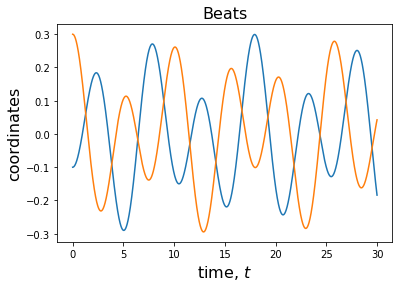

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

k1, k2 = -1.0, 0.5
A = np.array([[0 , 0 , 1, 0],
              [0 , 0 , 0, 1],
              [k1, k2, 0, 0],
              [k2, k1, 0, 0]])

initial_position = [-0.1, 0.3, 0.0, 0.0]
t = np.arange(0.0, 30.0, 0.01)
solution = odeint(lambda v, t: A.dot(v), initial_position, t)
result = np.transpose(solution)

plots = [plt.plot(t, _result)[0] for _result in result[:2]]
plt.xlabel(r'time, $t$', fontsize=16)
plt.ylabel(r'coordinates', fontsize=16)
plt.title(r'Beats', fontsize=16);

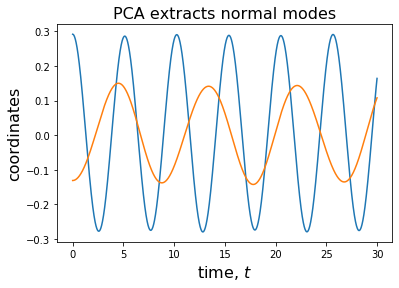

In [ ]:
features = np.transpose(result[:2])

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
for_plot = pca.fit_transform(features)

plots = [plt.plot(t, _result)[0] for _result in np.transpose(for_plot)]
plt.xlabel(r'time, $t$', fontsize=16)
plt.ylabel(r'coordinates', fontsize=16)
plt.title(r'PCA extracts normal modes', fontsize=16);

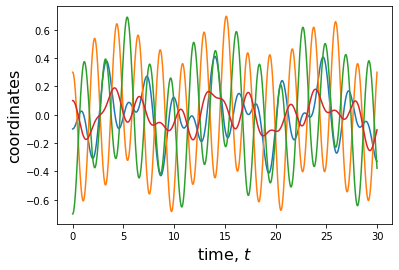

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

k1, k12, k23, k34, k4 = 1.0, 1.7, 3.4, 0.9, 1.1
m1, m2, m3, m4 = 1.0, 1.0, 1.0, 1.0
A = np.array([[0           , 0            , 0            , 0           , 1, 0, 0, 0],
              [0           , 0            , 0            , 0           , 0, 1, 0, 0],
              [0           , 0            , 0            , 0           , 0, 0, 1, 0],
              [0           , 0            , 0            , 0           , 0, 0, 0, 1],
              [-(k1+k12)/m1, k12/m1       , 0            , 0           , 0, 0, 0, 0],
              [k12/m2      , -(k12+k23)/m2, k23/m2       , 0           , 0, 0, 0, 0],
              [0           , k23/m3       , -(k23+k34)/m3, k34/m3      , 0, 0, 0, 0],
              [0           , 0            , k34/m4       , -(k34+k4)/m4, 0, 0, 0, 0]])

# define function calculating derivatives
def func_Frz(variables, t):
    return A.dot(variables)

initial_position = [-0.1, 0.3, -0.7, 0.1, 0.0, 0.0, 0.0, 0.0]
t = np.arange(0.0, 30.0, 0.01)
solution = odeint(func_Frz, initial_position, t)
result = np.transpose(solution)

plots = [plt.plot(t, _result)[0] for _result in result[:4]]
plt.xlabel(r'time, $t$', fontsize=16);
plt.ylabel(r'coordinates', fontsize=16);

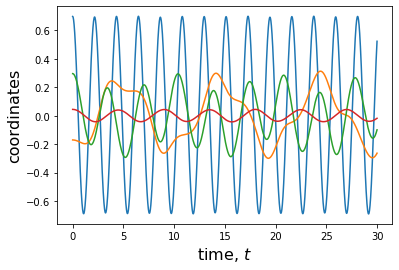

In [ ]:
features = np.transpose(result[:4])

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
for_plot = pca.fit_transform(features)

plots = [plt.plot(t, _result)[0] for _result in np.transpose(for_plot)]
plt.xlabel(r'time, $t$', fontsize=16);
plt.ylabel(r'coordinates', fontsize=16);

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

def perform_pca(X):
  pca.fit(X)
  return pca

def get_mean():
  return pca.mean_

def get_coordinate_vectors():
  return pca.components_

def get_variances():
  return pca.explained_variance_

In [ ]:
#@title PCA on 2D points
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

def draw_vector(v0, v, ax):
  v1 = v0 + v
  for idx in [0, 1]:
    if v1[idx] < -1:
      v1 = v0 - (1 + v0[idx])/v[idx] * v
    if v1[idx] > 1:
      v1 = v0 + (1 - v0[idx])/v[idx] * v

  arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='red')
  ax.annotate('', v1, v0, arrowprops=arrowprops)

def plot_pca(X):
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])

  plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c='b')
  for length, vector in zip(get_variances(), get_coordinate_vectors()):
    v = vector * 3 * np.sqrt(length)
    draw_vector(get_mean(), v, ax)

  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0

  model = perform_pca(X)
  fig = plot_pca(X)

  image_base64 = figure_to_base64(fig)
  return IPython.display.JSON({'image': image_base64})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">

    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }

    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(50, 50, 50, 0.3)';
      ctx.fill();
    }


    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');

        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });



      }
    }

    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }


    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }

    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }

    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }

    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }
  </script>
  <canvas id="canvas" width="800" height="600"
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked"> Add data point
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move data point
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete data point
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Do PCA
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s

display(IPython.display.HTML(generate_html()))


output.register_callback('notebook.InvSVM', invoke)

What we have done as a part of more general procedure on matrix $A$ that is called SVD decomposition. But before we get a hand on it, I'd like to remind you some linear algebra essentials.

#Linear algebra essentials

**Eigenvectors and eigenvalues**

An eigenvector or characteristic vector of a linear transformation is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it.

$$
A \, \boldsymbol{x}=\lambda \, \boldsymbol{x}
$$

where scalar $\lambda$ is called the **eigenvalue**.









In [ ]:
#@title ## Eigenvectors and eigenvalues
%%html

<svg width="100mm" height="85mm" version="1.1" viewBox="0 0 122.68 91.584" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".44928" fill-rule="evenodd" stroke="#00f" stroke-opacity=".44928" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".52174" fill-rule="evenodd" stroke="#000" stroke-opacity=".52174" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".52174" fill-rule="evenodd" stroke="#000" stroke-opacity=".52174" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".9372" fill-rule="evenodd" stroke="#00f" stroke-opacity=".9372" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#ff0002" fill-opacity=".44928" fill-rule="evenodd" stroke="#ff0002" stroke-opacity=".44928" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#ff0002" fill-opacity=".69082" fill-rule="evenodd" stroke="#ff0002" stroke-opacity=".69082" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-30.675 -14.263)">
  <g fill="none">
   <path d="m56.696 105.85v-90.599" marker-end="url(#e)" stroke="#000" stroke-opacity=".52174" stroke-width=".5"/>
   <path d="m33.781 87.412h118.59" marker-end="url(#Arrow1Mend)" stroke="#000" stroke-opacity=".52174" stroke-width=".5"/>
   <path d="m56.9 87.287-16.821-27.905" marker-end="url(#d)" stroke="#00f" stroke-opacity=".44928"/>
   <path d="m56.9 87.287 20.087-59.507" marker-end="url(#c)" stroke="#00f" stroke-opacity=".9372"/>
   <path d="m56.89 87.476 34.788-15.2" marker-end="url(#b)" stroke="#ff0002" stroke-opacity=".44928" stroke-width=".99593"/>
   <path d="m57.178 86.641 84.69-36.436" marker-end="url(#a)" stroke="#ff0002" stroke-opacity=".69082"/>
  </g>
  <g transform="matrix(.75983 0 0 -.75983 -129.04 541.05)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\boldsymbol{y}$$\n$$A\\boldsymbol{y}$$\n$$\\boldsymbol{x}$$\n$$A\\boldsymbol{x}=\\lambda\\boldsymbol{x}$$\n" xml:space="preserve"><g stroke-width="0"><path d="m266.84 677.98 8e-3 8e-3v0.024l8e-3 8e-3v0.024l8e-3 8e-3v0.024l8e-3 8e-3v0.024l8e-3 8e-3v0.048c0 0.16704-0.12148 0.33409-0.35687 0.33409-0.38724 0-0.47835-0.35687-0.5315-0.55429l-0.19742-0.78966c-0.0911-0.35687-0.23538-0.94153-0.3189-1.2528-0.038-0.15945-0.27335-0.34168-0.29613-0.35687-0.0835-0.0531-0.26575-0.18223-0.51632-0.18223-0.44798 0-0.45557 0.37965-0.45557 0.5467 0 0.46317 0.23538 1.0478 0.44798 1.5945 0.0759 0.19742 0.0987 0.25057 0.0987 0.37965 0 0.4328-0.44039 0.67577-0.858 0.67577-0.79726 0-1.1769-1.025-1.1769-1.1769 0-0.1063 0.11389-0.1063 0.18223-0.1063 0.0911 0 0.14427 0 0.17464 0.0987 0.25057 0.83523 0.66058 0.91116 0.77448 0.91116 0.0531 0 0.12908 0 0.12908-0.15945 0-0.17464-0.0835-0.36447-0.12908-0.48595-0.29613-0.7517-0.44799-1.1845-0.44799-1.5717 0-0.858 0.75171-0.97949 1.1997-0.97949 0.18982 0 0.44798 0.0304 0.72892 0.22779-0.2126-0.92634-0.78207-1.4199-1.306-1.4199-0.0987 0-0.31131 0.0152-0.46317 0.1063 0.24297 0.0987 0.36446 0.30371 0.36446 0.50872 0 0.26576-0.2202 0.34169-0.37206 0.34169-0.27334 0-0.5391-0.23538-0.5391-0.56947 0-0.38724 0.40243-0.66059 1.0099-0.66059 0.87318 0 1.8754 0.58466 2.1108 1.5186z"/><path d="m211.24 631.53-0.0582-0.0874-0.0218-0.0364-0.0291-0.0437-0.0291-0.0364-0.0291-0.0291-0.0218-0.0364-0.1091-0.1091-0.0582-0.0436-0.0218-0.0218-0.0291-0.0145-0.0291-0.0218-0.0582-0.0292-0.0218-0.0146-0.0291-7e-3 -0.0291-0.0146-0.0582-0.014-0.0291-0.0146-0.0291-7e-3h-0.0291l-0.0582-0.014-0.1164-0.014c-0.0874-7e-3 -0.15287-7e-3 -0.15287-0.13831 0-0.0437 0.0364-0.0801 0.0946-0.0801 0.19655 0 0.42222 0.0218 0.62605 0.0218 0.24022 0 0.49501-0.0218 0.72795-0.0218 0.0437 0 0.13832 0 0.13832 0.13831 0 0.0728-0.0655 0.0801-0.11648 0.0801-0.16743 0.0218-0.34214 0.0728-0.34214 0.25479 0 0.0874 0.0437 0.16743 0.10192 0.26934l0.54597 0.92451h1.8272l-0.0218 0.22567h-1.667l1.4341 2.3877 0.23295-2.3877 0.0218-0.22567c0.0146-0.15287 0.11647-1.1356 0.11647-1.2084 0-0.21111-0.37854-0.24023-0.52413-0.24023-0.10191 0-0.17471 0-0.17471-0.13831 0-0.0801 0.0874-0.0801 0.10192-0.0801 0.29846 0 0.61148 0.0218 0.90994 0.0218 0.18199 0 0.63333-0.0218 0.81531-0.0218 0.0437 0 0.13104 0 0.13104 0.14559 0 0.0728-0.0728 0.0728-0.16743 0.0728-0.44406 0-0.44406 0.051-0.4659 0.26207l-0.44405 4.5206c-0.0146 0.14559-0.0146 0.17471-0.13831 0.17471-0.11647 0-0.14559-0.051-0.18927-0.12375z"/><path d="m219.57 633.42v0.014l7e-3 7e-3v0.021h7e-3v0.021l7e-3 7e-3v0.028l7e-3 7e-3v0.021l7e-3 7e-3v0.028c0 0.16015-0.11648 0.3203-0.34214 0.3203-0.37854 0-0.4659-0.34214-0.51685-0.53869l-0.18927-0.7498c-0.0874-0.34941-0.22567-0.90266-0.30574-1.2011-0.0364-0.16016-0.25479-0.33487-0.27663-0.34942-0.0873-0.051-0.25478-0.16743-0.49501-0.16743-0.42949 0-0.43677 0.35669-0.43677 0.52412 0 0.44406 0.22566 1.0046 0.42949 1.5287 0.0728 0.18199 0.0946 0.23295 0.0946 0.3567 0 0.42222-0.42222 0.65517-0.8226 0.65517-0.77163 0-1.1356-0.98275-1.1356-1.1283 0-0.10191 0.10919-0.10191 0.17471-0.10191 0.0874 0 0.13831 0 0.16743 0.0946 0.24023 0.80076 0.6406 0.87355 0.7498 0.87355 0.051 0 0.12375 0 0.12375-0.15287 0-0.16743-0.0801-0.3567-0.12375-0.46589-0.28391-0.72796-0.43678-1.1356-0.43678-1.5069 0-0.8226 0.72796-0.93907 1.1574-0.93907 0.18199 0 0.4295 0.0291 0.69156 0.21839-0.20382-0.89539-0.74251-1.3613-1.2448-1.3613-0.0946 0-0.29847 0.0146-0.44406 0.10191 0.23295 0.0946 0.34942 0.28391 0.34942 0.48045 0 0.26207-0.2111 0.33486-0.3567 0.33486-0.26934 0-0.52413-0.23294-0.52413-0.55324 0-0.36398 0.38582-0.62605 0.97547-0.62605 0.83715 0 1.7908 0.55325 2.0164 1.4559z"/><path d="m287.49 622.55-0.0356-9e-3 -0.0267-9e-3 -0.0267-0.0178-0.0267-9e-3 -0.0267-0.0178-0.0267-9e-3 -0.0178-0.0178-0.0267-0.0178-0.0178-0.0178-0.0267-0.0178-0.0712-0.0712-0.0178-0.0267-0.0178-0.0178-9e-3 -0.0178-0.0178-0.0267-9e-3 -0.0178-0.0178-0.0267-9e-3 -0.0178-9e-3 -0.0267-9e-3 -0.0178-0.018-0.0534v-0.0178l-9e-3 -0.0267v-0.0178l-9e-3 -0.0267v-0.0623c0-0.19575 0.15126-0.40039 0.44487-0.40039 0.30252 0 0.63173 0.24913 0.63173 0.68511 0 0.47157-0.46267 0.77408-1.0054 0.77408-0.50716 0-0.83637-0.37369-0.95203-0.53385-0.22244 0.3648-0.7207 0.53385-1.2279 0.53385-1.1122 0-1.7172-1.0855-1.7172-1.3791 0-0.12456 0.13346-0.12456 0.21354-0.12456 0.10677 0 0.16905 0 0.20464 0.11566 0.25803 0.80967 0.89865 1.0766 1.2546 1.0766 0.3381 0 0.49826-0.16016 0.49826-0.44488 0-0.16905-0.12457-0.64951-0.20465-0.96982l-0.30251-1.2101c-0.12457-0.54275-0.44488-0.80967-0.74739-0.80967-0.0445 0-0.24913 0-0.42708 0.13346 0.32031 0.089 0.48046 0.39149 0.48046 0.61393 0 0.19574-0.15125 0.40038-0.44487 0.40038-0.31141 0-0.64062-0.24913-0.64062-0.6851 0-0.47157 0.47157-0.78298 1.0143-0.78298 0.49826 0 0.82747 0.38259 0.94314 0.54274 0.22244-0.37369 0.7207-0.54274 1.2278-0.54274 1.1211 0 1.7172 1.0944 1.7172 1.3791 0 0.12456-0.13346 0.12456-0.21354 0.12456-0.0979 0-0.16016 0-0.19575-0.11566-0.25802-0.80078-0.89864-1.0677-1.2634-1.0677-0.33811 0-0.49826 0.16015-0.49826 0.44487 0 0.18685 0.11567 0.64952 0.19574 0.97873 0.0623 0.23133 0.26693 1.0588 0.31142 1.2012 0.13346 0.53385 0.44487 0.80967 0.75628 0.80967 0.0445 0 0.24913 0 0.42708-0.13346z"/><path d="m333.94 651.05-0.0288-0.0431-0.0215-0.036-0.0288-0.0431-0.0576-0.072-0.0215-0.036-0.0864-0.0864-0.0215-0.0288-0.0864-0.0645-0.0215-0.0215-0.0288-0.0215-0.0576-0.0286-0.0215-0.0143-0.0576-0.0286-0.0288-7e-3 -0.0288-0.0143-0.0864-0.021-0.0215-7e-3 -0.0288-7e-3h-0.0288l-0.0646-7e-3 -0.0575-7e-3c-0.0863-7e-3 -0.15088-7e-3 -0.15088-0.14369 0-0.0431 0.036-0.0791 0.0934-0.0791 0.19399 0 0.41671 0.0215 0.61788 0.0215 0.23709 0 0.48855-0.0215 0.71845-0.0215 0.0431 0 0.13651 0 0.13651 0.1365 0 0.0791-0.0646 0.0863-0.11492 0.0863-0.16524 0.0143-0.33767 0.0718-0.33767 0.25146 0 0.0862 0.0431 0.16523 0.1006 0.26582l0.54604 0.91244h1.7961l-0.0215 0.21554h-1.6381l1.4082 2.3565 0.22991-2.3565 0.0215-0.21554c0.0143-0.15088 0.11492-1.1208 0.11492-1.1926 0-0.21554-0.37359-0.23709-0.51728-0.23709-0.10061 0-0.17244 0-0.17244-0.1437 0-0.0791 0.0862-0.0791 0.10061-0.0791 0.29456 0 0.6035 0.0215 0.89807 0.0215 0.17961 0 0.63224-0.0215 0.81184-0.0215 0.0431 0 0.12215 0 0.12215 0.14368 0 0.0791-0.0718 0.0791-0.16525 0.0791-0.43826 0-0.43826 0.0503-0.45981 0.25864l-0.43826 4.4616c-0.0143 0.14368-0.0143 0.16524-0.1365 0.16524-0.11492 0-0.1437-0.0503-0.1868-0.11492z"/><path d="m341.86 653.09h-0.0215l-0.0215-0.0143-0.043-0.014-0.0215-0.0143-0.0215-7e-3 -0.0215-0.0143-0.0144-0.0143-0.0215-0.0143-0.0286-0.0286-0.0215-0.0143-0.0286-0.0286-7e-3 -0.0215-0.0143-0.0144-0.0143-0.0215-7e-3 -0.0143-0.0143-0.0215-7e-3 -0.0143-7e-3 -0.0215-7e-3 -0.0143-7e-3 -0.0215-7e-3 -0.0143-7e-3 -0.0215-7e-3 -0.0143v-0.0215l-7e-3 -0.0143v-0.0358l-7e-3 -0.0215v-0.0143c0-0.15806 0.12214-0.33048 0.35923-0.33048 0.25146 0 0.51729 0.20835 0.51729 0.56039 0 0.3736-0.38078 0.62506-0.81904 0.62506-0.40233 0-0.66816-0.30893-0.76157-0.43108-0.17961 0.29457-0.58194 0.43108-0.99146 0.43108-0.90525 0-1.3866-0.87652-1.3866-1.1136 0-0.1006 0.1006-0.1006 0.16524-0.1006 0.0862 0 0.13651 0 0.16525 0.0934 0.20835 0.6538 0.72563 0.86933 1.0202 0.86933 0.27301 0 0.40232-0.12932 0.40232-0.35923 0-0.1365-0.1006-0.53165-0.16523-0.7903l-0.24428-0.9771c-0.10782-0.43108-0.36641-0.64661-0.61069-0.64661-0.036 0-0.20117 0-0.34486 0.10782 0.25865 0.0718 0.38797 0.31611 0.38797 0.48855 0 0.15806-0.12214 0.33049-0.35923 0.33049-0.25146 0-0.5101-0.20835-0.5101-0.55321 0-0.38079 0.3736-0.63225 0.81186-0.63225 0.40952 0 0.67534 0.30895 0.76874 0.43826 0.17961-0.30175 0.58195-0.43826 0.99147-0.43826 0.89807 0 1.3866 0.87652 1.3866 1.1136 0 0.1006-0.10782 0.1006-0.17243 0.1006-0.0862 0-0.1365 0-0.16525-0.0934-0.20834-0.64661-0.71845-0.86215-1.013-0.86215-0.27302 0-0.40234 0.12933-0.40234 0.35923 0 0.1437 0.0934 0.52447 0.15806 0.79031 0.0503 0.18679 0.21554 0.85495 0.25146 0.96991 0.10782 0.43108 0.35205 0.6538 0.60351 0.6538 0.0359 0 0.20116 0 0.34485-0.11492z"/><path d="m349.65 652.57h0.093l0.0143 7e-3h0.0283l7e-3 7e-3h0.0213l0.014 0.014h7e-3l0.014 0.014h7e-3l0.014 0.014v7e-3h7e-3v0.014l7e-3 7e-3v0.014l7e-3 7e-3v0.035c0 0.14369-0.1365 0.14369-0.23709 0.14369h-4.2892c-0.10061 0-0.23709 0-0.23709-0.14369s0.1365-0.14369 0.24427-0.14369z"/><path d="m349.66 651.18h0.0571l0.0143 7e-3h0.0496l7e-3 7e-3h0.0213l7e-3 7e-3h7e-3l7e-3 7e-3h7e-3l0.042 0.042v0.014h7e-3v0.014l7e-3 7e-3v0.035c0 0.1437-0.1365 0.1437-0.24427 0.1437h-4.2748c-0.10782 0-0.24427 0-0.24427-0.1437 0-0.14368 0.1365-0.14368 0.23709-0.14368z"/><path d="m354.84 652.31 0.0215-0.0718 0.0288-0.0718 0.0575-0.15087 0.0575-0.15088 0.0575-0.15807 0.0575-0.15806 0.0503-0.15805 0.0575-0.15088 0.0288-0.0791 0.0215-0.0719 0.0288-0.0718 0.0215-0.0718 0.0288-0.0646 0.043-0.1292 0.043-0.115 0.043-0.1006 0.0143-0.0503 0.0215-0.036 0.0143-0.0431 0.0286-0.0576 0.0143-0.0215 7e-3 -0.0216c0.11493-0.15806 0.18681-0.15806 0.38079-0.15806h0.15805c0.0718 7e-3 0.0791 0.0503 0.0791 0.0718s-0.0143 0.036-0.036 0.0646c-0.0718 0.0791-0.11492 0.1868-0.16523 0.33049l-1.4585 4.0593c-0.15088 0.4167-0.53884 0.5101-0.87652 0.5101-0.0359 0-0.12932 0-0.12932-0.0791 0-0.0575 0.0575-0.0718 0.0646-0.0718 0.23709-0.0431 0.28738-0.0862 0.467-0.57476l0.6969-1.9398-1.9829-1.9542c-0.0862-0.0862-0.12932-0.12932-0.12932-0.22272 0-0.12214 0.10061-0.20835 0.21554-0.20835 0.11492 0 0.17961 0.0791 0.23709 0.15088z"/><path d="m360.3 653.09h-0.0215l-0.0215-0.0143-0.043-0.014-0.0215-0.0143-0.0215-7e-3 -0.0215-0.0143-0.0143-0.0143-0.0215-0.0143-0.0286-0.0286-0.0215-0.0143-0.0286-0.0286-7e-3 -0.0215-0.0143-0.0144-0.0143-0.0215-7e-3 -0.0143-0.0144-0.0215-7e-3 -0.0143-7e-3 -0.0215-7e-3 -0.0143-7e-3 -0.0215-7e-3 -0.0143-7e-3 -0.0215-7e-3 -0.0143v-0.0215l-7e-3 -0.0143v-0.0358l-7e-3 -0.0215v-0.0143c0-0.15806 0.12214-0.33048 0.35923-0.33048 0.25146 0 0.51729 0.20835 0.51729 0.56039 0 0.3736-0.38079 0.62506-0.81905 0.62506-0.40232 0-0.66816-0.30893-0.76156-0.43108-0.17961 0.29457-0.58195 0.43108-0.99146 0.43108-0.90526 0-1.3866-0.87652-1.3866-1.1136 0-0.1006 0.10782-0.1006 0.16525-0.1006 0.0862 0 0.13651 0 0.16524 0.0934 0.20836 0.6538 0.72564 0.86933 1.0202 0.86933 0.27302 0 0.40233-0.12932 0.40233-0.35923 0-0.1365-0.1006-0.53165-0.16524-0.7903l-0.24428-0.9771c-0.10782-0.43108-0.3664-0.64661-0.61068-0.64661-0.036 0-0.20117 0-0.34486 0.10782 0.25864 0.0718 0.38797 0.31611 0.38797 0.48855 0 0.15806-0.12215 0.33049-0.35924 0.33049-0.25145 0-0.5101-0.20835-0.5101-0.55321 0-0.38079 0.37361-0.63225 0.81186-0.63225 0.40951 0 0.67535 0.30895 0.76875 0.43826 0.17961-0.30175 0.58195-0.43826 0.99146-0.43826 0.89808 0 1.3866 0.87652 1.3866 1.1136 0 0.1006-0.10782 0.1006-0.17243 0.1006-0.0862 0-0.13651 0-0.16525-0.0934-0.20835-0.64661-0.71845-0.86215-1.013-0.86215-0.27302 0-0.40233 0.12933-0.40233 0.35923 0 0.1437 0.0934 0.52447 0.15806 0.79031 0.0503 0.18679 0.21554 0.85495 0.25146 0.96991 0.10782 0.43108 0.35203 0.6538 0.60349 0.6538 0.036 0 0.20117 0 0.34487-0.11492z"/></g><g id="content" transform="matrix(1.5 0 0 -1.5 -353.44 1196.1)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\boldsymbol{0}$$\n" xml:space="preserve"><path d="m397 402.86-6e-3 0.0515v0.2573l-6e-3 0.0687-6e-3 0.0744-6e-3 0.0799-0.0109 0.0745-0.0109 0.0799-0.016 0.08-0.0108 0.08-0.0221 0.0799-0.0219 0.08-0.0276 0.0744-0.0276 0.08-0.033 0.0744-0.0772 0.1488-0.0495 0.0629-0.0495 0.0686-0.055 0.0629-0.066 0.0572-0.0276 0.0286-0.0386 0.0229-0.0332 0.0229-0.0386 0.0286-0.0386 0.0166-0.0386 0.0229-0.0441 0.0229-0.0882 0.0332-0.0441 0.0108-0.0495 0.0166-0.0495 0.0108-0.055 0.0109-0.0495 6e-3 -0.0606 6e-3 -0.055 6e-3 -0.0606 6e-3h-0.0606c-1.3222 0-1.3277-1.3553-1.3277-1.91 0-0.56614 6e-3 -1.8757 1.3277-1.8757v0.20586c-0.19832 0-0.50681 0.12579-0.57292 0.53755-0.055 0.29736-0.055 0.88638-0.055 1.2009 0 0.40601 0 0.77771 0.0495 1.0751 0.0606 0.50322 0.44623 0.56041 0.57844 0.56041 0.20384 0 0.42968-0.10872 0.53436-0.36026 0.0938-0.20587 0.0938-0.81205 0.0938-1.2752 0-0.32024 0-0.83493-0.0386-1.1323-0.077-0.5261-0.42419-0.60617-0.58946-0.60617v-0.20586c1.3222 0 1.3332 1.3038 1.3332 1.8757z" stroke-width="0"/><circle cx="398.72" cy="399.35" r=".86117" fill="#0c0000" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="4" stroke-opacity=".52174" stroke-width=".52598"/></g></g>
 </g>
</svg>


The set of all eigenvalues and eigenvectors is called **eigensystem**

$$
\{{\boldsymbol{x}_i, \lambda_i}\}
$$

Eigenvectors are not always orthogonal but for symmetric matrices they are!

**Orthogonal  matrices**


$$
U^{\top}=U^{-1}
$$

The analog of symmetric matrices in complex space are Unitary matrices.
Orthogonal matrices: rotations, reflections, basis orthonormal vectors storage.
It means for every orthonormal basis $\{\boldsymbol{e}_1,\boldsymbol{e}_2,\boldsymbol{e}_3 \}$

$$
U=\begin{pmatrix} | & | & | \\ \boldsymbol{e}_1 & \boldsymbol{e}_2 & \boldsymbol{e}_3 \\ | & | & | \end{pmatrix}
$$

is orthonormal.

In [ ]:
#@title ## Orthonormal matrix as 3 orthonormal vectors
%%html

<svg width="100mm" height="50mm" version="1.1" viewBox="0 0 174.79 83.652" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".72464" fill-rule="evenodd" stroke="#f00" stroke-opacity=".72464" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".17255" fill-rule="evenodd" stroke="#000" stroke-opacity=".17255" stroke-width="1pt"/>
  </marker>
  <marker id="i" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".17255" fill-rule="evenodd" stroke="#000" stroke-opacity=".17255" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".17255" fill-rule="evenodd" stroke="#000" stroke-opacity=".17255" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".17391" fill-rule="evenodd" stroke="#000" stroke-opacity=".17391" stroke-width="1pt"/>
  </marker>
  <marker id="k" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".17391" fill-rule="evenodd" stroke="#000" stroke-opacity=".17391" stroke-width="1pt"/>
  </marker>
  <marker id="h" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".17391" fill-rule="evenodd" stroke="#000" stroke-opacity=".17391" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".72941" fill-rule="evenodd" stroke="#00f" stroke-opacity=".72941" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#009800" fill-opacity=".72941" fill-rule="evenodd" stroke="#009800" stroke-opacity=".72941" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".17255" fill-rule="evenodd" stroke="#000" stroke-opacity=".17255" stroke-width="1pt"/>
  </marker>
  <marker id="j" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".17255" fill-rule="evenodd" stroke="#000" stroke-opacity=".17255" stroke-width="1pt"/>
  </marker>
  <marker id="g" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".17255" fill-rule="evenodd" stroke="#000" stroke-opacity=".17255" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-42.842 -82.86)">
  <g fill="none">
   <g stroke="#000" stroke-opacity=".17255">
    <path d="m93.516 128.17h24.537" marker-end="url(#i)" stroke-width=".49503"/>
    <path d="m93.516 128.17v-30.869" marker-end="url(#Arrow1Mend)" stroke-width=".59501"/>
    <path d="m93.555 128.16-15.108 12.085" marker-end="url(#f)" stroke-width=".48616"/>
   </g>
   <path d="m93.516 128.17-12.272-21.141" marker-end="url(#c)" stroke="#f00" stroke-opacity=".72464" stroke-width="1.4"/>
   <g stroke="#000" stroke-opacity=".17391">
    <path d="m133.23 129.82h34.128" marker-end="url(#h)" stroke-width=".51236"/>
    <path d="m133.23 129.82v-32.18" marker-end="url(#k)" stroke-width=".53315"/>
    <path d="m133.27 129.79-17.21 15.22" marker-end="url(#e)" stroke-width=".45175"/>
   </g>
   <path d="m133.23 129.82 24.413-19.558" marker-end="url(#b)" stroke="#00f" stroke-opacity=".72941" stroke-width="1.4"/>
   <g stroke="#000" stroke-opacity=".17255">
    <path d="m180.55 129.37h30.907" marker-end="url(#g)" stroke-width=".48024"/>
    <path d="m180.55 129.37v-31.67" marker-end="url(#j)" stroke-width=".52095"/>
    <path d="m180.56 129.35-19.172 17.929" marker-end="url(#d)" stroke-width=".50203"/>
   </g>
   <path d="m180.5 129.72 5.1574 19.018" marker-end="url(#a)" stroke="#009800" stroke-opacity=".72941" stroke-width="1.4"/>
  </g>
  <g transform="matrix(1.5 0 0 -1.5 -186.09 1173.6)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$U=\\left( 1,2,3\\right)$\n" xml:space="preserve"><path d="m158.16 703.69 0.0196 0.0685 0.01 0.0392 0.0196 0.0294 0.01 0.0392 0.01 0.0294 0.0196 0.0392 0.01 0.0294 0.098 0.147 0.0294 0.0294 0.0196 0.0195 0.0294 0.0294 0.0294 0.0196 0.0294 0.0195 0.0392 0.0196 0.0392 0.0195 0.0392 0.0196 0.0392 0.0195 0.0392 0.0196 0.0489 0.01 0.0489 0.0195 0.0489 0.01 0.1761 0.03h0.0685l0.0685 0.01h0.0686c0.0489 0 0.16641 0.01 0.16641 0.19578 0 0.01 0 0.10768-0.12725 0.10768-0.32303 0-0.66564-0.0294-0.99845-0.0294-0.33282 0-0.68521 0.0294-1.0082 0.0294-0.0587 0-0.1762 0-0.1762-0.19578 0-0.10768 0.0979-0.10768 0.1762-0.10768 0.55795-0.01 0.66563-0.21535 0.66563-0.4307 0-0.0195-0.0294-0.16641-0.0294-0.19577l-0.88099-3.475c-0.33282-1.3019-1.4585-2.1535-2.4276-2.1535-0.66563 0-1.1942 0.43071-1.1942 1.2725 0 0.0195 0 0.32302 0.10768 0.75373l0.9495 3.7882c0.0783 0.34261 0.10768 0.44049 0.81247 0.44049 0.25451 0 0.33281 0 0.33281 0.19578 0 0.10768-0.10767 0.10768-0.13704 0.10768-0.27408 0-0.97887-0.0294-1.2432-0.0294-0.28387 0-0.97887 0.0294-1.2627 0.0294-0.0783 0-0.18599 0-0.18599-0.19578 0-0.10768 0.0881-0.10768 0.27409-0.10768 0.0196 0 0.20556 0 0.37197-0.0195 0.17619-0.0196 0.2643-0.0294 0.2643-0.15662 0-0.0587-0.10768-0.46007-0.16641-0.68521l-0.21535-0.86141c-0.0881-0.37197-0.55796-2.2122-0.59712-2.3982-0.0685-0.27408-0.0685-0.42091-0.0685-0.56774 0-1.1844 0.89078-1.8599 1.9186-1.8599 1.2236 0 2.4374 1.0963 2.7604 2.3787z"/><path d="m167.78 701.68h0.0882l0.01 0.01h0.0692l0.0196 0.01h0.02l0.01 0.01h0.0196l0.01 0.01h0.01l0.05 0.05v0.01h0.01v0.02l0.01 0.01v0.03l0.01 0.01v0.03c0 0.19577-0.18599 0.19577-0.32303 0.19577h-5.8439c-0.13704 0-0.32303 0-0.32303-0.19577 0-0.19578 0.18599-0.19578 0.33282-0.19578z"/><path d="m167.79 699.8h0.1478l0.01 0.01h0.0296l0.01 0.01h0.0196l0.01 0.01h0.01l0.01 0.01h0.01l0.04 0.04v0.01l0.01 0.01v0.01l0.01 0.01v0.03l0.01 0.01v0.04c0 0.18598-0.18599 0.18598-0.33282 0.18598h-5.8243c-0.14683 0-0.33282 0-0.33282-0.18598 0-0.19577 0.18599-0.19577 0.32303-0.19577z"/><path d="m176.35 673.01v0.11h-0.0214v0.11l-0.0214 0.055v0.055h-0.0214v0.055l-0.0428 0.11v0.055h-0.0214l-0.0214 0.055v0.055h-0.0214v0.055h-0.0214v0.055h-0.0214v0.055l-0.0214 0.055h-0.0214v0.055l-0.0214 0.055h-0.0214v0.055l-0.0214 0.055h-0.0214v0.055l-0.0214 0.055c-2.6801 6.8791-3.3662 17.225-3.3662 25.59 0 9.5207 0.81477 19.041 3.452 25.865 0.27874 0.6604 0.27874 0.77045 0.27874 0.93556 0 0.38523-0.0858 0.55033-0.21441 0.55033-0.21441 0-2.1441-3.7422-3.4091-10.676-1.0935-5.9986-1.3508-12.107-1.3508-16.675 0-4.2926 0.23584-10.896 1.4151-17.06 1.2865-6.714 3.1304-10.291 3.3448-10.291 0.12864 0 0.21441 0.16507 0.21441 0.55034z"/><path d="m206.34 696.41v0.1217l-8e-3 0.043v0.0358l-8e-3 0.0358-8e-3 0.043-8e-3 0.0286-8e-3 0.0358-0.0144 0.0358-8e-3 0.0286-0.0143 0.0286-8e-3 0.0286-0.0143 0.0286-0.0144 0.0286-0.0143 0.0215-0.0143 0.0286-0.0144 0.0214-0.0215 0.0142-0.0144 0.0214-0.0214 0.0215-0.0143 0.0142-0.0214 0.0143-0.0214 0.0142-0.0214 8e-3 -0.0214 0.0143-0.0428 0.016-0.0286 8e-3h-0.0214l-0.0286 8e-3h-0.0215c-0.23637 0-0.37963-0.17906-0.37963-0.37963 0-0.1934 0.14326-0.37247 0.37963-0.37247 0.0859 0 0.17908 0.0214 0.25071 0.0859 0.0214 0.0143 0.0214 0.0214 0.0286 0.0214 0.0143 0 0.0143-8e-3 0.0143-0.10029 0-0.53005-0.24355-0.95983-0.47992-1.189-0.0788-0.0788-0.0788-0.0931-0.0788-0.11467 0-0.0502 0.0358-0.0788 0.0717-0.0788 0.0788 0 0.64466 0.54438 0.64466 1.3824z"/><path d="m238.8 695.68v0.1275l-7e-3 0.0451v0.0375l-7e-3 0.0375-7e-3 0.0451-7e-3 0.0299-7e-3 0.0375-0.015 0.0376-7e-3 0.0299-0.015 0.03-7e-3 0.03-0.015 0.0301-0.015 0.03-0.015 0.0225-0.015 0.0299-0.015 0.0225-0.0225 0.015-0.015 0.0225-0.0375 0.0375-0.045 0.03-0.0225 7e-3 -0.0225 0.015-0.0225 7e-3 -0.03 7e-3 -0.0225 7e-3h-0.0225l-0.0301 7e-3h-0.0225c-0.24761 0-0.39768-0.18758-0.39768-0.39768 0-0.20259 0.15007-0.39017 0.39768-0.39017 0.0826 0 0.18008 0.0225 0.25511 0.09 0.0225 0.015 0.0299 0.0225 0.0375 0.0225 7e-3 0 0.015-7e-3 0.015-0.10505 0-0.55526-0.26262-1.0055-0.50273-1.2456-0.0826-0.0826-0.0826-0.0976-0.0826-0.12006 0-0.0525 0.0375-0.0826 0.075-0.0826 0.0826 0 0.6753 0.57026 0.6753 1.4482z"/><path d="m269.15 699.16v1.285l-0.0224 0.44694v0.94978l-0.0448 0.94976-0.0224 1.0056-0.0448 1.0615-0.0672 1.1174-0.0672 1.1174-0.0896 1.1174-0.22398 2.3465-0.13439 1.1732-0.15679 1.1732-0.17919 1.1732-0.11199 0.61456-0.0896 0.61456-0.112 0.55869-0.11198 0.61455c-1.3439 6.816-3.2478 10.447-3.4717 10.447-0.13439 0-0.22399-0.22348-0.22399-0.55869 0-0.16757 0-0.27935 0.42557-1.285 2.1726-5.531 3.4493-14.358 3.4493-25.923 0-9.4977-0.82873-19.275-3.5837-26.258-0.29118-0.67043-0.29118-0.78216-0.29118-0.94976 0-0.33521 0.0896-0.55869 0.22399-0.55869 0.22397 0 2.2174 3.7991 3.5389 10.838 1.1423 6.0897 1.4111 12.235 1.4111 16.928z"/><g id="content" transform="matrix(.7483 0 0 -.7483 9.4314 882.93)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\\boldsymbol{e}_1,\\boldsymbol{e}_2,\\boldsymbol{e}_3$\n" xml:space="preserve"><path d="m234.78 238.44h0.1608l0.0772-6e-3h0.0772l0.1544-0.012 0.0707-6e-3 0.0772-6e-3 0.0707-6e-3 0.0643-0.0129 0.0707-6e-3 0.0643-0.0129 0.1158-0.0258 0.0321-6e-3 0.0257-6e-3 0.0257-0.0129 0.0257-6e-3c0.54677-0.18655 0.63682-0.54677 0.63682-0.75262 0-0.37309-0.35379-0.6111-0.88127-0.6111v0.22515c0.23158 0 0.49532 0.10291 0.49532 0.39238 0 0.64327-0.97133 0.64327-1.5889 0.64327 0.11579-0.46315 0.27017-0.63684 0.3731-0.73975 0.22514-0.22515 0.52104-0.2959 0.72045-0.2959v-0.22515c-1.1579 0-1.9812 0.79765-1.9812 1.7883 0 0.73332 0.49531 1.145 1.3444 1.145 0.16081 0 0.60466 0 0.99062-0.14795 0.37309-0.14795 0.6304-0.41169 0.6304-0.48889 0-0.0514-0.10293-0.16725-0.16082-0.16725-0.0386 0-0.0514 0.0193-0.0965 0.0707-0.34736 0.36666-0.84911 0.50818-1.3444 0.50818-0.46315 0-0.6304-0.25731-0.6304-0.62397 0-0.11579 0.0257-0.32807 0.0965-0.5918z"/><path d="m238.41 237.95v-0.066h-6e-3v-0.024h-6e-3v-6e-3l-0.012-0.012h-6e-3l-6e-3 -6e-3h-0.024l-6e-3 -6e-3h-0.06c-0.28947 0.28304-0.69472 0.28947-0.88128 0.28947v0.16082c0.10936 0 0.40526 0 0.6497-0.12865v2.2836c0 0.14795 0 0.20584-0.45028 0.20584h-0.16725v0.16081c0.0772-6e-3 0.6304-0.0193 0.79765-0.0193 0.14151 0 0.70759 0.0129 0.81051 0.0193v-0.16081h-0.17368c-0.45028 0-0.45028-0.0579-0.45028-0.20584z"/><path d="m293.87 236.79h0.1567l0.0752-6e-3h0.0752l0.2256-0.018 0.1378-0.012 0.069-0.0125 0.0627-6e-3 0.0627-0.0126 0.0627-0.0125 0.0564-0.0126 0.0502-0.012 0.0251-0.0125 0.0251-6e-3c0.53254-0.18168 0.62025-0.53253 0.62025-0.733 0-0.36338-0.34459-0.5952-0.85206-0.5952v0.21928c0.21928 0 0.47614 0.10028 0.47614 0.38218 0 0.62651-0.93976 0.62651-1.5475 0.62651 0.11277-0.45109 0.26314-0.62025 0.36964-0.72049 0.21929-0.21928 0.50747-0.2882 0.7017-0.2882v-0.21928c-1.134 0-1.9359 0.77688-1.9359 1.7417 0 0.71422 0.48241 1.1152 1.3094 1.1152 0.1629 0 0.59519 0 0.96483-0.1441 0.36338-0.14409 0.61398-0.40097 0.61398-0.47614 0-0.0501-0.10027-0.1629-0.15662-0.1629-0.0376 0-0.0501 0.0188-0.094 0.0689-0.33831 0.3571-0.82073 0.49494-1.3094 0.49494-0.45109 0-0.61397-0.25061-0.61397-0.60773 0-0.11276 0.0251-0.31951 0.094-0.57638z"/><path d="m298.15 238.29h-0.15037c-0.0126 0.10028-0.0564 0.35711-0.11277 0.40096-0.0313 0.0251-0.36964 0.0251-0.4323 0.0251h-0.8082c0.46362-0.40723 0.61399-0.52628 0.87712-0.73302 0.32579-0.25687 0.62652-0.52628 0.62652-0.93978 0-0.52626-0.46362-0.85205-1.0212-0.85205-0.54506 0-0.91471 0.38216-0.91471 0.78313 0 0.21929 0.18795 0.24435 0.23181 0.24435 0.10651 0 0.23181-0.0752 0.23181-0.23182 0-0.0814-0.0313-0.2318-0.25688-0.2318 0.13784-0.30699 0.4323-0.40724 0.63905-0.40724 0.43856 0 0.66411 0.33833 0.66411 0.69543 0 0.3759-0.26941 0.67664-0.40724 0.83327l-1.0588 1.04c-0.0439 0.0376-0.0439 0.0439-0.0439 0.16916h1.8044z"/><path d="m321.41 269.28h0.1879l0.0902-8e-3h0.0902l0.0977-8e-3 0.0827-8e-3 0.0902-8e-3 0.1654-0.016 0.0827-0.015 0.0751-8e-3 0.1502-0.03 0.0676-0.015 0.0602-0.016 0.0376-0.015 0.0301-8e-3c0.63117-0.2179 0.73636-0.63868 0.73636-0.87913 0-0.4358-0.40575-0.71382-1.0219-0.71382v0.26299c0.2705 0 0.57857 0.12022 0.57857 0.45835 0 0.75139-1.1346 0.75139-1.8634 0.75139 0.13525-0.541 0.31558-0.74388 0.44332-0.8641 0.26299-0.26299 0.60863-0.34564 0.84156-0.34564v-0.26299c-1.36 0-2.3143 0.93173-2.3143 2.0889 0 0.85659 0.57106 1.3375 1.5629 1.3375 0.19536 0 0.71382 0 1.1571-0.17282 0.43581-0.17282 0.73636-0.48089 0.73636-0.57106 0-0.0601-0.12022-0.19536-0.18784-0.19536-0.0451 0-0.0601 0.0225-0.11271 0.0827-0.39824 0.42829-0.98433 0.5936-1.5704 0.5936-0.54101 0-0.73637-0.30056-0.73637-0.72885 0-0.13525 0.0301-0.38321 0.11271-0.69128z"/><path d="m325.32 270.28h0.0752l0.0376 8e-3h0.0376l0.0376 8e-3 0.0301 0.015 0.0376 8e-3 0.0903 0.045 0.03 0.015 0.0301 0.015 0.0225 0.0225 0.0301 0.0225 0.0225 0.0225 0.0225 0.0301 0.0301 0.0225 0.015 0.0301 0.0225 0.0301 0.0226 0.03 0.075 0.188 8e-3 0.0451 8e-3 0.0376 8e-3 0.0451 8e-3 0.0526v0.0451l8e-3 0.0526v0.0526c0 0.6462-0.3757 0.84156-0.68377 0.84156-0.21039 0-0.66874-0.0601-0.89416-0.36818 0.24796-0.015 0.30807-0.18785 0.30807-0.29304 0-0.16531-0.12773-0.28553-0.29304-0.28553-0.14276 0-0.29304 0.0902-0.29304 0.30056 0 0.4884 0.54851 0.8115 1.1797 0.8115 0.73637 0 1.2398-0.4884 1.2398-1.0069 0-0.41326-0.33813-0.81901-0.9167-0.93924 0.54852-0.19536 0.75139-0.58608 0.75139-0.90918 0-0.41327-0.48089-0.72134-1.0595-0.72134-0.58609 0-1.0294 0.28553-1.0294 0.6988 0 0.18033 0.11271 0.27801 0.2705 0.27801 0.16531 0 0.27051-0.12022 0.27051-0.26298 0-0.15028-0.1052-0.26299-0.27051-0.2705 0.18785-0.23294 0.54852-0.29305 0.74388-0.29305 0.23293 0 0.56355 0.12022 0.56355 0.57106 0 0.2179-0.0751 0.45835-0.21039 0.62366-0.17282 0.19536-0.31559 0.21039-0.57858 0.22541-0.13525 8e-3 -0.14276 8e-3 -0.17282 0.015-8e-3 0-0.0526 8e-3 -0.0526 0.0676 0 0.0751 0.0451 0.0751 0.13525 0.0751z"/></g></g>
 </g>
</svg>



**Symmetric matrices**

$$
A^{\top}=A
$$

Every matrix $B$ can generate symmetric matrices via

$$
B \rightarrow B^{\top} B
$$

or

$$
B \rightarrow B \, B^{\top}
$$


The analog of symmetric matrices in complex space are Hermitian matrices.

Used to store coefficient quadratic forms $\boldsymbol{x}^{\top} A \boldsymbol{x}$. In statistics covariance matrix $\Sigma$ and sample covariance matrix $S$ are examples of symmetric matrices.
In physics: Hermitian matrices are analogs of observable (physical quantaties).
In statistics and ML: covariance matrix is symmetric.

Eigenvectors of symmetric matrices that correspond to different eigenvalues are othogonal. In fact we can switch to orthonormal basis consisting of eigenvectors
this is Eigendecomposition of a symmetric matrix.

Decompositions:
* $\color{grey}{\text{LU decomposition}}$
* $\color{grey}{\text{Cholesky decomposition}}$
* $\color{grey}{\text{QR decomposition}}$
* $\color{grey}{\text{Polar decomposition}}$
* $\text{Eigendecomposition(spectral) / Власний розклад матриці}$
* $\color{grey}{\text{Jordan decomposition}}$
* $\text{Singular value decomposition / Сингулярний розклад матриці}$
* $\color{grey}{etc}$

##Eigendecomposition of a symmetric matrix / Власний розклад симетричної матриці

Suppose $A$ is $n\times n$ symmetric matrix then it's possible to switch to the orthonormal basis that consists of eigenvectors of $A$. In this basis $A$ will be diagonal matrix consisting of the eigenvalues of $A$.

$$
\begin{aligned}
A &= U \Lambda U^{\top} \\
\Lambda &= \text{diag}\{\lambda_1, \dots, \lambda_n\}
\end{aligned}
$$

where

$$
U=\begin{pmatrix} | & | & |\\
 \boldsymbol{x}_1 & \cdots & \boldsymbol{x}_n \\
 | & | & | \end{pmatrix} \\
$$

where $U$ is orthonormal matrix composed from the independent unit norm eigenvectors $\{\boldsymbol{x}_i\}$ of $A$:

$$
A \boldsymbol{x}_i
=\lambda_i \boldsymbol{x}_i.
$$

Eigenvalue(spectral) decomposition is useful for many thing particularly

* Matrix powers and matrix functions

$$
A^n=U \Lambda^n U^{\top}
$$

and

$$
f(A)=U f(\Lambda) U^{\top}.
$$

* Determinant

$$
\det (A) =\prod_i{\lambda_i}.
$$


* Trace

$$
\text{trace} (A)=\sum_i{\lambda_i}.
$$

* Positive-definiteness

Matrix $A$ is positive-definite iff $\lambda_i > 0$.

##$\text{SVD}$ decomposition / Сингулярний розклад матриці

Suppose $A$ is $m\times n$ matrix

$$
A=U \, \Sigma \, V^{\top},
$$

where
* $U$ is $m \times m $ orthonormal matrix;
* $V$ is $n \times n $ orthonormal matrix;
* $\Lambda$ is $m\times n$ diagonal matrix.

The diagonal entries $\sigma_i$ of $\Sigma$ are known as the **singular values** of $A$. A common convention is to list the singular values in descending order.

In [ ]:
#@title ## SVD
%%html
<svg width="130mm" height="150mm" version="1.1" viewBox="0 0 188.57 202.55" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <g transform="translate(-8.6999 -10.028)">
  <rect x="122.41" y="10.452" width="10.29" height="10.123" fill="#ff9f00" fill-opacity=".86957"/>
  <rect x="132.78" y="20.654" width="10.451" height="9.5713" fill="#ff9f50" fill-opacity=".45894"/>
  <rect x="100.55" y="10.155" width="9.7313" height="39.802" fill="#00575e" fill-opacity=".55556"/>
  <rect x="69.185" y="10.191" width="10.446" height="39.802" fill="#004bc9" fill-opacity=".19807"/>
  <rect x="90.164" y="10.234" width="10.154" height="39.802" fill="#3143ff" fill-opacity=".37198"/>
  <rect x="79.631" y="10.252" width="10.446" height="39.802" fill="#008c00" fill-opacity=".45894"/>
  <rect x="8.8425" y="12.344" width="31.357" height="39.956" fill-opacity=".14976" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".28512"/>
  <g fill="none" stroke="#000">
   <g stroke-width=".1">
    <path d="m19.309 12.425v39.742"/>
    <path d="m29.842 12.407v39.799"/>
    <path d="m8.9228 22.622h31.467"/>
    <path d="m8.8379 32.289h31.404"/>
    <path d="m8.9721 42.23h31.467"/>
   </g>
   <path d="m8.8086 52.219h31.404" stroke-width=".26458px"/>
  </g>
  <rect x="69.185" y="10.191" width="41.011" height="39.916" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".3259"/>
  <g fill="none" stroke="#000">
   <g>
    <path d="m79.631 10.252v39.742" stroke-width=".35"/>
    <path d="m90.164 10.234v39.799" stroke-width=".35"/>
    <g stroke-opacity=".66667" stroke-width=".1">
     <path d="m69.245 20.449h41.061"/>
     <path d="m69.16 30.115h41.04"/>
     <path d="m69.294 40.057h40.975"/>
    </g>
   </g>
   <path d="m69.131 50.045h31.404" stroke-width=".26458px"/>
   <path d="m100.44 10.155v39.799" stroke-width=".35"/>
  </g>
  <rect x="122.28" y="10.333" width="31.357" height="39.956" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".28512"/>
  <g fill="none" stroke="#000">
   <g stroke-opacity=".59903" stroke-width=".1">
    <path d="m132.75 10.414v39.742"/>
    <path d="m143.28 10.396v39.799"/>
    <path d="m122.36 20.611h31.467"/>
    <path d="m122.27 30.277h31.404"/>
    <path d="m122.41 40.219h31.289"/>
   </g>
   <path d="m122.25 50.207h31.404" stroke-width=".26458px"/>
  </g>
  <rect x="165.75" y="20.025" width="31.396" height="29.931" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".24692"/>
  <g fill="none" stroke="#000">
   <g>
    <path d="m176.23 20.125v29.867" stroke-opacity=".71498" stroke-width=".1"/>
    <path d="m186.77 20.107v29.735" stroke-opacity=".71498" stroke-width=".1"/>
    <path d="m165.85 30.322h31.42" stroke-width=".35"/>
    <path d="m165.76 39.988h31.404" stroke-width=".35"/>
   </g>
   <path d="m165.9 49.918h31.245" stroke-width=".26365px"/>
  </g>
  <rect x="165.87" y="20.147" width="31.152" height="9.9884" fill="#00005f" fill-opacity=".38647"/>
  <rect x="165.75" y="30.455" width="31.271" height="9.418" fill="#640a7b" fill-opacity=".5314"/>
  <rect x="165.97" y="40.119" width="31.241" height="9.811" fill="#7b00b4" fill-opacity=".17391"/>
  <rect x="143.34" y="30.327" width="10.15" height="9.8461" fill="#fffd50" fill-opacity=".45894"/>
  <g fill-opacity=".45411" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433">
   <g id="content" transform="matrix(.64847 0 0 -.64847 40.351 505.62)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
   <g transform="matrix(.64847 0 0 -.64847 50.582 505.9)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
   <g transform="matrix(.64847 0 0 -.64847 29.868 505.77)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
   <g transform="matrix(.64847 0 0 -.64847 29.768 495.38)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
   <g transform="matrix(.64847 0 0 -.64847 40.392 495.64)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
   <g transform="matrix(.64847 0 0 -.64847 50.515 486.32)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
   <g transform="matrix(.64847 0 0 -.64847 30.002 486.59)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
   <g transform="matrix(.64847 0 0 -.64847 40.007 476.08)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
   <g transform="matrix(.64847 0 0 -.64847 50.638 476.36)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
  </g>
  <g transform="rotate(90 127.49 156.74)" stroke="#000">
   <rect x="61.137" y="99.771" width="41.011" height="39.916" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".3259"/>
   <g fill="none">
    <path d="m71.584 99.832v39.742" stroke-width=".22029px"/>
    <path d="m82.116 99.814v39.799" stroke-width=".22045px"/>
    <path d="m61.197 110.03h41.061" stroke-width=".30224px"/>
    <path d="m61.112 119.7h41.04" stroke-width=".30246px"/>
    <path d="m61.247 129.64h40.975" stroke-width=".30192px"/>
    <path d="m61.083 139.63h31.404" stroke-width=".26458px"/>
    <path d="m92.388 99.735v39.799" stroke-width=".22045px"/>
   </g>
  </g>
  <g fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433">
   <g fill-opacity=".45411">
    <g transform="matrix(.64847 0 0 -.64847 61.776 556.28)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 71.732 556.41)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 81.087 556.35)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 81.112 567.53)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 71.474 567.9)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 61.788 577.4)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 51.536 577.21)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 52.008 587.42)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 62.119 587.32)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 72.041 587.37)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 81.537 578.01)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 51.441 566.86)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
   </g>
   <g fill-opacity=".73913">
    <g transform="matrix(.69112 0 0 -.69112 45.309 586.63)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" fill-opacity=".73913" stroke-width="0"/></g>
    <g transform="matrix(.69112 0 0 -.69112 55.214 597.33)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" fill-opacity=".73913" stroke-width="0"/></g>
    <g transform="matrix(.69112 0 0 -.69112 65.32 607.7)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" fill-opacity=".73913" stroke-width="0"/></g>
    <g transform="matrix(.69112 0 0 -.69112 75.008 617.45)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" fill-opacity=".73913" stroke-width="0"/></g>
   </g>
  </g>
  <rect x="152.38" y="165.44" width="31.396" height="29.931" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".24692"/>
  <g fill="none" stroke="#000">
   <path d="m162.86 165.54v29.867" stroke-width=".19097px"/>
   <path d="m173.4 165.53v29.735" stroke-width=".19055px"/>
   <g stroke-width=".26458px">
    <path d="m152.48 175.74h31.467"/>
    <path d="m152.39 185.41h31.404"/>
    <path d="m152.53 195.35h31.467"/>
    <path d="m152.36 195.38h31.404"/>
   </g>
  </g>
  <g fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433">
   <g fill-opacity=".73913">
    <g transform="matrix(.69112 0 0 -.69112 53.429 661.77)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" fill-opacity=".73913" stroke-width="0"/></g>
    <g transform="matrix(.69112 0 0 -.69112 63.852 671.66)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" fill-opacity=".73913" stroke-width="0"/></g>
    <g transform="matrix(.69112 0 0 -.69112 74.276 681.48)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" fill-opacity=".73913" stroke-width="0"/></g>
   </g>
   <g fill-opacity=".45411">
    <g transform="matrix(.64847 0 0 -.64847 70.198 631.37)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 59.942 641.33)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 60.075 651.28)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 70.332 651.35)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 81.037 641.28)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
    <g transform="matrix(.64847 0 0 -.64847 80.942 631.59)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" fill-opacity=".45411" stroke-width="0"/></g>
   </g>
   <g transform="matrix(1.7304 0 0 -1.7304 -216.68 1300.1)" ns0:preamble="default_packages.tex" ns0:text="$A=U\\Sigma V^{\\top}$\n" xml:space="preserve"><g stroke-width="0"><path d="m138.7 713.91-0.0286-0.0428-0.057-0.0856-0.0214-0.0357-0.0285-0.0357-0.0285-0.0285-0.0214-0.0357-0.0286-0.0285-0.0784-0.0784-0.057-0.0428-0.0286-0.0214-0.0214-0.0143-0.0285-0.0214-0.0855-0.0429-0.0214-0.0143-0.057-0.014-0.0285-0.0143-0.0855-0.021h-0.0285l-0.0285-7e-3 -0.1142-0.014c-0.0856-7e-3 -0.14986-7e-3 -0.14986-0.14272 0-0.0428 0.0357-0.0714 0.0928-0.0714 0.19268 0 0.4139 0.0214 0.61371 0.0214 0.2355 0 0.48526-0.0214 0.70648-0.0214 0.0428 0 0.14273 0 0.14273 0.12845 0 0.0785-0.0642 0.0856-0.12132 0.0856-0.15699 0.0143-0.32826 0.0714-0.32826 0.24977 0 0.0856 0.0428 0.16413 0.0999 0.26404l0.53522 0.90629h1.7912l-0.0214 0.22123h-1.635l1.4058 2.3407 0.22836-2.3407 0.0214-0.22123c0.0143-0.14986 0.11418-1.1132 0.11418-1.1846 0-0.21409-0.37108-0.2355-0.51381-0.2355-0.0999 0-0.17126 0-0.17126-0.14272 0-0.0714 0.0856-0.0714 0.0999-0.0714 0.29259 0 0.59944 0.0214 0.89203 0.0214 0.1784 0 0.62084-0.0214 0.79925-0.0214 0.0428 0 0.12845 0 0.12845 0.13558 0 0.0785-0.0714 0.0785-0.16413 0.0785-0.44245 0-0.44245 0.05-0.46385 0.25691l-0.42818 4.4316c-0.0143 0.14272-0.0143 0.17127-0.13558 0.17127-0.11418 0-0.14273-0.05-0.18554-0.12132z"/><path d="m158.08 715.98h0.0642l7e-3 7e-3h0.0569l7e-3 7e-3h0.0213l7e-3 7e-3h7e-3l7e-3 7e-3h7e-3l0.042 0.042v7e-3l7e-3 7e-3v0.014h7e-3v0.042c0 0.14272-0.13559 0.14272-0.23549 0.14272h-4.2603c-0.0999 0-0.23549 0-0.23549-0.14272 0-0.14273 0.13559-0.14273 0.24263-0.14273z"/><path d="m158.09 714.61h0.1066l0.0143 7e-3h0.014l0.0143 7e-3h7e-3l7e-3 7e-3h7e-3l7e-3 7e-3h7e-3l0.021 0.021h7e-3v0.014h7e-3v7e-3l7e-3 7e-3v0.014l7e-3 7e-3v0.042c0 0.13559-0.13559 0.13559-0.24263 0.13559h-4.246c-0.10704 0-0.24263 0-0.24263-0.13559 0-0.14273 0.13559-0.14273 0.23549-0.14273z"/><path d="m179.33 717.28 0.0143 0.0499 7e-3 0.0285 7e-3 0.0214 7e-3 0.0285 0.0143 0.0214 7e-3 0.0285 0.0286 0.0428 7e-3 0.0214 0.0286 0.0428 0.0214 0.0214 0.0143 0.0214 0.0214 0.0143 0.0214 0.0214 0.0642 0.0429 0.0855 0.0429 0.0357 0.0143 0.0357 7e-3 0.0357 0.0143 0.0357 7e-3 0.1284 0.021h0.0428l0.0499 7e-3h0.057c0.0357 0 0.12131 7e-3 0.12131 0.14272 0 7e-3 0 0.0785-0.0928 0.0785-0.23549 0-0.48526-0.0214-0.72789-0.0214s-0.50667 0.0214-0.74216 0.0214c-0.0428 0-0.12845 0-0.12845-0.14272 0-0.0785 0.0714-0.0785 0.12845-0.0785 0.40676-7e-3 0.48526-0.157 0.48526-0.31399 0-0.0143-0.0143-0.12132-0.0214-0.14273l-0.64225-2.5333c-0.24264-0.94911-1.0562-1.57-1.7698-1.57-0.48526 0-0.87061 0.31399-0.87061 0.9277 0 0.0143 0 0.2355 0.0785 0.54949l0.69221 2.7617c0.0642 0.24977 0.0785 0.32113 0.59944 0.32113 0.18554 0 0.24263 0 0.24263 0.14272 0 0.0785-0.0785 0.0785-0.0999 0.0785-0.19982 0-0.71362-0.0214-0.91343-0.0214-0.20695 0-0.71362 0.0214-0.92057 0.0214-0.0571 0-0.12845 0-0.12845-0.14272 0-0.0785 0.0642-0.0785 0.19267-0.0785 0.0143 0 0.14986 0 0.27118-0.0143 0.12845-0.0143 0.19268-0.0214 0.19268-0.11418 0-0.0428-0.0785-0.3354-0.12132-0.49953l-0.157-0.62799c-0.0571-0.27117-0.39962-1.6128-0.42817-1.7484-0.0499-0.19982-0.0499-0.30686-0.0499-0.4139 0-0.86348 0.64226-1.3559 1.3916-1.3559 0.89916 0 1.7769 0.79925 2.0124 1.7341z"/><path d="m205.08 715.1v7e-3l0.021 0.021v7e-3h7e-3v7e-3l0.014 0.014v7e-3l7e-3 7e-3v7e-3l7e-3 7e-3v0.028c0 0.0357-0.0214 0.0714-0.0428 0.0999l-1.4629 2.098h1.6485c1.1989 0 1.5557-0.2569 1.7055-1.3773h0.17841l-0.19981 1.5985h-3.9534c-0.17127 0-0.18554 0-0.18554-0.16413l1.7769-2.5619-1.6984-1.9268c-0.0714-0.0785-0.0714-0.0928-0.0714-0.11418 0-0.0714 0.0714-0.0714 0.17841-0.0714h3.9534l0.19981 1.6699h-0.17841c-0.12845-1.1846-0.61371-1.3773-1.727-1.3773h-1.9696z"/><path d="m230.6 716.75 0.0357 0.0499 0.0285 0.0428 0.0357 0.0499 0.0285 0.0357 0.0357 0.0428 0.057 0.0714 0.0357 0.0285 0.057 0.057 0.057 0.0428 0.0357 0.0214 0.0285 0.0214 0.114 0.0572 0.0214 7e-3 0.0285 0.0143 0.0855 0.021h0.0214l0.0285 7e-3h0.0285l0.0499 7e-3 0.05 7e-3h0.0499c0.0856 7e-3 0.0928 0.12845 0.0928 0.13559 0 0.0571-0.0357 0.0856-0.0928 0.0856-0.18554 0-0.39249-0.0214-0.58517-0.0214-0.23549 0-0.47812 0.0214-0.69934 0.0214-0.0428 0-0.13559 0-0.13559-0.13558 0-0.0785 0.0571-0.0856 0.11418-0.0856 0.18554-0.0143 0.32113-0.0856 0.32113-0.23549 0-0.0999-0.10705-0.2569-0.10705-0.26404l-2.1837-3.461-0.48526 3.7465c0 0.12131 0.16413 0.21408 0.4924 0.21408 0.0999 0 0.1784 0 0.1784 0.14273 0 0.0642-0.0571 0.0785-0.0999 0.0785-0.28545 0-0.59231-0.0214-0.87776-0.0214-0.12845 0-0.26403 7e-3 -0.39249 7e-3 -0.12845 0-0.26403 0.0143-0.38535 0.0143-0.05 0-0.13559 0-0.13559-0.13558 0-0.0856 0.0642-0.0856 0.17841-0.0856 0.39962 0 0.40676-0.0642 0.42817-0.24263l0.55662-4.3673c0.0214-0.14273 0.0571-0.16414 0.14272-0.16414 0.11418 0 0.14273 0.0357 0.19982 0.12845z"/><path d="m234.22 718.49h1.52c0.0856 0 0.19981 0 0.19981 0.12132 0 0.12845-0.11418 0.12845-0.19981 0.12845h-3.2826c-0.0785 0-0.19981 0-0.19981-0.12131 0-0.12846 0.11418-0.12846 0.19981-0.12846h1.52v-3.0043c0-0.0785 0-0.19268 0.12131-0.19268 0.12132 0 0.12132 0.12132 0.12132 0.19268z"/></g><g transform="matrix(1.1284 0 0 1.1284 -270.2 -53.614)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$m \\times n$$\n$$m \\times n$$\n$$m \\times m$$\n$$n \\times n$$\n" xml:space="preserve"><g stroke-width="0"><path d="m360.04 676.03v-7e-3l-3e-3 -3e-3v-0.01l-3e-3 -0.0102-3e-3 -0.0136v-0.0102l-9e-3 -0.0306v-0.01l-3e-3 -7e-3v-0.01l-3e-3 -3e-3v-0.016l-3e-3 -3e-3v-9e-3c0-0.0614 0.0477-0.0921 0.0989-0.0921 0.041 0 0.10234 0.0273 0.12622 0.0955 3e-3 7e-3 0.0443 0.16715 0.0648 0.24902l0.075 0.30702c0.0204 0.075 0.041 0.15009 0.0579 0.22514 0.0136 0.0579 0.041 0.15692 0.0443 0.17057 0.0512 0.10575 0.22855 0.41277 0.55263 0.41277 0.1535 0 0.1842-0.12623 0.1842-0.23538 0-0.0853-0.0238-0.1808-0.0512-0.28314l-0.0955-0.3923-0.0682-0.25926c-0.0136-0.0648-0.0443-0.18079-0.0443-0.19785 0-0.0614 0.0477-0.0921 0.0989-0.0921 0.10576 0 0.12622 0.0853 0.15351 0.19444 0.0477 0.18763 0.17398 0.68226 0.20468 0.8153 0.0102 0.0444 0.19103 0.4503 0.55945 0.4503 0.14669 0 0.18421-0.11599 0.18421-0.23538 0-0.19445-0.14328-0.57992-0.2115-0.76072-0.0308-0.0819-0.0443-0.1194-0.0443-0.18421 0-0.16033 0.11939-0.27973 0.27973-0.27973 0.32066 0 0.44687 0.49463 0.44687 0.52193 0 0.0341-0.0307 0.0341-0.041 0.0341-0.0341 0-0.0341-0.0102-0.0512-0.0614-0.0512-0.18079-0.16033-0.41959-0.34795-0.41959-0.058 0-0.0819 0.0341-0.0819 0.11258 0 0.0819 0.0308 0.16374 0.0614 0.23879 0.0649 0.17738 0.20809 0.55263 0.20809 0.74707 0 0.21832-0.13645 0.3616-0.39229 0.3616-0.25245 0-0.42642-0.1501-0.55264-0.32749-3e-3 0.0444-0.0136 0.15693-0.10916 0.2388-0.0853 0.0716-0.19445 0.0887-0.27972 0.0887-0.30702 0-0.47076-0.21833-0.52875-0.29337-0.0171 0.19103-0.16033 0.29337-0.31384 0.29337-0.15692 0-0.22174-0.13304-0.25243-0.19445-0.0614-0.11598-0.10576-0.31725-0.10576-0.32749 0-0.0341 0.0341-0.0341 0.041-0.0341 0.0341 0 0.0375 3e-3 0.058 0.0785 0.0579 0.23879 0.12622 0.40254 0.24902 0.40254 0.0546 0 0.10575-0.0273 0.10575-0.15352 0-0.0716-0.0102-0.10916-0.0546-0.28654z"/><path d="m364.18 676.77-0.67885 0.67542c-0.041 0.041-0.0477 0.0477-0.0751 0.0477-0.0341 0-0.0682-0.0307-0.0682-0.0682 0-0.0238 7e-3 -0.0308 0.0443-0.0682l0.67884-0.68226-0.67884-0.67885c-0.0375-0.0375-0.0443-0.0443-0.0443-0.0682 0-0.0375 0.0341-0.0682 0.0682-0.0682 0.0273 0 0.0341 7e-3 0.0751 0.0477l0.67544 0.67542 0.70613-0.70271c7e-3 -3e-3 0.0308-0.0204 0.0512-0.0204 0.041 0 0.0683 0.0308 0.0683 0.0682 0 7e-3 0 0.0204-0.0102 0.0375-3e-3 7e-3 -0.54581 0.53899-0.71638 0.70955l0.62427 0.62085c0.0171 0.0204 0.0682 0.0648 0.0819 0.0853 7e-3 7e-3 0.0204 0.0204 0.0204 0.0443 0 0.0375-0.0273 0.0682-0.0683 0.0682-0.0273 0-0.041-0.0136-0.0785-0.0512z"/><path d="m366.06 676.06v-0.01l-3e-3 -7e-3v-3e-3l-3e-3 -0.0102v-0.0136l-9e-3 -0.0306v-0.0102l-3e-3 -7e-3v-0.01l-3e-3 -3e-3v-0.013l-3e-3 -3e-3v-0.016l-3e-3 -3e-3v-3e-3c0-0.0614 0.0477-0.0921 0.0989-0.0921 0.041 0 0.10233 0.0273 0.12621 0.0955 3e-3 7e-3 0.0443 0.16715 0.0648 0.24902l0.075 0.30702c0.0204 0.075 0.041 0.15009 0.058 0.22514 0.0136 0.058 0.041 0.15692 0.0443 0.17057 0.0512 0.10575 0.23197 0.41276 0.55605 0.41276 0.15009 0 0.18079-0.12622 0.18079-0.23538 0-0.2115-0.16715-0.64473-0.21832-0.79142-0.0308-0.0784-0.0341-0.11939-0.0341-0.1535 0-0.16034 0.11939-0.27973 0.27631-0.27973 0.32066 0 0.44688 0.49464 0.44688 0.52193 0 0.0341-0.0308 0.0341-0.041 0.0341-0.0341 0-0.0341-0.0102-0.0512-0.0614-0.0683-0.22857-0.1808-0.4196-0.34796-0.4196-0.0579 0-0.0819 0.0341-0.0819 0.11258 0 0.0819 0.0308 0.16374 0.0614 0.23879 0.0649 0.18079 0.20809 0.55263 0.20809 0.74707 0 0.22514-0.14668 0.36159-0.39229 0.36159-0.30361 0-0.47076-0.21832-0.52875-0.29337-0.0171 0.18763-0.15692 0.29337-0.31384 0.29337s-0.22173-0.13304-0.25585-0.19444c-0.0546-0.11257-0.0989-0.31383-0.0989-0.32748 0-0.0341 0.0308-0.0341 0.041-0.0341 0.0341 0 0.0341 3e-3 0.0546 0.0785 0.058 0.2388 0.12622 0.40254 0.24902 0.40254 0.0683 0 0.10576-0.0444 0.10576-0.15351 0-0.0716-0.0102-0.10916-0.0546-0.28655z"/><path d="m417.5 675.85v-3e-3l-3e-3 -7e-3v-0.01l-6e-3 -0.0204v-0.0102l-3e-3 -0.0102-3e-3 -0.0136-3e-3 -0.0102v-0.01l-3e-3 -3e-3v-0.01l-3e-3 -3e-3v-0.016l-3e-3 -3e-3v-9e-3c0-0.0614 0.0477-0.0921 0.0989-0.0921 0.041 0 0.10234 0.0273 0.12622 0.0955 3e-3 7e-3 0.0443 0.16374 0.0648 0.24902l0.0751 0.30361c0.0204 0.075 0.041 0.1501 0.0579 0.22855 0.0136 0.058 0.041 0.15693 0.0443 0.17057 0.0512 0.10575 0.22855 0.41276 0.55262 0.41276 0.15351 0 0.18421-0.12621 0.18421-0.23878 0-0.0819-0.0238-0.1774-0.0512-0.27974l-0.0955-0.39229-0.0682-0.25926c-0.0136-0.0681-0.0443-0.1808-0.0443-0.19785 0-0.0614 0.0478-0.0921 0.0989-0.0921 0.10575 0 0.12622 0.0853 0.15351 0.19103 0.0477 0.19104 0.17397 0.68567 0.20468 0.81871 0.0102 0.0443 0.19103 0.45029 0.55945 0.45029 0.14669 0 0.18421-0.11598 0.18421-0.23878 0-0.19104-0.14328-0.57652-0.2115-0.75732-0.0308-0.0819-0.0443-0.11939-0.0443-0.18762 0-0.16032 0.1194-0.27631 0.27974-0.27631 0.32065 0 0.44687 0.49464 0.44687 0.52193 0 0.0341-0.0308 0.0341-0.041 0.0341-0.0341 0-0.0341-0.0102-0.0512-0.0614-0.0512-0.1808-0.16033-0.41959-0.34794-0.41959-0.058 0-0.0819 0.0341-0.0819 0.10916 0 0.0853 0.0308 0.16715 0.0614 0.2422 0.0649 0.17739 0.20809 0.55263 0.20809 0.74707 0 0.21833-0.13646 0.3616-0.3923 0.3616-0.25244 0-0.42641-0.1501-0.55263-0.3309-3e-3 0.0444-0.0136 0.16033-0.10916 0.2422-0.0853 0.0716-0.19445 0.0887-0.27972 0.0887-0.30702 0-0.47076-0.21832-0.52875-0.29678-0.0171 0.19444-0.16033 0.29678-0.31385 0.29678-0.15691 0-0.22173-0.13304-0.25242-0.19445-0.0614-0.11939-0.10576-0.31724-0.10576-0.32748 0-0.0341 0.0341-0.0341 0.041-0.0341 0.0341 0 0.0375 3e-3 0.0579 0.0785 0.058 0.2388 0.12622 0.40254 0.24903 0.40254 0.0546 0 0.10575-0.0273 0.10575-0.15693 0-0.0716-0.0102-0.10915-0.0546-0.28313z"/><path d="m421.64 676.59-0.67885 0.67203c-0.041 0.041-0.0477 0.0477-0.0751 0.0477-0.0341 0-0.0682-0.0273-0.0682-0.0648 0-0.0239 7e-3 -0.0308 0.0443-0.0681l0.67884-0.68226-0.67884-0.68226c-0.0375-0.0375-0.0443-0.0443-0.0443-0.0649 0-0.0375 0.0341-0.0682 0.0682-0.0682 0.0273 0 0.0341 7e-3 0.0751 0.0477l0.67544 0.67203 0.70613-0.69932c7e-3 -3e-3 0.0308-0.0204 0.0512-0.0204 0.041 0 0.0683 0.0308 0.0683 0.0683 0 3e-3 0 0.0204-0.0102 0.0341-3e-3 7e-3 -0.5458 0.53897-0.71637 0.71295l0.62427 0.62086c0.017 0.0204 0.0682 0.0648 0.0819 0.0853 7e-3 7e-3 0.0204 0.0204 0.0204 0.0443 0 0.0375-0.0273 0.0649-0.0683 0.0649-0.0273 0-0.041-0.0102-0.0785-0.0477z"/><path d="m423.52 675.88v-0.01l-3e-3 -3e-3v-7e-3l-3e-3 -0.0102v-0.0102l-6e-3 -0.0204-3e-3 -0.0136v-0.0102l-3e-3 -3e-3v-0.01l-3e-3 -7e-3v-0.013l-3e-3 -3e-3v-0.015h-3e-3v-3e-3c0-0.0614 0.0477-0.0921 0.0989-0.0921 0.041 0 0.10234 0.0273 0.12622 0.0955 3e-3 7e-3 0.0443 0.16374 0.0648 0.24902l0.0751 0.30361c0.0204 0.0751 0.041 0.15009 0.058 0.22856 0.0136 0.0579 0.041 0.15691 0.0443 0.17056 0.0512 0.10575 0.23196 0.41277 0.55605 0.41277 0.15009 0 0.18078-0.12623 0.18078-0.2388 0-0.20808-0.16714-0.64132-0.21831-0.78801-0.0308-0.0784-0.0341-0.11938-0.0341-0.15691 0-0.16033 0.11938-0.27632 0.27631-0.27632 0.32066 0 0.44687 0.49463 0.44687 0.52194 0 0.0341-0.0308 0.0341-0.041 0.0341-0.0341 0-0.0341-0.0102-0.0512-0.0614-0.0683-0.23196-0.18081-0.41959-0.34796-0.41959-0.0579 0-0.0819 0.0341-0.0819 0.10916 0 0.0853 0.0308 0.16716 0.0614 0.24221 0.0649 0.18079 0.20809 0.55263 0.20809 0.74707 0 0.22514-0.14668 0.3616-0.3923 0.3616-0.3036 0-0.47076-0.21833-0.52874-0.29678-0.0171 0.19102-0.15692 0.29678-0.31384 0.29678s-0.22174-0.13304-0.25585-0.19445c-0.0546-0.11599-0.0989-0.31384-0.0989-0.32749 0-0.0341 0.0308-0.0341 0.041-0.0341 0.0341 0 0.0341 3e-3 0.0546 0.0785 0.0579 0.23879 0.12622 0.40253 0.24902 0.40253 0.0683 0 0.10575-0.0444 0.10575-0.15692 0-0.0716-0.0102-0.10916-0.0546-0.28314z"/><path d="m391.56 676.49-3e-3 -3e-3v-0.01l-3e-3 -7e-3v-0.0102l-6e-3 -0.0204-3e-3 -0.0136v-0.0102l-3e-3 -0.0102v-7e-3l-3e-3 -3e-3v-0.01l-3e-3 -3e-3v-0.013l-3e-3 -3e-3v-0.018c0-0.0614 0.0443-0.0887 0.0955-0.0887 0.041 0 0.10234 0.0239 0.12622 0.0921 3e-3 7e-3 0.0443 0.16715 0.0648 0.25243l0.0751 0.30361c0.0204 0.0751 0.041 0.15009 0.0579 0.22855 0.0136 0.0579 0.041 0.15351 0.0443 0.16716 0.0512 0.10575 0.23197 0.41618 0.55604 0.41618 0.15352 0 0.18421-0.12623 0.18421-0.2388 0-0.0853-0.0238-0.18079-0.0512-0.27972l-0.0955-0.3957-0.0682-0.25586c-0.0136-0.0682-0.0443-0.18421-0.0443-0.20126 0-0.0614 0.0477-0.0887 0.0989-0.0887 0.10575 0 0.12622 0.0819 0.15351 0.19104 0.0477 0.19103 0.17397 0.68566 0.20126 0.81871 0.0102 0.041 0.19104 0.45029 0.56287 0.45029 0.14668 0 0.1842-0.11599 0.1842-0.2388 0-0.19103-0.14327-0.57991-0.2115-0.7573-0.0308-0.0819-0.0443-0.1194-0.0443-0.18762 0-0.16033 0.1194-0.27632 0.27973-0.27632 0.32065 0 0.44345 0.49463 0.44345 0.51852 0 0.0341-0.0308 0.0341-0.0375 0.0341-0.0375 0-0.0375-0.0102-0.0512-0.058-0.0512-0.18079-0.16033-0.42299-0.34795-0.42299-0.058 0-0.0819 0.0341-0.0819 0.11256 0 0.0853 0.0308 0.16716 0.0614 0.24221 0.0648 0.17398 0.20808 0.55263 0.20808 0.74366 0 0.22173-0.13645 0.36501-0.39229 0.36501-0.25585 0-0.42982-0.1501-0.55605-0.33089-3e-3 0.0443-0.0136 0.16032-0.10574 0.2422-0.0853 0.0716-0.19445 0.0887-0.27973 0.0887-0.30701 0-0.47416-0.21833-0.53216-0.29678-0.0171 0.19444-0.16033 0.29678-0.31384 0.29678s-0.21832-0.13304-0.24902-0.19444c-0.0614-0.11941-0.10575-0.31726-0.10575-0.3309 0-0.0308 0.0341-0.0308 0.041-0.0308 0.0341 0 0.0375 3e-3 0.058 0.0751 0.0579 0.24219 0.1228 0.40594 0.24561 0.40594 0.0546 0 0.10574-0.0273 0.10574-0.15692 0-0.0716-0.0102-0.10916-0.0546-0.28655z"/><path d="m395.7 677.23-0.67884 0.67201c-0.041 0.041-0.0512 0.0477-0.075 0.0477-0.0341 0-0.0683-0.0308-0.0683-0.0683 0-0.0239 7e-3 -0.0307 0.0443-0.0682l0.67885-0.67885-0.67885-0.68226c-0.0375-0.0375-0.0443-0.0443-0.0443-0.0682 0-0.0375 0.0341-0.0682 0.0683-0.0682 0.0239 0 0.0341 7e-3 0.075 0.0477l0.67543 0.67543 0.70273-0.70272c7e-3 -3e-3 0.0308-0.0204 0.0512-0.0204 0.041 0 0.0682 0.0308 0.0682 0.0681 0 7e-3 0 0.0204-0.0102 0.0375-3e-3 7e-3 -0.54238 0.53899-0.71295 0.71296l0.62086 0.61744c0.017 0.0204 0.0682 0.0648 0.0853 0.0853 3e-3 7e-3 0.0171 0.0204 0.0171 0.0443 0 0.0375-0.0273 0.0683-0.0682 0.0683-0.0273 0-0.041-0.0136-0.0785-0.0512z"/><path d="m397.58 676.52v-3e-3l-3e-3 -7e-3v-0.01l-6e-3 -0.0204v-0.0102l-3e-3 -0.0136-6e-3 -0.0204v-0.01l-3e-3 -7e-3v-6e-3l-3e-3 -7e-3v-0.012l-3e-3 -3e-3v-0.012c0-0.0614 0.0477-0.0887 0.0989-0.0887 0.041 0 0.10234 0.0239 0.12622 0.0921 3e-3 7e-3 0.0443 0.16716 0.0648 0.25245l0.075 0.3036c0.0204 0.075 0.041 0.15009 0.058 0.22855 0.0136 0.058 0.041 0.15351 0.0443 0.16716 0.0512 0.10575 0.22856 0.41617 0.55263 0.41617 0.15351 0 0.18421-0.12621 0.18421-0.23878 0-0.0853-0.0239-0.18081-0.0512-0.27973l-0.0955-0.39571-0.0683-0.25585c-0.0136-0.0682-0.0443-0.18421-0.0443-0.20126 0-0.0614 0.0477-0.0887 0.0989-0.0887 0.10575 0 0.12621 0.0819 0.15351 0.19103 0.0477 0.19104 0.17398 0.68567 0.20467 0.81871 0.0102 0.041 0.19103 0.45029 0.55945 0.45029 0.14669 0 0.18421-0.11598 0.18421-0.23878 0-0.19104-0.14327-0.57993-0.2115-0.75732-0.0307-0.0819-0.0443-0.11938-0.0443-0.18761 0-0.16033 0.11939-0.27632 0.27973-0.27632 0.32065 0 0.44687 0.49464 0.44687 0.51852 0 0.0341-0.0307 0.0341-0.041 0.0341-0.0341 0-0.0341-0.0102-0.0512-0.058-0.0512-0.1808-0.16032-0.42299-0.34794-0.42299-0.058 0-0.0819 0.0341-0.0819 0.11257 0 0.0853 0.0308 0.16715 0.0614 0.24219 0.0648 0.17398 0.20809 0.55264 0.20809 0.74367 0 0.22173-0.13645 0.36501-0.3923 0.36501-0.25244 0-0.42641-0.1501-0.55263-0.3309-3e-3 0.0443-0.0136 0.16033-0.10916 0.2422-0.0853 0.0716-0.19445 0.0887-0.27972 0.0887-0.30702 0-0.47076-0.21833-0.52876-0.29678-0.017 0.19444-0.16033 0.29678-0.31383 0.29678-0.15692 0-0.22174-0.13304-0.25244-0.19445-0.0614-0.11939-0.10575-0.31725-0.10575-0.33089 0-0.0308 0.0341-0.0308 0.041-0.0308 0.0341 0 0.0375 3e-3 0.058 0.075 0.0579 0.2422 0.12621 0.40594 0.24902 0.40594 0.0546 0 0.10575-0.0273 0.10575-0.15692 0-0.0716-0.0102-0.10916-0.0546-0.28655z"/><path d="m440.75 675.95v-0.01l-3e-3 -7e-3v-3e-3l-3e-3 -0.0102v-0.0102l-3e-3 -0.0136-6e-3 -0.0204v-0.0102l-3e-3 -7e-3v-0.01l-3e-3 -3e-3v-0.013l-3e-3 -3e-3v-0.015l-3e-3 -3e-3v-3e-3c0-0.0614 0.0477-0.0921 0.0989-0.0921 0.041 0 0.10233 0.0273 0.12622 0.0955 3e-3 7e-3 0.0443 0.16716 0.0648 0.25243l0.0751 0.30361c0.0204 0.0751 0.041 0.1501 0.0579 0.22855 0.0136 0.058 0.041 0.15351 0.0443 0.16716 0.0512 0.10575 0.23197 0.41277 0.55263 0.41277 0.15351 0 0.18421-0.12281 0.18421-0.23538 0-0.2115-0.16375-0.64474-0.21833-0.79142-0.0308-0.075-0.0341-0.11598-0.0341-0.15351 0-0.16033 0.1194-0.27972 0.27632-0.27972 0.32066 0 0.44688 0.49464 0.44688 0.52193 0 0.0341-0.0308 0.0341-0.041 0.0341-0.0341 0-0.0341-0.0102-0.0512-0.0614-0.0682-0.22856-0.1808-0.41959-0.34795-0.41959-0.058 0-0.0819 0.0341-0.0819 0.11257 0 0.0853 0.0308 0.16716 0.0614 0.2388 0.0648 0.18079 0.20809 0.55262 0.20809 0.74707 0 0.22514-0.14668 0.36159-0.39229 0.36159-0.3036 0-0.47076-0.21491-0.52874-0.29337-0.0171 0.19104-0.15693 0.29337-0.31385 0.29337-0.15691 0-0.22173-0.12963-0.25584-0.19104-0.0546-0.11597-0.0989-0.31724-0.0989-0.33088 0-0.0341 0.0341-0.0341 0.0375-0.0341 0.0375 0 0.041 3e-3 0.058 0.0785 0.0579 0.2422 0.12621 0.40253 0.24902 0.40253 0.0683 0 0.10575-0.0443 0.10575-0.15351 0-0.0716-0.0102-0.10916-0.0546-0.28655z"/><path d="m443.94 676.69-0.67884 0.67543c-0.041 0.041-0.0512 0.0477-0.075 0.0477-0.0341 0-0.0683-0.0308-0.0683-0.0682 0-0.0239 7e-3 -0.0308 0.0443-0.0682l0.67885-0.68226-0.67885-0.67885c-0.0375-0.0375-0.0443-0.0443-0.0443-0.0682 0-0.0375 0.0341-0.0683 0.0683-0.0683 0.0239 0 0.0341 7e-3 0.075 0.0477l0.67543 0.67543 0.70273-0.70272c7e-3 -3e-3 0.0308-0.0204 0.0512-0.0204 0.041 0 0.0682 0.0308 0.0682 0.0683 0 7e-3 0 0.0204-0.0102 0.0375-3e-3 7e-3 -0.54238 0.53898-0.71295 0.70954l0.62085 0.62086c0.0171 0.0204 0.0682 0.0648 0.0853 0.0853 3e-3 7e-3 0.0171 0.0204 0.0171 0.0444 0 0.0375-0.0273 0.0682-0.0682 0.0682-0.0273 0-0.041-0.0136-0.0785-0.0512z"/><path d="m445.82 675.98v-7e-3l-3e-3 -3e-3v-0.01l-6e-3 -0.0204v-0.0136l-9e-3 -0.0306v-0.01l-3e-3 -7e-3v-6e-3l-3e-3 -7e-3v-0.012l-3e-3 -3e-3v-0.012c0-0.0614 0.0477-0.0921 0.0989-0.0921 0.041 0 0.10234 0.0273 0.12622 0.0955 3e-3 7e-3 0.0443 0.16715 0.0648 0.25244l0.075 0.30361c0.0204 0.075 0.041 0.15009 0.058 0.22855 0.0136 0.0579 0.041 0.15351 0.0443 0.16715 0.0512 0.10575 0.22856 0.41276 0.55263 0.41276 0.15351 0 0.18421-0.1228 0.18421-0.23537 0-0.2115-0.16715-0.64473-0.22173-0.79142-0.0308-0.0751-0.0341-0.11598-0.0341-0.15351 0-0.16032 0.11939-0.27973 0.27972-0.27973 0.32067 0 0.44688 0.49464 0.44688 0.52193 0 0.0341-0.0308 0.0341-0.041 0.0341-0.0341 0-0.0341-0.0102-0.0512-0.0614-0.0682-0.22855-0.1808-0.41959-0.34794-0.41959-0.058 0-0.0819 0.0341-0.0819 0.11257 0 0.0853 0.0307 0.16716 0.0614 0.2388 0.0648 0.18079 0.20809 0.55262 0.20809 0.74706 0 0.22515-0.14669 0.3616-0.3923 0.3616-0.30702 0-0.47076-0.21491-0.52876-0.29337-0.017 0.19103-0.15691 0.29337-0.31383 0.29337s-0.22174-0.12963-0.25585-0.19103c-0.0546-0.11599-0.10234-0.31725-0.10234-0.33089 0-0.0341 0.0341-0.0341 0.041-0.0341 0.0341 0 0.0375 3e-3 0.058 0.0785 0.058 0.24219 0.12622 0.40252 0.24902 0.40252 0.0682 0 0.10575-0.0443 0.10575-0.1535 0-0.0716-0.0102-0.10916-0.0546-0.28655z"/></g><g transform="matrix(.97788 0 0 .97788 223.06 -58.662)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$UU^{\\top}=\\boldsymbol{1}_m$\n" xml:space="preserve"><g stroke-width="0"><path d="m154.14 717.65 0.012 0.042 6e-3 0.0239 0.012 0.0179 6e-3 0.0239 6e-3 0.0179 0.0119 0.0239 6e-3 0.0179 0.048 0.0716 0.0119 0.0179 0.0478 0.0478 0.0179 0.012 0.0179 0.0119 0.0956 0.048 0.0239 0.0119 0.03 6e-3 0.0299 0.012 0.03 6e-3 0.072 0.012 0.0359 6e-3h0.0419l0.042 6e-3h0.0418c0.03 0 0.10182 6e-3 0.10182 0.11977 0 6e-3 0 0.0659-0.0778 0.0659-0.19764 0-0.40728-0.0179-0.61092-0.0179s-0.41925 0.0179-0.61691 0.0179c-0.0359 0-0.1078 0-0.1078-0.11978 0-0.0659 0.0599-0.0659 0.1078-0.0659 0.3414-6e-3 0.40729-0.13176 0.40729-0.26354 0-0.012-0.0179-0.10182-0.0179-0.11978l-0.53905-2.1262c-0.20364-0.79658-0.89242-1.3176-1.4854-1.3176-0.40727 0-0.7307 0.26353-0.7307 0.77861 0 0.012 0 0.19766 0.0659 0.46119l0.58096 2.3179c0.0479 0.20964 0.0659 0.26953 0.49711 0.26953 0.15573 0 0.20365 0 0.20365 0.11977 0 0.0659-0.0659 0.0659-0.0838 0.0659-0.16771 0-0.59895-0.0179-0.76066-0.0179-0.17369 0-0.59893 0.0179-0.77262 0.0179-0.0479 0-0.11379 0-0.11379-0.11978 0-0.0659 0.0539-0.0659 0.16769-0.0659 0.012 0 0.12578 0 0.2276-0.012 0.1078-0.012 0.1617-0.0179 0.1617-0.0958 0-0.036-0.0659-0.2815-0.10181-0.41925l-0.13176-0.52707c-0.0539-0.2276-0.34139-1.3536-0.36535-1.4674-0.042-0.16769-0.042-0.25753-0.042-0.34738 0-0.72471 0.54504-1.138 1.1739-1.138 0.74865 0 1.4913 0.67082 1.689 1.4554z"/><path d="m183.13 716.83 0.012 0.042 6e-3 0.0239 6e-3 0.0179 0.012 0.0239 6e-3 0.0179 0.012 0.0239 6e-3 0.0179 0.012 0.0179 0.0119 0.0179 0.048 0.0716 0.0179 0.012 0.0179 0.0179 0.0179 0.0119 0.0179 0.012 0.0239 0.012 0.0179 0.012 0.0239 0.012 0.0299 0.0119 0.0239 0.012 0.03 6e-3 0.03 0.012 0.0299 6e-3 0.036 6e-3 0.0359 6e-3 0.036 6e-3h0.042l0.0419 6e-3h0.0418c0.0299 0 0.10182 6e-3 0.10182 0.11979 0 6e-3 0 0.0659-0.0778 0.0659-0.19766 0-0.40727-0.0179-0.61092-0.0179-0.20364 0-0.42525 0.0179-0.62289 0.0179-0.036 0-0.10182 0-0.10182-0.11978 0-0.0659 0.0599-0.0659 0.10182-0.0659 0.34139-6e-3 0.40727-0.13177 0.40727-0.26353 0-0.012-0.012-0.10182-0.0179-0.11979l-0.53306-2.1262c-0.20364-0.7966-0.89242-1.3177-1.4914-1.3177-0.40129 0-0.72471 0.26353-0.72471 0.77862 0 0.012 0 0.19765 0.0659 0.46119l0.57498 2.3179c0.0539 0.20962 0.0659 0.26952 0.50309 0.26952 0.15573 0 0.20364 0 0.20364 0.11979 0 0.0659-0.0659 0.0659-0.0838 0.0659-0.16771 0-0.59894-0.0179-0.76664-0.0179s-0.59295 0.0179-0.76664 0.0179c-0.0479 0-0.1138 0-0.1138-0.11978 0-0.0659 0.0539-0.0659 0.16771-0.0659 0.0119 0 0.12577 0 0.22759-0.0119 0.10781-0.012 0.16172-0.0179 0.16172-0.0958 0-0.036-0.0659-0.2815-0.10182-0.41925l-0.13178-0.52706c-0.0539-0.22761-0.34139-1.3536-0.36535-1.4674-0.0419-0.16771-0.0419-0.25755-0.0419-0.34739 0-0.72471 0.54504-1.138 1.1679-1.138 0.75467 0 1.4974 0.67082 1.689 1.4554z"/><path d="m186.03 718.23h1.2757c0.0718 0 0.1677 0 0.1677 0.10183 0 0.1078-0.0958 0.1078-0.1677 0.1078h-2.7551c-0.0659 0-0.16771 0-0.16771-0.10181 0-0.10782 0.0958-0.10782 0.16771-0.10782h1.2757v-2.5215c0-0.0659 0-0.16171 0.10181-0.16171 0.10182 0 0.10182 0.10182 0.10182 0.16171z"/><path d="m201.4 715.33h0.0537l6e-3 6e-3h0.0419l0.012 6e-3h0.012l0.012 6e-3h6e-3l6e-3 6e-3h6e-3l0.036 0.036v6e-3l6e-3 6e-3v0.012l6e-3 6e-3v0.03c0 0.11978-0.11381 0.11978-0.19766 0.11978h-3.5756c-0.0838 0-0.19765 0-0.19765-0.11978 0-0.11979 0.1138-0.11979 0.20364-0.11979z"/><path d="m201.4 714.18h0.0899l0.012 6e-3h0.012l0.012 6e-3h6e-3l6e-3 6e-3h6e-3l6e-3 6e-3h6e-3l0.018 0.018h6e-3v0.012h6e-3v6e-3l6e-3 6e-3v0.018h6e-3v0.036c0 0.11379-0.1138 0.11379-0.20364 0.11379h-3.5637c-0.0898 0-0.20363 0-0.20363-0.11379 0-0.11979 0.1138-0.11979 0.19764-0.11979z"/><path d="m216.55 716.72v0.0659l-6e-3 0.012v0.036l-6e-3 6e-3v0.012l-0.012 0.012v6e-3l-0.024 0.024h-6e-3v6e-3h-0.012l-6e-3 6e-3h-0.024l-6e-3 6e-3h-0.054c-0.0659 0-0.0778 0-0.13176-0.0419-0.46118-0.3354-1.0781-0.3354-1.2039-0.3354h-0.1138v-0.2815h0.1138c0.0958 0 0.42525 6e-3 0.77862 0.11979v-3.0785h-0.83253v-0.27551c0.26353 0.0179 0.89841 0.0179 1.1919 0.0179s0.92235 0 1.1859-0.0179v0.27551h-0.83252z"/><path d="m219.69 712.46v-6e-3l-6e-3 -6e-3v-0.018l-6e-3 -0.012v-6e-3l-6e-3 -0.0179-6e-3 -0.0239-6e-3 -0.0179v-0.0179l-6e-3 -6e-3v-0.018l-6e-3 -0.012v-6e-3l-6e-3 -0.0119v-0.024l-6e-3 -6e-3v-0.018l-6e-3 -6e-3v-0.012c0-0.0898 0.0778-0.13176 0.14374-0.13176 0.0778 0 0.14374 0.0539 0.1617 0.0898 0.0239 0.042 0.0539 0.17371 0.0778 0.26354 0.0179 0.0778 0.0659 0.26952 0.0899 0.37134 0.0239 0.0899 0.0539 0.18567 0.0719 0.2815 0.0479 0.17969 0.0479 0.18568 0.13177 0.31744 0.13176 0.20363 0.34139 0.43722 0.6708 0.43722 0.2336 0 0.24557-0.19167 0.24557-0.28749 0-0.25154-0.17968-0.71272-0.24557-0.89241-0.0479-0.1138-0.0659-0.14974-0.0659-0.22161 0-0.22161 0.18568-0.35936 0.40129-0.35936 0.41927 0 0.59895 0.57498 0.59895 0.64086 0 0.0539-0.0539 0.0539-0.0659 0.0539-0.0599 0-0.0599-0.03-0.0778-0.0719-0.0958-0.3354-0.27551-0.50311-0.44321-0.50311-0.0898 0-0.1078 0.0539-0.1078 0.14376 0 0.0958 0.0239 0.14972 0.0958 0.33539 0.0539 0.13177 0.22162 0.57499 0.22162 0.80857 0 0.0659 0 0.23958-0.14974 0.35936-0.0718 0.0539-0.19765 0.11379-0.39531 0.11379-0.37133 0-0.60492-0.24555-0.73668-0.42523-0.036 0.35935-0.32942 0.42523-0.54504 0.42523-0.34739 0-0.58097-0.2156-0.70674-0.37732-0.03 0.2815-0.27551 0.37732-0.44921 0.37732-0.17967 0-0.2755-0.13176-0.32942-0.22758-0.0958-0.14974-0.15571-0.38931-0.15571-0.41327 0-0.0539 0.0599-0.0539 0.0718-0.0539 0.0599 0 0.0659 0.012 0.0958 0.12577 0.0599 0.24556 0.14374 0.4492 0.30545 0.4492 0.10782 0 0.13776-0.0898 0.13776-0.20364 0-0.0778-0.0359-0.23358-0.0659-0.34138-0.03-0.11381-0.0719-0.2875-0.0958-0.37734l-0.13176-0.53305c-0.0179-0.0539-0.042-0.16173-0.042-0.1737 0-0.0898 0.0718-0.13176 0.14376-0.13176 0.0719 0 0.14373 0.0539 0.1617 0.0898 0.0179 0.042 0.0539 0.17371 0.0778 0.26354 0.0179 0.0778 0.0659 0.26953 0.0898 0.37134 0.0239 0.0898 0.0479 0.18567 0.0719 0.2815 0.0419 0.16771 0.0539 0.20365 0.17368 0.37134 0.11979 0.16772 0.31744 0.38332 0.62887 0.38332 0.24557 0 0.24557-0.20962 0.24557-0.28749 0-0.10781-0.0119-0.16171-0.0718-0.39529z"/></g><g stroke="none"><rect transform="scale(1,-1)" x="158.36" y="-742.42" width="5.0964" height="20.845" fill="#00575e" fill-opacity=".55556"/><rect transform="scale(1,-1)" x="141.94" y="-742.4" width="5.4708" height="20.845" fill="#004bc9" fill-opacity=".19807"/><rect transform="scale(1,-1)" x="152.92" y="-742.38" width="5.3177" height="20.845" fill="#3143ff" fill-opacity=".37198"/><rect transform="scale(1,-1)" x="147.41" y="-742.37" width="5.4708" height="20.845" fill="#008c00" fill-opacity=".45894"/></g><rect transform="scale(1,-1)" x="141.94" y="-742.4" width="21.478" height="20.904" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17068"/><g fill="none" stroke="#000"><g stroke-miterlimit="4"><path d="m147.41 742.37v-20.813" stroke-width=".1833"/><path d="m152.92 742.38v-20.843" stroke-width=".1833"/><g stroke-opacity=".66667" stroke-width=".052371"><path d="m141.97 737.03h21.504"/><path d="m141.92 731.96h21.493"/><path d="m141.99 726.76h21.459"/></g></g><path d="m141.91 721.53h16.447" stroke-width=".13857px"/><path d="m158.3 742.42v-20.843" stroke-miterlimit="4" stroke-width=".1833"/></g><g transform="rotate(-90 181.3 733.76)"><g fill-rule="evenodd" stroke="none"><rect transform="scale(1,-1)" x="188.85" y="-744.63" width="5.0964" height="20.845" fill="#00575e" fill-opacity=".55556"/><rect transform="scale(1,-1)" x="172.42" y="-744.62" width="5.4708" height="20.845" fill="#004bc9" fill-opacity=".19807"/><rect transform="scale(1,-1)" x="183.41" y="-744.59" width="5.3177" height="20.845" fill="#3143ff" fill-opacity=".37198"/><rect transform="scale(1,-1)" x="177.89" y="-744.58" width="5.4708" height="20.845" fill="#008c00" fill-opacity=".45894"/></g><rect transform="scale(1,-1)" x="172.42" y="-744.62" width="21.478" height="20.904" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17068"/><g fill="none" stroke="#000"><g stroke-miterlimit="4"><path d="m177.89 744.58v-20.813" stroke-width=".1833"/><path d="m183.41 744.59v-20.843" stroke-width=".1833"/><g stroke-opacity=".66667" stroke-width=".052371"><path d="m172.45 739.24h21.504"/><path d="m172.41 734.18h21.493"/><path d="m172.48 728.97h21.459"/></g></g><path d="m172.39 723.74h16.447" stroke-miterlimit="10.433" stroke-width=".13857px"/><path d="m188.79 744.63v-20.843" stroke-miterlimit="4" stroke-width=".1833"/></g></g></g></g></g>
  </g>
  <g transform="rotate(-90 32.03 213.88)">
   <rect transform="rotate(90)" x="266.86" y="-81.675" width="31.396" height="29.931" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".24692"/>
   <g fill="none" stroke="#000">
    <g>
     <path d="m81.575 277.34h-29.867" stroke-opacity=".71498" stroke-width=".1"/>
     <path d="m81.593 287.88h-29.735" stroke-opacity=".71498" stroke-width=".1"/>
     <path d="m71.378 266.96v31.42" stroke-width=".35"/>
     <path d="m61.712 266.87v31.404" stroke-width=".35"/>
    </g>
    <path d="m51.783 267.01v31.245" stroke-width=".26365px"/>
   </g>
   <rect transform="rotate(90)" x="266.98" y="-81.553" width="31.152" height="9.9884" fill="#00005f" fill-opacity=".38647"/>
   <rect transform="rotate(90)" x="266.86" y="-71.246" width="31.271" height="9.418" fill="#640a7b" fill-opacity=".5314"/>
   <rect transform="rotate(90)" x="267.08" y="-61.581" width="31.241" height="9.811" fill="#7b00b4" fill-opacity=".17391"/>
   <g transform="matrix(0 -1.0355 .95541 0 -149.68 304.45)">
    <rect transform="rotate(90)" x="210.78" y="-82.659" width="31.396" height="29.931" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".24692"/>
    <g fill="none" stroke="#000">
     <g>
      <path d="m82.559 221.26h-29.867" stroke-opacity=".71498" stroke-width=".1"/>
      <path d="m82.577 231.8h-29.735" stroke-opacity=".71498" stroke-width=".1"/>
      <path d="m72.361 210.88v31.42" stroke-width=".35"/>
      <path d="m62.695 210.79v31.404" stroke-width=".35"/>
     </g>
     <path d="m52.766 210.93v31.245" stroke-width=".26365px"/>
    </g>
    <rect transform="rotate(90)" x="210.9" y="-82.537" width="31.152" height="9.9884" fill="#00005f" fill-opacity=".38647"/>
    <rect transform="rotate(90)" x="210.78" y="-72.229" width="31.271" height="9.418" fill="#640a7b" fill-opacity=".5314"/>
    <rect transform="rotate(90)" x="211" y="-62.565" width="31.241" height="9.811" fill="#7b00b4" fill-opacity=".17391"/>
   </g>
  </g>
  <g transform="matrix(1.1213 0 0 -1.1213 -120.36 1005.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$V V^{\\top}=\\boldsymbol{1}_n$\n" xml:space="preserve"><path d="m159.42 715.34 0.04 0.07 0.05 0.06 0.04 0.07 0.04 0.05 0.05 0.06 0.04 0.05 0.17 0.17 0.04 0.03 0.05 0.03 0.08 0.06 0.16 0.08 0.04 0.01 0.03 0.02 0.12 0.03h0.03l0.04 0.01h0.04l0.14 0.02h0.07c0.12 0.01 0.13 0.18 0.13 0.19 0 0.08-0.05 0.12-0.13 0.12-0.26 0-0.55-0.03-0.82-0.03-0.33 0-0.67 0.03-0.98 0.03-0.06 0-0.19 0-0.19-0.19 0-0.11 0.09-0.12 0.16-0.12 0.26-0.02 0.46-0.12 0.46-0.33 0-0.14-0.15-0.36-0.15-0.37l-3.07-4.85-0.67 5.25c0 0.17 0.22 0.3 0.68 0.3 0.14 0 0.25 0 0.25 0.2 0 0.09-0.08 0.11-0.14 0.11-0.4 0-0.82-0.03-1.23-0.03-0.18 0-0.37 0.01-0.55 0.01s-0.37 0.02-0.54 0.02c-0.07 0-0.19 0-0.19-0.19 0-0.12 0.09-0.12 0.25-0.12 0.56 0 0.57-0.09 0.6-0.34l0.79-6.12c0.03-0.2 0.07-0.23 0.19-0.23 0.16 0 0.2 0.05 0.28 0.18z"/><path d="m200.3 714.57 0.04 0.07 0.05 0.06 0.04 0.07 0.05 0.05 0.04 0.06 0.04 0.05 0.13 0.13 0.05 0.04 0.16 0.12 0.16 0.08 0.04 0.01 0.04 0.02 0.03 0.01 0.08 0.02h0.04l0.03 0.01h0.04l0.14 0.02h0.07c0.12 0.01 0.13 0.18 0.13 0.19 0 0.08-0.05 0.12-0.13 0.12-0.26 0-0.54-0.03-0.81-0.03-0.33 0-0.67 0.03-0.99 0.03-0.06 0-0.19 0-0.19-0.19 0-0.11 0.09-0.12 0.16-0.12 0.27-0.02 0.46-0.12 0.46-0.33 0-0.14-0.15-0.36-0.15-0.37l-3.06-4.85-0.68 5.25c0 0.17 0.23 0.3 0.69 0.3 0.14 0 0.25 0 0.25 0.2 0 0.09-0.08 0.11-0.14 0.11-0.4 0-0.83-0.03-1.24-0.03-0.18 0-0.37 0.01-0.55 0.01s-0.37 0.02-0.54 0.02c-0.07 0-0.19 0-0.19-0.19 0-0.12 0.09-0.12 0.25-0.12 0.56 0 0.57-0.09 0.6-0.34l0.79-6.12c0.03-0.2 0.07-0.23 0.2-0.23 0.16 0 0.2 0.05 0.28 0.18z"/><path d="m205.36 717.01h2.13c0.11 0 0.28 0 0.28 0.17 0 0.18-0.16 0.18-0.28 0.18h-4.61c-0.1 0-0.28 0-0.28-0.17 0-0.18 0.16-0.18 0.28-0.18h2.13v-4.21c0-0.11 0-0.27 0.18-0.27 0.17 0 0.17 0.17 0.17 0.27z"/><path d="m234.37 713.29h0.08l0.02 0.01h0.07l0.01 0.01h0.03l0.01 0.01h0.01l0.02 0.01h0.01l0.04 0.04v0.01h0.01v0.01l0.01 0.01v0.02l0.01 0.01v0.05l0.01 0.01c0 0.2-0.19 0.2-0.33 0.2h-5.98c-0.14 0-0.33 0-0.33-0.2s0.19-0.2 0.34-0.2z"/><path d="m234.38 711.37h0.15l0.01 0.01h0.03l0.01 0.01h0.01l0.01 0.01h0.02l0.01 0.01h0.01l0.03 0.03v0.01l0.01 0.01v0.01h0.01v0.02l0.01 0.01v0.06l0.01 0.01c0 0.19-0.19 0.19-0.34 0.19h-5.96c-0.15 0-0.34 0-0.34-0.19 0-0.2 0.19-0.2 0.33-0.2z"/><path d="m259.37 715.26v0.16l-0.01 0.01v0.03l-0.01 0.01v0.01l-0.01 0.01v0.01l-0.02 0.02v0.01l-0.02 0.02h-0.01l-0.01 0.01h-0.02l-0.01 0.01h-0.03l-0.01 0.01h-0.1c-0.11 0-0.13 0-0.22-0.07-0.77-0.56-1.79-0.56-2-0.56h-0.2v-0.47h0.2c0.16 0 0.71 0.01 1.29 0.2v-5.14h-1.38v-0.46c0.44 0.03 1.49 0.03 1.98 0.03s1.55 0 1.99-0.03v0.46h-1.4z"/><path d="m262.42 708.02v-0.02l-0.01-0.01v-0.03l-0.01-0.01v-0.01l-0.01-0.02v-0.03l-0.01-0.02v-0.02l-0.01-0.01v-0.04l-0.01-0.01v-0.04h-0.01v-0.02c0-0.15 0.13-0.22 0.24-0.22 0.13 0 0.24 0.09 0.27 0.15 0.04 0.07 0.09 0.29 0.13 0.44 0.03 0.13 0.11 0.45 0.15 0.62 0.05 0.15 0.09 0.31 0.12 0.47 0.08 0.28 0.09 0.34 0.3 0.62 0.19 0.28 0.52 0.64 1.04 0.64 0.41 0 0.42-0.35 0.42-0.48 0-0.42-0.3-1.19-0.42-1.49-0.07-0.19-0.1-0.25-0.1-0.37 0-0.37 0.31-0.6 0.66-0.6 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.05-0.13-0.12-0.16-0.56-0.46-0.84-0.74-0.84-0.15 0-0.18 0.09-0.18 0.24 0 0.16 0.04 0.25 0.16 0.56 0.08 0.22 0.37 0.96 0.37 1.35 0 0.67-0.54 0.79-0.91 0.79-0.58 0-0.97-0.36-1.18-0.63-0.05 0.47-0.46 0.63-0.75 0.63-0.3 0-0.46-0.22-0.55-0.38-0.15-0.25-0.25-0.65-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.09 0 0.1 0.02 0.15 0.21 0.11 0.41 0.24 0.75 0.51 0.75 0.18 0 0.23-0.15 0.23-0.34 0-0.13-0.06-0.39-0.11-0.57-0.05-0.19-0.12-0.48-0.15-0.63z"/></g>
 </g>
</svg>


Here is geometrical intepretation of SVD:

$$
A=\text{Rotation} \cdot \text{Scale} \cdot \text{Rotation}.
$$


In [ ]:
#@title ## SVD matrix structure
%%html

<svg width="120mm" height="100mm" version="1.1" viewBox="0 0 185.24 151.46" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#ff0" fill-opacity=".70048" fill-rule="evenodd" stroke="#ff0" stroke-width="1pt"/>
  </marker>
  <marker id="h" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".70048" fill-rule="evenodd" stroke="#f00" stroke-width="1pt"/>
  </marker>
  <marker id="g" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".70048" fill-rule="evenodd" stroke="#f00" stroke-width="1pt"/>
  </marker>
  <marker id="j" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#ff0" fill-opacity=".70048" fill-rule="evenodd" stroke="#ff0" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".70048" fill-rule="evenodd" stroke="#f00" stroke-width="1pt"/>
  </marker>
  <marker id="k" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#ff0" fill-opacity=".70048" fill-rule="evenodd" stroke="#ff0" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".70048" fill-rule="evenodd" stroke="#f00" stroke-width="1pt"/>
  </marker>
  <marker id="i" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#ff0" fill-opacity=".70048" fill-rule="evenodd" stroke="#ff0" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".49758" fill-rule="evenodd" stroke="#000" stroke-opacity=".49758" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".49758" fill-rule="evenodd" stroke="#000" stroke-opacity=".49758" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".49758" fill-rule="evenodd" stroke="#000" stroke-opacity=".49758" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".49758" fill-rule="evenodd" stroke="#000" stroke-opacity=".49758" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-15.572 -16.083)">
  <g transform="matrix(1.1213 0 0 -1.1213 -120.36 1005.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$V V^{\\top}=\\boldsymbol{1}_n$\n" xml:space="preserve"><ellipse transform="scale(1,-1)" cx="144.05" cy="-860.28" rx="22.787" ry="22.434" fill="#0083ff" fill-opacity=".66667" stroke="#000084" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="4" stroke-opacity=".71498" stroke-width=".066768"/><path d="m144.2 858.87v21.956" fill="#ff0" fill-opacity=".70048" marker-end="url(#Arrow1Mend)" stroke="#ff0" stroke-miterlimit="10.433" stroke-width=".89184"/><g fill-rule="evenodd"><path d="m144.2 859.33h20.832" fill="#f00" fill-opacity=".70048" marker-end="url(#h)" stroke="#f00" stroke-miterlimit="10.433" stroke-width=".89184"/><ellipse transform="matrix(.86791 .49672 .49672 -.86791 0 0)" cx="639.5" cy="-618.62" rx="34.234" ry="12.409" fill="#0083ff" fill-opacity=".66667" stroke="#000084" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="4" stroke-opacity=".71498" stroke-width=".060865"/><path d="m248.21 854.23 15.037 18.547" fill="#ff0" fill-opacity=".70048" marker-end="url(#j)" stroke="#ff0" stroke-miterlimit="10.433" stroke-width=".90912"/><path d="m248.21 854.23 23.594 4.8702" fill="#f00" fill-opacity=".70048" marker-end="url(#g)" stroke="#f00" stroke-miterlimit="10.433" stroke-width=".88678"/></g><g stroke-miterlimit="10.433"><path d="m248.3 854.07-7.0987 11.049" fill="none" stroke="#0000c5" stroke-width=".53604"/><g><path d="m248.25 854.1 28.879 17.916" fill="none" stroke="#0000c5" stroke-width=".54382"/><g transform="matrix(1.5 0 0 1.5 -240.6 -171.94)" fill-rule="evenodd" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$$\\sigma_2$$\n$$\\sigma_1$$\n" xml:space="preserve"><g stroke-width="0"><path d="m321.11 687.65h0.069l9e-3 5e-3h0.018l9e-3 5e-3h9e-3l0.054 0.03 5e-3 5e-3 9e-3 5e-3 5e-3 5e-3v5e-3l0.015 0.015v5e-3l5e-3 5e-3v5e-3l5e-3 5e-3v5e-3l5e-3 5e-3v0.01l5e-3 9e-3v0.019l5e-3 5e-3v0.014c0 0.10724-0.0938 0.10724-0.17426 0.10724h-1.0143c-0.6747 0-1.1707-0.73279-1.1707-1.26 0-0.38874 0.26362-0.70151 0.67024-0.70151l5e-3 0.0983c-0.21895 0-0.39768 0.16086-0.39768 0.47811 0 0.13404 0.0537 0.50043 0.21001 0.7596 0.18767 0.3083 0.45576 0.37086 0.60322 0.37086 0.37533 0 0.41107-0.2949 0.41107-0.43342 0-0.20554-0.0894-0.57194-0.24128-0.79982-0.16979-0.25915-0.41108-0.37533-0.58534-0.37533l-5e-3 -0.0983c0.52278 0 1.1171 0.53619 1.1171 1.2198 0 0.0759 0 0.29044-0.13851 0.48704z"/><path d="m322.92 685.89h-0.10724c-9e-3 -0.067-0.0402-0.25023-0.0805-0.28151-0.0268-0.0179-0.26809-0.0179-0.31277-0.0179h-0.57194c0.32618 0.28597 0.43789 0.37533 0.62555 0.51832 0.23235 0.18767 0.44683 0.3798 0.44683 0.6747 0 0.37533-0.33065 0.60322-0.73279 0.60322-0.38874 0-0.6479-0.2681-0.6479-0.55406 0-0.16086 0.13405-0.17427 0.16532-0.17427 0.0715 0 0.16533 0.0536 0.16533 0.16533 0 0.0536-0.0223 0.16532-0.1832 0.16532 0.0938 0.21895 0.30832 0.28597 0.45576 0.28597 0.31278 0 0.47364-0.24128 0.47364-0.49151 0-0.27256-0.1966-0.48703-0.29491-0.59875l-0.75067-0.73726c-0.0313-0.0268-0.0313-0.0357-0.0313-0.12063h1.2869z"/><path d="m344.45 693.52h0.039l9e-3 4e-3h0.027l9e-3 4e-3h0.018l0.018 8e-3h9e-3l0.036 0.016 4e-3 9e-3 9e-3 4e-3 4e-3 4e-3v4e-3l4e-3 4e-3h4e-3l4e-3 4e-3v4e-3l4e-3 4e-3v4e-3l4e-3 4e-3v9e-3l4e-3 4e-3v8e-3l4e-3 4e-3v0.017l4e-3 9e-3v0.013c0 0.10643-0.0931 0.10643-0.17294 0.10643h-1.0067c-0.66962 0-1.1619-0.72727-1.1619-1.2506 0-0.39025 0.26164-0.69624 0.66519-0.69624l4e-3 0.0976c-0.2173 0-0.39468 0.15521-0.39468 0.4745 0 0.13303 0.0532 0.49224 0.20843 0.75388 0.18625 0.30155 0.45232 0.36363 0.59867 0.36363 0.3725 0 0.40798-0.28824 0.40798-0.42572 0-0.20843-0.0887-0.56762-0.23947-0.79379-0.16851-0.26164-0.40799-0.3725-0.58093-0.3725l-4e-3 -0.0976c0.51884 0 1.1086 0.53215 1.1086 1.2106 0 0.0754 0 0.28825-0.13746 0.47893z"/><path d="m345.72 693.18v0.036l-4e-3 4e-3v0.016l-4e-3 4e-3v4e-3l-8e-3 8e-3h-4e-3l-4e-3 4e-3h-0.012v4e-3h-0.048c-0.19955-0.19512-0.47894-0.19956-0.60754-0.19956v-0.11086c0.0754 0 0.27938 0 0.4479 0.0887v-1.5743c0-0.102 0-0.14191-0.31043-0.14191h-0.1153v-0.11087c0.0532 4e-3 0.43459 0.0133 0.54989 0.0133 0.0976 0 0.48781-9e-3 0.55433-0.0133v0.11087h-0.1153c-0.31043 0-0.31043 0.0399-0.31043 0.14191z"/></g><g fill-rule="evenodd"><ellipse transform="matrix(.62862 -.77771 -.77771 -.62862 0 0)" cx="-325.5" cy="-596.63" rx="15.191" ry="14.956" fill="#0083ff" fill-opacity=".66667" stroke="#000084" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="4" stroke-opacity=".71498" stroke-width=".044512"/><path d="m258.72 627.53 11.384 9.2013" fill="#ff0" fill-opacity=".70048" marker-end="url(#k)" stroke="#ff0" stroke-miterlimit="10.433" stroke-width=".59456"/><path d="m258.96 627.72 8.7302-10.801" fill="#f00" fill-opacity=".70048" marker-end="url(#e)" stroke="#f00" stroke-miterlimit="10.433" stroke-width=".59456"/><ellipse transform="matrix(.99979 -.02036 -.02036 -.99979 0 0)" cx="315.71" cy="-632.06" rx="22.823" ry="8.2724" fill="#0083ff" fill-opacity=".66667" stroke="#000084" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="4" stroke-opacity=".71498" stroke-width=".040576"/><path d="m328.66 625.16 14.956 5.4488" fill="#ff0" fill-opacity=".70048" marker-end="url(#i)" stroke="#ff0" stroke-miterlimit="10.433" stroke-width=".60608"/><path d="m328.66 625.16 15.159-5.3047" fill="#f00" fill-opacity=".70048" marker-end="url(#f)" stroke="#f00" stroke-miterlimit="10.433" stroke-width=".59119"/></g><path d="m328.66 625.04 0.0853 8.7446" fill="none" stroke="#0000c5" stroke-miterlimit="10.433" stroke-width=".36009"/><path d="m328.64 625.07 22.654 0.34234" fill="none" stroke="#0000c5" stroke-miterlimit="10.433" stroke-width=".36255"/><g fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"><path d="m325.83 630.83 8e-3 4.4e-4 0.018 8.8e-4 4e-3 2.2e-4 0.036 0.00176 9e-3 5e-3 0.018 8.8e-4 9e-3 5e-3 9e-3 4.4e-4 0.054 0.03 5e-3 5e-3 9e-3 5e-3 5e-3 5e-3 -2.2e-4 4e-3 0.015 0.015-2.2e-4 4e-3 5e-3 5e-3 -2.2e-4 4e-3 5e-3 5e-3 -2.2e-4 4e-3 5e-3 5e-3 -4.4e-4 8e-3 5e-3 0.01-4.4e-4 8e-3 -4.4e-4 9e-3 5e-3 5e-3 -4.4e-4 9e-3 -2.2e-4 4e-3c3e-3 0.10717-0.0908 0.10977-0.17126 0.11196l-1.0139 0.0278c-0.67445 0.0185-1.1903-0.70048-1.2047-1.2275-0.0107-0.3886 0.24431-0.70846 0.65077-0.7196l8e-3 0.0981c-0.21886 6e-3 -0.39313 0.17169-0.38447 0.48881 4e-3 0.13402 0.0674 0.49877 0.23073 0.75357 0.19604 0.30303 0.46573 0.35827 0.61307 0.35435 0.37519-0.0103 0.40284-0.30605 0.39905-0.44452-6e-3 -0.20544-0.10503-0.56927-0.26309-0.79291-0.17683-0.25441-0.4212-0.36394-0.59538-0.35921l-8e-3 -0.0981c0.52259-0.0143 1.1313 0.50538 1.15 1.1888 2e-3 0.0759 8e-3 0.29034-0.12513 0.49065z"/><path d="m327.59 629.02-0.10716 3e-3c-0.0108-0.0668-0.047-0.24904-0.0882-0.27921-0.0271-0.0175-0.26848-0.0105-0.31314-9e-3l-0.57173 0.0157c0.3339 0.27693 0.448 0.36321 0.63952 0.501 0.23737 0.18128 0.45706 0.3674 0.46513 0.66221 0.0103 0.37519-0.31406 0.61202-0.716 0.62306-0.3886 0.0107-0.655-0.25025-0.66283-0.53611-4e-3 -0.16079 0.12919-0.17789 0.16044-0.17876 0.0715-2e-3 0.16675 0.049 0.16982 0.16068 2e-3 0.0535-0.0178 0.16588-0.17861 0.17028 0.0998 0.21629 0.31602 0.27743 0.4634 0.27341 0.31266-9e-3 0.46686-0.25417 0.46001-0.50431-7e-3 -0.27245-0.20987-0.48145-0.31119-0.59044l-0.77058-0.71642c-0.032-0.0261-0.0323-0.0348-0.0346-0.11969l1.2864-0.0352z"/><path d="m346.83 624.39 4e-3 2e-4 4e-3 2.1e-4 9e-3 4e-4 9e-3 4.1e-4 4e-3 2e-4 9e-3 4e-4 9e-3 4e-3 9e-3 4.1e-4 0.018 8e-4 9e-3 4e-3 9e-3 4.1e-4 9e-3 4e-4 0.018 8e-3 9e-3 4e-4 0.036 0.016 4e-3 9e-3 9e-3 4e-3 3e-3 4e-3 -2e-4 4e-3 3e-3 4e-3 4e-3 2e-4 3e-3 4e-3 -2e-4 4e-3 3e-3 4e-3 -2e-4 4e-3 3e-3 4e-3 -4.1e-4 9e-3 3e-3 4e-3 -2.1e-4 4e-3 -2e-4 4e-3 3e-3 4e-3 -4e-4 9e-3 -2e-4 4e-3 -2.1e-4 4e-3 4e-3 9e-3 -2e-4 4e-3 -4.1e-4 9e-3c3e-3 0.10638-0.0897 0.10929-0.16954 0.11177l-1.0062 0.0315c-0.6693 0.0209-1.184-0.69058-1.2004-1.2136-0.0122-0.39006 0.23973-0.70408 0.64308-0.7167l7e-3 0.0975c-0.21718 7e-3 -0.38962 0.16749-0.37959 0.48664 4e-3 0.13296 0.0686 0.49034 0.2319 0.74699 0.19559 0.29558 0.46349 0.34928 0.60974 0.34475 0.37231-0.0116 0.39876-0.30086 0.39446-0.43826-7e-3 -0.20833-0.10642-0.56458-0.26419-0.78593-0.17661-0.25623-0.41944-0.35954-0.59229-0.35414l-7e-3 -0.0975c0.51858-0.0162 1.1247 0.49723 1.146 1.1754 2e-3 0.0753 9e-3 0.28809-0.12241 0.48298z"/><path d="m348.09 624-2.1e-4 4e-3 -8e-4 0.016-2.1e-4 4e-3 -6e-4 0.012-4e-3 3e-3 -6e-4 0.012-2.1e-4 4e-3 -4e-3 3e-3 -2e-4 4e-3 -8e-3 6e-3 -4e-3 -2.1e-4 -4e-3 3e-3 -4e-3 -2.1e-4 -8e-3 -4e-4 -2e-4 4e-3 -4e-3 -2.1e-4 -0.016-8e-4 -4e-3 -2.1e-4 -0.012-6e-4 -4e-3 -2.1e-4 -8e-3 -4e-4c-0.20556-0.18877-0.48491-0.18454-0.61348-0.18046l-3e-3 -0.11082c0.0753-2e-3 0.27924-9e-3 0.45045 0.0747l-0.0492-1.5735c-3e-3 -0.1019-4e-3 -0.14185-0.31475-0.13208l-0.11526 4e-3 -3e-3 -0.11082c0.0533 2e-3 0.43479-3e-4 0.55004-4e-3 0.0975-3e-3 0.48729-0.0243 0.55364-0.0306l3e-3 0.11082-0.11525 4e-3c-0.31027 0.01-0.30904 0.0496-0.30584 0.15156z"/></g><g stroke="#000" stroke-miterlimit="10.433"><path d="m277.88 685.91h24.383" fill="none" marker-end="url(#d)" stroke-opacity=".49758" stroke-width=".77293"/><g id="content" transform="matrix(1.5 0 0 1.5 -363.81 196.99)" fill-rule="evenodd" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$A$$\n$$U$$\n$$V^{\\top}$$\n$$\\Sigma$$\n" xml:space="preserve"><path d="m433.63 328.7-0.0118-0.0236-0.0158-0.0236-0.0314-0.0392-0.0118-0.0196-0.0157-0.0196-0.0314-0.0314-0.0118-0.0157-0.0158-0.0157-0.0157-0.0118-0.0118-0.0157-0.0157-0.0118-0.0157-8e-3 -0.0157-0.0118-0.0157-8e-3 -0.0118-0.0118-0.0157-8e-3 -0.0157-4e-3 -0.0314-0.016-0.0157-4e-3 -0.0118-4e-3 -0.0628-0.016h-0.0157l-0.0628-8e-3c-0.0472-4e-3 -0.0825-4e-3 -0.0825-0.0786 0-0.0236 0.0196-0.0432 0.0511-0.0432 0.10607 0 0.22786 0.0118 0.33394 0.0118 0.12964 0 0.26714-0.0118 0.39286-0.0118 0.0236 0 0.0746 0 0.0746 0.0746 0 0.0432-0.0354 0.0472-0.0628 0.0472-0.0904 8e-3 -0.18465 0.0393-0.18465 0.1375 0 0.0472 0.0236 0.0864 0.055 0.14144l0.29858 0.50286h0.98217l-0.0118 0.11786h-0.89574l0.77002 1.2886 0.12572-1.2886 0.0118-0.11786c8e-3 -0.0825 0.0629-0.61287 0.0629-0.65216 0-0.11786-0.20429-0.12964-0.27893-0.12964-0.0589 0-0.0943 0-0.0943-0.0786 0-0.0432 0.0472-0.0432 0.0511-0.0432 0.16107 0 0.33 0.0118 0.49108 0.0118 0.0982 0 0.34572-0.0118 0.44393-0.0118 0.0236 0 0.0707 0 0.0707 0.0786 0 0.0432-0.0393 0.0432-0.0904 0.0432-0.24358 0-0.24358 0.0275-0.25537 0.14143l-0.23965 2.4358c-8e-3 0.0786-8e-3 0.0943-0.0746 0.0943-0.0628 0-0.0786-0.0275-0.10214-0.0668z"/><path d="m466.73 306.77 7e-3 0.0243 6e-3 0.0278 7e-3 0.0104 3e-3 0.0139 3e-3 0.0104 0.049 0.0728 0.0104 7e-3 0.0104 0.0104 0.0208 0.014 0.0139 0.0104 0.0104 7e-3 0.0139 3e-3 0.0173 7e-3 0.0139 7e-3 0.0173 3e-3 0.0174 7e-3 0.0173 3e-3 0.0627 9e-3 0.0243 3e-3h0.0486c0.0173 0 0.0591 3e-3 0.0591 0.0695 0 3e-3 0 0.0383-0.0452 0.0383-0.11469 0-0.23634-0.0104-0.35451-0.0104s-0.24677 0.0104-0.35799 0.0104c-0.0209 0-0.066 0-0.066-0.0695 0-0.0383 0.0347-0.0383 0.066-0.0383 0.19464-3e-3 0.23287-0.0765 0.23287-0.14945 0-0.0104-7e-3 -0.0626-0.0104-0.073l-0.30932-1.2338c-0.11818-0.46226-0.51787-0.76116-0.86543-0.76116-0.23635 0-0.42056 0.14945-0.42056 0.44835 0 7e-3 0 0.11817 0.0382 0.26763l0.33366 1.3451c0.0313 0.12165 0.0383 0.1564 0.29195 0.1564 0.0904 0 0.11817 0 0.11817 0.0695 0 0.0383-0.0383 0.0383-0.0487 0.0383-0.0973 0-0.34756-0.0104-0.44488-0.0104-0.1008 0-0.34409 0.0104-0.44488 0.0104-0.0278 0-0.066 0-0.066-0.0695 0-0.0383 0.0313-0.0383 0.0973-0.0383 7e-3 0 0.073 0 0.13207-7e-3 0.0626-7e-3 0.0938-0.0104 0.0938-0.0556 0-0.0209-0.0417-0.16335-0.0591-0.24329l-0.0765-0.30237c-0.0313-0.13556-0.19811-0.78897-0.21201-0.85501-0.0243-0.0973-0.0243-0.14598-0.0243-0.19811 0-0.42403 0.31628-0.66385 0.67775-0.66385 0.43793 0 0.8689 0.38927 0.9836 0.84458z"/><path d="m409.58 309.19 0.02 0.028 0.016 0.024 0.02 0.024 0.016 0.024 0.02 0.024 0.032 0.04 0.02 0.016 0.032 0.032 0.064 0.048 0.064 0.032 0.016 5e-3 0.016 8e-3 0.032 0.01 0.012 5e-3h0.016l0.016 5e-3h0.016l0.056 0.01h0.028c0.048 5e-3 0.052 0.072 0.052 0.076 0 0.032-0.02 0.048-0.052 0.048-0.10403 0-0.22006-0.012-0.32808-0.012-0.13204 0-0.26808 0.012-0.39611 0.012-0.024 0-0.076 0-0.076-0.076 0-0.044 0.036-0.048 0.064-0.048 0.10804-8e-3 0.18405-0.048 0.18405-0.13203 0-0.06-0.06-0.14404-0.06-0.14804l-1.2243-1.9405-0.27207 2.1006c0 0.068 0.092 0.12003 0.27608 0.12003 0.056 0 0.10002 0 0.10002 0.08 0 0.036-0.032 0.044-0.056 0.044-0.16004 0-0.33209-0.012-0.49612-0.012-0.072 0-0.14805 5e-3 -0.21606 5e-3 -0.072 0-0.14804 8e-3 -0.21606 8e-3 -0.028 0-0.076 0-0.076-0.076 0-0.048 0.036-0.048 0.10003-0.048 0.22005 0 0.22805-0.036 0.23606-0.13604l0.31609-2.4526c0.012-0.08 0.028-0.088 0.08-0.088 0.064 0 0.08 0.02 0.11203 0.068z"/><path d="m411.61 310.37h0.85222c0.044 0 0.11203 0 0.11203 0.068s-0.064 0.068-0.11203 0.068h-1.8445c-0.04 0-0.11203 0-0.11203-0.064 0-0.072 0.064-0.072 0.11203-0.072h0.85622v-1.6844c0-0.044 0-0.10802 0.068-0.10802s0.068 0.068 0.068 0.10802z"/><path d="m435.46 289.71v4e-3h3e-3v3e-3h4e-3v4e-3h3e-3v3e-3l4e-3 4e-3v3e-3h3e-3v4e-3l4e-3 3e-3v4e-3h3e-3v7e-3h4e-3v0.017h3e-3c0 0.0181-0.0145 0.0362-0.0254 0.0507l-0.74196 1.0641h0.83606c0.60804 0 0.78901-0.1303 0.86501-0.69852h0.0905l-0.10134 0.81072h-2.0051c-0.0869 0-0.0941 0-0.0941-0.0832l0.90121-1.303-0.8614-0.97359c-0.0362-0.0399-0.0362-0.0471-0.0362-0.0578 0-0.0399 0.0362-0.0399 0.0905-0.0399h2.0051l0.10135 0.85054h-0.0905c-0.0651-0.6008-0.31126-0.69852-0.87949-0.69852h-0.9953z"/></g><path d="m277.34 626.13h24.383" fill="none" marker-end="url(#c)" stroke-opacity=".49758" stroke-width=".77293"/><path d="m257.29 671.04v-24.383" fill="none" marker-end="url(#b)" stroke-opacity=".49758" stroke-width=".77293"/></g></g><path d="m254.56 794.47v36.575" fill="none" marker-end="url(#a)" stroke="#000" stroke-opacity=".49758" stroke-width="1.1594"/></g></g></g>
 </g>
</svg>


**Upper left**: The unit disc with the two canonical unit vectors.

**Upper right**: Unit disc transformed with $A$ and singular values $\sigma_1$ and $\sigma_2$ indicated.

**Lower left**: The action of $V^{\top}$ on the unit disc. This is just a rotation.

**Lower right**: The action of $\Sigma V^{\top}$ on the unit disc. $\Sigma$ scales in vertically and horizontally.


SVD is extremely useful.

Suppose

$$
\begin{aligned}
A &=U \, \Sigma \, V^{\top}, \\
\Sigma &= \text{diag}\{\sigma_1,\sigma_2, \cdots, \sigma_r, 0, \cdots, 0\}.
\end{aligned}
$$

then

* Pseudoinverse

$$
\begin{aligned}
A^+ &=V \, \Sigma^+ \, U^{\top}, \\
\Sigma^+ &= \text{diag}\left\{\frac{1}{\sigma_1},\frac{1}{\sigma_2}, \cdots, \frac{1}{\sigma_r}, 0, \cdots, 0\right\}.
\end{aligned}
$$

The pseudoinverse is one way to solve linear least squares problems.

* Rank

$$
\text{Rank}=\text{# of non-zero singular values}
$$

* Eckart–Young theorem (Low-rank matrix approximation)

Some practical applications need to solve the problem of approximating a matrix $A$ with another truncated matrix $\tilde{A}$, which has a specific rank $l$. It turns out that the solution is given by the SVD of $A$, namely

$$
\tilde{A}=U\, {\tilde{\Sigma}} \, V^{\top},
$$

where ${\tilde{\Sigma}}$ is the same matrix as $\Sigma$ except that it contains only the $l$ largest singular values (the other singular values are replaced by zero).

##How to find $SVD$ analytically

$$
A =U\, \Sigma \, V^{\top}.
$$

I've mentioned before that $A^{\top}A$ and $A A^{\top}$ are useful, right?

$$
\def\id{{\Large\unicode{x1D7D9}}}
A^{\top}A=V\, \Sigma^{\top}\, \underbrace{U^{\top} \, U}_{\color{grey}{\id}} \, \Sigma \, V^{\top}=V\, \Sigma^{\top} \Sigma \, V^{\top}, \\
A \, A^{\top}=U\, \Sigma\, \underbrace{V^{\top} \, V}_{\color{grey}{\id}} \, \Sigma^{\top} \, U^{\top}=U\, \Sigma \, \Sigma^{\top} \, U^{\top}.
$$

$A^{\top}A$ and $A A^{\top}$ are symmetric so we can perform spectral decomposition on them to find $\Lambda_1=\Sigma^{\top} \Sigma$ and $V$ as well as well as $\Lambda_2=\Sigma \, \Sigma^{\top}$ and $U$.
When we know $\Sigma^{\top} \Sigma$ and we know that $\Sigma$ it's diagonal with dimensions $m \times n$ it's actually easy to find it.



In [ ]:
#@title ## SVD in a nutshell
%%html
<svg width="60mm" height="30mm" version="1.1" viewBox="0 0 77.832 33.897" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".48792" fill-rule="evenodd" stroke="#f00" stroke-opacity=".48792" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".18841" fill-rule="evenodd" stroke="#f00" stroke-opacity=".18841" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#00f" fill-opacity=".48792" fill-rule="evenodd" stroke="#00f" stroke-opacity=".48792" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#0700ff" fill-opacity=".18841" fill-rule="evenodd" stroke="#0700ff" stroke-opacity=".18841" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-129.41 -20.976)">
  <g id="content" transform="matrix(1.5 0 0 -1.5 -293.95 1077)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$A=U\\, \\Sigma V^{\\top}$$\n$$A \\, A^{\\top}=S$$\n$$A^{\\top}A$$\n" xml:space="preserve"><g stroke-width="0"><path d="m283.67 696.31-0.03-0.06-0.04-0.06-0.08-0.1-0.03-0.05-0.04-0.05-0.04-0.04-0.03-0.04-0.08-0.08-0.04-0.03-0.03-0.04-0.04-0.03-0.04-0.02-0.04-0.03-0.03-0.02-0.04-0.03-0.04-0.02-0.04-0.01-0.08-0.04-0.03-0.01-0.2-0.05h-0.04l-0.16-0.02c-0.12-0.01-0.21-0.01-0.21-0.2 0-0.06 0.05-0.11 0.13-0.11 0.27 0 0.58 0.03 0.85 0.03 0.33 0 0.68-0.03 1-0.03 0.06 0 0.19 0 0.19 0.19 0 0.11-0.09 0.12-0.16 0.12-0.23 0.02-0.47 0.1-0.47 0.35 0 0.12 0.06 0.22 0.14 0.36l0.76 1.28h2.5l-0.03 0.3h-2.28l1.97 3.28 0.31-3.28 0.03-0.3c0.02-0.21 0.16-1.56 0.16-1.66 0-0.3-0.52-0.33-0.71-0.33-0.14 0-0.24 0-0.24-0.2 0-0.11 0.12-0.11 0.14-0.11 0.41 0 0.83 0.03 1.24 0.03 0.25 0 0.88-0.03 1.13-0.03 0.06 0 0.18 0 0.18 0.2 0 0.11-0.1 0.11-0.23 0.11-0.62 0-0.62 0.07-0.65 0.36l-0.61 6.2c-0.02 0.2-0.02 0.24-0.19 0.24-0.16 0-0.2-0.07-0.26-0.17z"/><path d="m297.53 699.49h0.14l0.02 0.01h0.04l0.01 0.01h0.01l0.02 0.01h0.01l0.02 0.02h0.01l0.03 0.03v0.01l0.01 0.01v0.02h0.01v0.03l0.01 0.01v0.04c0 0.2-0.19 0.2-0.33 0.2h-5.97c-0.14 0-0.33 0-0.33-0.2s0.19-0.2 0.34-0.2z"/><path d="m297.54 697.56h0.11l0.01 0.01h0.06l0.01 0.01h0.01l0.02 0.01h0.01l0.01 0.01h0.01l0.03 0.03h0.01v0.01h0.01v0.02h0.01v0.01l0.01 0.01v0.04h0.01v0.04c0 0.2-0.19 0.2-0.34 0.2h-5.95c-0.15 0-0.34 0-0.34-0.2s0.19-0.2 0.33-0.2z"/><path d="m306.59 700.91 0.02 0.08 0.01 0.03 0.01 0.04 0.01 0.03 0.01 0.04 0.02 0.03 0.01 0.03 0.02 0.04 0.06 0.09 0.05 0.05 0.02 0.03 0.06 0.04 0.04 0.03 0.03 0.02 0.12 0.06 0.04 0.01 0.05 0.02 0.05 0.01 0.06 0.01 0.05 0.01 0.12 0.02 0.07 0.01h0.07l0.04 0.01h0.03c0.05 0 0.17 0.01 0.17 0.2 0 0.01 0 0.11-0.13 0.11-0.33 0-0.68-0.04-1.01-0.04-0.34 0-0.71 0.04-1.04 0.04-0.06 0-0.18 0-0.18-0.2 0-0.11 0.1-0.11 0.18-0.11 0.57-0.01 0.68-0.22 0.68-0.44 0-0.03-0.02-0.18-0.03-0.21l-0.9-3.54c-0.34-1.34-1.49-2.2-2.48-2.2-0.68 0-1.22 0.44-1.22 1.29 0 0.02 0 0.34 0.11 0.78l0.97 3.86c0.09 0.36 0.11 0.46 0.83 0.46 0.26 0 0.34 0 0.34 0.2 0 0.11-0.11 0.11-0.14 0.11-0.27 0-0.99-0.04-1.27-0.04-0.29 0-1 0.04-1.29 0.04-0.08 0-0.19 0-0.19-0.2 0-0.11 0.09-0.11 0.28-0.11 0.02 0 0.21 0 0.38-0.02 0.18-0.02 0.27-0.03 0.27-0.16 0-0.06-0.11-0.48-0.17-0.71l-0.22-0.87c-0.09-0.39-0.57-2.27-0.61-2.46-0.07-0.27-0.07-0.42-0.07-0.57 0-1.21 0.91-1.91 1.96-1.91 1.25 0 2.49 1.12 2.82 2.44z"/><path d="m314.33 698.16h0.01v0.01l0.01 0.01h0.01v0.01l0.01 0.01v0.01l0.02 0.02v0.01h0.01v0.01l0.01 0.01v0.02h0.01v0.04c0 0.05-0.04 0.1-0.07 0.14l-2.04 2.94h2.3c1.69 0 2.19-0.36 2.39-1.93h0.25l-0.28 2.24h-5.53c-0.24 0-0.26 0-0.26-0.23l2.48-3.6-2.37-2.69c-0.1-0.11-0.1-0.13-0.1-0.16 0-0.11 0.1-0.11 0.25-0.11h5.53l0.28 2.34h-0.25c-0.17-1.66-0.85-1.92-2.42-1.92h-2.75z"/><path d="m326.66 700.69 0.05 0.07 0.04 0.07 0.05 0.06 0.04 0.06 0.04 0.05 0.05 0.05 0.08 0.1 0.05 0.04 0.04 0.03 0.04 0.04 0.08 0.06 0.04 0.02 0.04 0.03 0.08 0.04 0.04 0.01 0.04 0.02 0.12 0.03 0.03 0.01 0.04 0.01h0.04l0.03 0.01 0.08 0.01h0.07l0.07 0.01c0.12 0.01 0.13 0.18 0.13 0.19 0 0.07-0.05 0.12-0.13 0.12-0.26 0-0.55-0.04-0.82-0.04-0.33 0-0.67 0.04-0.99 0.04-0.06 0-0.19 0-0.19-0.19 0-0.11 0.09-0.12 0.16-0.12 0.27-0.02 0.46-0.12 0.46-0.33 0-0.15-0.15-0.37-0.15-0.38l-3.06-4.85-0.68 5.26c0 0.17 0.23 0.3 0.69 0.3 0.14 0 0.25 0 0.25 0.2 0 0.08-0.08 0.11-0.14 0.11-0.4 0-0.83-0.04-1.24-0.04-0.18 0-0.37 0.01-0.55 0.01-0.17 0-0.36 0.03-0.53 0.03-0.07 0-0.19 0-0.19-0.19 0-0.12 0.09-0.12 0.25-0.12 0.55 0 0.56-0.09 0.59-0.34l0.79-6.13c0.03-0.2 0.07-0.23 0.2-0.23 0.16 0 0.2 0.05 0.28 0.18z"/><path d="m331.72 703.64h2.13c0.11 0 0.28 0 0.28 0.16 0 0.18-0.16 0.18-0.28 0.18h-4.61c-0.1 0-0.28 0-0.28-0.17s0.16-0.17 0.28-0.17h2.14v-4.22c0-0.11 0-0.27 0.17-0.27s0.17 0.17 0.17 0.27z"/><g fill-opacity=".70531"><path d="m290.8 682.08-0.019-0.0285-0.0143-0.0285-0.019-0.0237-0.019-0.0285-0.019-0.0237-0.0142-0.019-0.019-0.0237-0.019-0.019-0.0142-0.019-0.019-0.0142-0.019-0.019-0.019-0.0142-0.0142-0.0143-0.019-0.0142-0.019-0.01-0.019-0.0142-0.019-0.01-0.0142-9e-3 -0.019-0.01-0.019-5e-3 -0.019-9e-3 -0.038-0.01-0.019-9e-3 -0.0142-5e-3h-0.019l-0.038-0.01-0.038-5e-3 -0.0427-5e-3c-0.0522-5e-3 -0.095-5e-3 -0.095-0.0902 0-0.0285 0.0237-0.0522 0.057-0.0522 0.12819 0 0.27538 0.0142 0.40832 0.0142 0.15669 0 0.32286-0.0142 0.4748-0.0142 0.0285 0 0.0902 0 0.0902 0.0902 0 0.0475-0.0427 0.0522-0.076 0.0522-0.1092 0.0142-0.22315 0.0475-0.22315 0.16617 0 0.057 0.0285 0.10921 0.0665 0.17568l0.36085 0.60299h1.187l-0.0142 0.14719h-1.0825l0.9306 1.5573 0.15194-1.5573 0.0142-0.14719c0.01-0.0997 0.076-0.74068 0.076-0.78816 0-0.13769-0.2469-0.15668-0.34186-0.15668-0.0665 0-0.11395 0-0.11395-0.0902 0-0.0522 0.057-0.0522 0.0665-0.0522 0.19467 0 0.39884 0.0142 0.5935 0.0142 0.1187 0 0.41782-0.0142 0.53652-0.0142 0.0285 0 0.0855 0 0.0855 0.095 0 0.0475-0.0475 0.0475-0.10921 0.0475-0.29437 0-0.29437 0.0332-0.30861 0.17092l-0.28963 2.9485c-0.01 0.095-0.01 0.11395-0.0902 0.11395-0.076 0-0.095-0.0332-0.12345-0.0807z"/><path d="m295.14 682.08-0.038-0.057-0.019-0.0237-0.0143-0.0285-0.019-0.0237-0.019-0.019-0.0142-0.0237-0.038-0.038-0.019-0.0142-0.0142-0.019-0.019-0.0142-0.019-0.0143-0.019-0.0142-0.0142-0.01-0.019-0.0142-0.019-0.01-0.019-9e-3 -0.019-0.01-0.0142-5e-3 -0.019-9e-3 -0.038-0.01-0.019-9e-3 -0.019-5e-3h-0.019l-0.038-0.01-0.076-0.01c-0.057-5e-3 -0.0997-5e-3 -0.0997-0.0902 0-0.0285 0.0237-0.0522 0.0617-0.0522 0.12819 0 0.27538 0.0142 0.40832 0.0142 0.15669 0 0.32287-0.0142 0.4748-0.0142 0.0285 0 0.0902 0 0.0902 0.0902 0 0.0475-0.0427 0.0522-0.076 0.0522-0.10921 0.0142-0.22316 0.0475-0.22316 0.16617 0 0.057 0.0285 0.10921 0.0665 0.17568l0.3561 0.60299h1.1917l-0.0142 0.14719h-1.0873l0.93536 1.5573 0.15193-1.5573 0.0142-0.14719c0.01-0.0997 0.076-0.74068 0.076-0.78816 0-0.13769-0.24689-0.15668-0.34185-0.15668-0.0665 0-0.11395 0-0.11395-0.0902 0-0.0522 0.057-0.0522 0.0665-0.0522 0.19467 0 0.39883 0.0142 0.58875 0.0142 0.1187 0 0.41782-0.0142 0.53652-0.0142 0.0285 0 0.0855 0 0.0855 0.095 0 0.0475-0.0475 0.0475-0.1092 0.0475-0.29438 0-0.29438 0.0332-0.30862 0.17092l-0.28488 2.9485c-9e-3 0.095-9e-3 0.11395-0.0902 0.11395-0.076 0-0.095-0.0332-0.12345-0.0807z"/><path d="m299.4 685.62h1.0161c0.0522 0 0.13294 0 0.13294 0.076 0 0.0855-0.076 0.0855-0.13294 0.0855h-2.1888c-0.0522 0-0.13294 0-0.13294-0.0807s0.076-0.0807 0.13294-0.0807h1.0113v-2.0036c0-0.0522 0-0.12819 0.0807-0.12819s0.0807 0.0807 0.0807 0.12819z"/><path d="m303.42 683.29 0.0143 5e-3h0.0625l0.01 5e-3h0.01l0.01 5e-3h0.01l0.01 0.01h5e-3l0.025 0.025v5e-3l5e-3 5e-3v0.01l5e-3 5e-3v0.025c0 0.095-0.0902 0.095-0.15669 0.095h-2.8345c-0.0665 0-0.15668 0-0.15668-0.095s0.0902-0.095 0.16143-0.095z"/><path d="m303.43 682.38h0.0682l5e-3 5e-3h0.02l0.01 5e-3h5e-3l5e-3 5e-3h5e-3l0.01 0.01h5e-3l0.015 0.015v5e-3h5e-3v5e-3l5e-3 5e-3v0.01l5e-3 5e-3v0.03c0 0.095-0.0902 0.095-0.16144 0.095h-2.825c-0.0712 0-0.16143 0-0.16143-0.095s0.0902-0.095 0.15668-0.095z"/><path d="m307.15 684.78v0.015l-5e-3 5e-3v5e-3l-5e-3 5e-3v5e-3h-5e-3v5e-3h-5e-3l-5e-3 5e-3h-0.01v5e-3h-0.02c-0.0237 0-0.0285-5e-3 -0.0855-0.0712l-0.2279-0.26588c-0.12345 0.2184-0.3656 0.3371-0.67421 0.3371-0.603 0-1.1728-0.54127-1.1728-1.111 0-0.38458 0.25165-0.60299 0.49379-0.67421l0.50804-0.12819c0.17567-0.0427 0.43681-0.11396 0.43681-0.50329 0-0.42257-0.38933-0.86413-0.85463-0.86413-0.30387 0-0.82615 0.0997-0.82615 0.68845 0 0.11396 0.019 0.22316 0.0237 0.25165 9e-3 0.019 9e-3 0.0237 9e-3 0.0332 0 0.0475-0.0285 0.0522-0.0522 0.0522s-0.0332-5e-3 -0.0475-0.019c-0.019-0.019-0.28488-1.092-0.28488-1.1063 0-0.0285 0.0237-0.0475 0.0522-0.0475 0.0237 0 0.0285 5e-3 0.0855 0.0712l0.23265 0.26589c0.19942-0.27064 0.52228-0.33711 0.79766-0.33711 0.64573 0 1.2012 0.62673 1.2012 1.2107 0 0.32761-0.16143 0.48429-0.23265 0.55076-0.10446 0.1092-0.17568 0.1282-0.59825 0.2374-0.10445 0.0285-0.27538 0.076-0.31811 0.0855-0.1282 0.0427-0.28963 0.18043-0.28963 0.42732 0 0.38459 0.37984 0.78342 0.8309 0.78342 0.38933 0 0.67896-0.20416 0.67896-0.73119 0-0.15194-0.019-0.23265-0.019-0.26114 0-5e-3 0-0.0475 0.057-0.0475 0.0475 0 0.0522 0.0142 0.0712 0.095z"/><path d="m322.68 681.98-0.0154-0.0308-0.0412-0.0616-0.0206-0.0258-0.0154-0.0258-0.0206-0.0258-0.0206-0.0206-0.0154-0.0206-0.0412-0.0412-0.0206-0.0154-0.0154-0.0154-0.0618-0.0462-0.0154-0.0101-0.0824-0.0404-0.0206-6e-3 -0.0154-0.0101-0.0824-0.024h-0.0206l-0.0206-6e-3 -0.0824-0.012c-0.0618-6e-3 -0.10811-6e-3 -0.10811-0.10294 0-0.0309 0.0258-0.0566 0.0669-0.0566 0.13894 0 0.29846 0.0154 0.44254 0.0154 0.16467 0 0.34477-0.0154 0.50943-0.0154 0.0308 0 0.0978 0 0.0978 0.0978 0 0.0566-0.0464 0.0618-0.0824 0.0618-0.11836 0.0101-0.24186 0.0514-0.24186 0.18011 0 0.0618 0.0308 0.11834 0.072 0.19039l0.39109 0.65352h1.2864l-0.0154 0.15952h-1.1732l1.0086 1.6827 0.16467-1.6827 0.0154-0.15952c0.0101-0.10811 0.0823-0.80275 0.0823-0.85421 0-0.15437-0.26244-0.16981-0.36535-0.16981-0.072 0-0.1235 0-0.1235-0.10294 0-0.0566 0.0618-0.0566 0.072-0.0566 0.20582 0 0.42709 0.0154 0.63807 0.0154 0.12865 0 0.45283-0.0154 0.58148-0.0154 0.0308 0 0.0926 0 0.0926 0.10293 0 0.0566-0.0514 0.0566-0.11836 0.0566-0.31903 0-0.31903 0.036-0.33447 0.18525l-0.31389 3.1956c-0.0101 0.10293-0.0101 0.1235-0.0978 0.1235-0.0824 0-0.10294-0.036-0.1338-0.0875z"/><path d="m327.3 685.82h1.1012c0.0566 0 0.14408 0 0.14408 0.0875s-0.0824 0.0875-0.14408 0.0875h-2.3722c-0.0566 0-0.14409 0-0.14409-0.0823 0-0.0926 0.0823-0.0926 0.14409-0.0926h1.0961v-2.1664c0-0.0566 0-0.13894 0.0926-0.13894 0.0824 0 0.0824 0.0875 0.0824 0.13894z"/><path d="m329.99 681.98-0.0206-0.0308-0.0154-0.0308-0.0206-0.0308-0.0412-0.0516-0.0154-0.0258-0.0412-0.0412-0.0154-0.0206-0.0206-0.0206-0.0412-0.0308-0.0154-0.0154-0.0412-0.0308-0.0412-0.0202-0.0154-0.0101-0.0412-0.0202-0.0206-6e-3 -0.0206-0.0101-0.0412-0.012-0.0154-6e-3 -0.0206-6e-3h-0.0206l-0.0206-6e-3 -0.0412-6e-3 -0.0464-6e-3c-0.0618-6e-3 -0.10811-6e-3 -0.10811-0.10294 0-0.0309 0.0308-0.0566 0.0669-0.0566 0.13893 0 0.29845 0.0154 0.44254 0.0154 0.1698 0 0.34991-0.0154 0.51457-0.0154 0.0309 0 0.0978 0 0.0978 0.0978 0 0.0566-0.0463 0.0618-0.0823 0.0618-0.11835 0.0101-0.24185 0.0514-0.24185 0.18011 0 0.0618 0.0308 0.11834 0.072 0.19039l0.39109 0.65352h1.2864l-0.0154 0.15952h-1.1732l1.0086 1.6827 0.16467-1.6827 0.0154-0.15952c0.0101-0.10811 0.0823-0.80275 0.0823-0.85421 0-0.15437-0.26758-0.16981-0.3705-0.16981-0.072 0-0.1235 0-0.1235-0.10294 0-0.0566 0.0618-0.0566 0.072-0.0566 0.21097 0 0.43225 0.0154 0.64322 0.0154 0.12865 0 0.45284-0.0154 0.58148-0.0154 0.0308 0 0.0926 0 0.0926 0.10293 0 0.0566-0.0514 0.0566-0.11836 0.0566-0.31904 0-0.31904 0.036-0.33447 0.18525l-0.31389 3.1956c-0.0101 0.10293-0.0101 0.1235-0.0978 0.1235-0.0823 0-0.10294-0.036-0.13379-0.0875z"/></g></g><g fill="none" stroke-miterlimit="10.433"><path d="m299.88 686.42c3.7984 3.4984 3.0313 5.565 3.1205 7.452" marker-end="url(#d)" stroke="#f00" stroke-opacity=".48792" stroke-width=".36667"/><path d="m327.4 686.42c-3.7984 3.4984-3.0313 5.565-3.1205 7.452" marker-end="url(#a)" stroke="#00f" stroke-opacity=".48792" stroke-width=".36667"/><path d="m299.88 686.42 13.759 7.6725" marker-end="url(#c)" stroke="#f00" stroke-opacity=".18841" stroke-width=".37667"/><path d="m327.4 686.41-12.659 7.6973" marker-end="url(#b)" stroke="#0700ff" stroke-opacity=".18841" stroke-width=".36188"/></g></g>
 </g>
</svg>


### Example

Let

$$
A =\begin{pmatrix}
 1 & 1 \\
 1 & 0 \\
 0 & 1 \end{pmatrix}.
 $$

Then

$$
\begin{aligned}
A^{\top} A &=\begin{pmatrix} 2 & 1 \\
 1 & 2 \end{pmatrix}, \\
 A \, A^{\top} &=
\begin{pmatrix}
 2 & 1 & 1 \\
 1 & 1 & 0 \\
 1 & 0 & 1 \\
\end{pmatrix}.
\end{aligned}
$$

Perform eigendecomposition of symmetric matrices $A^{\top} A$ and $A \, A^{\top}$.

$$
\begin{aligned}
V &=
\begin{pmatrix}
 \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
 \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{pmatrix}, \\
U &=
\begin{pmatrix}
 \sqrt{\frac{2}{3}} & 0 & -\frac{1}{\sqrt{3}} \\
 \frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} \\
 \frac{1}{\sqrt{6}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} \\
\end{pmatrix}.
\end{aligned}
$$

Also

$$
\begin{aligned}
\Lambda_1  &= \Sigma^{\top} \Sigma =\begin{pmatrix}
 3 & 0 \\
 0 & 1
\end{pmatrix},\\
\Lambda_2  &= \Sigma \, \Sigma^{\top} =
\begin{pmatrix}
 3 & 0 & 0 \\
 0 & 1 & 0 \\
 0 & 0 & 0 \\
\end{pmatrix}.
\end{aligned}
$$

So

$$
\Sigma =
\begin{pmatrix}
 \color{red}{\cdot} & 0  \\
 0 & \color{red}{\cdot}  \\
 0 & 0  \\
\end{pmatrix}
=
\begin{pmatrix}
 \sqrt{3} & 0  \\
 0 & 1  \\
 0 & 0  \\
\end{pmatrix}.
$$

and

$$
A=U \, \Sigma \, V^{\top}=
\begin{pmatrix}
 \sqrt{\frac{2}{3}} & 0 & -\frac{1}{\sqrt{3}} \\
 \frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} \\
 \frac{1}{\sqrt{6}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} \\
\end{pmatrix}
\begin{pmatrix}
 \sqrt{3} & 0  \\
 0 & 1  \\
 0 & 0  \\
\end{pmatrix}
\begin{pmatrix}
 \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
 \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{pmatrix}^{\top}.
$$


#Introducing Principal Component Analysis

1. **Normalize the data**
PCA is used to identify the components with the maximum variance, and the contribution of each variable to a component is based on its magnitude of variance. It is best practice to normalize the data before conducting a PCA as unscaled data with different measurement units can distort the relative comparison of variance across features.
2. **Create a covariance matrix for Eigendecomposition**
A useful way to get all the possible relationship between all the different dimensions is to calculate the covariance among them all and put them in a covariance matrix which represents these relationships in the data. Understanding the cumulative percentage of variance captured by each principal component is an integral part of reducing the feature set.
3. **Select the optimal number of principal components**
The optimal number of principal components is determined by looking at the cumulative explained variance ratio as a function of the number of components. The choice of PCs is entirely dependent on the tradeoff between dimensionality reduction and information loss. The graphical representation of the cumulative variance below shows that nearly 75% of the variance can be attributed to just 100/784 features and 95% to 300/784 indicating high feature redundancy.

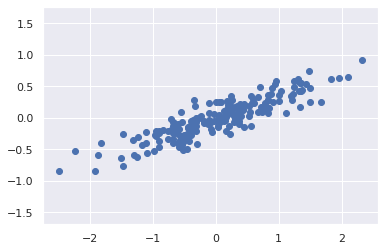

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
# istead of pedicting, PCA learns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


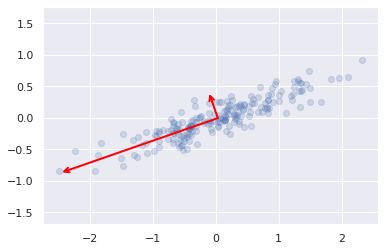

In [ ]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='red')
  ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
#vectors represent the principal axes of the data

##PCA as dimensionality reduction

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


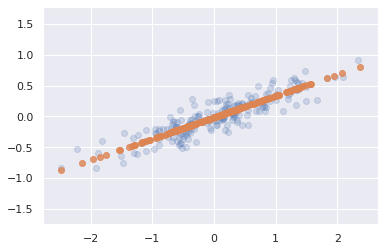

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');
# old + projected data

##PCA for visualization: Handwritten digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
from sklearn.decomposition import PCA
# images 8x8 = 64 dimensions, reduce to 2

pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


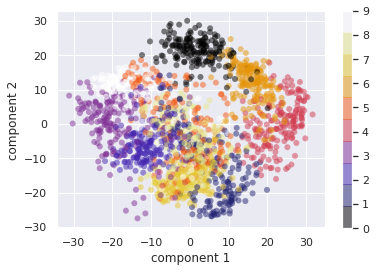

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('CMRmap', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
pca = PCA(3) # project from 64 to 3 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
print(digits.target.shape)

(1797, 64)
(1797, 3)
(1797,)


In [ ]:
#from sklearn.manifold import Isomap
#model = Isomap(n_components=3)
#projected = model.fit_transform(digits.data)
#print(digits.data.shape)
#print(projected.shape)
#print(digits.target.shape)

(1797, 64)
(1797, 3)
(1797,)


In [ ]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

R, G, B = projected[:, 0], projected[:, 1], projected[:, 2]
cmap = {0: 'rgba(0,0,255,255)', 1: 'rgba(0,255,0,255)', 2: 'rgba(255,0,0,255)',
        3: 'rgba(0,0,128,255)', 4: 'rgba(0,128,0,255)', 5: 'rgba(128,0,255)',
        6: 'rgba(0,0,64,255)', 7: 'rgba(0,64,0,255)', 8: 'rgba(64,0,0,255)',
        9: 'rgba(0,0,0,255)'}
colors = [cmap[d] for d in digits.target]

fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scene"}]])

fig.add_trace(go.Scatter3d(x=R, y=G, z=B, mode='markers',
                           marker=dict(size=4, color=colors)),
              row=1, col=1)

fig.update_layout(width=600, height=600, autosize=False,
                  title_text="3-component PCA for MNIST",
                  scene={"xaxis": {"title": "component 1"},
                         "yaxis": {"title": "component 2"},
                         "zaxis": {"title": "component 3"}},
                  showlegend=False)

fig.show()

##Choosing the number of components

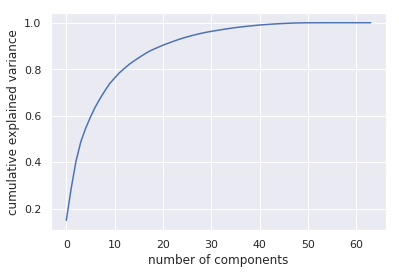

In [ ]:
# the cumulative explained variance ratio as a function of the number of components

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#we’d need about 20 components to retain 90% of the variance

#PCA as Noise Filtering

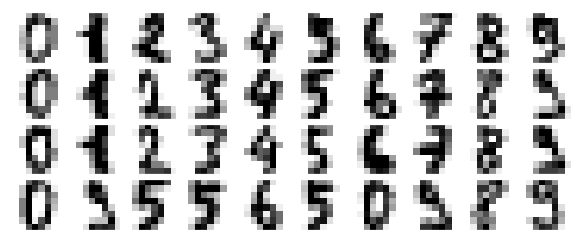

In [ ]:
def plot_digits(data):
  fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)

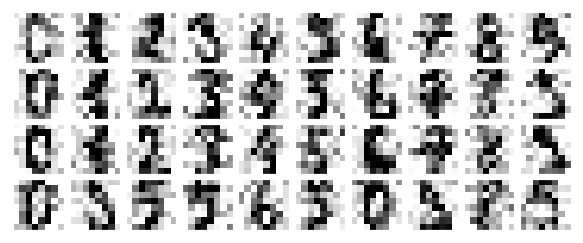

In [ ]:
# add some noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [ ]:
# let's retain 50% of variation

pca = PCA(0.50).fit(noisy)
pca.n_components_

12

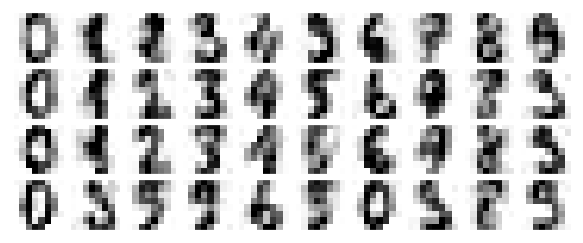

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

#Example: Eigenfaces

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(150, svd_solver='randomized') # big dataset, use randomized solver
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

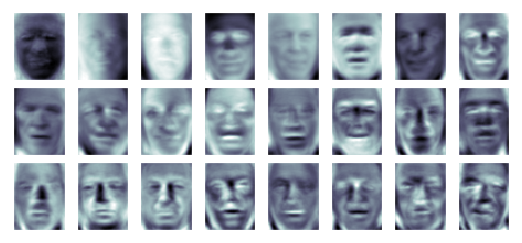

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

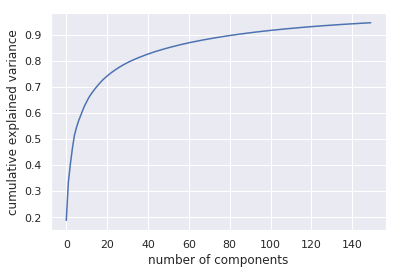

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

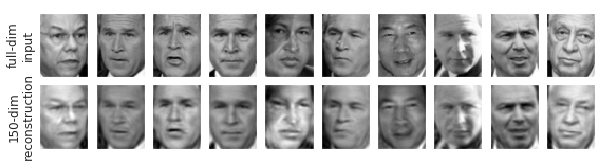

In [ ]:
# Compute the components and projected faces
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
  ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
  ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data

#Principal Component Analysis Summary

PCA’s main weakness is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.

**PCA assumptions**
* **Sample size:** Minimum of 150 observations and ideally a 5:1 ratio of observation to features (Pallant, 2010)
* **Correlations:** The feature set is correlated, so the reduced feature set effectively represents the original data space.
* **Linearity:** All variables exhibit a constant multivariate normal relationship, and principal components are a linear combination of the original features.
* **Outliers:** No significant outliers in the data as these can have a disproportionate influence on the results.
* **Large variance implies more structure:** high variance axes are treated as principal components, while low variance axes are treated as noise and discarded.

**PCA Limitations**
* **Model performance:** PCA can lead to a reduction in model performance on datasets with no or low feature correlation or does not meet the assumptions of linearity.
* **Classification accuracy:** Variance based PCA framework does not consider the differentiating characteristics of the classes. Also, the information that distinguishes one class from another might be in the low variance components and may be discarded.
* **Outliers:** PCA is also affected by outliers, and normalization of the data needs to be an essential component of any workflow.
* **Interpretability:** Each principal component is a combination of original features and does not allow for the individual feature importance to be recognized.

**When should I use PCA?**
* Do you want to reduce the number of variables, but aren't able to identify variables to completely remove from consideration?
* Do you want to ensure your variables are independent of one another?
* Are you comfortable making your independent variables less interpretable?

Yes to this questions means you may want to use PCA